In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
dt = pd.read_csv("Loan Prediction Dataset.csv")
dt.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [3]:
dt.shape

(614, 13)

In [4]:
dt.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Preprocessing the dataset

In [6]:
dt.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# fill the missing values for numerical terms
dt['LoanAmount'] = dt['LoanAmount'].fillna(dt['LoanAmount'].mean())
dt['Loan_Amount_Term'] = dt['Loan_Amount_Term'].fillna(dt['Loan_Amount_Term'].mean())
dt['Credit_History'] = dt['Credit_History'].fillna(dt['Credit_History'].mean())

In [8]:
# fill the missing values for categorical terms
dt['Gender'] = dt["Gender"].fillna(dt['Gender'].mode()[0])
dt['Married'] = dt["Married"].fillna(dt['Married'].mode()[0])
dt['Dependents'] = dt["Dependents"].fillna(dt['Dependents'].mode()[0])
dt['Self_Employed'] = dt["Self_Employed"].fillna(dt['Self_Employed'].mode()[0])

In [9]:
dt.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

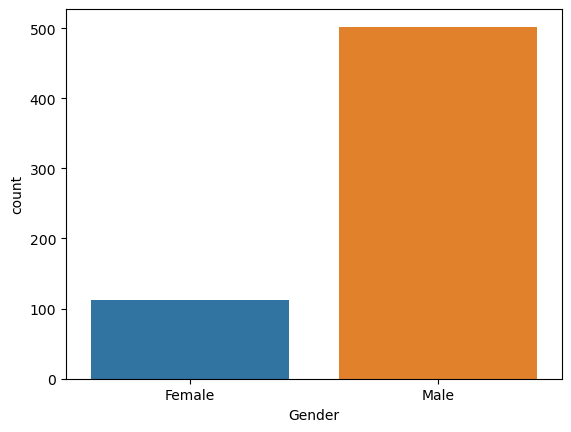

In [10]:
# categorical attributes visualization
dt['Gender'] = dt['Gender'].astype('category')
sns.countplot(x='Gender', data=dt)

In [11]:
dt['Married'] = dt['Married'].astype('category')
sns.countplot(x='Married', data=dt)

<AxesSubplot:xlabel='Married', ylabel='count'>

In [12]:
dt['Dependents'] = dt['Dependents'].astype('category')
sns.countplot(x='Dependents', data=dt)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

In [13]:
dt['Education'] = dt['Education'].astype('category')
sns.countplot(x='Education', data=dt)

<AxesSubplot:xlabel='Education', ylabel='count'>

In [14]:
dt['Self_Employed'] = dt['Self_Employed'].astype('category')
sns.countplot(x='Self_Employed', data=dt)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

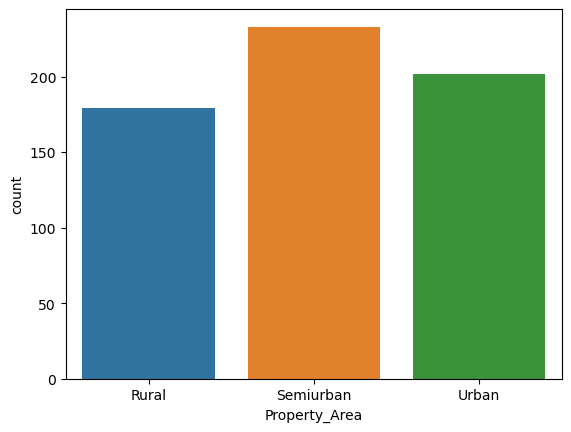

In [15]:
dt['Property_Area'] = dt['Property_Area'].astype('category')
sns.countplot(x='Property_Area', data=dt)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

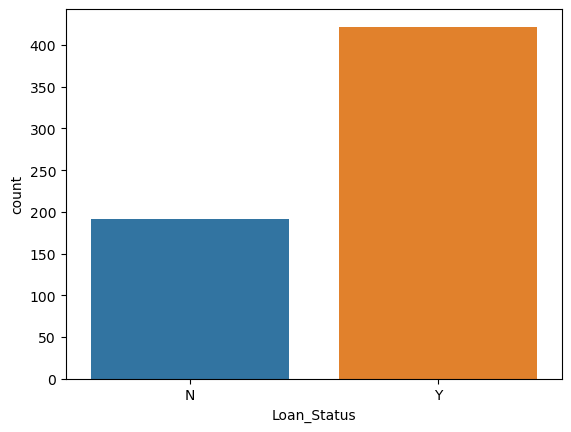

In [16]:
dt['Loan_Status'] = dt['Loan_Status'].astype('category')
sns.countplot(x='Loan_Status', data=dt)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

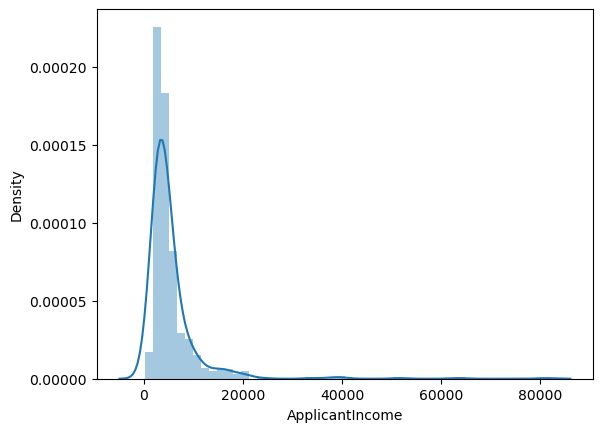

In [17]:
# numerical attributes visualization
sns.distplot(dt["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

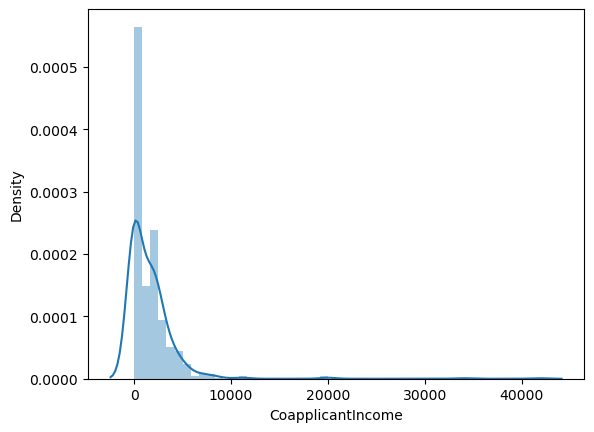

In [18]:
sns.distplot(dt["CoapplicantIncome"])

In [19]:
sns.distplot(dt["LoanAmount"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

In [20]:
sns.distplot(dt['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

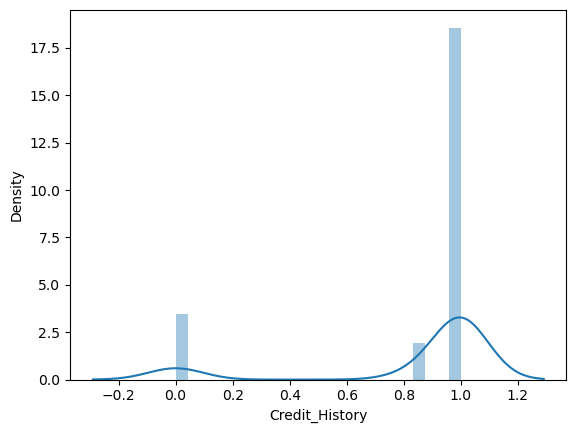

In [21]:
sns.distplot(dt['Credit_History'])

## Creation of new attributes

In [22]:
# total income
dt['Total_Income'] = dt['ApplicantIncome'] + dt['CoapplicantIncome']
dt.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  Total_Income  
0             1.0         Urban           Y        5849.0  
1             1.0         Rural           N        6091.0  
2             1.0         Urban           Y        3000.0  
3             1.0         Urban           Y        4941.0  
4             1.0         Urban           Y        6000.0

## Log Transformation

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

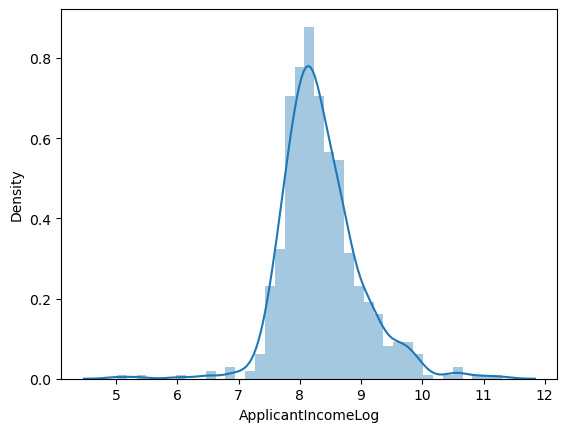

In [23]:
# apply log transformation to the attribute
dt['ApplicantIncomeLog'] = np.log(dt['ApplicantIncome'])
sns.distplot(dt["ApplicantIncomeLog"])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

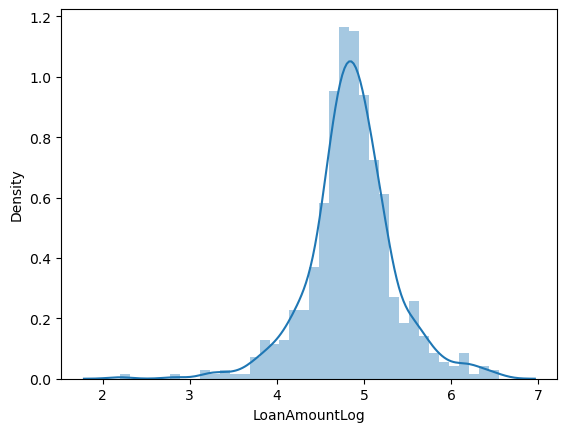

In [24]:
dt['LoanAmountLog'] = np.log(dt['LoanAmount'])
sns.distplot(dt["LoanAmountLog"])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

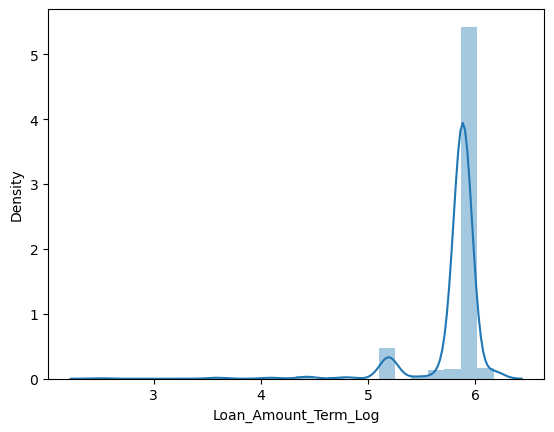

In [25]:
dt['Loan_Amount_Term_Log'] = np.log(dt['Loan_Amount_Term'])
sns.distplot(dt["Loan_Amount_Term_Log"])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

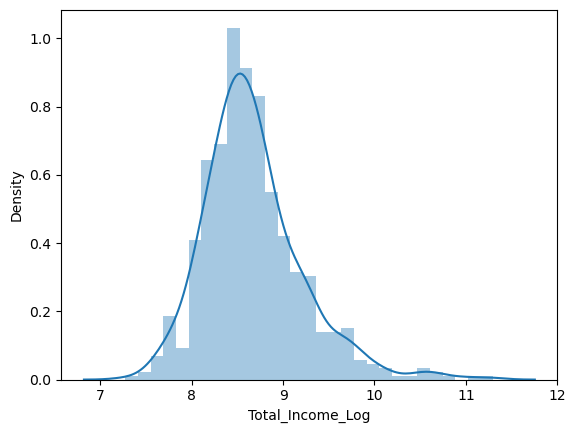

In [26]:
dt['Total_Income_Log'] = np.log(dt['Total_Income'])
sns.distplot(dt["Total_Income_Log"])

## Coorelation Matrix

<AxesSubplot:>

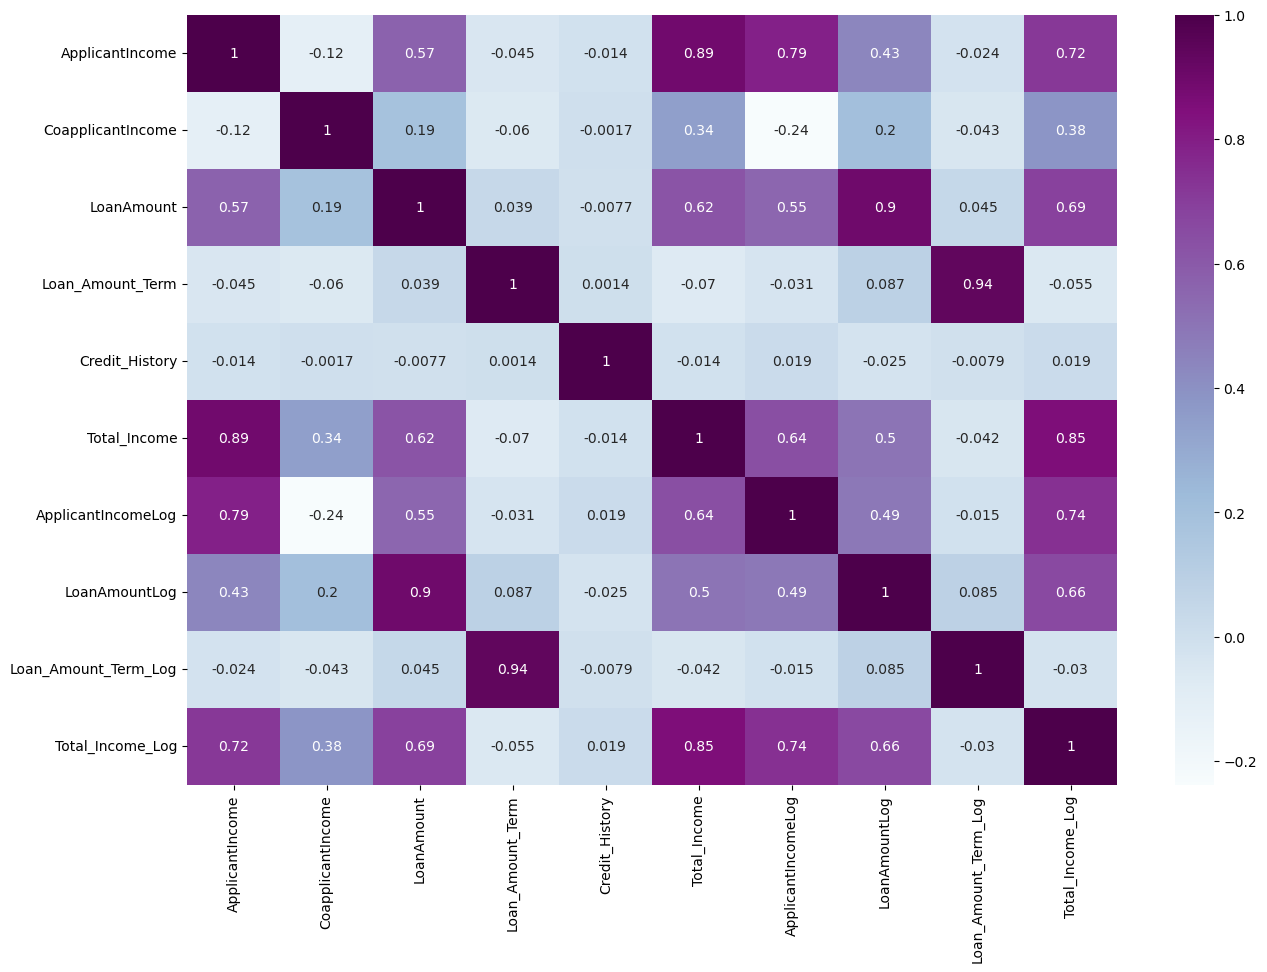

In [27]:
corr = dt.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [28]:
dt.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  Total_Income  ApplicantIncomeLog  \
0             1.0         Urban           Y        5849.0            8.674026   
1             1.0         Rural           N        6091.0            8.430109   
2             1.0         Urban           Y        3000.0            8.006368   
3             1.0         Urban           Y        4941.0            7.856707   
4             1.0         Urban           Y        6000.0            8.699515   

   LoanAmountLog  Loan_Amount_Term_Log  Total_Income_Log  
0       4.986426              5.886104          8.674026  
1       4.852030              5.886104          8.714568  
2       4.189655              5.886104          8.006368  
3       4.787492              5.886104          8.505323  
4       4.948760              5.886104          8.699515

In [29]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID']
dt = dt.drop(columns=cols, axis=1)
dt.head()

Gender Married Dependents     Education Self_Employed  Credit_History  \
0   Male      No          0      Graduate            No             1.0   
1   Male     Yes          1      Graduate            No             1.0   
2   Male     Yes          0      Graduate           Yes             1.0   
3   Male     Yes          0  Not Graduate            No             1.0   
4   Male      No          0      Graduate            No             1.0   

  Property_Area Loan_Status  ApplicantIncomeLog  LoanAmountLog  \
0         Urban           Y            8.674026       4.986426   
1         Rural           N            8.430109       4.852030   
2         Urban           Y            8.006368       4.189655   
3         Urban           Y            7.856707       4.787492   
4         Urban           Y            8.699515       4.948760   

   Loan_Amount_Term_Log  Total_Income_Log  
0              5.886104          8.674026  
1              5.886104          8.714568  
2              5.886104          8.006368  
3              5.886104          8.505323  
4              5.886104          8.699515

## Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    dt[col] = le.fit_transform(dt[col])

In [31]:
dt.head()

Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0       1        0           0          0              0             1.0   
1       1        1           1          0              0             1.0   
2       1        1           0          0              1             1.0   
3       1        1           0          1              0             1.0   
4       1        0           0          0              0             1.0   

   Property_Area  Loan_Status  ApplicantIncomeLog  LoanAmountLog  \
0              2            1            8.674026       4.986426   
1              0            0            8.430109       4.852030   
2              2            1            8.006368       4.189655   
3              2            1            7.856707       4.787492   
4              2            1            8.699515       4.948760   

   Loan_Amount_Term_Log  Total_Income_Log  
0              5.886104          8.674026  
1              5.886104          8.714568  
2              5.886104          8.006368  
3              5.886104          8.505323  
4              5.886104          8.699515

## Train-Test Split

In [32]:
X = dt.drop(columns=['Loan_Status'], axis=1)
y = dt['Loan_Status']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Training

In [34]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 78.37837837837837
Cross validation is 80.9462881514061


In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 75.67567567567568
Cross validation is 72.64161002265762


In [37]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 77.83783783783784
Cross validation is 78.50459816073571


In [38]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 72.43243243243244
Cross validation is 77.36771957883514


In [39]:
from xgboost import XGBClassifier

In [40]:
model = XGBClassifier()
classify(model, X, y)

[20:58:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy is 77.29729729729729
[20:58:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:58:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:58:43] WARNING: C:/Users/Administrat

In [41]:
from lightgbm import LGBMClassifier

In [42]:
lgb = LGBMClassifier()
classify(lgb, X, y)

Accuracy is 75.67567567567568
Cross validation is 76.5480474476876


In [43]:
from catboost import CatBoostClassifier

In [44]:
cb = CatBoostClassifier()
classify(cb, X, y)

Learning rate set to 0.007178
0:	learn: 0.6893245	total: 121ms	remaining: 2m
1:	learn: 0.6855343	total: 122ms	remaining: 1m
2:	learn: 0.6819006	total: 123ms	remaining: 41s
3:	learn: 0.6778919	total: 124ms	remaining: 31s
4:	learn: 0.6744606	total: 125ms	remaining: 24.9s
5:	learn: 0.6705712	total: 126ms	remaining: 20.9s
6:	learn: 0.6665637	total: 128ms	remaining: 18.1s
7:	learn: 0.6627680	total: 129ms	remaining: 16s
8:	learn: 0.6590132	total: 130ms	remaining: 14.3s
9:	learn: 0.6554328	total: 131ms	remaining: 13s
10:	learn: 0.6522869	total: 132ms	remaining: 11.8s
11:	learn: 0.6489514	total: 133ms	remaining: 10.9s
12:	learn: 0.6453893	total: 134ms	remaining: 10.2s
13:	learn: 0.6417947	total: 135ms	remaining: 9.52s
14:	learn: 0.6384334	total: 136ms	remaining: 8.96s
15:	learn: 0.6355722	total: 137ms	remaining: 8.44s
16:	learn: 0.6326628	total: 138ms	remaining: 8s
17:	learn: 0.6294165	total: 140ms	remaining: 7.62s
18:	learn: 0.6263724	total: 141ms	remaining: 7.27s
19:	learn: 0.6234612	total: 

239:	learn: 0.3904873	total: 380ms	remaining: 1.2s
240:	learn: 0.3900886	total: 381ms	remaining: 1.2s
241:	learn: 0.3896318	total: 382ms	remaining: 1.2s
242:	learn: 0.3891402	total: 383ms	remaining: 1.19s
243:	learn: 0.3889305	total: 384ms	remaining: 1.19s
244:	learn: 0.3883896	total: 386ms	remaining: 1.19s
245:	learn: 0.3879841	total: 387ms	remaining: 1.19s
246:	learn: 0.3876092	total: 388ms	remaining: 1.18s
247:	learn: 0.3871149	total: 389ms	remaining: 1.18s
248:	learn: 0.3867839	total: 390ms	remaining: 1.18s
249:	learn: 0.3864231	total: 391ms	remaining: 1.17s
250:	learn: 0.3859183	total: 392ms	remaining: 1.17s
251:	learn: 0.3856192	total: 393ms	remaining: 1.17s
252:	learn: 0.3850460	total: 395ms	remaining: 1.17s
253:	learn: 0.3848194	total: 396ms	remaining: 1.16s
254:	learn: 0.3844860	total: 397ms	remaining: 1.16s
255:	learn: 0.3841264	total: 398ms	remaining: 1.16s
256:	learn: 0.3837515	total: 399ms	remaining: 1.15s
257:	learn: 0.3836306	total: 400ms	remaining: 1.15s
258:	learn: 0.3

405:	learn: 0.3359004	total: 569ms	remaining: 832ms
406:	learn: 0.3356362	total: 570ms	remaining: 831ms
407:	learn: 0.3352490	total: 571ms	remaining: 829ms
408:	learn: 0.3350681	total: 573ms	remaining: 828ms
409:	learn: 0.3346947	total: 574ms	remaining: 826ms
410:	learn: 0.3344952	total: 575ms	remaining: 824ms
411:	learn: 0.3342391	total: 576ms	remaining: 822ms
412:	learn: 0.3340125	total: 577ms	remaining: 821ms
413:	learn: 0.3335374	total: 578ms	remaining: 819ms
414:	learn: 0.3335255	total: 579ms	remaining: 816ms
415:	learn: 0.3331671	total: 580ms	remaining: 815ms
416:	learn: 0.3331135	total: 582ms	remaining: 813ms
417:	learn: 0.3328376	total: 583ms	remaining: 811ms
418:	learn: 0.3327300	total: 584ms	remaining: 809ms
419:	learn: 0.3325124	total: 585ms	remaining: 808ms
420:	learn: 0.3322432	total: 586ms	remaining: 806ms
421:	learn: 0.3318654	total: 587ms	remaining: 804ms
422:	learn: 0.3314526	total: 588ms	remaining: 803ms
423:	learn: 0.3310757	total: 590ms	remaining: 801ms
424:	learn: 

578:	learn: 0.2913827	total: 762ms	remaining: 554ms
579:	learn: 0.2912221	total: 763ms	remaining: 552ms
580:	learn: 0.2909825	total: 764ms	remaining: 551ms
581:	learn: 0.2907086	total: 765ms	remaining: 550ms
582:	learn: 0.2906187	total: 766ms	remaining: 548ms
583:	learn: 0.2904444	total: 767ms	remaining: 547ms
584:	learn: 0.2903559	total: 769ms	remaining: 545ms
585:	learn: 0.2902126	total: 770ms	remaining: 544ms
586:	learn: 0.2898787	total: 771ms	remaining: 542ms
587:	learn: 0.2898243	total: 772ms	remaining: 541ms
588:	learn: 0.2897271	total: 773ms	remaining: 539ms
589:	learn: 0.2895856	total: 774ms	remaining: 538ms
590:	learn: 0.2894302	total: 775ms	remaining: 536ms
591:	learn: 0.2892395	total: 776ms	remaining: 535ms
592:	learn: 0.2890021	total: 777ms	remaining: 534ms
593:	learn: 0.2889868	total: 778ms	remaining: 532ms
594:	learn: 0.2887543	total: 779ms	remaining: 530ms
595:	learn: 0.2885310	total: 780ms	remaining: 529ms
596:	learn: 0.2883404	total: 781ms	remaining: 527ms
597:	learn: 

746:	learn: 0.2584431	total: 953ms	remaining: 323ms
747:	learn: 0.2582215	total: 955ms	remaining: 322ms
748:	learn: 0.2579812	total: 956ms	remaining: 320ms
749:	learn: 0.2579702	total: 957ms	remaining: 319ms
750:	learn: 0.2577405	total: 958ms	remaining: 318ms
751:	learn: 0.2576049	total: 959ms	remaining: 316ms
752:	learn: 0.2575078	total: 960ms	remaining: 315ms
753:	learn: 0.2572581	total: 961ms	remaining: 314ms
754:	learn: 0.2568774	total: 963ms	remaining: 312ms
755:	learn: 0.2567743	total: 964ms	remaining: 311ms
756:	learn: 0.2567028	total: 965ms	remaining: 310ms
757:	learn: 0.2565757	total: 966ms	remaining: 309ms
758:	learn: 0.2564467	total: 968ms	remaining: 307ms
759:	learn: 0.2561621	total: 969ms	remaining: 306ms
760:	learn: 0.2558549	total: 970ms	remaining: 305ms
761:	learn: 0.2556337	total: 971ms	remaining: 303ms
762:	learn: 0.2555648	total: 972ms	remaining: 302ms
763:	learn: 0.2552706	total: 973ms	remaining: 301ms
764:	learn: 0.2550512	total: 974ms	remaining: 299ms
765:	learn: 

917:	learn: 0.2285333	total: 1.15s	remaining: 103ms
918:	learn: 0.2283238	total: 1.15s	remaining: 101ms
919:	learn: 0.2280195	total: 1.15s	remaining: 100ms
920:	learn: 0.2278111	total: 1.15s	remaining: 98.8ms
921:	learn: 0.2275196	total: 1.15s	remaining: 97.5ms
922:	learn: 0.2274131	total: 1.15s	remaining: 96.3ms
923:	learn: 0.2271688	total: 1.16s	remaining: 95ms
924:	learn: 0.2269886	total: 1.16s	remaining: 93.8ms
925:	learn: 0.2268660	total: 1.16s	remaining: 92.5ms
926:	learn: 0.2267309	total: 1.16s	remaining: 91.3ms
927:	learn: 0.2265044	total: 1.16s	remaining: 90ms
928:	learn: 0.2262910	total: 1.16s	remaining: 88.7ms
929:	learn: 0.2261435	total: 1.16s	remaining: 87.5ms
930:	learn: 0.2260729	total: 1.16s	remaining: 86.2ms
931:	learn: 0.2258632	total: 1.16s	remaining: 85ms
932:	learn: 0.2257022	total: 1.17s	remaining: 83.7ms
933:	learn: 0.2256073	total: 1.17s	remaining: 82.5ms
934:	learn: 0.2254771	total: 1.17s	remaining: 81.2ms
935:	learn: 0.2253457	total: 1.17s	remaining: 79.9ms
93

233:	learn: 0.4059455	total: 262ms	remaining: 856ms
234:	learn: 0.4055174	total: 263ms	remaining: 856ms
235:	learn: 0.4051412	total: 264ms	remaining: 855ms
236:	learn: 0.4045681	total: 265ms	remaining: 854ms
237:	learn: 0.4041716	total: 267ms	remaining: 853ms
238:	learn: 0.4038634	total: 268ms	remaining: 852ms
239:	learn: 0.4034689	total: 269ms	remaining: 851ms
240:	learn: 0.4034295	total: 269ms	remaining: 849ms
241:	learn: 0.4030571	total: 271ms	remaining: 848ms
242:	learn: 0.4026954	total: 272ms	remaining: 847ms
243:	learn: 0.4024245	total: 273ms	remaining: 846ms
244:	learn: 0.4021114	total: 274ms	remaining: 844ms
245:	learn: 0.4015349	total: 275ms	remaining: 844ms
246:	learn: 0.4010165	total: 277ms	remaining: 843ms
247:	learn: 0.4004891	total: 278ms	remaining: 843ms
248:	learn: 0.4000181	total: 279ms	remaining: 842ms
249:	learn: 0.3996562	total: 280ms	remaining: 841ms
250:	learn: 0.3994220	total: 282ms	remaining: 840ms
251:	learn: 0.3990258	total: 283ms	remaining: 839ms
252:	learn: 

396:	learn: 0.3488992	total: 454ms	remaining: 689ms
397:	learn: 0.3485678	total: 455ms	remaining: 688ms
398:	learn: 0.3483558	total: 456ms	remaining: 687ms
399:	learn: 0.3482311	total: 457ms	remaining: 686ms
400:	learn: 0.3479456	total: 458ms	remaining: 685ms
401:	learn: 0.3477876	total: 460ms	remaining: 684ms
402:	learn: 0.3476637	total: 461ms	remaining: 682ms
403:	learn: 0.3474280	total: 462ms	remaining: 681ms
404:	learn: 0.3471697	total: 463ms	remaining: 680ms
405:	learn: 0.3467503	total: 464ms	remaining: 679ms
406:	learn: 0.3465711	total: 465ms	remaining: 678ms
407:	learn: 0.3462906	total: 466ms	remaining: 676ms
408:	learn: 0.3457340	total: 467ms	remaining: 675ms
409:	learn: 0.3456344	total: 468ms	remaining: 674ms
410:	learn: 0.3453635	total: 469ms	remaining: 673ms
411:	learn: 0.3451285	total: 470ms	remaining: 671ms
412:	learn: 0.3449837	total: 472ms	remaining: 670ms
413:	learn: 0.3447819	total: 473ms	remaining: 669ms
414:	learn: 0.3443881	total: 474ms	remaining: 668ms
415:	learn: 

561:	learn: 0.3063572	total: 641ms	remaining: 500ms
562:	learn: 0.3061384	total: 642ms	remaining: 499ms
563:	learn: 0.3058995	total: 643ms	remaining: 497ms
564:	learn: 0.3056652	total: 645ms	remaining: 496ms
565:	learn: 0.3055331	total: 645ms	remaining: 495ms
566:	learn: 0.3052120	total: 647ms	remaining: 494ms
567:	learn: 0.3048865	total: 648ms	remaining: 493ms
568:	learn: 0.3046323	total: 650ms	remaining: 492ms
569:	learn: 0.3045523	total: 651ms	remaining: 491ms
570:	learn: 0.3042769	total: 652ms	remaining: 490ms
571:	learn: 0.3040124	total: 653ms	remaining: 489ms
572:	learn: 0.3038841	total: 654ms	remaining: 487ms
573:	learn: 0.3037420	total: 655ms	remaining: 486ms
574:	learn: 0.3035188	total: 656ms	remaining: 485ms
575:	learn: 0.3032400	total: 657ms	remaining: 484ms
576:	learn: 0.3030023	total: 659ms	remaining: 483ms
577:	learn: 0.3026385	total: 660ms	remaining: 482ms
578:	learn: 0.3024620	total: 661ms	remaining: 481ms
579:	learn: 0.3022181	total: 662ms	remaining: 479ms
580:	learn: 

726:	learn: 0.2710724	total: 833ms	remaining: 313ms
727:	learn: 0.2708297	total: 834ms	remaining: 312ms
728:	learn: 0.2707154	total: 836ms	remaining: 311ms
729:	learn: 0.2704878	total: 837ms	remaining: 310ms
730:	learn: 0.2703372	total: 838ms	remaining: 308ms
731:	learn: 0.2701144	total: 839ms	remaining: 307ms
732:	learn: 0.2698903	total: 841ms	remaining: 306ms
733:	learn: 0.2697459	total: 842ms	remaining: 305ms
734:	learn: 0.2693754	total: 843ms	remaining: 304ms
735:	learn: 0.2689968	total: 844ms	remaining: 303ms
736:	learn: 0.2689450	total: 845ms	remaining: 302ms
737:	learn: 0.2687340	total: 847ms	remaining: 301ms
738:	learn: 0.2684761	total: 848ms	remaining: 299ms
739:	learn: 0.2682330	total: 849ms	remaining: 298ms
740:	learn: 0.2679025	total: 850ms	remaining: 297ms
741:	learn: 0.2677580	total: 851ms	remaining: 296ms
742:	learn: 0.2674580	total: 852ms	remaining: 295ms
743:	learn: 0.2673463	total: 854ms	remaining: 294ms
744:	learn: 0.2670688	total: 855ms	remaining: 293ms
745:	learn: 

890:	learn: 0.2382634	total: 1.02s	remaining: 125ms
891:	learn: 0.2381021	total: 1.02s	remaining: 124ms
892:	learn: 0.2379252	total: 1.03s	remaining: 123ms
893:	learn: 0.2377303	total: 1.03s	remaining: 122ms
894:	learn: 0.2375667	total: 1.03s	remaining: 121ms
895:	learn: 0.2374221	total: 1.03s	remaining: 120ms
896:	learn: 0.2372590	total: 1.03s	remaining: 118ms
897:	learn: 0.2370562	total: 1.03s	remaining: 117ms
898:	learn: 0.2369366	total: 1.03s	remaining: 116ms
899:	learn: 0.2368301	total: 1.03s	remaining: 115ms
900:	learn: 0.2367586	total: 1.04s	remaining: 114ms
901:	learn: 0.2366289	total: 1.04s	remaining: 113ms
902:	learn: 0.2364791	total: 1.04s	remaining: 112ms
903:	learn: 0.2362263	total: 1.04s	remaining: 110ms
904:	learn: 0.2360672	total: 1.04s	remaining: 109ms
905:	learn: 0.2359111	total: 1.04s	remaining: 108ms
906:	learn: 0.2356764	total: 1.04s	remaining: 107ms
907:	learn: 0.2355233	total: 1.04s	remaining: 106ms
908:	learn: 0.2354238	total: 1.04s	remaining: 105ms
909:	learn: 

183:	learn: 0.4142107	total: 210ms	remaining: 930ms
184:	learn: 0.4139989	total: 211ms	remaining: 928ms
185:	learn: 0.4133377	total: 212ms	remaining: 927ms
186:	learn: 0.4128186	total: 213ms	remaining: 926ms
187:	learn: 0.4122927	total: 214ms	remaining: 924ms
188:	learn: 0.4117257	total: 215ms	remaining: 924ms
189:	learn: 0.4110395	total: 216ms	remaining: 923ms
190:	learn: 0.4107084	total: 218ms	remaining: 921ms
191:	learn: 0.4103210	total: 219ms	remaining: 920ms
192:	learn: 0.4097459	total: 220ms	remaining: 919ms
193:	learn: 0.4093082	total: 221ms	remaining: 918ms
194:	learn: 0.4089221	total: 222ms	remaining: 917ms
195:	learn: 0.4088271	total: 223ms	remaining: 914ms
196:	learn: 0.4084925	total: 224ms	remaining: 912ms
197:	learn: 0.4080521	total: 225ms	remaining: 911ms
198:	learn: 0.4076264	total: 226ms	remaining: 911ms
199:	learn: 0.4070700	total: 227ms	remaining: 910ms
200:	learn: 0.4068912	total: 228ms	remaining: 907ms
201:	learn: 0.4066079	total: 229ms	remaining: 906ms
202:	learn: 

360:	learn: 0.3517257	total: 405ms	remaining: 717ms
361:	learn: 0.3514684	total: 407ms	remaining: 717ms
362:	learn: 0.3509426	total: 408ms	remaining: 716ms
363:	learn: 0.3507451	total: 409ms	remaining: 715ms
364:	learn: 0.3503672	total: 410ms	remaining: 714ms
365:	learn: 0.3501006	total: 412ms	remaining: 713ms
366:	learn: 0.3499129	total: 413ms	remaining: 712ms
367:	learn: 0.3496667	total: 414ms	remaining: 711ms
368:	learn: 0.3492369	total: 415ms	remaining: 710ms
369:	learn: 0.3490494	total: 417ms	remaining: 709ms
370:	learn: 0.3486398	total: 418ms	remaining: 708ms
371:	learn: 0.3484307	total: 419ms	remaining: 707ms
372:	learn: 0.3482691	total: 420ms	remaining: 707ms
373:	learn: 0.3479588	total: 422ms	remaining: 706ms
374:	learn: 0.3476823	total: 423ms	remaining: 705ms
375:	learn: 0.3475733	total: 424ms	remaining: 704ms
376:	learn: 0.3473701	total: 425ms	remaining: 703ms
377:	learn: 0.3471729	total: 427ms	remaining: 702ms
378:	learn: 0.3470003	total: 428ms	remaining: 701ms
379:	learn: 

674:	learn: 0.2790539	total: 782ms	remaining: 377ms
675:	learn: 0.2789269	total: 784ms	remaining: 376ms
676:	learn: 0.2788021	total: 785ms	remaining: 374ms
677:	learn: 0.2785841	total: 786ms	remaining: 373ms
678:	learn: 0.2784061	total: 787ms	remaining: 372ms
679:	learn: 0.2782206	total: 788ms	remaining: 371ms
680:	learn: 0.2780573	total: 790ms	remaining: 370ms
681:	learn: 0.2779498	total: 791ms	remaining: 369ms
682:	learn: 0.2778031	total: 792ms	remaining: 368ms
683:	learn: 0.2776715	total: 793ms	remaining: 367ms
684:	learn: 0.2773143	total: 795ms	remaining: 365ms
685:	learn: 0.2771082	total: 796ms	remaining: 364ms
686:	learn: 0.2769062	total: 797ms	remaining: 363ms
687:	learn: 0.2766973	total: 798ms	remaining: 362ms
688:	learn: 0.2765163	total: 799ms	remaining: 361ms
689:	learn: 0.2762218	total: 800ms	remaining: 360ms
690:	learn: 0.2760109	total: 802ms	remaining: 358ms
691:	learn: 0.2757281	total: 803ms	remaining: 357ms
692:	learn: 0.2754473	total: 804ms	remaining: 356ms
693:	learn: 

842:	learn: 0.2497456	total: 979ms	remaining: 182ms
843:	learn: 0.2494754	total: 981ms	remaining: 181ms
844:	learn: 0.2492138	total: 982ms	remaining: 180ms
845:	learn: 0.2490624	total: 983ms	remaining: 179ms
846:	learn: 0.2488982	total: 984ms	remaining: 178ms
847:	learn: 0.2488173	total: 985ms	remaining: 177ms
848:	learn: 0.2486869	total: 987ms	remaining: 175ms
849:	learn: 0.2484218	total: 988ms	remaining: 174ms
850:	learn: 0.2481627	total: 989ms	remaining: 173ms
851:	learn: 0.2478807	total: 990ms	remaining: 172ms
852:	learn: 0.2476391	total: 991ms	remaining: 171ms
853:	learn: 0.2474658	total: 992ms	remaining: 170ms
854:	learn: 0.2472160	total: 993ms	remaining: 168ms
855:	learn: 0.2469918	total: 995ms	remaining: 167ms
856:	learn: 0.2469077	total: 996ms	remaining: 166ms
857:	learn: 0.2467006	total: 997ms	remaining: 165ms
858:	learn: 0.2465841	total: 998ms	remaining: 164ms
859:	learn: 0.2463989	total: 999ms	remaining: 163ms
860:	learn: 0.2462491	total: 1s	remaining: 162ms
861:	learn: 0.2

Learning rate set to 0.007604
0:	learn: 0.6890165	total: 1.36ms	remaining: 1.36s
1:	learn: 0.6846250	total: 2.47ms	remaining: 1.23s
2:	learn: 0.6806333	total: 3.56ms	remaining: 1.18s
3:	learn: 0.6767152	total: 4.32ms	remaining: 1.07s
4:	learn: 0.6722974	total: 5.4ms	remaining: 1.07s
5:	learn: 0.6681981	total: 6.49ms	remaining: 1.07s
6:	learn: 0.6643448	total: 7.56ms	remaining: 1.07s
7:	learn: 0.6604551	total: 8.63ms	remaining: 1.07s
8:	learn: 0.6566919	total: 9.74ms	remaining: 1.07s
9:	learn: 0.6533788	total: 10.3ms	remaining: 1.02s
10:	learn: 0.6498469	total: 11.4ms	remaining: 1.03s
11:	learn: 0.6459628	total: 12.5ms	remaining: 1.03s
12:	learn: 0.6422531	total: 13.5ms	remaining: 1.03s
13:	learn: 0.6386379	total: 14.7ms	remaining: 1.03s
14:	learn: 0.6353018	total: 15.6ms	remaining: 1.02s
15:	learn: 0.6323243	total: 16.2ms	remaining: 994ms
16:	learn: 0.6293082	total: 17ms	remaining: 986ms
17:	learn: 0.6261974	total: 18.2ms	remaining: 990ms
18:	learn: 0.6231623	total: 19.3ms	remaining: 9

165:	learn: 0.4235070	total: 194ms	remaining: 976ms
166:	learn: 0.4231521	total: 196ms	remaining: 977ms
167:	learn: 0.4226245	total: 197ms	remaining: 976ms
168:	learn: 0.4222446	total: 198ms	remaining: 975ms
169:	learn: 0.4215666	total: 199ms	remaining: 974ms
170:	learn: 0.4211738	total: 201ms	remaining: 973ms
171:	learn: 0.4204633	total: 202ms	remaining: 972ms
172:	learn: 0.4203191	total: 203ms	remaining: 968ms
173:	learn: 0.4196982	total: 204ms	remaining: 967ms
174:	learn: 0.4192815	total: 205ms	remaining: 967ms
175:	learn: 0.4185718	total: 206ms	remaining: 966ms
176:	learn: 0.4178857	total: 207ms	remaining: 964ms
177:	learn: 0.4172788	total: 209ms	remaining: 967ms
178:	learn: 0.4164885	total: 211ms	remaining: 966ms
179:	learn: 0.4158178	total: 212ms	remaining: 965ms
180:	learn: 0.4150763	total: 213ms	remaining: 964ms
181:	learn: 0.4145630	total: 214ms	remaining: 963ms
182:	learn: 0.4140620	total: 215ms	remaining: 962ms
183:	learn: 0.4136807	total: 217ms	remaining: 962ms
184:	learn: 

340:	learn: 0.3555905	total: 395ms	remaining: 763ms
341:	learn: 0.3551596	total: 396ms	remaining: 763ms
342:	learn: 0.3548935	total: 398ms	remaining: 762ms
343:	learn: 0.3546839	total: 399ms	remaining: 760ms
344:	learn: 0.3543749	total: 400ms	remaining: 759ms
345:	learn: 0.3540344	total: 401ms	remaining: 758ms
346:	learn: 0.3537787	total: 402ms	remaining: 757ms
347:	learn: 0.3534429	total: 404ms	remaining: 756ms
348:	learn: 0.3531876	total: 405ms	remaining: 755ms
349:	learn: 0.3528557	total: 406ms	remaining: 754ms
350:	learn: 0.3526414	total: 407ms	remaining: 753ms
351:	learn: 0.3522860	total: 409ms	remaining: 752ms
352:	learn: 0.3518725	total: 410ms	remaining: 751ms
353:	learn: 0.3516642	total: 411ms	remaining: 750ms
354:	learn: 0.3514460	total: 412ms	remaining: 749ms
355:	learn: 0.3512900	total: 413ms	remaining: 747ms
356:	learn: 0.3509440	total: 414ms	remaining: 746ms
357:	learn: 0.3506252	total: 415ms	remaining: 745ms
358:	learn: 0.3502852	total: 417ms	remaining: 744ms
359:	learn: 

514:	learn: 0.3121951	total: 594ms	remaining: 560ms
515:	learn: 0.3120058	total: 596ms	remaining: 559ms
516:	learn: 0.3118937	total: 597ms	remaining: 558ms
517:	learn: 0.3117025	total: 598ms	remaining: 556ms
518:	learn: 0.3113480	total: 599ms	remaining: 555ms
519:	learn: 0.3111965	total: 600ms	remaining: 554ms
520:	learn: 0.3110189	total: 601ms	remaining: 553ms
521:	learn: 0.3107587	total: 603ms	remaining: 552ms
522:	learn: 0.3104561	total: 604ms	remaining: 551ms
523:	learn: 0.3103262	total: 605ms	remaining: 550ms
524:	learn: 0.3101169	total: 606ms	remaining: 549ms
525:	learn: 0.3098486	total: 608ms	remaining: 548ms
526:	learn: 0.3095743	total: 609ms	remaining: 546ms
527:	learn: 0.3092945	total: 610ms	remaining: 545ms
528:	learn: 0.3090012	total: 611ms	remaining: 544ms
529:	learn: 0.3088074	total: 612ms	remaining: 543ms
530:	learn: 0.3086211	total: 613ms	remaining: 542ms
531:	learn: 0.3084271	total: 614ms	remaining: 541ms
532:	learn: 0.3083429	total: 615ms	remaining: 539ms
533:	learn: 

685:	learn: 0.2787283	total: 786ms	remaining: 360ms
686:	learn: 0.2785439	total: 787ms	remaining: 359ms
687:	learn: 0.2782732	total: 788ms	remaining: 357ms
688:	learn: 0.2780668	total: 790ms	remaining: 356ms
689:	learn: 0.2780160	total: 791ms	remaining: 355ms
690:	learn: 0.2778953	total: 792ms	remaining: 354ms
691:	learn: 0.2776458	total: 793ms	remaining: 353ms
692:	learn: 0.2774418	total: 794ms	remaining: 352ms
693:	learn: 0.2772116	total: 795ms	remaining: 351ms
694:	learn: 0.2770756	total: 797ms	remaining: 350ms
695:	learn: 0.2768435	total: 798ms	remaining: 348ms
696:	learn: 0.2767098	total: 799ms	remaining: 347ms
697:	learn: 0.2765664	total: 800ms	remaining: 346ms
698:	learn: 0.2764778	total: 801ms	remaining: 345ms
699:	learn: 0.2762840	total: 802ms	remaining: 344ms
700:	learn: 0.2760939	total: 803ms	remaining: 343ms
701:	learn: 0.2758350	total: 804ms	remaining: 341ms
702:	learn: 0.2755072	total: 806ms	remaining: 340ms
703:	learn: 0.2752281	total: 807ms	remaining: 339ms
704:	learn: 

848:	learn: 0.2504982	total: 978ms	remaining: 174ms
849:	learn: 0.2504350	total: 979ms	remaining: 173ms
850:	learn: 0.2502390	total: 981ms	remaining: 172ms
851:	learn: 0.2500653	total: 982ms	remaining: 171ms
852:	learn: 0.2500264	total: 983ms	remaining: 169ms
853:	learn: 0.2498210	total: 985ms	remaining: 168ms
854:	learn: 0.2496757	total: 986ms	remaining: 167ms
855:	learn: 0.2495634	total: 987ms	remaining: 166ms
856:	learn: 0.2493671	total: 988ms	remaining: 165ms
857:	learn: 0.2492055	total: 990ms	remaining: 164ms
858:	learn: 0.2490933	total: 991ms	remaining: 163ms
859:	learn: 0.2489642	total: 992ms	remaining: 162ms
860:	learn: 0.2487604	total: 993ms	remaining: 160ms
861:	learn: 0.2486932	total: 994ms	remaining: 159ms
862:	learn: 0.2484740	total: 996ms	remaining: 158ms
863:	learn: 0.2482309	total: 997ms	remaining: 157ms
864:	learn: 0.2480002	total: 998ms	remaining: 156ms
865:	learn: 0.2478416	total: 999ms	remaining: 155ms
866:	learn: 0.2477892	total: 1s	remaining: 153ms
867:	learn: 0.2

176:	learn: 0.4431735	total: 186ms	remaining: 865ms
177:	learn: 0.4426345	total: 187ms	remaining: 865ms
178:	learn: 0.4419569	total: 189ms	remaining: 865ms
179:	learn: 0.4410961	total: 190ms	remaining: 865ms
180:	learn: 0.4406571	total: 191ms	remaining: 865ms
181:	learn: 0.4402424	total: 192ms	remaining: 864ms
182:	learn: 0.4394186	total: 193ms	remaining: 864ms
183:	learn: 0.4391511	total: 194ms	remaining: 862ms
184:	learn: 0.4386474	total: 196ms	remaining: 862ms
185:	learn: 0.4379708	total: 197ms	remaining: 861ms
186:	learn: 0.4375738	total: 198ms	remaining: 861ms
187:	learn: 0.4370412	total: 199ms	remaining: 861ms
188:	learn: 0.4365472	total: 200ms	remaining: 860ms
189:	learn: 0.4360323	total: 201ms	remaining: 859ms
190:	learn: 0.4353546	total: 203ms	remaining: 858ms
191:	learn: 0.4347830	total: 204ms	remaining: 857ms
192:	learn: 0.4342147	total: 205ms	remaining: 857ms
193:	learn: 0.4338010	total: 206ms	remaining: 856ms
194:	learn: 0.4333494	total: 207ms	remaining: 856ms
195:	learn: 

343:	learn: 0.3741064	total: 379ms	remaining: 723ms
344:	learn: 0.3737460	total: 381ms	remaining: 723ms
345:	learn: 0.3735341	total: 382ms	remaining: 722ms
346:	learn: 0.3733370	total: 383ms	remaining: 721ms
347:	learn: 0.3731524	total: 384ms	remaining: 720ms
348:	learn: 0.3728827	total: 385ms	remaining: 719ms
349:	learn: 0.3726492	total: 387ms	remaining: 718ms
350:	learn: 0.3723836	total: 388ms	remaining: 717ms
351:	learn: 0.3720649	total: 389ms	remaining: 716ms
352:	learn: 0.3717345	total: 390ms	remaining: 715ms
353:	learn: 0.3715629	total: 391ms	remaining: 714ms
354:	learn: 0.3710603	total: 392ms	remaining: 713ms
355:	learn: 0.3706858	total: 393ms	remaining: 712ms
356:	learn: 0.3704835	total: 395ms	remaining: 711ms
357:	learn: 0.3701422	total: 396ms	remaining: 710ms
358:	learn: 0.3698517	total: 397ms	remaining: 709ms
359:	learn: 0.3698230	total: 398ms	remaining: 707ms
360:	learn: 0.3695294	total: 399ms	remaining: 706ms
361:	learn: 0.3690805	total: 400ms	remaining: 705ms
362:	learn: 

518:	learn: 0.3307599	total: 574ms	remaining: 532ms
519:	learn: 0.3303576	total: 575ms	remaining: 531ms
520:	learn: 0.3302200	total: 576ms	remaining: 530ms
521:	learn: 0.3300705	total: 577ms	remaining: 529ms
522:	learn: 0.3298914	total: 579ms	remaining: 528ms
523:	learn: 0.3296826	total: 580ms	remaining: 527ms
524:	learn: 0.3293555	total: 581ms	remaining: 525ms
525:	learn: 0.3292363	total: 582ms	remaining: 524ms
526:	learn: 0.3291121	total: 583ms	remaining: 523ms
527:	learn: 0.3288574	total: 584ms	remaining: 522ms
528:	learn: 0.3286989	total: 585ms	remaining: 521ms
529:	learn: 0.3284798	total: 586ms	remaining: 520ms
530:	learn: 0.3282369	total: 588ms	remaining: 519ms
531:	learn: 0.3280190	total: 589ms	remaining: 518ms
532:	learn: 0.3277419	total: 590ms	remaining: 517ms
533:	learn: 0.3274834	total: 591ms	remaining: 516ms
534:	learn: 0.3272810	total: 592ms	remaining: 515ms
535:	learn: 0.3270183	total: 593ms	remaining: 513ms
536:	learn: 0.3268392	total: 594ms	remaining: 512ms
537:	learn: 

693:	learn: 0.2930668	total: 768ms	remaining: 339ms
694:	learn: 0.2929231	total: 769ms	remaining: 337ms
695:	learn: 0.2928080	total: 770ms	remaining: 336ms
696:	learn: 0.2925810	total: 771ms	remaining: 335ms
697:	learn: 0.2923075	total: 773ms	remaining: 334ms
698:	learn: 0.2921229	total: 774ms	remaining: 333ms
699:	learn: 0.2920173	total: 775ms	remaining: 332ms
700:	learn: 0.2917943	total: 776ms	remaining: 331ms
701:	learn: 0.2915465	total: 777ms	remaining: 330ms
702:	learn: 0.2914142	total: 778ms	remaining: 329ms
703:	learn: 0.2910465	total: 783ms	remaining: 329ms
704:	learn: 0.2908630	total: 784ms	remaining: 328ms
705:	learn: 0.2906448	total: 785ms	remaining: 327ms
706:	learn: 0.2906255	total: 786ms	remaining: 326ms
707:	learn: 0.2904827	total: 787ms	remaining: 325ms
708:	learn: 0.2904483	total: 788ms	remaining: 324ms
709:	learn: 0.2901751	total: 790ms	remaining: 322ms
710:	learn: 0.2899208	total: 791ms	remaining: 321ms
711:	learn: 0.2896754	total: 792ms	remaining: 320ms
712:	learn: 

859:	learn: 0.2617573	total: 961ms	remaining: 156ms
860:	learn: 0.2615267	total: 962ms	remaining: 155ms
861:	learn: 0.2613396	total: 963ms	remaining: 154ms
862:	learn: 0.2609814	total: 965ms	remaining: 153ms
863:	learn: 0.2607962	total: 966ms	remaining: 152ms
864:	learn: 0.2606504	total: 967ms	remaining: 151ms
865:	learn: 0.2604622	total: 968ms	remaining: 150ms
866:	learn: 0.2602937	total: 969ms	remaining: 149ms
867:	learn: 0.2601410	total: 970ms	remaining: 148ms
868:	learn: 0.2600393	total: 971ms	remaining: 146ms
869:	learn: 0.2599155	total: 972ms	remaining: 145ms
870:	learn: 0.2597859	total: 973ms	remaining: 144ms
871:	learn: 0.2595968	total: 975ms	remaining: 143ms
872:	learn: 0.2593821	total: 976ms	remaining: 142ms
873:	learn: 0.2592185	total: 977ms	remaining: 141ms
874:	learn: 0.2588910	total: 978ms	remaining: 140ms
875:	learn: 0.2586786	total: 979ms	remaining: 139ms
876:	learn: 0.2582719	total: 981ms	remaining: 138ms
877:	learn: 0.2580963	total: 982ms	remaining: 136ms
878:	learn: 

170:	learn: 0.4353404	total: 190ms	remaining: 921ms
171:	learn: 0.4347703	total: 191ms	remaining: 921ms
172:	learn: 0.4346614	total: 192ms	remaining: 917ms
173:	learn: 0.4338759	total: 193ms	remaining: 916ms
174:	learn: 0.4331986	total: 194ms	remaining: 916ms
175:	learn: 0.4324548	total: 196ms	remaining: 916ms
176:	learn: 0.4315411	total: 197ms	remaining: 915ms
177:	learn: 0.4307699	total: 198ms	remaining: 914ms
178:	learn: 0.4300153	total: 199ms	remaining: 913ms
179:	learn: 0.4295631	total: 200ms	remaining: 912ms
180:	learn: 0.4291078	total: 201ms	remaining: 912ms
181:	learn: 0.4285415	total: 203ms	remaining: 912ms
182:	learn: 0.4278677	total: 204ms	remaining: 911ms
183:	learn: 0.4273491	total: 205ms	remaining: 910ms
184:	learn: 0.4268554	total: 207ms	remaining: 913ms
185:	learn: 0.4259033	total: 208ms	remaining: 912ms
186:	learn: 0.4252712	total: 210ms	remaining: 911ms
187:	learn: 0.4251521	total: 210ms	remaining: 909ms
188:	learn: 0.4244347	total: 211ms	remaining: 908ms
189:	learn: 

333:	learn: 0.3661450	total: 381ms	remaining: 760ms
334:	learn: 0.3656757	total: 383ms	remaining: 760ms
335:	learn: 0.3653969	total: 384ms	remaining: 759ms
336:	learn: 0.3650657	total: 385ms	remaining: 758ms
337:	learn: 0.3646919	total: 387ms	remaining: 757ms
338:	learn: 0.3641537	total: 388ms	remaining: 756ms
339:	learn: 0.3637341	total: 389ms	remaining: 755ms
340:	learn: 0.3636723	total: 390ms	remaining: 753ms
341:	learn: 0.3633486	total: 391ms	remaining: 752ms
342:	learn: 0.3628304	total: 392ms	remaining: 751ms
343:	learn: 0.3625060	total: 393ms	remaining: 750ms
344:	learn: 0.3622647	total: 395ms	remaining: 749ms
345:	learn: 0.3619362	total: 396ms	remaining: 748ms
346:	learn: 0.3618606	total: 396ms	remaining: 746ms
347:	learn: 0.3615904	total: 398ms	remaining: 745ms
348:	learn: 0.3610416	total: 399ms	remaining: 744ms
349:	learn: 0.3607191	total: 400ms	remaining: 743ms
350:	learn: 0.3604561	total: 401ms	remaining: 742ms
351:	learn: 0.3602544	total: 402ms	remaining: 741ms
352:	learn: 

497:	learn: 0.3199444	total: 581ms	remaining: 585ms
498:	learn: 0.3197441	total: 582ms	remaining: 584ms
499:	learn: 0.3193240	total: 583ms	remaining: 583ms
500:	learn: 0.3189973	total: 585ms	remaining: 582ms
501:	learn: 0.3187286	total: 586ms	remaining: 581ms
502:	learn: 0.3185773	total: 587ms	remaining: 580ms
503:	learn: 0.3183505	total: 589ms	remaining: 579ms
504:	learn: 0.3180935	total: 590ms	remaining: 578ms
505:	learn: 0.3178383	total: 591ms	remaining: 577ms
506:	learn: 0.3176220	total: 593ms	remaining: 576ms
507:	learn: 0.3172401	total: 594ms	remaining: 575ms
508:	learn: 0.3167637	total: 595ms	remaining: 574ms
509:	learn: 0.3165744	total: 596ms	remaining: 573ms
510:	learn: 0.3164870	total: 598ms	remaining: 572ms
511:	learn: 0.3162200	total: 599ms	remaining: 571ms
512:	learn: 0.3160376	total: 600ms	remaining: 570ms
513:	learn: 0.3158468	total: 601ms	remaining: 569ms
514:	learn: 0.3156718	total: 603ms	remaining: 567ms
515:	learn: 0.3155692	total: 604ms	remaining: 566ms
516:	learn: 

657:	learn: 0.2845599	total: 771ms	remaining: 401ms
658:	learn: 0.2844234	total: 772ms	remaining: 400ms
659:	learn: 0.2841960	total: 774ms	remaining: 399ms
660:	learn: 0.2840039	total: 775ms	remaining: 397ms
661:	learn: 0.2839353	total: 776ms	remaining: 396ms
662:	learn: 0.2836120	total: 777ms	remaining: 395ms
663:	learn: 0.2832775	total: 778ms	remaining: 394ms
664:	learn: 0.2830202	total: 780ms	remaining: 393ms
665:	learn: 0.2828599	total: 781ms	remaining: 392ms
666:	learn: 0.2827323	total: 782ms	remaining: 391ms
667:	learn: 0.2826585	total: 783ms	remaining: 389ms
668:	learn: 0.2823429	total: 785ms	remaining: 388ms
669:	learn: 0.2820333	total: 786ms	remaining: 387ms
670:	learn: 0.2817988	total: 787ms	remaining: 386ms
671:	learn: 0.2816826	total: 788ms	remaining: 385ms
672:	learn: 0.2814964	total: 790ms	remaining: 384ms
673:	learn: 0.2812420	total: 791ms	remaining: 382ms
674:	learn: 0.2811027	total: 792ms	remaining: 381ms
675:	learn: 0.2808231	total: 793ms	remaining: 380ms
676:	learn: 

817:	learn: 0.2524438	total: 966ms	remaining: 215ms
818:	learn: 0.2523154	total: 967ms	remaining: 214ms
819:	learn: 0.2521507	total: 968ms	remaining: 213ms
820:	learn: 0.2519262	total: 970ms	remaining: 211ms
821:	learn: 0.2516319	total: 971ms	remaining: 210ms
822:	learn: 0.2513826	total: 972ms	remaining: 209ms
823:	learn: 0.2512740	total: 973ms	remaining: 208ms
824:	learn: 0.2510825	total: 974ms	remaining: 207ms
825:	learn: 0.2510193	total: 976ms	remaining: 206ms
826:	learn: 0.2508121	total: 977ms	remaining: 204ms
827:	learn: 0.2505738	total: 978ms	remaining: 203ms
828:	learn: 0.2503977	total: 979ms	remaining: 202ms
829:	learn: 0.2500616	total: 981ms	remaining: 201ms
830:	learn: 0.2499240	total: 982ms	remaining: 200ms
831:	learn: 0.2496694	total: 983ms	remaining: 199ms
832:	learn: 0.2494945	total: 984ms	remaining: 197ms
833:	learn: 0.2493987	total: 986ms	remaining: 196ms
834:	learn: 0.2491844	total: 987ms	remaining: 195ms
835:	learn: 0.2490204	total: 988ms	remaining: 194ms
836:	learn: 

979:	learn: 0.2250071	total: 1.16s	remaining: 23.6ms
980:	learn: 0.2247852	total: 1.16s	remaining: 22.5ms
981:	learn: 0.2246066	total: 1.16s	remaining: 21.3ms
982:	learn: 0.2244108	total: 1.16s	remaining: 20.1ms
983:	learn: 0.2241155	total: 1.16s	remaining: 18.9ms
984:	learn: 0.2239725	total: 1.16s	remaining: 17.7ms
985:	learn: 0.2237675	total: 1.17s	remaining: 16.5ms
986:	learn: 0.2234491	total: 1.17s	remaining: 15.4ms
987:	learn: 0.2231633	total: 1.17s	remaining: 14.2ms
988:	learn: 0.2230222	total: 1.17s	remaining: 13ms
989:	learn: 0.2228247	total: 1.17s	remaining: 11.8ms
990:	learn: 0.2227762	total: 1.17s	remaining: 10.6ms
991:	learn: 0.2227120	total: 1.17s	remaining: 9.46ms
992:	learn: 0.2225950	total: 1.17s	remaining: 8.28ms
993:	learn: 0.2223659	total: 1.18s	remaining: 7.09ms
994:	learn: 0.2221854	total: 1.18s	remaining: 5.91ms
995:	learn: 0.2219967	total: 1.18s	remaining: 4.73ms
996:	learn: 0.2217890	total: 1.18s	remaining: 3.55ms
997:	learn: 0.2215845	total: 1.18s	remaining: 2.

## Hyperparameter tuning

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
 #Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [47]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [48]:
rf = RandomForestClassifier()

In [49]:
# Use the random grid to search for best hyperparameters
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [50]:
rf.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [51]:
rf.best_score_

0.809462881514061

In [52]:
rf.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 20}

In [53]:
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [54]:
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [55]:
dt = DecisionTreeClassifier()

In [56]:
dt=RandomizedSearchCV(estimator = dt, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [57]:
dt.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='accuracy', verbose=2)

In [58]:
dt.best_score_

0.8029588164734107

In [59]:
dt.best_params_

{'min_samples_split': 100,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 5}

In [60]:
 #Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [61]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [62]:
ex = ExtraTreesClassifier()

In [63]:
ex=RandomizedSearchCV(estimator = ex, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [64]:
ex.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [65]:
ex.best_score_

0.809462881514061

In [66]:
ex.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 10}

In [67]:
from scipy.stats import uniform, randint

In [68]:
xgb=XGBClassifier()

In [69]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [70]:
xgb = RandomizedSearchCV(estimator = xgb, param_distributions = params,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [71]:
xgb.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[21:00:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[21:00:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[21:00:09] WARNING:

[CV] END gamma=0.4692763545078751, learning_rate=0.030233629752304297, max_depth=5, n_estimators=120, subsample=0.8469926038510867; total time=   0.0s
[21:00:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.4692763545078751, learning_rate=0.030233629752304297, max_depth=5, n_estimators=120, subsample=0.8469926038510867; total time=   0.0s
[21:00:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.30582658024414044, learning_rate=0.03211989156591522, max_dep

[CV] END gamma=0.34015376929388985, learning_rate=0.16514977559086289, max_depth=3, n_estimators=103, subsample=0.9768807022739411; total time=   0.0s
[21:00:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.34015376929388985, learning_rate=0.16514977559086289, max_depth=3, n_estimators=103, subsample=0.9768807022739411; total time=   0.0s
[21:00:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.28164410892276964, learning_rate=0.14562495076197482, max_dep

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024C4722C1F0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024C4722C4F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024C4722CE50>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024C4720D130>},
                   random_state=42, scoring='accuracy', verbose=2)

In [72]:
xgb.best_score_

0.801332800213248

In [73]:
xgb.best_params_

{'gamma': 0.30582658024414044,
 'learning_rate': 0.03211989156591522,
 'max_depth': 2,
 'n_estimators': 148,
 'subsample': 0.8099098641033556}

In [74]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [75]:
cb = RandomizedSearchCV(estimator = cb, param_distributions = grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [76]:
cb.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.6476558	total: 1.31ms	remaining: 1.31s
1:	learn: 0.6092035	total: 26.7ms	remaining: 13.3s
2:	learn: 0.5803554	total: 27.9ms	remaining: 9.26s
3:	learn: 0.5570942	total: 28.6ms	remaining: 7.12s
4:	learn: 0.5380026	total: 29.3ms	remaining: 5.83s
5:	learn: 0.5167885	total: 54.4ms	remaining: 9s
6:	learn: 0.5040384	total: 55.6ms	remaining: 7.88s
7:	learn: 0.4866176	total: 80.4ms	remaining: 9.97s
8:	learn: 0.4702362	total: 104ms	remaining: 11.5s
9:	learn: 0.4567818	total: 112ms	remaining: 11.1s
10:	learn: 0.4430365	total: 133ms	remaining: 12s
11:	learn: 0.4338153	total: 141ms	remaining: 11.6s
12:	learn: 0.4217956	total: 163ms	remaining: 12.4s
13:	learn: 0.4078950	total: 186ms	remaining: 13.1s
14:	learn: 0.3986372	total: 211ms	remaining: 13.8s
15:	learn: 0.3892670	total: 234ms	remaining: 14.4s
16:	learn: 0.3805264	total: 257ms	remaining: 14.9s
17:	learn: 0.3755312	total: 258ms	remaining: 14.1s
18:	learn: 0.3717564	total: 

168:	learn: 0.0669101	total: 3.58s	remaining: 17.6s
169:	learn: 0.0662388	total: 3.6s	remaining: 17.6s
170:	learn: 0.0659743	total: 3.62s	remaining: 17.6s
171:	learn: 0.0654973	total: 3.64s	remaining: 17.5s
172:	learn: 0.0649624	total: 3.67s	remaining: 17.5s
173:	learn: 0.0645916	total: 3.69s	remaining: 17.5s
174:	learn: 0.0640381	total: 3.71s	remaining: 17.5s
175:	learn: 0.0639901	total: 3.74s	remaining: 17.5s
176:	learn: 0.0636153	total: 3.76s	remaining: 17.5s
177:	learn: 0.0634518	total: 3.78s	remaining: 17.5s
178:	learn: 0.0630076	total: 3.81s	remaining: 17.5s
179:	learn: 0.0622435	total: 3.83s	remaining: 17.5s
180:	learn: 0.0617795	total: 3.85s	remaining: 17.4s
181:	learn: 0.0612978	total: 3.87s	remaining: 17.4s
182:	learn: 0.0609360	total: 3.9s	remaining: 17.4s
183:	learn: 0.0603716	total: 3.92s	remaining: 17.4s
184:	learn: 0.0601132	total: 3.95s	remaining: 17.4s
185:	learn: 0.0598014	total: 3.97s	remaining: 17.4s
186:	learn: 0.0593893	total: 3.99s	remaining: 17.4s
187:	learn: 0.

333:	learn: 0.0289679	total: 7.4s	remaining: 14.8s
334:	learn: 0.0288718	total: 7.43s	remaining: 14.7s
335:	learn: 0.0287622	total: 7.45s	remaining: 14.7s
336:	learn: 0.0287480	total: 7.45s	remaining: 14.7s
337:	learn: 0.0286685	total: 7.47s	remaining: 14.6s
338:	learn: 0.0285365	total: 7.5s	remaining: 14.6s
339:	learn: 0.0285336	total: 7.5s	remaining: 14.6s
340:	learn: 0.0285261	total: 7.5s	remaining: 14.5s
341:	learn: 0.0284480	total: 7.52s	remaining: 14.5s
342:	learn: 0.0283606	total: 7.55s	remaining: 14.5s
343:	learn: 0.0283259	total: 7.57s	remaining: 14.4s
344:	learn: 0.0282987	total: 7.59s	remaining: 14.4s
345:	learn: 0.0281752	total: 7.62s	remaining: 14.4s
346:	learn: 0.0281211	total: 7.64s	remaining: 14.4s
347:	learn: 0.0280380	total: 7.66s	remaining: 14.4s
348:	learn: 0.0278822	total: 7.69s	remaining: 14.3s
349:	learn: 0.0277730	total: 7.71s	remaining: 14.3s
350:	learn: 0.0276407	total: 7.73s	remaining: 14.3s
351:	learn: 0.0275403	total: 7.76s	remaining: 14.3s
352:	learn: 0.02

498:	learn: 0.0178781	total: 11s	remaining: 11.1s
499:	learn: 0.0178193	total: 11s	remaining: 11s
500:	learn: 0.0177621	total: 11.1s	remaining: 11s
501:	learn: 0.0177081	total: 11.1s	remaining: 11s
502:	learn: 0.0176550	total: 11.1s	remaining: 11s
503:	learn: 0.0175817	total: 11.1s	remaining: 11s
504:	learn: 0.0175585	total: 11.2s	remaining: 10.9s
505:	learn: 0.0175207	total: 11.2s	remaining: 10.9s
506:	learn: 0.0175204	total: 11.2s	remaining: 10.9s
507:	learn: 0.0174798	total: 11.2s	remaining: 10.8s
508:	learn: 0.0174383	total: 11.2s	remaining: 10.8s
509:	learn: 0.0173923	total: 11.2s	remaining: 10.8s
510:	learn: 0.0173774	total: 11.3s	remaining: 10.8s
511:	learn: 0.0173656	total: 11.3s	remaining: 10.8s
512:	learn: 0.0173550	total: 11.3s	remaining: 10.7s
513:	learn: 0.0173047	total: 11.3s	remaining: 10.7s
514:	learn: 0.0172839	total: 11.4s	remaining: 10.7s
515:	learn: 0.0172730	total: 11.4s	remaining: 10.7s
516:	learn: 0.0172413	total: 11.4s	remaining: 10.7s
517:	learn: 0.0172284	tota

660:	learn: 0.0127002	total: 14.5s	remaining: 7.42s
661:	learn: 0.0126689	total: 14.5s	remaining: 7.4s
662:	learn: 0.0126464	total: 14.5s	remaining: 7.38s
663:	learn: 0.0126201	total: 14.5s	remaining: 7.36s
664:	learn: 0.0125969	total: 14.6s	remaining: 7.33s
665:	learn: 0.0125910	total: 14.6s	remaining: 7.31s
666:	learn: 0.0125662	total: 14.6s	remaining: 7.29s
667:	learn: 0.0125369	total: 14.6s	remaining: 7.27s
668:	learn: 0.0125349	total: 14.6s	remaining: 7.25s
669:	learn: 0.0125281	total: 14.7s	remaining: 7.22s
670:	learn: 0.0124989	total: 14.7s	remaining: 7.21s
671:	learn: 0.0124675	total: 14.7s	remaining: 7.18s
672:	learn: 0.0124485	total: 14.7s	remaining: 7.16s
673:	learn: 0.0124484	total: 14.7s	remaining: 7.13s
674:	learn: 0.0124346	total: 14.8s	remaining: 7.11s
675:	learn: 0.0124304	total: 14.8s	remaining: 7.08s
676:	learn: 0.0124270	total: 14.8s	remaining: 7.06s
677:	learn: 0.0124081	total: 14.8s	remaining: 7.04s
678:	learn: 0.0124080	total: 14.8s	remaining: 7.02s
679:	learn: 0

825:	learn: 0.0099610	total: 18.1s	remaining: 3.81s
826:	learn: 0.0099554	total: 18.1s	remaining: 3.79s
827:	learn: 0.0099372	total: 18.1s	remaining: 3.77s
828:	learn: 0.0099196	total: 18.2s	remaining: 3.75s
829:	learn: 0.0099096	total: 18.2s	remaining: 3.73s
830:	learn: 0.0098918	total: 18.2s	remaining: 3.7s
831:	learn: 0.0098752	total: 18.2s	remaining: 3.68s
832:	learn: 0.0098606	total: 18.3s	remaining: 3.66s
833:	learn: 0.0098566	total: 18.3s	remaining: 3.64s
834:	learn: 0.0098387	total: 18.3s	remaining: 3.62s
835:	learn: 0.0098299	total: 18.3s	remaining: 3.6s
836:	learn: 0.0098161	total: 18.4s	remaining: 3.57s
837:	learn: 0.0098161	total: 18.4s	remaining: 3.55s
838:	learn: 0.0097973	total: 18.4s	remaining: 3.53s
839:	learn: 0.0097973	total: 18.4s	remaining: 3.51s
840:	learn: 0.0097844	total: 18.4s	remaining: 3.49s
841:	learn: 0.0097794	total: 18.5s	remaining: 3.46s
842:	learn: 0.0097619	total: 18.5s	remaining: 3.44s
843:	learn: 0.0097450	total: 18.5s	remaining: 3.42s
844:	learn: 0.

986:	learn: 0.0082647	total: 21.7s	remaining: 286ms
987:	learn: 0.0082526	total: 21.8s	remaining: 264ms
988:	learn: 0.0082405	total: 21.8s	remaining: 242ms
989:	learn: 0.0082404	total: 21.8s	remaining: 220ms
990:	learn: 0.0082266	total: 21.8s	remaining: 198ms
991:	learn: 0.0082181	total: 21.8s	remaining: 176ms
992:	learn: 0.0082089	total: 21.9s	remaining: 154ms
993:	learn: 0.0081961	total: 21.9s	remaining: 132ms
994:	learn: 0.0081824	total: 21.9s	remaining: 110ms
995:	learn: 0.0081663	total: 21.9s	remaining: 88.1ms
996:	learn: 0.0081534	total: 22s	remaining: 66.1ms
997:	learn: 0.0081533	total: 22s	remaining: 44ms
998:	learn: 0.0081448	total: 22s	remaining: 22ms
999:	learn: 0.0081361	total: 22s	remaining: 0us
[CV] END .........depth=10, l2_leaf_reg=7, learning_rate=0.1; total time=  22.2s
0:	learn: 0.6443343	total: 1.56ms	remaining: 1.56s
1:	learn: 0.6060465	total: 25.4ms	remaining: 12.7s
2:	learn: 0.5714728	total: 26.6ms	remaining: 8.85s
3:	learn: 0.5457108	total: 27.3ms	remaining: 6.8

151:	learn: 0.0836675	total: 3.18s	remaining: 17.8s
152:	learn: 0.0832590	total: 3.21s	remaining: 17.7s
153:	learn: 0.0823792	total: 3.23s	remaining: 17.7s
154:	learn: 0.0818057	total: 3.25s	remaining: 17.7s
155:	learn: 0.0811618	total: 3.28s	remaining: 17.7s
156:	learn: 0.0809483	total: 3.3s	remaining: 17.7s
157:	learn: 0.0802892	total: 3.32s	remaining: 17.7s
158:	learn: 0.0799721	total: 3.35s	remaining: 17.7s
159:	learn: 0.0793579	total: 3.37s	remaining: 17.7s
160:	learn: 0.0790453	total: 3.4s	remaining: 17.7s
161:	learn: 0.0785164	total: 3.42s	remaining: 17.7s
162:	learn: 0.0780628	total: 3.44s	remaining: 17.7s
163:	learn: 0.0776548	total: 3.46s	remaining: 17.7s
164:	learn: 0.0770899	total: 3.49s	remaining: 17.7s
165:	learn: 0.0766403	total: 3.51s	remaining: 17.6s
166:	learn: 0.0758509	total: 3.53s	remaining: 17.6s
167:	learn: 0.0754796	total: 3.56s	remaining: 17.6s
168:	learn: 0.0754092	total: 3.58s	remaining: 17.6s
169:	learn: 0.0748383	total: 3.6s	remaining: 17.6s
170:	learn: 0.0

316:	learn: 0.0335976	total: 7.02s	remaining: 15.1s
317:	learn: 0.0335277	total: 7.04s	remaining: 15.1s
318:	learn: 0.0333649	total: 7.06s	remaining: 15.1s
319:	learn: 0.0332140	total: 7.08s	remaining: 15.1s
320:	learn: 0.0331579	total: 7.11s	remaining: 15s
321:	learn: 0.0329604	total: 7.13s	remaining: 15s
322:	learn: 0.0328960	total: 7.16s	remaining: 15s
323:	learn: 0.0327654	total: 7.18s	remaining: 15s
324:	learn: 0.0326739	total: 7.2s	remaining: 15s
325:	learn: 0.0325513	total: 7.22s	remaining: 14.9s
326:	learn: 0.0324896	total: 7.24s	remaining: 14.9s
327:	learn: 0.0324574	total: 7.26s	remaining: 14.9s
328:	learn: 0.0324204	total: 7.29s	remaining: 14.9s
329:	learn: 0.0322277	total: 7.3s	remaining: 14.8s
330:	learn: 0.0321481	total: 7.33s	remaining: 14.8s
331:	learn: 0.0321375	total: 7.35s	remaining: 14.8s
332:	learn: 0.0320372	total: 7.37s	remaining: 14.8s
333:	learn: 0.0319271	total: 7.39s	remaining: 14.7s
334:	learn: 0.0318558	total: 7.42s	remaining: 14.7s
335:	learn: 0.0317928	to

482:	learn: 0.0202577	total: 10.8s	remaining: 11.6s
483:	learn: 0.0202147	total: 10.9s	remaining: 11.6s
484:	learn: 0.0201534	total: 10.9s	remaining: 11.6s
485:	learn: 0.0201292	total: 10.9s	remaining: 11.5s
486:	learn: 0.0200561	total: 10.9s	remaining: 11.5s
487:	learn: 0.0200348	total: 11s	remaining: 11.5s
488:	learn: 0.0200299	total: 11s	remaining: 11.5s
489:	learn: 0.0199671	total: 11s	remaining: 11.4s
490:	learn: 0.0199369	total: 11s	remaining: 11.4s
491:	learn: 0.0198635	total: 11s	remaining: 11.4s
492:	learn: 0.0198187	total: 11.1s	remaining: 11.4s
493:	learn: 0.0197497	total: 11.1s	remaining: 11.3s
494:	learn: 0.0197288	total: 11.1s	remaining: 11.3s
495:	learn: 0.0196790	total: 11.1s	remaining: 11.3s
496:	learn: 0.0196436	total: 11.1s	remaining: 11.3s
497:	learn: 0.0195823	total: 11.2s	remaining: 11.3s
498:	learn: 0.0195407	total: 11.2s	remaining: 11.2s
499:	learn: 0.0195114	total: 11.2s	remaining: 11.2s
500:	learn: 0.0194462	total: 11.2s	remaining: 11.2s
501:	learn: 0.0194155	

647:	learn: 0.0145198	total: 14.7s	remaining: 7.97s
648:	learn: 0.0144838	total: 14.7s	remaining: 7.95s
649:	learn: 0.0144474	total: 14.7s	remaining: 7.93s
650:	learn: 0.0144156	total: 14.7s	remaining: 7.91s
651:	learn: 0.0143658	total: 14.8s	remaining: 7.88s
652:	learn: 0.0143254	total: 14.8s	remaining: 7.86s
653:	learn: 0.0143101	total: 14.8s	remaining: 7.84s
654:	learn: 0.0142702	total: 14.8s	remaining: 7.82s
655:	learn: 0.0142415	total: 14.9s	remaining: 7.79s
656:	learn: 0.0142101	total: 14.9s	remaining: 7.77s
657:	learn: 0.0141808	total: 14.9s	remaining: 7.75s
658:	learn: 0.0141620	total: 14.9s	remaining: 7.73s
659:	learn: 0.0141374	total: 15s	remaining: 7.71s
660:	learn: 0.0141176	total: 15s	remaining: 7.68s
661:	learn: 0.0141076	total: 15s	remaining: 7.66s
662:	learn: 0.0140797	total: 15s	remaining: 7.64s
663:	learn: 0.0140553	total: 15.1s	remaining: 7.62s
664:	learn: 0.0140237	total: 15.1s	remaining: 7.59s
665:	learn: 0.0140207	total: 15.1s	remaining: 7.57s
666:	learn: 0.013975

808:	learn: 0.0111513	total: 18.5s	remaining: 4.36s
809:	learn: 0.0111444	total: 18.5s	remaining: 4.34s
810:	learn: 0.0111322	total: 18.5s	remaining: 4.31s
811:	learn: 0.0111150	total: 18.5s	remaining: 4.29s
812:	learn: 0.0110907	total: 18.6s	remaining: 4.27s
813:	learn: 0.0110833	total: 18.6s	remaining: 4.25s
814:	learn: 0.0110716	total: 18.6s	remaining: 4.22s
815:	learn: 0.0110465	total: 18.6s	remaining: 4.2s
816:	learn: 0.0110313	total: 18.7s	remaining: 4.18s
817:	learn: 0.0110312	total: 18.7s	remaining: 4.16s
818:	learn: 0.0110299	total: 18.7s	remaining: 4.13s
819:	learn: 0.0110206	total: 18.7s	remaining: 4.11s
820:	learn: 0.0110075	total: 18.7s	remaining: 4.09s
821:	learn: 0.0109817	total: 18.8s	remaining: 4.07s
822:	learn: 0.0109646	total: 18.8s	remaining: 4.04s
823:	learn: 0.0109538	total: 18.8s	remaining: 4.02s
824:	learn: 0.0109356	total: 18.8s	remaining: 4s
825:	learn: 0.0109206	total: 18.9s	remaining: 3.97s
826:	learn: 0.0108992	total: 18.9s	remaining: 3.95s
827:	learn: 0.01

971:	learn: 0.0091259	total: 22.3s	remaining: 642ms
972:	learn: 0.0091076	total: 22.3s	remaining: 619ms
973:	learn: 0.0091036	total: 22.3s	remaining: 596ms
974:	learn: 0.0090934	total: 22.4s	remaining: 573ms
975:	learn: 0.0090815	total: 22.4s	remaining: 550ms
976:	learn: 0.0090632	total: 22.4s	remaining: 527ms
977:	learn: 0.0090618	total: 22.4s	remaining: 505ms
978:	learn: 0.0090523	total: 22.5s	remaining: 482ms
979:	learn: 0.0090444	total: 22.5s	remaining: 459ms
980:	learn: 0.0090303	total: 22.5s	remaining: 436ms
981:	learn: 0.0090194	total: 22.5s	remaining: 413ms
982:	learn: 0.0090036	total: 22.5s	remaining: 390ms
983:	learn: 0.0090004	total: 22.6s	remaining: 367ms
984:	learn: 0.0089939	total: 22.6s	remaining: 344ms
985:	learn: 0.0089814	total: 22.6s	remaining: 321ms
986:	learn: 0.0089713	total: 22.6s	remaining: 298ms
987:	learn: 0.0089608	total: 22.7s	remaining: 275ms
988:	learn: 0.0089504	total: 22.7s	remaining: 252ms
989:	learn: 0.0089431	total: 22.7s	remaining: 229ms
990:	learn: 

138:	learn: 0.1027641	total: 2.86s	remaining: 17.7s
139:	learn: 0.1019692	total: 2.88s	remaining: 17.7s
140:	learn: 0.1019427	total: 2.9s	remaining: 17.7s
141:	learn: 0.1008667	total: 2.93s	remaining: 17.7s
142:	learn: 0.1006993	total: 2.95s	remaining: 17.7s
143:	learn: 0.1001957	total: 2.97s	remaining: 17.7s
144:	learn: 0.0993984	total: 3s	remaining: 17.7s
145:	learn: 0.0985916	total: 3.02s	remaining: 17.7s
146:	learn: 0.0978020	total: 3.04s	remaining: 17.7s
147:	learn: 0.0974444	total: 3.05s	remaining: 17.5s
148:	learn: 0.0964306	total: 3.07s	remaining: 17.5s
149:	learn: 0.0963187	total: 3.1s	remaining: 17.5s
150:	learn: 0.0961395	total: 3.12s	remaining: 17.5s
151:	learn: 0.0946986	total: 3.14s	remaining: 17.5s
152:	learn: 0.0940069	total: 3.16s	remaining: 17.5s
153:	learn: 0.0936855	total: 3.19s	remaining: 17.5s
154:	learn: 0.0928506	total: 3.21s	remaining: 17.5s
155:	learn: 0.0927903	total: 3.23s	remaining: 17.5s
156:	learn: 0.0926463	total: 3.26s	remaining: 17.5s
157:	learn: 0.092

298:	learn: 0.0443820	total: 6.5s	remaining: 15.2s
299:	learn: 0.0442665	total: 6.52s	remaining: 15.2s
300:	learn: 0.0442603	total: 6.54s	remaining: 15.2s
301:	learn: 0.0440096	total: 6.57s	remaining: 15.2s
302:	learn: 0.0439824	total: 6.59s	remaining: 15.2s
303:	learn: 0.0439258	total: 6.61s	remaining: 15.1s
304:	learn: 0.0435684	total: 6.63s	remaining: 15.1s
305:	learn: 0.0432825	total: 6.66s	remaining: 15.1s
306:	learn: 0.0429873	total: 6.68s	remaining: 15.1s
307:	learn: 0.0429728	total: 6.7s	remaining: 15.1s
308:	learn: 0.0428499	total: 6.72s	remaining: 15s
309:	learn: 0.0425833	total: 6.75s	remaining: 15s
310:	learn: 0.0425364	total: 6.77s	remaining: 15s
311:	learn: 0.0422523	total: 6.79s	remaining: 15s
312:	learn: 0.0420639	total: 6.82s	remaining: 15s
313:	learn: 0.0419251	total: 6.84s	remaining: 14.9s
314:	learn: 0.0416476	total: 6.86s	remaining: 14.9s
315:	learn: 0.0415323	total: 6.89s	remaining: 14.9s
316:	learn: 0.0413481	total: 6.91s	remaining: 14.9s
317:	learn: 0.0410320	to

462:	learn: 0.0265763	total: 10.3s	remaining: 12s
463:	learn: 0.0264995	total: 10.3s	remaining: 11.9s
464:	learn: 0.0264545	total: 10.3s	remaining: 11.9s
465:	learn: 0.0264001	total: 10.4s	remaining: 11.9s
466:	learn: 0.0263553	total: 10.4s	remaining: 11.9s
467:	learn: 0.0262809	total: 10.4s	remaining: 11.8s
468:	learn: 0.0262121	total: 10.4s	remaining: 11.8s
469:	learn: 0.0261645	total: 10.5s	remaining: 11.8s
470:	learn: 0.0261381	total: 10.5s	remaining: 11.8s
471:	learn: 0.0260828	total: 10.5s	remaining: 11.8s
472:	learn: 0.0260686	total: 10.5s	remaining: 11.7s
473:	learn: 0.0259403	total: 10.6s	remaining: 11.7s
474:	learn: 0.0258659	total: 10.6s	remaining: 11.7s
475:	learn: 0.0257910	total: 10.6s	remaining: 11.7s
476:	learn: 0.0257709	total: 10.6s	remaining: 11.7s
477:	learn: 0.0256741	total: 10.7s	remaining: 11.6s
478:	learn: 0.0256258	total: 10.7s	remaining: 11.6s
479:	learn: 0.0256155	total: 10.7s	remaining: 11.6s
480:	learn: 0.0256007	total: 10.7s	remaining: 11.6s
481:	learn: 0.

629:	learn: 0.0184128	total: 14.2s	remaining: 8.35s
630:	learn: 0.0183540	total: 14.2s	remaining: 8.32s
631:	learn: 0.0182981	total: 14.3s	remaining: 8.3s
632:	learn: 0.0182874	total: 14.3s	remaining: 8.28s
633:	learn: 0.0182208	total: 14.3s	remaining: 8.26s
634:	learn: 0.0182168	total: 14.3s	remaining: 8.23s
635:	learn: 0.0181330	total: 14.3s	remaining: 8.21s
636:	learn: 0.0180961	total: 14.4s	remaining: 8.19s
637:	learn: 0.0180885	total: 14.4s	remaining: 8.16s
638:	learn: 0.0180556	total: 14.4s	remaining: 8.14s
639:	learn: 0.0180469	total: 14.4s	remaining: 8.12s
640:	learn: 0.0180049	total: 14.5s	remaining: 8.1s
641:	learn: 0.0179824	total: 14.5s	remaining: 8.08s
642:	learn: 0.0179778	total: 14.5s	remaining: 8.05s
643:	learn: 0.0179605	total: 14.5s	remaining: 8.03s
644:	learn: 0.0179540	total: 14.6s	remaining: 8.01s
645:	learn: 0.0179072	total: 14.6s	remaining: 7.99s
646:	learn: 0.0178864	total: 14.6s	remaining: 7.96s
647:	learn: 0.0178754	total: 14.6s	remaining: 7.94s
648:	learn: 0.

791:	learn: 0.0141988	total: 17.9s	remaining: 4.7s
792:	learn: 0.0141721	total: 17.9s	remaining: 4.67s
793:	learn: 0.0141383	total: 17.9s	remaining: 4.65s
794:	learn: 0.0140868	total: 17.9s	remaining: 4.63s
795:	learn: 0.0140641	total: 18s	remaining: 4.61s
796:	learn: 0.0140339	total: 18s	remaining: 4.58s
797:	learn: 0.0140119	total: 18s	remaining: 4.56s
798:	learn: 0.0139809	total: 18s	remaining: 4.54s
799:	learn: 0.0139541	total: 18.1s	remaining: 4.52s
800:	learn: 0.0139283	total: 18.1s	remaining: 4.49s
801:	learn: 0.0138940	total: 18.1s	remaining: 4.47s
802:	learn: 0.0138763	total: 18.1s	remaining: 4.45s
803:	learn: 0.0138449	total: 18.2s	remaining: 4.43s
804:	learn: 0.0138080	total: 18.2s	remaining: 4.41s
805:	learn: 0.0137796	total: 18.2s	remaining: 4.38s
806:	learn: 0.0137423	total: 18.2s	remaining: 4.36s
807:	learn: 0.0137206	total: 18.3s	remaining: 4.34s
808:	learn: 0.0137153	total: 18.3s	remaining: 4.32s
809:	learn: 0.0137151	total: 18.3s	remaining: 4.29s
810:	learn: 0.0137019

950:	learn: 0.0117418	total: 21.6s	remaining: 1.11s
951:	learn: 0.0117193	total: 21.6s	remaining: 1.09s
952:	learn: 0.0117176	total: 21.6s	remaining: 1.07s
953:	learn: 0.0116989	total: 21.7s	remaining: 1.04s
954:	learn: 0.0116892	total: 21.7s	remaining: 1.02s
955:	learn: 0.0116697	total: 21.7s	remaining: 999ms
956:	learn: 0.0116447	total: 21.7s	remaining: 976ms
957:	learn: 0.0116384	total: 21.7s	remaining: 953ms
958:	learn: 0.0116187	total: 21.8s	remaining: 931ms
959:	learn: 0.0115894	total: 21.8s	remaining: 908ms
960:	learn: 0.0115683	total: 21.8s	remaining: 885ms
961:	learn: 0.0115648	total: 21.8s	remaining: 863ms
962:	learn: 0.0115398	total: 21.9s	remaining: 840ms
963:	learn: 0.0115204	total: 21.9s	remaining: 817ms
964:	learn: 0.0115030	total: 21.9s	remaining: 795ms
965:	learn: 0.0115006	total: 21.9s	remaining: 772ms
966:	learn: 0.0114978	total: 22s	remaining: 749ms
967:	learn: 0.0114713	total: 22s	remaining: 727ms
968:	learn: 0.0114520	total: 22s	remaining: 704ms
969:	learn: 0.0114

112:	learn: 0.1213263	total: 2.36s	remaining: 18.6s
113:	learn: 0.1197374	total: 2.39s	remaining: 18.5s
114:	learn: 0.1178317	total: 2.41s	remaining: 18.5s
115:	learn: 0.1165674	total: 2.43s	remaining: 18.5s
116:	learn: 0.1156716	total: 2.46s	remaining: 18.5s
117:	learn: 0.1145205	total: 2.48s	remaining: 18.5s
118:	learn: 0.1129296	total: 2.5s	remaining: 18.5s
119:	learn: 0.1125816	total: 2.53s	remaining: 18.5s
120:	learn: 0.1119779	total: 2.55s	remaining: 18.5s
121:	learn: 0.1111570	total: 2.57s	remaining: 18.5s
122:	learn: 0.1098550	total: 2.6s	remaining: 18.5s
123:	learn: 0.1094740	total: 2.62s	remaining: 18.5s
124:	learn: 0.1090927	total: 2.65s	remaining: 18.5s
125:	learn: 0.1086829	total: 2.67s	remaining: 18.5s
126:	learn: 0.1076664	total: 2.69s	remaining: 18.5s
127:	learn: 0.1065521	total: 2.72s	remaining: 18.5s
128:	learn: 0.1050341	total: 2.74s	remaining: 18.5s
129:	learn: 0.1046289	total: 2.77s	remaining: 18.5s
130:	learn: 0.1033844	total: 2.79s	remaining: 18.5s
131:	learn: 0.

276:	learn: 0.0436128	total: 6.22s	remaining: 16.2s
277:	learn: 0.0433773	total: 6.25s	remaining: 16.2s
278:	learn: 0.0431852	total: 6.27s	remaining: 16.2s
279:	learn: 0.0430021	total: 6.3s	remaining: 16.2s
280:	learn: 0.0429360	total: 6.32s	remaining: 16.2s
281:	learn: 0.0428612	total: 6.34s	remaining: 16.2s
282:	learn: 0.0427833	total: 6.37s	remaining: 16.1s
283:	learn: 0.0427209	total: 6.39s	remaining: 16.1s
284:	learn: 0.0425656	total: 6.42s	remaining: 16.1s
285:	learn: 0.0424701	total: 6.44s	remaining: 16.1s
286:	learn: 0.0424089	total: 6.46s	remaining: 16.1s
287:	learn: 0.0423109	total: 6.49s	remaining: 16s
288:	learn: 0.0420865	total: 6.51s	remaining: 16s
289:	learn: 0.0419722	total: 6.53s	remaining: 16s
290:	learn: 0.0417228	total: 6.55s	remaining: 16s
291:	learn: 0.0416798	total: 6.58s	remaining: 16s
292:	learn: 0.0415268	total: 6.6s	remaining: 15.9s
293:	learn: 0.0414270	total: 6.63s	remaining: 15.9s
294:	learn: 0.0413185	total: 6.65s	remaining: 15.9s
295:	learn: 0.0409366	to

442:	learn: 0.0258754	total: 10.1s	remaining: 12.7s
443:	learn: 0.0258121	total: 10.1s	remaining: 12.7s
444:	learn: 0.0257817	total: 10.1s	remaining: 12.6s
445:	learn: 0.0257158	total: 10.2s	remaining: 12.6s
446:	learn: 0.0257010	total: 10.2s	remaining: 12.6s
447:	learn: 0.0256695	total: 10.2s	remaining: 12.6s
448:	learn: 0.0255145	total: 10.2s	remaining: 12.5s
449:	learn: 0.0254453	total: 10.2s	remaining: 12.5s
450:	learn: 0.0254161	total: 10.3s	remaining: 12.5s
451:	learn: 0.0253308	total: 10.3s	remaining: 12.5s
452:	learn: 0.0253122	total: 10.3s	remaining: 12.4s
453:	learn: 0.0252631	total: 10.3s	remaining: 12.4s
454:	learn: 0.0251866	total: 10.4s	remaining: 12.4s
455:	learn: 0.0250293	total: 10.4s	remaining: 12.4s
456:	learn: 0.0250008	total: 10.4s	remaining: 12.4s
457:	learn: 0.0249450	total: 10.4s	remaining: 12.3s
458:	learn: 0.0248990	total: 10.4s	remaining: 12.3s
459:	learn: 0.0248810	total: 10.5s	remaining: 12.3s
460:	learn: 0.0248269	total: 10.5s	remaining: 12.3s
461:	learn: 

601:	learn: 0.0180574	total: 13.8s	remaining: 9.1s
602:	learn: 0.0180418	total: 13.8s	remaining: 9.08s
603:	learn: 0.0180022	total: 13.8s	remaining: 9.05s
604:	learn: 0.0179866	total: 13.8s	remaining: 9.03s
605:	learn: 0.0179691	total: 13.9s	remaining: 9.01s
606:	learn: 0.0178942	total: 13.9s	remaining: 8.99s
607:	learn: 0.0178663	total: 13.9s	remaining: 8.96s
608:	learn: 0.0178446	total: 13.9s	remaining: 8.94s
609:	learn: 0.0177664	total: 14s	remaining: 8.92s
610:	learn: 0.0177570	total: 14s	remaining: 8.9s
611:	learn: 0.0177123	total: 14s	remaining: 8.88s
612:	learn: 0.0176913	total: 14s	remaining: 8.85s
613:	learn: 0.0176546	total: 14s	remaining: 8.83s
614:	learn: 0.0176184	total: 14.1s	remaining: 8.81s
615:	learn: 0.0175652	total: 14.1s	remaining: 8.79s
616:	learn: 0.0175496	total: 14.1s	remaining: 8.77s
617:	learn: 0.0175241	total: 14.2s	remaining: 8.75s
618:	learn: 0.0174980	total: 14.2s	remaining: 8.72s
619:	learn: 0.0174808	total: 14.2s	remaining: 8.7s
620:	learn: 0.0174129	tot

764:	learn: 0.0134201	total: 17.6s	remaining: 5.41s
765:	learn: 0.0133789	total: 17.6s	remaining: 5.38s
766:	learn: 0.0133543	total: 17.6s	remaining: 5.36s
767:	learn: 0.0133352	total: 17.7s	remaining: 5.34s
768:	learn: 0.0133013	total: 17.7s	remaining: 5.31s
769:	learn: 0.0132795	total: 17.7s	remaining: 5.29s
770:	learn: 0.0132698	total: 17.7s	remaining: 5.27s
771:	learn: 0.0132373	total: 17.8s	remaining: 5.25s
772:	learn: 0.0132238	total: 17.8s	remaining: 5.22s
773:	learn: 0.0131892	total: 17.8s	remaining: 5.2s
774:	learn: 0.0131684	total: 17.8s	remaining: 5.18s
775:	learn: 0.0131338	total: 17.9s	remaining: 5.15s
776:	learn: 0.0131277	total: 17.9s	remaining: 5.13s
777:	learn: 0.0131064	total: 17.9s	remaining: 5.11s
778:	learn: 0.0130983	total: 17.9s	remaining: 5.08s
779:	learn: 0.0130847	total: 17.9s	remaining: 5.06s
780:	learn: 0.0130639	total: 18s	remaining: 5.04s
781:	learn: 0.0130329	total: 18s	remaining: 5.02s
782:	learn: 0.0130138	total: 18s	remaining: 4.99s
783:	learn: 0.01299

928:	learn: 0.0106470	total: 21.4s	remaining: 1.64s
929:	learn: 0.0106415	total: 21.4s	remaining: 1.61s
930:	learn: 0.0106222	total: 21.5s	remaining: 1.59s
931:	learn: 0.0106023	total: 21.5s	remaining: 1.57s
932:	learn: 0.0105898	total: 21.5s	remaining: 1.54s
933:	learn: 0.0105785	total: 21.5s	remaining: 1.52s
934:	learn: 0.0105662	total: 21.6s	remaining: 1.5s
935:	learn: 0.0105376	total: 21.6s	remaining: 1.48s
936:	learn: 0.0105254	total: 21.6s	remaining: 1.45s
937:	learn: 0.0105198	total: 21.6s	remaining: 1.43s
938:	learn: 0.0104993	total: 21.7s	remaining: 1.41s
939:	learn: 0.0104939	total: 21.7s	remaining: 1.38s
940:	learn: 0.0104646	total: 21.7s	remaining: 1.36s
941:	learn: 0.0104527	total: 21.7s	remaining: 1.34s
942:	learn: 0.0104374	total: 21.7s	remaining: 1.31s
943:	learn: 0.0104246	total: 21.8s	remaining: 1.29s
944:	learn: 0.0104106	total: 21.8s	remaining: 1.27s
945:	learn: 0.0103947	total: 21.8s	remaining: 1.25s
946:	learn: 0.0103857	total: 21.8s	remaining: 1.22s
947:	learn: 0

88:	learn: 0.1426863	total: 1.75s	remaining: 17.9s
89:	learn: 0.1406346	total: 1.77s	remaining: 17.9s
90:	learn: 0.1388272	total: 1.79s	remaining: 17.9s
91:	learn: 0.1371012	total: 1.82s	remaining: 18s
92:	learn: 0.1358339	total: 1.85s	remaining: 18s
93:	learn: 0.1338122	total: 1.87s	remaining: 18s
94:	learn: 0.1320853	total: 1.9s	remaining: 18.1s
95:	learn: 0.1312930	total: 1.92s	remaining: 18.1s
96:	learn: 0.1302606	total: 1.95s	remaining: 18.1s
97:	learn: 0.1283632	total: 1.97s	remaining: 18.2s
98:	learn: 0.1266394	total: 2s	remaining: 18.2s
99:	learn: 0.1263672	total: 2s	remaining: 18s
100:	learn: 0.1255261	total: 2.03s	remaining: 18s
101:	learn: 0.1239142	total: 2.05s	remaining: 18.1s
102:	learn: 0.1228341	total: 2.07s	remaining: 18.1s
103:	learn: 0.1219157	total: 2.09s	remaining: 18s
104:	learn: 0.1204046	total: 2.12s	remaining: 18s
105:	learn: 0.1188922	total: 2.14s	remaining: 18s
106:	learn: 0.1176581	total: 2.16s	remaining: 18.1s
107:	learn: 0.1163881	total: 2.17s	remaining: 1

253:	learn: 0.0474351	total: 5.46s	remaining: 16s
254:	learn: 0.0471459	total: 5.48s	remaining: 16s
255:	learn: 0.0468111	total: 5.5s	remaining: 16s
256:	learn: 0.0465454	total: 5.53s	remaining: 16s
257:	learn: 0.0464536	total: 5.55s	remaining: 16s
258:	learn: 0.0461767	total: 5.57s	remaining: 15.9s
259:	learn: 0.0459645	total: 5.6s	remaining: 15.9s
260:	learn: 0.0457268	total: 5.62s	remaining: 15.9s
261:	learn: 0.0454734	total: 5.64s	remaining: 15.9s
262:	learn: 0.0452644	total: 5.67s	remaining: 15.9s
263:	learn: 0.0451502	total: 5.69s	remaining: 15.9s
264:	learn: 0.0449852	total: 5.71s	remaining: 15.9s
265:	learn: 0.0448268	total: 5.74s	remaining: 15.8s
266:	learn: 0.0445447	total: 5.76s	remaining: 15.8s
267:	learn: 0.0445220	total: 5.79s	remaining: 15.8s
268:	learn: 0.0443496	total: 5.81s	remaining: 15.8s
269:	learn: 0.0442051	total: 5.83s	remaining: 15.8s
270:	learn: 0.0440273	total: 5.86s	remaining: 15.8s
271:	learn: 0.0438038	total: 5.88s	remaining: 15.7s
272:	learn: 0.0437094	to

420:	learn: 0.0272704	total: 9.12s	remaining: 12.5s
421:	learn: 0.0271861	total: 9.14s	remaining: 12.5s
422:	learn: 0.0271809	total: 9.16s	remaining: 12.5s
423:	learn: 0.0270934	total: 9.18s	remaining: 12.5s
424:	learn: 0.0270349	total: 9.21s	remaining: 12.5s
425:	learn: 0.0269994	total: 9.23s	remaining: 12.4s
426:	learn: 0.0268311	total: 9.25s	remaining: 12.4s
427:	learn: 0.0267036	total: 9.28s	remaining: 12.4s
428:	learn: 0.0266461	total: 9.3s	remaining: 12.4s
429:	learn: 0.0266201	total: 9.32s	remaining: 12.4s
430:	learn: 0.0265273	total: 9.34s	remaining: 12.3s
431:	learn: 0.0265100	total: 9.36s	remaining: 12.3s
432:	learn: 0.0264998	total: 9.39s	remaining: 12.3s
433:	learn: 0.0264897	total: 9.41s	remaining: 12.3s
434:	learn: 0.0264804	total: 9.43s	remaining: 12.2s
435:	learn: 0.0264682	total: 9.45s	remaining: 12.2s
436:	learn: 0.0264292	total: 9.47s	remaining: 12.2s
437:	learn: 0.0263783	total: 9.5s	remaining: 12.2s
438:	learn: 0.0263434	total: 9.52s	remaining: 12.2s
439:	learn: 0.

581:	learn: 0.0189045	total: 12.8s	remaining: 9.18s
582:	learn: 0.0188808	total: 12.8s	remaining: 9.16s
583:	learn: 0.0188393	total: 12.8s	remaining: 9.14s
584:	learn: 0.0187967	total: 12.9s	remaining: 9.12s
585:	learn: 0.0187684	total: 12.9s	remaining: 9.1s
586:	learn: 0.0187683	total: 12.9s	remaining: 9.06s
587:	learn: 0.0187320	total: 12.9s	remaining: 9.04s
588:	learn: 0.0187203	total: 12.9s	remaining: 9.02s
589:	learn: 0.0186789	total: 13s	remaining: 9s
590:	learn: 0.0186193	total: 13s	remaining: 8.98s
591:	learn: 0.0185624	total: 13s	remaining: 8.96s
592:	learn: 0.0185254	total: 13s	remaining: 8.94s
593:	learn: 0.0184817	total: 13s	remaining: 8.91s
594:	learn: 0.0184135	total: 13.1s	remaining: 8.89s
595:	learn: 0.0183867	total: 13.1s	remaining: 8.87s
596:	learn: 0.0183606	total: 13.1s	remaining: 8.85s
597:	learn: 0.0182962	total: 13.1s	remaining: 8.83s
598:	learn: 0.0182837	total: 13.2s	remaining: 8.81s
599:	learn: 0.0182203	total: 13.2s	remaining: 8.79s
600:	learn: 0.0181653	tota

742:	learn: 0.0144282	total: 16.3s	remaining: 5.63s
743:	learn: 0.0143711	total: 16.3s	remaining: 5.61s
744:	learn: 0.0143469	total: 16.3s	remaining: 5.59s
745:	learn: 0.0143424	total: 16.3s	remaining: 5.57s
746:	learn: 0.0143257	total: 16.4s	remaining: 5.54s
747:	learn: 0.0143129	total: 16.4s	remaining: 5.52s
748:	learn: 0.0143016	total: 16.4s	remaining: 5.5s
749:	learn: 0.0143016	total: 16.4s	remaining: 5.48s
750:	learn: 0.0142803	total: 16.5s	remaining: 5.46s
751:	learn: 0.0142802	total: 16.5s	remaining: 5.44s
752:	learn: 0.0142649	total: 16.5s	remaining: 5.42s
753:	learn: 0.0142220	total: 16.5s	remaining: 5.39s
754:	learn: 0.0142035	total: 16.6s	remaining: 5.37s
755:	learn: 0.0141937	total: 16.6s	remaining: 5.35s
756:	learn: 0.0141759	total: 16.6s	remaining: 5.33s
757:	learn: 0.0141643	total: 16.6s	remaining: 5.31s
758:	learn: 0.0141572	total: 16.6s	remaining: 5.28s
759:	learn: 0.0141460	total: 16.7s	remaining: 5.26s
760:	learn: 0.0141432	total: 16.7s	remaining: 5.24s
761:	learn: 0

911:	learn: 0.0117248	total: 20s	remaining: 1.93s
912:	learn: 0.0117226	total: 20s	remaining: 1.91s
913:	learn: 0.0117146	total: 20.1s	remaining: 1.89s
914:	learn: 0.0117041	total: 20.1s	remaining: 1.86s
915:	learn: 0.0117031	total: 20.1s	remaining: 1.84s
916:	learn: 0.0117023	total: 20.1s	remaining: 1.82s
917:	learn: 0.0116920	total: 20.1s	remaining: 1.8s
918:	learn: 0.0116920	total: 20.2s	remaining: 1.78s
919:	learn: 0.0116821	total: 20.2s	remaining: 1.76s
920:	learn: 0.0116750	total: 20.2s	remaining: 1.73s
921:	learn: 0.0116642	total: 20.2s	remaining: 1.71s
922:	learn: 0.0116309	total: 20.3s	remaining: 1.69s
923:	learn: 0.0116303	total: 20.3s	remaining: 1.67s
924:	learn: 0.0116151	total: 20.3s	remaining: 1.65s
925:	learn: 0.0116056	total: 20.3s	remaining: 1.63s
926:	learn: 0.0115636	total: 20.4s	remaining: 1.6s
927:	learn: 0.0115431	total: 20.4s	remaining: 1.58s
928:	learn: 0.0115323	total: 20.4s	remaining: 1.56s
929:	learn: 0.0115135	total: 20.4s	remaining: 1.54s
930:	learn: 0.0115

169:	learn: 0.1237392	total: 198ms	remaining: 968ms
170:	learn: 0.1236596	total: 199ms	remaining: 967ms
171:	learn: 0.1231314	total: 201ms	remaining: 967ms
172:	learn: 0.1225940	total: 202ms	remaining: 966ms
173:	learn: 0.1216205	total: 203ms	remaining: 965ms
174:	learn: 0.1212815	total: 205ms	remaining: 965ms
175:	learn: 0.1204045	total: 206ms	remaining: 964ms
176:	learn: 0.1198086	total: 207ms	remaining: 963ms
177:	learn: 0.1190373	total: 208ms	remaining: 962ms
178:	learn: 0.1183841	total: 210ms	remaining: 961ms
179:	learn: 0.1182303	total: 211ms	remaining: 960ms
180:	learn: 0.1173488	total: 212ms	remaining: 959ms
181:	learn: 0.1159233	total: 213ms	remaining: 958ms
182:	learn: 0.1158264	total: 214ms	remaining: 957ms
183:	learn: 0.1146660	total: 215ms	remaining: 955ms
184:	learn: 0.1145299	total: 217ms	remaining: 954ms
185:	learn: 0.1135471	total: 218ms	remaining: 953ms
186:	learn: 0.1129236	total: 219ms	remaining: 952ms
187:	learn: 0.1126856	total: 220ms	remaining: 951ms
188:	learn: 

333:	learn: 0.0552593	total: 392ms	remaining: 781ms
334:	learn: 0.0548657	total: 393ms	remaining: 780ms
335:	learn: 0.0545248	total: 394ms	remaining: 779ms
336:	learn: 0.0544040	total: 395ms	remaining: 778ms
337:	learn: 0.0541637	total: 397ms	remaining: 777ms
338:	learn: 0.0538011	total: 398ms	remaining: 776ms
339:	learn: 0.0537232	total: 399ms	remaining: 775ms
340:	learn: 0.0534798	total: 400ms	remaining: 773ms
341:	learn: 0.0533952	total: 401ms	remaining: 772ms
342:	learn: 0.0533289	total: 403ms	remaining: 771ms
343:	learn: 0.0530870	total: 404ms	remaining: 770ms
344:	learn: 0.0530649	total: 405ms	remaining: 769ms
345:	learn: 0.0527758	total: 406ms	remaining: 768ms
346:	learn: 0.0524528	total: 407ms	remaining: 767ms
347:	learn: 0.0523656	total: 409ms	remaining: 766ms
348:	learn: 0.0523418	total: 410ms	remaining: 764ms
349:	learn: 0.0521317	total: 411ms	remaining: 763ms
350:	learn: 0.0518676	total: 412ms	remaining: 762ms
351:	learn: 0.0515147	total: 413ms	remaining: 761ms
352:	learn: 

496:	learn: 0.0322154	total: 581ms	remaining: 588ms
497:	learn: 0.0322096	total: 582ms	remaining: 587ms
498:	learn: 0.0321597	total: 583ms	remaining: 586ms
499:	learn: 0.0321306	total: 585ms	remaining: 585ms
500:	learn: 0.0320391	total: 586ms	remaining: 584ms
501:	learn: 0.0320157	total: 587ms	remaining: 582ms
502:	learn: 0.0319895	total: 588ms	remaining: 581ms
503:	learn: 0.0318284	total: 589ms	remaining: 580ms
504:	learn: 0.0317671	total: 590ms	remaining: 579ms
505:	learn: 0.0316693	total: 592ms	remaining: 578ms
506:	learn: 0.0316075	total: 593ms	remaining: 576ms
507:	learn: 0.0315151	total: 594ms	remaining: 575ms
508:	learn: 0.0314790	total: 595ms	remaining: 574ms
509:	learn: 0.0314098	total: 596ms	remaining: 573ms
510:	learn: 0.0313385	total: 598ms	remaining: 572ms
511:	learn: 0.0312567	total: 599ms	remaining: 571ms
512:	learn: 0.0311396	total: 600ms	remaining: 570ms
513:	learn: 0.0311032	total: 601ms	remaining: 568ms
514:	learn: 0.0310322	total: 602ms	remaining: 567ms
515:	learn: 

665:	learn: 0.0221343	total: 777ms	remaining: 390ms
666:	learn: 0.0221156	total: 778ms	remaining: 389ms
667:	learn: 0.0220647	total: 780ms	remaining: 388ms
668:	learn: 0.0220473	total: 781ms	remaining: 386ms
669:	learn: 0.0220142	total: 782ms	remaining: 385ms
670:	learn: 0.0219678	total: 783ms	remaining: 384ms
671:	learn: 0.0219433	total: 785ms	remaining: 383ms
672:	learn: 0.0219061	total: 786ms	remaining: 382ms
673:	learn: 0.0218919	total: 787ms	remaining: 381ms
674:	learn: 0.0218602	total: 788ms	remaining: 380ms
675:	learn: 0.0218440	total: 789ms	remaining: 378ms
676:	learn: 0.0217507	total: 791ms	remaining: 377ms
677:	learn: 0.0216734	total: 792ms	remaining: 376ms
678:	learn: 0.0216664	total: 793ms	remaining: 375ms
679:	learn: 0.0216555	total: 794ms	remaining: 374ms
680:	learn: 0.0216387	total: 795ms	remaining: 373ms
681:	learn: 0.0215664	total: 796ms	remaining: 371ms
682:	learn: 0.0215628	total: 798ms	remaining: 370ms
683:	learn: 0.0215421	total: 799ms	remaining: 369ms
684:	learn: 

827:	learn: 0.0173392	total: 968ms	remaining: 201ms
828:	learn: 0.0173375	total: 969ms	remaining: 200ms
829:	learn: 0.0173275	total: 971ms	remaining: 199ms
830:	learn: 0.0173221	total: 972ms	remaining: 198ms
831:	learn: 0.0173221	total: 973ms	remaining: 196ms
832:	learn: 0.0172941	total: 974ms	remaining: 195ms
833:	learn: 0.0172906	total: 975ms	remaining: 194ms
834:	learn: 0.0172712	total: 976ms	remaining: 193ms
835:	learn: 0.0172420	total: 978ms	remaining: 192ms
836:	learn: 0.0172104	total: 979ms	remaining: 191ms
837:	learn: 0.0171984	total: 980ms	remaining: 189ms
838:	learn: 0.0171874	total: 981ms	remaining: 188ms
839:	learn: 0.0171854	total: 982ms	remaining: 187ms
840:	learn: 0.0171397	total: 983ms	remaining: 186ms
841:	learn: 0.0170702	total: 985ms	remaining: 185ms
842:	learn: 0.0170422	total: 986ms	remaining: 184ms
843:	learn: 0.0170297	total: 987ms	remaining: 182ms
844:	learn: 0.0170233	total: 988ms	remaining: 181ms
845:	learn: 0.0169912	total: 989ms	remaining: 180ms
846:	learn: 

996:	learn: 0.0140057	total: 1.16s	remaining: 3.49ms
997:	learn: 0.0139703	total: 1.16s	remaining: 2.33ms
998:	learn: 0.0139330	total: 1.16s	remaining: 1.16ms
999:	learn: 0.0139172	total: 1.16s	remaining: 0us
[CV] END ..........depth=6, l2_leaf_reg=5, learning_rate=0.1; total time=   1.2s
0:	learn: 0.6435178	total: 1.26ms	remaining: 1.26s
1:	learn: 0.6035936	total: 2.39ms	remaining: 1.19s
2:	learn: 0.5730119	total: 3.54ms	remaining: 1.18s
3:	learn: 0.5434248	total: 4.67ms	remaining: 1.16s
4:	learn: 0.5213471	total: 5.77ms	remaining: 1.15s
5:	learn: 0.5022912	total: 6.91ms	remaining: 1.15s
6:	learn: 0.4863823	total: 8.02ms	remaining: 1.14s
7:	learn: 0.4747485	total: 9.14ms	remaining: 1.13s
8:	learn: 0.4646038	total: 10.3ms	remaining: 1.13s
9:	learn: 0.4547917	total: 11.4ms	remaining: 1.12s
10:	learn: 0.4513967	total: 11.9ms	remaining: 1.07s
11:	learn: 0.4480947	total: 13ms	remaining: 1.07s
12:	learn: 0.4397119	total: 14.2ms	remaining: 1.08s
13:	learn: 0.4324090	total: 15.3ms	remaining: 

291:	learn: 0.0765152	total: 339ms	remaining: 821ms
292:	learn: 0.0760199	total: 340ms	remaining: 820ms
293:	learn: 0.0759664	total: 341ms	remaining: 819ms
294:	learn: 0.0756386	total: 342ms	remaining: 818ms
295:	learn: 0.0750982	total: 344ms	remaining: 817ms
296:	learn: 0.0749082	total: 345ms	remaining: 816ms
297:	learn: 0.0745848	total: 346ms	remaining: 815ms
298:	learn: 0.0743658	total: 347ms	remaining: 814ms
299:	learn: 0.0739166	total: 348ms	remaining: 813ms
300:	learn: 0.0737905	total: 350ms	remaining: 812ms
301:	learn: 0.0734717	total: 351ms	remaining: 811ms
302:	learn: 0.0731407	total: 353ms	remaining: 812ms
303:	learn: 0.0729655	total: 354ms	remaining: 811ms
304:	learn: 0.0728111	total: 355ms	remaining: 810ms
305:	learn: 0.0725911	total: 357ms	remaining: 809ms
306:	learn: 0.0723596	total: 358ms	remaining: 808ms
307:	learn: 0.0719282	total: 359ms	remaining: 807ms
308:	learn: 0.0718152	total: 360ms	remaining: 806ms
309:	learn: 0.0712185	total: 362ms	remaining: 805ms
310:	learn: 

618:	learn: 0.0317580	total: 730ms	remaining: 449ms
619:	learn: 0.0317525	total: 731ms	remaining: 448ms
620:	learn: 0.0317467	total: 733ms	remaining: 447ms
621:	learn: 0.0317206	total: 734ms	remaining: 446ms
622:	learn: 0.0317032	total: 735ms	remaining: 445ms
623:	learn: 0.0316282	total: 736ms	remaining: 444ms
624:	learn: 0.0315347	total: 737ms	remaining: 442ms
625:	learn: 0.0315185	total: 739ms	remaining: 441ms
626:	learn: 0.0314594	total: 740ms	remaining: 440ms
627:	learn: 0.0312460	total: 741ms	remaining: 439ms
628:	learn: 0.0311277	total: 742ms	remaining: 438ms
629:	learn: 0.0310481	total: 743ms	remaining: 437ms
630:	learn: 0.0308487	total: 745ms	remaining: 436ms
631:	learn: 0.0308257	total: 746ms	remaining: 434ms
632:	learn: 0.0308061	total: 747ms	remaining: 433ms
633:	learn: 0.0306676	total: 748ms	remaining: 432ms
634:	learn: 0.0306475	total: 750ms	remaining: 431ms
635:	learn: 0.0306372	total: 751ms	remaining: 430ms
636:	learn: 0.0305824	total: 752ms	remaining: 429ms
637:	learn: 

786:	learn: 0.0227668	total: 926ms	remaining: 251ms
787:	learn: 0.0227597	total: 927ms	remaining: 249ms
788:	learn: 0.0227160	total: 928ms	remaining: 248ms
789:	learn: 0.0226449	total: 930ms	remaining: 247ms
790:	learn: 0.0226147	total: 931ms	remaining: 246ms
791:	learn: 0.0226052	total: 932ms	remaining: 245ms
792:	learn: 0.0225764	total: 933ms	remaining: 244ms
793:	learn: 0.0224654	total: 935ms	remaining: 242ms
794:	learn: 0.0224625	total: 936ms	remaining: 241ms
795:	learn: 0.0224624	total: 937ms	remaining: 240ms
796:	learn: 0.0224286	total: 938ms	remaining: 239ms
797:	learn: 0.0224097	total: 939ms	remaining: 238ms
798:	learn: 0.0223934	total: 940ms	remaining: 237ms
799:	learn: 0.0223903	total: 941ms	remaining: 235ms
800:	learn: 0.0223637	total: 942ms	remaining: 234ms
801:	learn: 0.0223570	total: 944ms	remaining: 233ms
802:	learn: 0.0223072	total: 945ms	remaining: 232ms
803:	learn: 0.0223019	total: 946ms	remaining: 231ms
804:	learn: 0.0222626	total: 947ms	remaining: 229ms
805:	learn: 

958:	learn: 0.0179756	total: 1.12s	remaining: 48ms
959:	learn: 0.0179757	total: 1.12s	remaining: 46.8ms
960:	learn: 0.0178905	total: 1.12s	remaining: 45.6ms
961:	learn: 0.0178614	total: 1.13s	remaining: 44.4ms
962:	learn: 0.0178585	total: 1.13s	remaining: 43.3ms
963:	learn: 0.0178585	total: 1.13s	remaining: 42.1ms
964:	learn: 0.0178422	total: 1.13s	remaining: 40.9ms
965:	learn: 0.0177862	total: 1.13s	remaining: 39.8ms
966:	learn: 0.0177843	total: 1.13s	remaining: 38.6ms
967:	learn: 0.0177842	total: 1.13s	remaining: 37.4ms
968:	learn: 0.0177833	total: 1.13s	remaining: 36.2ms
969:	learn: 0.0177809	total: 1.13s	remaining: 35.1ms
970:	learn: 0.0177458	total: 1.14s	remaining: 33.9ms
971:	learn: 0.0177174	total: 1.14s	remaining: 32.7ms
972:	learn: 0.0176879	total: 1.14s	remaining: 31.6ms
973:	learn: 0.0176824	total: 1.14s	remaining: 30.4ms
974:	learn: 0.0176349	total: 1.14s	remaining: 29.2ms
975:	learn: 0.0176348	total: 1.14s	remaining: 28.1ms
976:	learn: 0.0176165	total: 1.14s	remaining: 26

258:	learn: 0.0928572	total: 300ms	remaining: 857ms
259:	learn: 0.0924785	total: 301ms	remaining: 856ms
260:	learn: 0.0924216	total: 302ms	remaining: 855ms
261:	learn: 0.0918248	total: 303ms	remaining: 854ms
262:	learn: 0.0916711	total: 304ms	remaining: 853ms
263:	learn: 0.0916161	total: 306ms	remaining: 852ms
264:	learn: 0.0909935	total: 307ms	remaining: 851ms
265:	learn: 0.0903588	total: 308ms	remaining: 850ms
266:	learn: 0.0901991	total: 309ms	remaining: 849ms
267:	learn: 0.0900947	total: 310ms	remaining: 847ms
268:	learn: 0.0900339	total: 311ms	remaining: 846ms
269:	learn: 0.0893440	total: 313ms	remaining: 846ms
270:	learn: 0.0891743	total: 314ms	remaining: 845ms
271:	learn: 0.0889498	total: 315ms	remaining: 843ms
272:	learn: 0.0884286	total: 316ms	remaining: 842ms
273:	learn: 0.0883346	total: 317ms	remaining: 841ms
274:	learn: 0.0880415	total: 319ms	remaining: 840ms
275:	learn: 0.0872865	total: 320ms	remaining: 839ms
276:	learn: 0.0872560	total: 321ms	remaining: 838ms
277:	learn: 

426:	learn: 0.0563283	total: 496ms	remaining: 666ms
427:	learn: 0.0563219	total: 497ms	remaining: 665ms
428:	learn: 0.0560150	total: 499ms	remaining: 664ms
429:	learn: 0.0558914	total: 500ms	remaining: 663ms
430:	learn: 0.0556979	total: 501ms	remaining: 662ms
431:	learn: 0.0552471	total: 502ms	remaining: 660ms
432:	learn: 0.0550768	total: 503ms	remaining: 659ms
433:	learn: 0.0550710	total: 505ms	remaining: 658ms
434:	learn: 0.0550503	total: 506ms	remaining: 657ms
435:	learn: 0.0549082	total: 507ms	remaining: 656ms
436:	learn: 0.0546433	total: 508ms	remaining: 655ms
437:	learn: 0.0546046	total: 509ms	remaining: 654ms
438:	learn: 0.0545940	total: 511ms	remaining: 653ms
439:	learn: 0.0542908	total: 512ms	remaining: 651ms
440:	learn: 0.0542401	total: 513ms	remaining: 650ms
441:	learn: 0.0542341	total: 514ms	remaining: 649ms
442:	learn: 0.0541410	total: 515ms	remaining: 648ms
443:	learn: 0.0541203	total: 516ms	remaining: 647ms
444:	learn: 0.0540934	total: 518ms	remaining: 645ms
445:	learn: 

589:	learn: 0.0382224	total: 686ms	remaining: 476ms
590:	learn: 0.0381847	total: 687ms	remaining: 476ms
591:	learn: 0.0380865	total: 688ms	remaining: 474ms
592:	learn: 0.0380503	total: 689ms	remaining: 473ms
593:	learn: 0.0380405	total: 691ms	remaining: 472ms
594:	learn: 0.0379563	total: 692ms	remaining: 471ms
595:	learn: 0.0379562	total: 693ms	remaining: 470ms
596:	learn: 0.0379097	total: 694ms	remaining: 468ms
597:	learn: 0.0378596	total: 695ms	remaining: 467ms
598:	learn: 0.0378384	total: 697ms	remaining: 466ms
599:	learn: 0.0378051	total: 698ms	remaining: 465ms
600:	learn: 0.0377672	total: 699ms	remaining: 464ms
601:	learn: 0.0376680	total: 700ms	remaining: 463ms
602:	learn: 0.0376574	total: 701ms	remaining: 462ms
603:	learn: 0.0376494	total: 702ms	remaining: 460ms
604:	learn: 0.0376309	total: 703ms	remaining: 459ms
605:	learn: 0.0375797	total: 705ms	remaining: 458ms
606:	learn: 0.0375706	total: 706ms	remaining: 457ms
607:	learn: 0.0375298	total: 707ms	remaining: 456ms
608:	learn: 

761:	learn: 0.0291034	total: 880ms	remaining: 275ms
762:	learn: 0.0290868	total: 882ms	remaining: 274ms
763:	learn: 0.0290533	total: 883ms	remaining: 273ms
764:	learn: 0.0290468	total: 884ms	remaining: 272ms
765:	learn: 0.0289909	total: 886ms	remaining: 271ms
766:	learn: 0.0289869	total: 887ms	remaining: 269ms
767:	learn: 0.0289249	total: 888ms	remaining: 268ms
768:	learn: 0.0289047	total: 889ms	remaining: 267ms
769:	learn: 0.0288875	total: 890ms	remaining: 266ms
770:	learn: 0.0288278	total: 891ms	remaining: 265ms
771:	learn: 0.0287818	total: 893ms	remaining: 264ms
772:	learn: 0.0286095	total: 894ms	remaining: 262ms
773:	learn: 0.0285461	total: 895ms	remaining: 261ms
774:	learn: 0.0284830	total: 896ms	remaining: 260ms
775:	learn: 0.0284530	total: 898ms	remaining: 259ms
776:	learn: 0.0283865	total: 899ms	remaining: 258ms
777:	learn: 0.0283774	total: 900ms	remaining: 257ms
778:	learn: 0.0283344	total: 901ms	remaining: 256ms
779:	learn: 0.0282998	total: 903ms	remaining: 255ms
780:	learn: 

936:	learn: 0.0231838	total: 1.08s	remaining: 72.8ms
937:	learn: 0.0231763	total: 1.08s	remaining: 71.7ms
938:	learn: 0.0231748	total: 1.09s	remaining: 70.6ms
939:	learn: 0.0231707	total: 1.09s	remaining: 69.4ms
940:	learn: 0.0231349	total: 1.09s	remaining: 68.2ms
941:	learn: 0.0230866	total: 1.09s	remaining: 67.1ms
942:	learn: 0.0230813	total: 1.09s	remaining: 65.9ms
943:	learn: 0.0230812	total: 1.09s	remaining: 64.8ms
944:	learn: 0.0230784	total: 1.09s	remaining: 63.6ms
945:	learn: 0.0230785	total: 1.09s	remaining: 62.5ms
946:	learn: 0.0230611	total: 1.09s	remaining: 61.3ms
947:	learn: 0.0230277	total: 1.1s	remaining: 60.2ms
948:	learn: 0.0230054	total: 1.1s	remaining: 59ms
949:	learn: 0.0229706	total: 1.1s	remaining: 57.8ms
950:	learn: 0.0229705	total: 1.1s	remaining: 56.7ms
951:	learn: 0.0229682	total: 1.1s	remaining: 55.5ms
952:	learn: 0.0229647	total: 1.1s	remaining: 54.4ms
953:	learn: 0.0229608	total: 1.1s	remaining: 53.2ms
954:	learn: 0.0229576	total: 1.1s	remaining: 52.1ms
955

206:	learn: 0.1116158	total: 264ms	remaining: 1.01s
207:	learn: 0.1102621	total: 266ms	remaining: 1.01s
208:	learn: 0.1098639	total: 267ms	remaining: 1.01s
209:	learn: 0.1098208	total: 268ms	remaining: 1.01s
210:	learn: 0.1094085	total: 269ms	remaining: 1.01s
211:	learn: 0.1092325	total: 270ms	remaining: 1s
212:	learn: 0.1091032	total: 272ms	remaining: 1s
213:	learn: 0.1082724	total: 273ms	remaining: 1s
214:	learn: 0.1079590	total: 274ms	remaining: 1s
215:	learn: 0.1073143	total: 275ms	remaining: 999ms
216:	learn: 0.1068823	total: 277ms	remaining: 998ms
217:	learn: 0.1065704	total: 278ms	remaining: 996ms
218:	learn: 0.1058332	total: 279ms	remaining: 995ms
219:	learn: 0.1052366	total: 280ms	remaining: 994ms
220:	learn: 0.1050349	total: 282ms	remaining: 992ms
221:	learn: 0.1040458	total: 283ms	remaining: 991ms
222:	learn: 0.1036083	total: 284ms	remaining: 989ms
223:	learn: 0.1034342	total: 285ms	remaining: 988ms
224:	learn: 0.1027946	total: 286ms	remaining: 986ms
225:	learn: 0.1025713	to

526:	learn: 0.0379124	total: 657ms	remaining: 589ms
527:	learn: 0.0377893	total: 658ms	remaining: 588ms
528:	learn: 0.0377430	total: 659ms	remaining: 587ms
529:	learn: 0.0377074	total: 661ms	remaining: 586ms
530:	learn: 0.0375361	total: 662ms	remaining: 584ms
531:	learn: 0.0375240	total: 663ms	remaining: 583ms
532:	learn: 0.0374105	total: 664ms	remaining: 582ms
533:	learn: 0.0373577	total: 665ms	remaining: 581ms
534:	learn: 0.0372341	total: 667ms	remaining: 579ms
535:	learn: 0.0372300	total: 668ms	remaining: 578ms
536:	learn: 0.0371544	total: 669ms	remaining: 577ms
537:	learn: 0.0371238	total: 670ms	remaining: 576ms
538:	learn: 0.0370832	total: 672ms	remaining: 574ms
539:	learn: 0.0370431	total: 673ms	remaining: 573ms
540:	learn: 0.0370317	total: 674ms	remaining: 572ms
541:	learn: 0.0369233	total: 675ms	remaining: 571ms
542:	learn: 0.0368832	total: 677ms	remaining: 570ms
543:	learn: 0.0368831	total: 678ms	remaining: 568ms
544:	learn: 0.0368355	total: 679ms	remaining: 567ms
545:	learn: 

688:	learn: 0.0269160	total: 851ms	remaining: 384ms
689:	learn: 0.0268863	total: 852ms	remaining: 383ms
690:	learn: 0.0268658	total: 853ms	remaining: 382ms
691:	learn: 0.0267905	total: 854ms	remaining: 380ms
692:	learn: 0.0267730	total: 856ms	remaining: 379ms
693:	learn: 0.0267457	total: 857ms	remaining: 378ms
694:	learn: 0.0267285	total: 858ms	remaining: 377ms
695:	learn: 0.0266599	total: 859ms	remaining: 375ms
696:	learn: 0.0266177	total: 860ms	remaining: 374ms
697:	learn: 0.0266047	total: 862ms	remaining: 373ms
698:	learn: 0.0265434	total: 863ms	remaining: 372ms
699:	learn: 0.0264825	total: 864ms	remaining: 370ms
700:	learn: 0.0264651	total: 865ms	remaining: 369ms
701:	learn: 0.0264289	total: 867ms	remaining: 368ms
702:	learn: 0.0264214	total: 868ms	remaining: 367ms
703:	learn: 0.0263911	total: 869ms	remaining: 365ms
704:	learn: 0.0263707	total: 870ms	remaining: 364ms
705:	learn: 0.0262841	total: 871ms	remaining: 363ms
706:	learn: 0.0262635	total: 872ms	remaining: 362ms
707:	learn: 

848:	learn: 0.0213138	total: 1.04s	remaining: 185ms
849:	learn: 0.0212913	total: 1.04s	remaining: 184ms
850:	learn: 0.0212268	total: 1.04s	remaining: 183ms
851:	learn: 0.0212268	total: 1.04s	remaining: 181ms
852:	learn: 0.0212151	total: 1.04s	remaining: 180ms
853:	learn: 0.0211716	total: 1.05s	remaining: 179ms
854:	learn: 0.0211543	total: 1.05s	remaining: 178ms
855:	learn: 0.0210822	total: 1.05s	remaining: 176ms
856:	learn: 0.0210530	total: 1.05s	remaining: 175ms
857:	learn: 0.0210464	total: 1.05s	remaining: 174ms
858:	learn: 0.0210405	total: 1.05s	remaining: 173ms
859:	learn: 0.0210300	total: 1.05s	remaining: 172ms
860:	learn: 0.0210200	total: 1.05s	remaining: 170ms
861:	learn: 0.0210017	total: 1.06s	remaining: 169ms
862:	learn: 0.0209867	total: 1.06s	remaining: 168ms
863:	learn: 0.0209841	total: 1.06s	remaining: 167ms
864:	learn: 0.0209587	total: 1.06s	remaining: 165ms
865:	learn: 0.0209452	total: 1.06s	remaining: 164ms
866:	learn: 0.0209338	total: 1.06s	remaining: 163ms
867:	learn: 

168:	learn: 0.1266467	total: 194ms	remaining: 954ms
169:	learn: 0.1249419	total: 195ms	remaining: 954ms
170:	learn: 0.1242427	total: 197ms	remaining: 953ms
171:	learn: 0.1240603	total: 198ms	remaining: 952ms
172:	learn: 0.1229798	total: 199ms	remaining: 951ms
173:	learn: 0.1225164	total: 200ms	remaining: 950ms
174:	learn: 0.1224528	total: 201ms	remaining: 949ms
175:	learn: 0.1221015	total: 203ms	remaining: 949ms
176:	learn: 0.1215741	total: 204ms	remaining: 948ms
177:	learn: 0.1214583	total: 205ms	remaining: 947ms
178:	learn: 0.1212036	total: 206ms	remaining: 946ms
179:	learn: 0.1204175	total: 207ms	remaining: 945ms
180:	learn: 0.1201643	total: 209ms	remaining: 944ms
181:	learn: 0.1197798	total: 210ms	remaining: 943ms
182:	learn: 0.1193705	total: 211ms	remaining: 943ms
183:	learn: 0.1184533	total: 212ms	remaining: 942ms
184:	learn: 0.1177342	total: 214ms	remaining: 941ms
185:	learn: 0.1173067	total: 215ms	remaining: 940ms
186:	learn: 0.1158944	total: 216ms	remaining: 939ms
187:	learn: 

333:	learn: 0.0605629	total: 387ms	remaining: 772ms
334:	learn: 0.0601508	total: 388ms	remaining: 771ms
335:	learn: 0.0600285	total: 390ms	remaining: 770ms
336:	learn: 0.0599747	total: 391ms	remaining: 769ms
337:	learn: 0.0599309	total: 392ms	remaining: 768ms
338:	learn: 0.0599013	total: 393ms	remaining: 766ms
339:	learn: 0.0596745	total: 394ms	remaining: 765ms
340:	learn: 0.0595069	total: 395ms	remaining: 764ms
341:	learn: 0.0591826	total: 397ms	remaining: 763ms
342:	learn: 0.0589699	total: 398ms	remaining: 762ms
343:	learn: 0.0588747	total: 399ms	remaining: 761ms
344:	learn: 0.0587337	total: 400ms	remaining: 760ms
345:	learn: 0.0586817	total: 401ms	remaining: 759ms
346:	learn: 0.0586035	total: 403ms	remaining: 758ms
347:	learn: 0.0585675	total: 404ms	remaining: 756ms
348:	learn: 0.0585038	total: 405ms	remaining: 755ms
349:	learn: 0.0583769	total: 406ms	remaining: 754ms
350:	learn: 0.0580826	total: 407ms	remaining: 753ms
351:	learn: 0.0580245	total: 409ms	remaining: 752ms
352:	learn: 

498:	learn: 0.0387154	total: 582ms	remaining: 584ms
499:	learn: 0.0386690	total: 583ms	remaining: 583ms
500:	learn: 0.0383795	total: 585ms	remaining: 583ms
501:	learn: 0.0382524	total: 586ms	remaining: 581ms
502:	learn: 0.0380645	total: 587ms	remaining: 580ms
503:	learn: 0.0379729	total: 589ms	remaining: 579ms
504:	learn: 0.0378751	total: 590ms	remaining: 578ms
505:	learn: 0.0377729	total: 591ms	remaining: 577ms
506:	learn: 0.0376980	total: 592ms	remaining: 576ms
507:	learn: 0.0376634	total: 593ms	remaining: 575ms
508:	learn: 0.0374919	total: 595ms	remaining: 574ms
509:	learn: 0.0373858	total: 596ms	remaining: 572ms
510:	learn: 0.0373313	total: 597ms	remaining: 571ms
511:	learn: 0.0371328	total: 598ms	remaining: 570ms
512:	learn: 0.0369493	total: 599ms	remaining: 569ms
513:	learn: 0.0368732	total: 601ms	remaining: 568ms
514:	learn: 0.0367642	total: 602ms	remaining: 567ms
515:	learn: 0.0366657	total: 603ms	remaining: 566ms
516:	learn: 0.0366197	total: 604ms	remaining: 564ms
517:	learn: 

799:	learn: 0.0210812	total: 963ms	remaining: 241ms
800:	learn: 0.0209555	total: 965ms	remaining: 240ms
801:	learn: 0.0208654	total: 966ms	remaining: 238ms
802:	learn: 0.0208157	total: 967ms	remaining: 237ms
803:	learn: 0.0208057	total: 968ms	remaining: 236ms
804:	learn: 0.0207714	total: 970ms	remaining: 235ms
805:	learn: 0.0207347	total: 971ms	remaining: 234ms
806:	learn: 0.0207346	total: 972ms	remaining: 232ms
807:	learn: 0.0207201	total: 973ms	remaining: 231ms
808:	learn: 0.0206988	total: 975ms	remaining: 230ms
809:	learn: 0.0206535	total: 976ms	remaining: 229ms
810:	learn: 0.0206211	total: 977ms	remaining: 228ms
811:	learn: 0.0205631	total: 979ms	remaining: 227ms
812:	learn: 0.0205600	total: 980ms	remaining: 225ms
813:	learn: 0.0205294	total: 981ms	remaining: 224ms
814:	learn: 0.0205294	total: 982ms	remaining: 223ms
815:	learn: 0.0205293	total: 983ms	remaining: 222ms
816:	learn: 0.0205194	total: 985ms	remaining: 221ms
817:	learn: 0.0204307	total: 986ms	remaining: 219ms
818:	learn: 

964:	learn: 0.0173233	total: 1.16s	remaining: 42ms
965:	learn: 0.0173173	total: 1.16s	remaining: 40.8ms
966:	learn: 0.0173157	total: 1.16s	remaining: 39.6ms
967:	learn: 0.0173141	total: 1.16s	remaining: 38.4ms
968:	learn: 0.0173139	total: 1.16s	remaining: 37.2ms
969:	learn: 0.0172967	total: 1.16s	remaining: 36ms
970:	learn: 0.0172960	total: 1.16s	remaining: 34.8ms
971:	learn: 0.0172811	total: 1.17s	remaining: 33.6ms
972:	learn: 0.0172790	total: 1.17s	remaining: 32.4ms
973:	learn: 0.0172712	total: 1.17s	remaining: 31.2ms
974:	learn: 0.0172650	total: 1.17s	remaining: 30ms
975:	learn: 0.0172624	total: 1.17s	remaining: 28.8ms
976:	learn: 0.0172609	total: 1.17s	remaining: 27.6ms
977:	learn: 0.0172609	total: 1.17s	remaining: 26.4ms
978:	learn: 0.0172608	total: 1.17s	remaining: 25.2ms
979:	learn: 0.0172472	total: 1.18s	remaining: 24ms
980:	learn: 0.0172321	total: 1.18s	remaining: 22.8ms
981:	learn: 0.0171941	total: 1.18s	remaining: 21.6ms
982:	learn: 0.0171931	total: 1.18s	remaining: 20.4ms
9

123:	learn: 0.0543228	total: 2.47s	remaining: 17.5s
124:	learn: 0.0534641	total: 2.5s	remaining: 17.5s
125:	learn: 0.0528067	total: 2.52s	remaining: 17.5s
126:	learn: 0.0522419	total: 2.55s	remaining: 17.5s
127:	learn: 0.0514686	total: 2.57s	remaining: 17.5s
128:	learn: 0.0508321	total: 2.59s	remaining: 17.5s
129:	learn: 0.0500845	total: 2.62s	remaining: 17.5s
130:	learn: 0.0500187	total: 2.62s	remaining: 17.4s
131:	learn: 0.0493599	total: 2.64s	remaining: 17.4s
132:	learn: 0.0489653	total: 2.66s	remaining: 17.4s
133:	learn: 0.0484660	total: 2.69s	remaining: 17.4s
134:	learn: 0.0478587	total: 2.71s	remaining: 17.4s
135:	learn: 0.0470293	total: 2.73s	remaining: 17.4s
136:	learn: 0.0462693	total: 2.75s	remaining: 17.4s
137:	learn: 0.0460801	total: 2.78s	remaining: 17.4s
138:	learn: 0.0453420	total: 2.8s	remaining: 17.3s
139:	learn: 0.0448247	total: 2.82s	remaining: 17.3s
140:	learn: 0.0444048	total: 2.84s	remaining: 17.3s
141:	learn: 0.0441239	total: 2.87s	remaining: 17.3s
142:	learn: 0.

289:	learn: 0.0158338	total: 6.18s	remaining: 15.1s
290:	learn: 0.0157490	total: 6.21s	remaining: 15.1s
291:	learn: 0.0156811	total: 6.23s	remaining: 15.1s
292:	learn: 0.0155513	total: 6.25s	remaining: 15.1s
293:	learn: 0.0154584	total: 6.28s	remaining: 15.1s
294:	learn: 0.0153273	total: 6.3s	remaining: 15.1s
295:	learn: 0.0152459	total: 6.33s	remaining: 15s
296:	learn: 0.0151497	total: 6.35s	remaining: 15s
297:	learn: 0.0150823	total: 6.37s	remaining: 15s
298:	learn: 0.0150451	total: 6.39s	remaining: 15s
299:	learn: 0.0150245	total: 6.41s	remaining: 15s
300:	learn: 0.0149847	total: 6.44s	remaining: 14.9s
301:	learn: 0.0148862	total: 6.46s	remaining: 14.9s
302:	learn: 0.0147960	total: 6.48s	remaining: 14.9s
303:	learn: 0.0147091	total: 6.5s	remaining: 14.9s
304:	learn: 0.0146278	total: 6.52s	remaining: 14.9s
305:	learn: 0.0145567	total: 6.55s	remaining: 14.8s
306:	learn: 0.0144858	total: 6.57s	remaining: 14.8s
307:	learn: 0.0144361	total: 6.59s	remaining: 14.8s
308:	learn: 0.0144138	to

449:	learn: 0.0087184	total: 9.86s	remaining: 12.1s
450:	learn: 0.0086942	total: 9.88s	remaining: 12s
451:	learn: 0.0086610	total: 9.9s	remaining: 12s
452:	learn: 0.0086264	total: 9.93s	remaining: 12s
453:	learn: 0.0085873	total: 9.95s	remaining: 12s
454:	learn: 0.0085424	total: 9.97s	remaining: 11.9s
455:	learn: 0.0085187	total: 9.99s	remaining: 11.9s
456:	learn: 0.0085030	total: 10s	remaining: 11.9s
457:	learn: 0.0084840	total: 10s	remaining: 11.9s
458:	learn: 0.0084561	total: 10.1s	remaining: 11.9s
459:	learn: 0.0084434	total: 10.1s	remaining: 11.8s
460:	learn: 0.0084155	total: 10.1s	remaining: 11.8s
461:	learn: 0.0083976	total: 10.1s	remaining: 11.8s
462:	learn: 0.0083662	total: 10.2s	remaining: 11.8s
463:	learn: 0.0083662	total: 10.2s	remaining: 11.8s
464:	learn: 0.0083477	total: 10.2s	remaining: 11.7s
465:	learn: 0.0083190	total: 10.2s	remaining: 11.7s
466:	learn: 0.0082745	total: 10.2s	remaining: 11.7s
467:	learn: 0.0082416	total: 10.3s	remaining: 11.7s
468:	learn: 0.0082222	tot

611:	learn: 0.0061319	total: 13.5s	remaining: 8.59s
612:	learn: 0.0061196	total: 13.6s	remaining: 8.56s
613:	learn: 0.0061088	total: 13.6s	remaining: 8.54s
614:	learn: 0.0060957	total: 13.6s	remaining: 8.52s
615:	learn: 0.0060902	total: 13.6s	remaining: 8.5s
616:	learn: 0.0060808	total: 13.7s	remaining: 8.48s
617:	learn: 0.0060689	total: 13.7s	remaining: 8.46s
618:	learn: 0.0060501	total: 13.7s	remaining: 8.43s
619:	learn: 0.0060318	total: 13.7s	remaining: 8.41s
620:	learn: 0.0060167	total: 13.7s	remaining: 8.39s
621:	learn: 0.0060023	total: 13.8s	remaining: 8.37s
622:	learn: 0.0059933	total: 13.8s	remaining: 8.34s
623:	learn: 0.0059725	total: 13.8s	remaining: 8.32s
624:	learn: 0.0059581	total: 13.8s	remaining: 8.3s
625:	learn: 0.0059476	total: 13.9s	remaining: 8.28s
626:	learn: 0.0059475	total: 13.9s	remaining: 8.26s
627:	learn: 0.0059331	total: 13.9s	remaining: 8.23s
628:	learn: 0.0059329	total: 13.9s	remaining: 8.21s
629:	learn: 0.0059329	total: 13.9s	remaining: 8.19s
630:	learn: 0.

774:	learn: 0.0048218	total: 17.2s	remaining: 5s
775:	learn: 0.0048163	total: 17.2s	remaining: 4.98s
776:	learn: 0.0048163	total: 17.3s	remaining: 4.95s
777:	learn: 0.0048102	total: 17.3s	remaining: 4.93s
778:	learn: 0.0048102	total: 17.3s	remaining: 4.91s
779:	learn: 0.0048026	total: 17.3s	remaining: 4.89s
780:	learn: 0.0047907	total: 17.4s	remaining: 4.87s
781:	learn: 0.0047906	total: 17.4s	remaining: 4.84s
782:	learn: 0.0047846	total: 17.4s	remaining: 4.82s
783:	learn: 0.0047786	total: 17.4s	remaining: 4.8s
784:	learn: 0.0047784	total: 17.5s	remaining: 4.78s
785:	learn: 0.0047672	total: 17.5s	remaining: 4.76s
786:	learn: 0.0047672	total: 17.5s	remaining: 4.74s
787:	learn: 0.0047581	total: 17.5s	remaining: 4.71s
788:	learn: 0.0047543	total: 17.5s	remaining: 4.69s
789:	learn: 0.0047436	total: 17.6s	remaining: 4.67s
790:	learn: 0.0047406	total: 17.6s	remaining: 4.65s
791:	learn: 0.0047406	total: 17.6s	remaining: 4.63s
792:	learn: 0.0047405	total: 17.6s	remaining: 4.6s
793:	learn: 0.004

936:	learn: 0.0042051	total: 20.8s	remaining: 1.4s
937:	learn: 0.0042051	total: 20.9s	remaining: 1.38s
938:	learn: 0.0042005	total: 20.9s	remaining: 1.36s
939:	learn: 0.0041950	total: 20.9s	remaining: 1.33s
940:	learn: 0.0041950	total: 20.9s	remaining: 1.31s
941:	learn: 0.0041848	total: 21s	remaining: 1.29s
942:	learn: 0.0041847	total: 21s	remaining: 1.27s
943:	learn: 0.0041847	total: 21s	remaining: 1.25s
944:	learn: 0.0041847	total: 21s	remaining: 1.22s
945:	learn: 0.0041848	total: 21s	remaining: 1.2s
946:	learn: 0.0041848	total: 21.1s	remaining: 1.18s
947:	learn: 0.0041845	total: 21.1s	remaining: 1.16s
948:	learn: 0.0041845	total: 21.1s	remaining: 1.13s
949:	learn: 0.0041845	total: 21.1s	remaining: 1.11s
950:	learn: 0.0041793	total: 21.2s	remaining: 1.09s
951:	learn: 0.0041749	total: 21.2s	remaining: 1.07s
952:	learn: 0.0041748	total: 21.2s	remaining: 1.04s
953:	learn: 0.0041748	total: 21.2s	remaining: 1.02s
954:	learn: 0.0041748	total: 21.2s	remaining: 1s
955:	learn: 0.0041745	total

97:	learn: 0.0816808	total: 1.95s	remaining: 18s
98:	learn: 0.0807970	total: 1.98s	remaining: 18s
99:	learn: 0.0801451	total: 2s	remaining: 18s
100:	learn: 0.0788576	total: 2.02s	remaining: 18s
101:	learn: 0.0782117	total: 2.05s	remaining: 18s
102:	learn: 0.0773730	total: 2.07s	remaining: 18s
103:	learn: 0.0761391	total: 2.09s	remaining: 18s
104:	learn: 0.0749448	total: 2.12s	remaining: 18.1s
105:	learn: 0.0741225	total: 2.14s	remaining: 18.1s
106:	learn: 0.0731815	total: 2.17s	remaining: 18.1s
107:	learn: 0.0718367	total: 2.19s	remaining: 18.1s
108:	learn: 0.0704726	total: 2.21s	remaining: 18.1s
109:	learn: 0.0696410	total: 2.24s	remaining: 18.1s
110:	learn: 0.0692964	total: 2.26s	remaining: 18.1s
111:	learn: 0.0683603	total: 2.28s	remaining: 18.1s
112:	learn: 0.0676206	total: 2.31s	remaining: 18.1s
113:	learn: 0.0670070	total: 2.33s	remaining: 18.1s
114:	learn: 0.0661813	total: 2.35s	remaining: 18.1s
115:	learn: 0.0656448	total: 2.38s	remaining: 18.1s
116:	learn: 0.0648972	total: 2.4

260:	learn: 0.0212314	total: 5.77s	remaining: 16.3s
261:	learn: 0.0210341	total: 5.79s	remaining: 16.3s
262:	learn: 0.0209066	total: 5.81s	remaining: 16.3s
263:	learn: 0.0207177	total: 5.84s	remaining: 16.3s
264:	learn: 0.0205998	total: 5.86s	remaining: 16.3s
265:	learn: 0.0204705	total: 5.88s	remaining: 16.2s
266:	learn: 0.0203590	total: 5.91s	remaining: 16.2s
267:	learn: 0.0202653	total: 5.93s	remaining: 16.2s
268:	learn: 0.0202162	total: 5.96s	remaining: 16.2s
269:	learn: 0.0201006	total: 5.98s	remaining: 16.2s
270:	learn: 0.0199874	total: 6s	remaining: 16.1s
271:	learn: 0.0199262	total: 6.03s	remaining: 16.1s
272:	learn: 0.0198433	total: 6.05s	remaining: 16.1s
273:	learn: 0.0198031	total: 6.07s	remaining: 16.1s
274:	learn: 0.0197784	total: 6.1s	remaining: 16.1s
275:	learn: 0.0197130	total: 6.12s	remaining: 16.1s
276:	learn: 0.0196951	total: 6.14s	remaining: 16s
277:	learn: 0.0195966	total: 6.17s	remaining: 16s
278:	learn: 0.0194860	total: 6.19s	remaining: 16s
279:	learn: 0.0194559	

425:	learn: 0.0108944	total: 9.62s	remaining: 13s
426:	learn: 0.0108620	total: 9.64s	remaining: 12.9s
427:	learn: 0.0108379	total: 9.67s	remaining: 12.9s
428:	learn: 0.0108262	total: 9.69s	remaining: 12.9s
429:	learn: 0.0107950	total: 9.71s	remaining: 12.9s
430:	learn: 0.0107615	total: 9.74s	remaining: 12.9s
431:	learn: 0.0107219	total: 9.76s	remaining: 12.8s
432:	learn: 0.0107043	total: 9.77s	remaining: 12.8s
433:	learn: 0.0106865	total: 9.79s	remaining: 12.8s
434:	learn: 0.0106865	total: 9.82s	remaining: 12.8s
435:	learn: 0.0106488	total: 9.84s	remaining: 12.7s
436:	learn: 0.0106287	total: 9.87s	remaining: 12.7s
437:	learn: 0.0106116	total: 9.89s	remaining: 12.7s
438:	learn: 0.0105726	total: 9.91s	remaining: 12.7s
439:	learn: 0.0105395	total: 9.94s	remaining: 12.6s
440:	learn: 0.0104936	total: 9.96s	remaining: 12.6s
441:	learn: 0.0104474	total: 9.98s	remaining: 12.6s
442:	learn: 0.0104192	total: 10s	remaining: 12.6s
443:	learn: 0.0103951	total: 10s	remaining: 12.6s
444:	learn: 0.0103

588:	learn: 0.0073490	total: 13.5s	remaining: 9.39s
589:	learn: 0.0073284	total: 13.5s	remaining: 9.36s
590:	learn: 0.0073114	total: 13.5s	remaining: 9.34s
591:	learn: 0.0072922	total: 13.5s	remaining: 9.32s
592:	learn: 0.0072915	total: 13.5s	remaining: 9.3s
593:	learn: 0.0072915	total: 13.6s	remaining: 9.27s
594:	learn: 0.0072915	total: 13.6s	remaining: 9.25s
595:	learn: 0.0072771	total: 13.6s	remaining: 9.23s
596:	learn: 0.0072595	total: 13.6s	remaining: 9.21s
597:	learn: 0.0072444	total: 13.7s	remaining: 9.18s
598:	learn: 0.0072231	total: 13.7s	remaining: 9.16s
599:	learn: 0.0072050	total: 13.7s	remaining: 9.14s
600:	learn: 0.0071797	total: 13.7s	remaining: 9.12s
601:	learn: 0.0071649	total: 13.8s	remaining: 9.09s
602:	learn: 0.0071523	total: 13.8s	remaining: 9.07s
603:	learn: 0.0071372	total: 13.8s	remaining: 9.05s
604:	learn: 0.0071210	total: 13.8s	remaining: 9.02s
605:	learn: 0.0071002	total: 13.8s	remaining: 9s
606:	learn: 0.0070804	total: 13.9s	remaining: 8.98s
607:	learn: 0.00

751:	learn: 0.0055456	total: 17.2s	remaining: 5.69s
752:	learn: 0.0055456	total: 17.3s	remaining: 5.66s
753:	learn: 0.0055378	total: 17.3s	remaining: 5.64s
754:	learn: 0.0055320	total: 17.3s	remaining: 5.62s
755:	learn: 0.0055204	total: 17.3s	remaining: 5.59s
756:	learn: 0.0055143	total: 17.4s	remaining: 5.57s
757:	learn: 0.0055143	total: 17.4s	remaining: 5.55s
758:	learn: 0.0055016	total: 17.4s	remaining: 5.53s
759:	learn: 0.0054906	total: 17.4s	remaining: 5.5s
760:	learn: 0.0054905	total: 17.5s	remaining: 5.48s
761:	learn: 0.0054906	total: 17.5s	remaining: 5.46s
762:	learn: 0.0054898	total: 17.5s	remaining: 5.44s
763:	learn: 0.0054799	total: 17.5s	remaining: 5.41s
764:	learn: 0.0054710	total: 17.6s	remaining: 5.39s
765:	learn: 0.0054631	total: 17.6s	remaining: 5.37s
766:	learn: 0.0054524	total: 17.6s	remaining: 5.35s
767:	learn: 0.0054445	total: 17.6s	remaining: 5.33s
768:	learn: 0.0054326	total: 17.7s	remaining: 5.3s
769:	learn: 0.0054325	total: 17.7s	remaining: 5.28s
770:	learn: 0.

914:	learn: 0.0045837	total: 21.1s	remaining: 1.96s
915:	learn: 0.0045814	total: 21.1s	remaining: 1.93s
916:	learn: 0.0045797	total: 21.1s	remaining: 1.91s
917:	learn: 0.0045730	total: 21.1s	remaining: 1.89s
918:	learn: 0.0045706	total: 21.2s	remaining: 1.86s
919:	learn: 0.0045706	total: 21.2s	remaining: 1.84s
920:	learn: 0.0045662	total: 21.2s	remaining: 1.82s
921:	learn: 0.0045588	total: 21.2s	remaining: 1.8s
922:	learn: 0.0045489	total: 21.3s	remaining: 1.77s
923:	learn: 0.0045423	total: 21.3s	remaining: 1.75s
924:	learn: 0.0045341	total: 21.3s	remaining: 1.73s
925:	learn: 0.0045341	total: 21.3s	remaining: 1.7s
926:	learn: 0.0045246	total: 21.4s	remaining: 1.68s
927:	learn: 0.0045171	total: 21.4s	remaining: 1.66s
928:	learn: 0.0045170	total: 21.4s	remaining: 1.64s
929:	learn: 0.0045170	total: 21.4s	remaining: 1.61s
930:	learn: 0.0045169	total: 21.4s	remaining: 1.59s
931:	learn: 0.0045161	total: 21.5s	remaining: 1.57s
932:	learn: 0.0045067	total: 21.5s	remaining: 1.54s
933:	learn: 0.

73:	learn: 0.1306838	total: 1.31s	remaining: 16.4s
74:	learn: 0.1282272	total: 1.33s	remaining: 16.5s
75:	learn: 0.1274574	total: 1.34s	remaining: 16.3s
76:	learn: 0.1251256	total: 1.37s	remaining: 16.4s
77:	learn: 0.1238985	total: 1.39s	remaining: 16.5s
78:	learn: 0.1228181	total: 1.42s	remaining: 16.5s
79:	learn: 0.1215602	total: 1.44s	remaining: 16.6s
80:	learn: 0.1201556	total: 1.46s	remaining: 16.6s
81:	learn: 0.1178387	total: 1.49s	remaining: 16.7s
82:	learn: 0.1156841	total: 1.51s	remaining: 16.7s
83:	learn: 0.1137020	total: 1.54s	remaining: 16.8s
84:	learn: 0.1117868	total: 1.56s	remaining: 16.8s
85:	learn: 0.1110418	total: 1.58s	remaining: 16.8s
86:	learn: 0.1097910	total: 1.61s	remaining: 16.9s
87:	learn: 0.1078153	total: 1.63s	remaining: 16.9s
88:	learn: 0.1059914	total: 1.65s	remaining: 16.9s
89:	learn: 0.1045241	total: 1.68s	remaining: 16.9s
90:	learn: 0.1034373	total: 1.7s	remaining: 17s
91:	learn: 0.1022837	total: 1.72s	remaining: 17s
92:	learn: 0.1019006	total: 1.75s	re

236:	learn: 0.0298569	total: 5.02s	remaining: 16.2s
237:	learn: 0.0296622	total: 5.04s	remaining: 16.1s
238:	learn: 0.0293495	total: 5.07s	remaining: 16.1s
239:	learn: 0.0291943	total: 5.09s	remaining: 16.1s
240:	learn: 0.0290328	total: 5.11s	remaining: 16.1s
241:	learn: 0.0288570	total: 5.13s	remaining: 16.1s
242:	learn: 0.0287845	total: 5.15s	remaining: 16.1s
243:	learn: 0.0284708	total: 5.18s	remaining: 16s
244:	learn: 0.0284001	total: 5.2s	remaining: 16s
245:	learn: 0.0280750	total: 5.22s	remaining: 16s
246:	learn: 0.0279760	total: 5.25s	remaining: 16s
247:	learn: 0.0279327	total: 5.27s	remaining: 16s
248:	learn: 0.0277512	total: 5.29s	remaining: 16s
249:	learn: 0.0274730	total: 5.32s	remaining: 16s
250:	learn: 0.0273097	total: 5.34s	remaining: 15.9s
251:	learn: 0.0271660	total: 5.36s	remaining: 15.9s
252:	learn: 0.0270776	total: 5.38s	remaining: 15.9s
253:	learn: 0.0267688	total: 5.41s	remaining: 15.9s
254:	learn: 0.0267050	total: 5.43s	remaining: 15.9s
255:	learn: 0.0266874	total

404:	learn: 0.0143149	total: 8.71s	remaining: 12.8s
405:	learn: 0.0142582	total: 8.73s	remaining: 12.8s
406:	learn: 0.0141598	total: 8.75s	remaining: 12.8s
407:	learn: 0.0141249	total: 8.77s	remaining: 12.7s
408:	learn: 0.0141116	total: 8.8s	remaining: 12.7s
409:	learn: 0.0140931	total: 8.82s	remaining: 12.7s
410:	learn: 0.0140656	total: 8.84s	remaining: 12.7s
411:	learn: 0.0139879	total: 8.86s	remaining: 12.6s
412:	learn: 0.0139765	total: 8.88s	remaining: 12.6s
413:	learn: 0.0139680	total: 8.91s	remaining: 12.6s
414:	learn: 0.0138763	total: 8.93s	remaining: 12.6s
415:	learn: 0.0138391	total: 8.96s	remaining: 12.6s
416:	learn: 0.0137818	total: 8.98s	remaining: 12.6s
417:	learn: 0.0137063	total: 9.01s	remaining: 12.5s
418:	learn: 0.0136351	total: 9.03s	remaining: 12.5s
419:	learn: 0.0135815	total: 9.06s	remaining: 12.5s
420:	learn: 0.0134997	total: 9.08s	remaining: 12.5s
421:	learn: 0.0134310	total: 9.11s	remaining: 12.5s
422:	learn: 0.0133778	total: 9.13s	remaining: 12.4s
423:	learn: 0

570:	learn: 0.0095380	total: 12.5s	remaining: 9.39s
571:	learn: 0.0095377	total: 12.5s	remaining: 9.36s
572:	learn: 0.0095376	total: 12.5s	remaining: 9.34s
573:	learn: 0.0095255	total: 12.6s	remaining: 9.31s
574:	learn: 0.0095109	total: 12.6s	remaining: 9.29s
575:	learn: 0.0095109	total: 12.6s	remaining: 9.27s
576:	learn: 0.0095110	total: 12.6s	remaining: 9.25s
577:	learn: 0.0095027	total: 12.6s	remaining: 9.23s
578:	learn: 0.0094921	total: 12.7s	remaining: 9.21s
579:	learn: 0.0094830	total: 12.7s	remaining: 9.19s
580:	learn: 0.0094817	total: 12.7s	remaining: 9.16s
581:	learn: 0.0094816	total: 12.7s	remaining: 9.14s
582:	learn: 0.0094801	total: 12.8s	remaining: 9.12s
583:	learn: 0.0094785	total: 12.8s	remaining: 9.1s
584:	learn: 0.0094702	total: 12.8s	remaining: 9.09s
585:	learn: 0.0094291	total: 12.8s	remaining: 9.06s
586:	learn: 0.0094290	total: 12.9s	remaining: 9.04s
587:	learn: 0.0094236	total: 12.9s	remaining: 9.02s
588:	learn: 0.0094236	total: 12.9s	remaining: 9s
589:	learn: 0.00

735:	learn: 0.0074845	total: 16.2s	remaining: 5.81s
736:	learn: 0.0074844	total: 16.2s	remaining: 5.79s
737:	learn: 0.0074749	total: 16.2s	remaining: 5.77s
738:	learn: 0.0074546	total: 16.3s	remaining: 5.75s
739:	learn: 0.0074546	total: 16.3s	remaining: 5.72s
740:	learn: 0.0074546	total: 16.3s	remaining: 5.7s
741:	learn: 0.0074409	total: 16.3s	remaining: 5.68s
742:	learn: 0.0074271	total: 16.4s	remaining: 5.66s
743:	learn: 0.0073940	total: 16.4s	remaining: 5.64s
744:	learn: 0.0073797	total: 16.4s	remaining: 5.62s
745:	learn: 0.0073797	total: 16.4s	remaining: 5.59s
746:	learn: 0.0073600	total: 16.5s	remaining: 5.57s
747:	learn: 0.0073600	total: 16.5s	remaining: 5.55s
748:	learn: 0.0073600	total: 16.5s	remaining: 5.53s
749:	learn: 0.0073468	total: 16.5s	remaining: 5.51s
750:	learn: 0.0073469	total: 16.5s	remaining: 5.49s
751:	learn: 0.0073294	total: 16.6s	remaining: 5.46s
752:	learn: 0.0073129	total: 16.6s	remaining: 5.44s
753:	learn: 0.0073018	total: 16.6s	remaining: 5.42s
754:	learn: 0

894:	learn: 0.0062435	total: 19.8s	remaining: 2.32s
895:	learn: 0.0062435	total: 19.8s	remaining: 2.3s
896:	learn: 0.0062435	total: 19.9s	remaining: 2.28s
897:	learn: 0.0062360	total: 19.9s	remaining: 2.26s
898:	learn: 0.0062360	total: 19.9s	remaining: 2.23s
899:	learn: 0.0062360	total: 19.9s	remaining: 2.21s
900:	learn: 0.0062360	total: 19.9s	remaining: 2.19s
901:	learn: 0.0062360	total: 20s	remaining: 2.17s
902:	learn: 0.0062303	total: 20s	remaining: 2.15s
903:	learn: 0.0062302	total: 20s	remaining: 2.12s
904:	learn: 0.0062138	total: 20s	remaining: 2.1s
905:	learn: 0.0062138	total: 20.1s	remaining: 2.08s
906:	learn: 0.0062138	total: 20.1s	remaining: 2.06s
907:	learn: 0.0062138	total: 20.1s	remaining: 2.04s
908:	learn: 0.0062137	total: 20.1s	remaining: 2.01s
909:	learn: 0.0062021	total: 20.1s	remaining: 1.99s
910:	learn: 0.0062019	total: 20.2s	remaining: 1.97s
911:	learn: 0.0062020	total: 20.2s	remaining: 1.95s
912:	learn: 0.0062020	total: 20.2s	remaining: 1.93s
913:	learn: 0.0061885	

63:	learn: 0.1470410	total: 1.09s	remaining: 15.9s
64:	learn: 0.1430956	total: 1.11s	remaining: 16s
65:	learn: 0.1411737	total: 1.13s	remaining: 16s
66:	learn: 0.1377380	total: 1.15s	remaining: 16.1s
67:	learn: 0.1358534	total: 1.18s	remaining: 16.1s
68:	learn: 0.1328800	total: 1.2s	remaining: 16.2s
69:	learn: 0.1311923	total: 1.22s	remaining: 16.2s
70:	learn: 0.1285100	total: 1.24s	remaining: 16.3s
71:	learn: 0.1272381	total: 1.26s	remaining: 16.3s
72:	learn: 0.1254903	total: 1.29s	remaining: 16.3s
73:	learn: 0.1238954	total: 1.32s	remaining: 16.5s
74:	learn: 0.1218888	total: 1.34s	remaining: 16.5s
75:	learn: 0.1201173	total: 1.36s	remaining: 16.5s
76:	learn: 0.1192573	total: 1.38s	remaining: 16.6s
77:	learn: 0.1178113	total: 1.41s	remaining: 16.6s
78:	learn: 0.1167010	total: 1.43s	remaining: 16.7s
79:	learn: 0.1150473	total: 1.45s	remaining: 16.7s
80:	learn: 0.1133326	total: 1.47s	remaining: 16.7s
81:	learn: 0.1125570	total: 1.5s	remaining: 16.8s
82:	learn: 0.1105379	total: 1.52s	rem

225:	learn: 0.0262451	total: 4.78s	remaining: 16.4s
226:	learn: 0.0260166	total: 4.8s	remaining: 16.3s
227:	learn: 0.0259511	total: 4.82s	remaining: 16.3s
228:	learn: 0.0257983	total: 4.85s	remaining: 16.3s
229:	learn: 0.0256516	total: 4.87s	remaining: 16.3s
230:	learn: 0.0254267	total: 4.89s	remaining: 16.3s
231:	learn: 0.0253500	total: 4.92s	remaining: 16.3s
232:	learn: 0.0252325	total: 4.94s	remaining: 16.3s
233:	learn: 0.0250211	total: 4.96s	remaining: 16.2s
234:	learn: 0.0248125	total: 4.98s	remaining: 16.2s
235:	learn: 0.0246561	total: 5.01s	remaining: 16.2s
236:	learn: 0.0244504	total: 5.03s	remaining: 16.2s
237:	learn: 0.0242579	total: 5.05s	remaining: 16.2s
238:	learn: 0.0241392	total: 5.08s	remaining: 16.2s
239:	learn: 0.0240570	total: 5.1s	remaining: 16.1s
240:	learn: 0.0238887	total: 5.12s	remaining: 16.1s
241:	learn: 0.0237835	total: 5.14s	remaining: 16.1s
242:	learn: 0.0237143	total: 5.17s	remaining: 16.1s
243:	learn: 0.0236509	total: 5.19s	remaining: 16.1s
244:	learn: 0.

391:	learn: 0.0123611	total: 8.61s	remaining: 13.4s
392:	learn: 0.0123036	total: 8.63s	remaining: 13.3s
393:	learn: 0.0122790	total: 8.66s	remaining: 13.3s
394:	learn: 0.0122536	total: 8.68s	remaining: 13.3s
395:	learn: 0.0122056	total: 8.71s	remaining: 13.3s
396:	learn: 0.0121826	total: 8.73s	remaining: 13.3s
397:	learn: 0.0121365	total: 8.75s	remaining: 13.2s
398:	learn: 0.0121160	total: 8.78s	remaining: 13.2s
399:	learn: 0.0120700	total: 8.8s	remaining: 13.2s
400:	learn: 0.0120178	total: 8.82s	remaining: 13.2s
401:	learn: 0.0119986	total: 8.85s	remaining: 13.2s
402:	learn: 0.0119665	total: 8.87s	remaining: 13.1s
403:	learn: 0.0119263	total: 8.89s	remaining: 13.1s
404:	learn: 0.0118952	total: 8.92s	remaining: 13.1s
405:	learn: 0.0118346	total: 8.94s	remaining: 13.1s
406:	learn: 0.0117976	total: 8.96s	remaining: 13.1s
407:	learn: 0.0117556	total: 8.99s	remaining: 13s
408:	learn: 0.0117329	total: 9.01s	remaining: 13s
409:	learn: 0.0116748	total: 9.04s	remaining: 13s
410:	learn: 0.01164

552:	learn: 0.0081658	total: 12.3s	remaining: 9.97s
553:	learn: 0.0081319	total: 12.4s	remaining: 9.95s
554:	learn: 0.0081131	total: 12.4s	remaining: 9.93s
555:	learn: 0.0081071	total: 12.4s	remaining: 9.91s
556:	learn: 0.0081070	total: 12.4s	remaining: 9.89s
557:	learn: 0.0080942	total: 12.5s	remaining: 9.87s
558:	learn: 0.0080874	total: 12.5s	remaining: 9.85s
559:	learn: 0.0080761	total: 12.5s	remaining: 9.82s
560:	learn: 0.0080620	total: 12.5s	remaining: 9.8s
561:	learn: 0.0080537	total: 12.5s	remaining: 9.78s
562:	learn: 0.0080460	total: 12.6s	remaining: 9.76s
563:	learn: 0.0080227	total: 12.6s	remaining: 9.73s
564:	learn: 0.0080040	total: 12.6s	remaining: 9.71s
565:	learn: 0.0079919	total: 12.6s	remaining: 9.69s
566:	learn: 0.0079716	total: 12.7s	remaining: 9.67s
567:	learn: 0.0079497	total: 12.7s	remaining: 9.65s
568:	learn: 0.0079234	total: 12.7s	remaining: 9.63s
569:	learn: 0.0079076	total: 12.7s	remaining: 9.6s
570:	learn: 0.0078814	total: 12.8s	remaining: 9.58s
571:	learn: 0.

715:	learn: 0.0062293	total: 16.1s	remaining: 6.37s
716:	learn: 0.0062126	total: 16.1s	remaining: 6.34s
717:	learn: 0.0061969	total: 16.1s	remaining: 6.32s
718:	learn: 0.0061856	total: 16.1s	remaining: 6.3s
719:	learn: 0.0061718	total: 16.1s	remaining: 6.28s
720:	learn: 0.0061615	total: 16.2s	remaining: 6.25s
721:	learn: 0.0061419	total: 16.2s	remaining: 6.23s
722:	learn: 0.0061319	total: 16.2s	remaining: 6.21s
723:	learn: 0.0061119	total: 16.2s	remaining: 6.19s
724:	learn: 0.0061109	total: 16.3s	remaining: 6.16s
725:	learn: 0.0061108	total: 16.3s	remaining: 6.14s
726:	learn: 0.0060940	total: 16.3s	remaining: 6.12s
727:	learn: 0.0060801	total: 16.3s	remaining: 6.1s
728:	learn: 0.0060801	total: 16.3s	remaining: 6.07s
729:	learn: 0.0060732	total: 16.4s	remaining: 6.05s
730:	learn: 0.0060634	total: 16.4s	remaining: 6.03s
731:	learn: 0.0060634	total: 16.4s	remaining: 6.01s
732:	learn: 0.0060511	total: 16.4s	remaining: 5.98s
733:	learn: 0.0060509	total: 16.5s	remaining: 5.96s
734:	learn: 0.

876:	learn: 0.0051225	total: 19.7s	remaining: 2.76s
877:	learn: 0.0051204	total: 19.7s	remaining: 2.74s
878:	learn: 0.0051165	total: 19.8s	remaining: 2.72s
879:	learn: 0.0051074	total: 19.8s	remaining: 2.7s
880:	learn: 0.0050923	total: 19.8s	remaining: 2.67s
881:	learn: 0.0050809	total: 19.8s	remaining: 2.65s
882:	learn: 0.0050777	total: 19.9s	remaining: 2.63s
883:	learn: 0.0050753	total: 19.9s	remaining: 2.61s
884:	learn: 0.0050753	total: 19.9s	remaining: 2.59s
885:	learn: 0.0050669	total: 19.9s	remaining: 2.56s
886:	learn: 0.0050669	total: 19.9s	remaining: 2.54s
887:	learn: 0.0050578	total: 20s	remaining: 2.52s
888:	learn: 0.0050578	total: 20s	remaining: 2.5s
889:	learn: 0.0050577	total: 20s	remaining: 2.47s
890:	learn: 0.0050578	total: 20s	remaining: 2.45s
891:	learn: 0.0050454	total: 20.1s	remaining: 2.43s
892:	learn: 0.0050453	total: 20.1s	remaining: 2.41s
893:	learn: 0.0050449	total: 20.1s	remaining: 2.38s
894:	learn: 0.0050449	total: 20.1s	remaining: 2.36s
895:	learn: 0.0050449	

36:	learn: 0.2138603	total: 615ms	remaining: 16s
37:	learn: 0.2088714	total: 638ms	remaining: 16.2s
38:	learn: 0.2041401	total: 663ms	remaining: 16.3s
39:	learn: 0.2010898	total: 666ms	remaining: 16s
40:	learn: 0.1983883	total: 689ms	remaining: 16.1s
41:	learn: 0.1954445	total: 713ms	remaining: 16.3s
42:	learn: 0.1909155	total: 737ms	remaining: 16.4s
43:	learn: 0.1878570	total: 760ms	remaining: 16.5s
44:	learn: 0.1827143	total: 783ms	remaining: 16.6s
45:	learn: 0.1800587	total: 807ms	remaining: 16.7s
46:	learn: 0.1781833	total: 816ms	remaining: 16.5s
47:	learn: 0.1738671	total: 839ms	remaining: 16.6s
48:	learn: 0.1711291	total: 864ms	remaining: 16.8s
49:	learn: 0.1666711	total: 888ms	remaining: 16.9s
50:	learn: 0.1645098	total: 913ms	remaining: 17s
51:	learn: 0.1612631	total: 936ms	remaining: 17.1s
52:	learn: 0.1581906	total: 960ms	remaining: 17.2s
53:	learn: 0.1546203	total: 984ms	remaining: 17.2s
54:	learn: 0.1532107	total: 987ms	remaining: 17s
55:	learn: 0.1508966	total: 1.01s	remai

204:	learn: 0.0311632	total: 4.43s	remaining: 17.2s
205:	learn: 0.0309653	total: 4.46s	remaining: 17.2s
206:	learn: 0.0307110	total: 4.48s	remaining: 17.2s
207:	learn: 0.0305569	total: 4.5s	remaining: 17.1s
208:	learn: 0.0304242	total: 4.53s	remaining: 17.1s
209:	learn: 0.0300602	total: 4.55s	remaining: 17.1s
210:	learn: 0.0298624	total: 4.57s	remaining: 17.1s
211:	learn: 0.0296384	total: 4.59s	remaining: 17.1s
212:	learn: 0.0295250	total: 4.62s	remaining: 17.1s
213:	learn: 0.0293973	total: 4.64s	remaining: 17.1s
214:	learn: 0.0292577	total: 4.67s	remaining: 17s
215:	learn: 0.0289841	total: 4.69s	remaining: 17s
216:	learn: 0.0287119	total: 4.71s	remaining: 17s
217:	learn: 0.0285357	total: 4.74s	remaining: 17s
218:	learn: 0.0284286	total: 4.76s	remaining: 17s
219:	learn: 0.0281434	total: 4.78s	remaining: 17s
220:	learn: 0.0279253	total: 4.81s	remaining: 16.9s
221:	learn: 0.0278446	total: 4.83s	remaining: 16.9s
222:	learn: 0.0276333	total: 4.85s	remaining: 16.9s
223:	learn: 0.0274004	tot

365:	learn: 0.0141185	total: 8.13s	remaining: 14.1s
366:	learn: 0.0140888	total: 8.15s	remaining: 14.1s
367:	learn: 0.0140370	total: 8.18s	remaining: 14s
368:	learn: 0.0139848	total: 8.2s	remaining: 14s
369:	learn: 0.0139188	total: 8.22s	remaining: 14s
370:	learn: 0.0138491	total: 8.24s	remaining: 14s
371:	learn: 0.0138037	total: 8.27s	remaining: 14s
372:	learn: 0.0137677	total: 8.29s	remaining: 13.9s
373:	learn: 0.0137236	total: 8.31s	remaining: 13.9s
374:	learn: 0.0136720	total: 8.33s	remaining: 13.9s
375:	learn: 0.0136622	total: 8.36s	remaining: 13.9s
376:	learn: 0.0135935	total: 8.38s	remaining: 13.8s
377:	learn: 0.0135312	total: 8.4s	remaining: 13.8s
378:	learn: 0.0134944	total: 8.43s	remaining: 13.8s
379:	learn: 0.0134206	total: 8.45s	remaining: 13.8s
380:	learn: 0.0134182	total: 8.47s	remaining: 13.8s
381:	learn: 0.0133834	total: 8.49s	remaining: 13.7s
382:	learn: 0.0133656	total: 8.52s	remaining: 13.7s
383:	learn: 0.0133462	total: 8.54s	remaining: 13.7s
384:	learn: 0.0133329	to

528:	learn: 0.0092770	total: 11.6s	remaining: 10.3s
529:	learn: 0.0092596	total: 11.6s	remaining: 10.3s
530:	learn: 0.0092267	total: 11.7s	remaining: 10.3s
531:	learn: 0.0091926	total: 11.7s	remaining: 10.3s
532:	learn: 0.0091752	total: 11.7s	remaining: 10.3s
533:	learn: 0.0091621	total: 11.7s	remaining: 10.2s
534:	learn: 0.0091571	total: 11.7s	remaining: 10.2s
535:	learn: 0.0091550	total: 11.8s	remaining: 10.2s
536:	learn: 0.0091550	total: 11.8s	remaining: 10.2s
537:	learn: 0.0091522	total: 11.8s	remaining: 10.1s
538:	learn: 0.0091266	total: 11.8s	remaining: 10.1s
539:	learn: 0.0091022	total: 11.9s	remaining: 10.1s
540:	learn: 0.0091022	total: 11.9s	remaining: 10.1s
541:	learn: 0.0090855	total: 11.9s	remaining: 10.1s
542:	learn: 0.0090686	total: 11.9s	remaining: 10s
543:	learn: 0.0090450	total: 11.9s	remaining: 10s
544:	learn: 0.0090126	total: 12s	remaining: 9.99s
545:	learn: 0.0089851	total: 12s	remaining: 9.97s
546:	learn: 0.0089638	total: 12s	remaining: 9.95s
547:	learn: 0.0089469	

687:	learn: 0.0069545	total: 15.1s	remaining: 6.86s
688:	learn: 0.0069545	total: 15.1s	remaining: 6.84s
689:	learn: 0.0069298	total: 15.2s	remaining: 6.82s
690:	learn: 0.0069107	total: 15.2s	remaining: 6.79s
691:	learn: 0.0069107	total: 15.2s	remaining: 6.77s
692:	learn: 0.0069074	total: 15.2s	remaining: 6.75s
693:	learn: 0.0068945	total: 15.3s	remaining: 6.73s
694:	learn: 0.0068945	total: 15.3s	remaining: 6.7s
695:	learn: 0.0068761	total: 15.3s	remaining: 6.68s
696:	learn: 0.0068704	total: 15.3s	remaining: 6.66s
697:	learn: 0.0068638	total: 15.3s	remaining: 6.64s
698:	learn: 0.0068638	total: 15.4s	remaining: 6.61s
699:	learn: 0.0068638	total: 15.4s	remaining: 6.59s
700:	learn: 0.0068637	total: 15.4s	remaining: 6.57s
701:	learn: 0.0068637	total: 15.4s	remaining: 6.55s
702:	learn: 0.0068405	total: 15.5s	remaining: 6.53s
703:	learn: 0.0068157	total: 15.5s	remaining: 6.51s
704:	learn: 0.0067965	total: 15.5s	remaining: 6.49s
705:	learn: 0.0067779	total: 15.5s	remaining: 6.47s
706:	learn: 0

849:	learn: 0.0058836	total: 18.7s	remaining: 3.3s
850:	learn: 0.0058836	total: 18.7s	remaining: 3.28s
851:	learn: 0.0058834	total: 18.8s	remaining: 3.26s
852:	learn: 0.0058834	total: 18.8s	remaining: 3.23s
853:	learn: 0.0058834	total: 18.8s	remaining: 3.21s
854:	learn: 0.0058772	total: 18.8s	remaining: 3.19s
855:	learn: 0.0058669	total: 18.8s	remaining: 3.17s
856:	learn: 0.0058669	total: 18.9s	remaining: 3.15s
857:	learn: 0.0058572	total: 18.9s	remaining: 3.13s
858:	learn: 0.0058571	total: 18.9s	remaining: 3.1s
859:	learn: 0.0058571	total: 18.9s	remaining: 3.08s
860:	learn: 0.0058507	total: 19s	remaining: 3.06s
861:	learn: 0.0058507	total: 19s	remaining: 3.04s
862:	learn: 0.0058439	total: 19s	remaining: 3.02s
863:	learn: 0.0058367	total: 19s	remaining: 2.99s
864:	learn: 0.0058318	total: 19s	remaining: 2.97s
865:	learn: 0.0058240	total: 19.1s	remaining: 2.95s
866:	learn: 0.0058240	total: 19.1s	remaining: 2.93s
867:	learn: 0.0058173	total: 19.1s	remaining: 2.91s
868:	learn: 0.0058173	to

159:	learn: 0.1509062	total: 193ms	remaining: 1.01s
160:	learn: 0.1500141	total: 195ms	remaining: 1.01s
161:	learn: 0.1487164	total: 196ms	remaining: 1.01s
162:	learn: 0.1484871	total: 197ms	remaining: 1.01s
163:	learn: 0.1480741	total: 198ms	remaining: 1.01s
164:	learn: 0.1476206	total: 200ms	remaining: 1.01s
165:	learn: 0.1454093	total: 201ms	remaining: 1.01s
166:	learn: 0.1447195	total: 202ms	remaining: 1.01s
167:	learn: 0.1436869	total: 203ms	remaining: 1s
168:	learn: 0.1430540	total: 204ms	remaining: 1s
169:	learn: 0.1410615	total: 205ms	remaining: 1s
170:	learn: 0.1402628	total: 207ms	remaining: 1s
171:	learn: 0.1400675	total: 208ms	remaining: 1s
172:	learn: 0.1388382	total: 209ms	remaining: 999ms
173:	learn: 0.1387500	total: 210ms	remaining: 998ms
174:	learn: 0.1381415	total: 211ms	remaining: 997ms
175:	learn: 0.1376094	total: 213ms	remaining: 996ms
176:	learn: 0.1366793	total: 214ms	remaining: 995ms
177:	learn: 0.1356483	total: 215ms	remaining: 994ms
178:	learn: 0.1341076	total

325:	learn: 0.0715819	total: 390ms	remaining: 806ms
326:	learn: 0.0713880	total: 391ms	remaining: 805ms
327:	learn: 0.0711664	total: 392ms	remaining: 804ms
328:	learn: 0.0707892	total: 394ms	remaining: 803ms
329:	learn: 0.0704728	total: 395ms	remaining: 801ms
330:	learn: 0.0703720	total: 396ms	remaining: 800ms
331:	learn: 0.0702901	total: 397ms	remaining: 799ms
332:	learn: 0.0702267	total: 398ms	remaining: 797ms
333:	learn: 0.0700463	total: 399ms	remaining: 796ms
334:	learn: 0.0698238	total: 400ms	remaining: 795ms
335:	learn: 0.0691650	total: 402ms	remaining: 794ms
336:	learn: 0.0689701	total: 403ms	remaining: 792ms
337:	learn: 0.0687256	total: 404ms	remaining: 791ms
338:	learn: 0.0686256	total: 405ms	remaining: 790ms
339:	learn: 0.0683853	total: 406ms	remaining: 789ms
340:	learn: 0.0682844	total: 407ms	remaining: 787ms
341:	learn: 0.0682412	total: 409ms	remaining: 786ms
342:	learn: 0.0678046	total: 410ms	remaining: 785ms
343:	learn: 0.0674596	total: 411ms	remaining: 784ms
344:	learn: 

491:	learn: 0.0438579	total: 586ms	remaining: 605ms
492:	learn: 0.0436934	total: 587ms	remaining: 604ms
493:	learn: 0.0436255	total: 588ms	remaining: 603ms
494:	learn: 0.0435668	total: 590ms	remaining: 601ms
495:	learn: 0.0435483	total: 591ms	remaining: 600ms
496:	learn: 0.0433720	total: 592ms	remaining: 599ms
497:	learn: 0.0433439	total: 593ms	remaining: 598ms
498:	learn: 0.0432981	total: 594ms	remaining: 597ms
499:	learn: 0.0432315	total: 596ms	remaining: 596ms
500:	learn: 0.0430955	total: 597ms	remaining: 594ms
501:	learn: 0.0430621	total: 598ms	remaining: 593ms
502:	learn: 0.0429059	total: 599ms	remaining: 592ms
503:	learn: 0.0427910	total: 600ms	remaining: 591ms
504:	learn: 0.0427516	total: 601ms	remaining: 589ms
505:	learn: 0.0425737	total: 603ms	remaining: 588ms
506:	learn: 0.0425218	total: 604ms	remaining: 587ms
507:	learn: 0.0424526	total: 605ms	remaining: 586ms
508:	learn: 0.0423636	total: 606ms	remaining: 585ms
509:	learn: 0.0422268	total: 607ms	remaining: 583ms
510:	learn: 

655:	learn: 0.0307967	total: 781ms	remaining: 409ms
656:	learn: 0.0307824	total: 782ms	remaining: 408ms
657:	learn: 0.0307554	total: 783ms	remaining: 407ms
658:	learn: 0.0307122	total: 784ms	remaining: 406ms
659:	learn: 0.0306980	total: 786ms	remaining: 405ms
660:	learn: 0.0306896	total: 787ms	remaining: 403ms
661:	learn: 0.0306235	total: 788ms	remaining: 402ms
662:	learn: 0.0304099	total: 789ms	remaining: 401ms
663:	learn: 0.0303989	total: 790ms	remaining: 400ms
664:	learn: 0.0303710	total: 791ms	remaining: 399ms
665:	learn: 0.0303699	total: 792ms	remaining: 397ms
666:	learn: 0.0303333	total: 794ms	remaining: 396ms
667:	learn: 0.0303019	total: 795ms	remaining: 395ms
668:	learn: 0.0302917	total: 796ms	remaining: 394ms
669:	learn: 0.0301813	total: 797ms	remaining: 393ms
670:	learn: 0.0300916	total: 798ms	remaining: 391ms
671:	learn: 0.0300215	total: 799ms	remaining: 390ms
672:	learn: 0.0299789	total: 801ms	remaining: 389ms
673:	learn: 0.0298926	total: 802ms	remaining: 388ms
674:	learn: 

828:	learn: 0.0235027	total: 982ms	remaining: 203ms
829:	learn: 0.0234947	total: 984ms	remaining: 201ms
830:	learn: 0.0234657	total: 985ms	remaining: 200ms
831:	learn: 0.0234428	total: 986ms	remaining: 199ms
832:	learn: 0.0234381	total: 987ms	remaining: 198ms
833:	learn: 0.0233401	total: 988ms	remaining: 197ms
834:	learn: 0.0232488	total: 989ms	remaining: 196ms
835:	learn: 0.0231892	total: 991ms	remaining: 194ms
836:	learn: 0.0230970	total: 992ms	remaining: 193ms
837:	learn: 0.0230841	total: 993ms	remaining: 192ms
838:	learn: 0.0230802	total: 994ms	remaining: 191ms
839:	learn: 0.0230413	total: 995ms	remaining: 190ms
840:	learn: 0.0230296	total: 996ms	remaining: 188ms
841:	learn: 0.0230086	total: 998ms	remaining: 187ms
842:	learn: 0.0229985	total: 999ms	remaining: 186ms
843:	learn: 0.0229801	total: 1000ms	remaining: 185ms
844:	learn: 0.0229545	total: 1s	remaining: 184ms
845:	learn: 0.0229129	total: 1s	remaining: 182ms
846:	learn: 0.0228958	total: 1s	remaining: 181ms
847:	learn: 0.022891

995:	learn: 0.0192819	total: 1.17s	remaining: 4.7ms
996:	learn: 0.0192819	total: 1.17s	remaining: 3.52ms
997:	learn: 0.0192034	total: 1.17s	remaining: 2.35ms
998:	learn: 0.0191973	total: 1.17s	remaining: 1.18ms
999:	learn: 0.0191955	total: 1.18s	remaining: 0us
[CV] END ..........depth=6, l2_leaf_reg=7, learning_rate=0.1; total time=   1.2s
0:	learn: 0.6443343	total: 1.49ms	remaining: 1.49s
1:	learn: 0.6057283	total: 2.69ms	remaining: 1.34s
2:	learn: 0.5754072	total: 3.87ms	remaining: 1.29s
3:	learn: 0.5469877	total: 5.07ms	remaining: 1.26s
4:	learn: 0.5246988	total: 6.22ms	remaining: 1.24s
5:	learn: 0.5061237	total: 7.4ms	remaining: 1.23s
6:	learn: 0.4904163	total: 8.57ms	remaining: 1.22s
7:	learn: 0.4789240	total: 9.72ms	remaining: 1.21s
8:	learn: 0.4711389	total: 10.4ms	remaining: 1.15s
9:	learn: 0.4649496	total: 11.5ms	remaining: 1.14s
10:	learn: 0.4550633	total: 12.7ms	remaining: 1.15s
11:	learn: 0.4466891	total: 13.9ms	remaining: 1.14s
12:	learn: 0.4389710	total: 15ms	remaining: 1

289:	learn: 0.0917389	total: 345ms	remaining: 843ms
290:	learn: 0.0916791	total: 346ms	remaining: 843ms
291:	learn: 0.0915303	total: 347ms	remaining: 842ms
292:	learn: 0.0909732	total: 349ms	remaining: 841ms
293:	learn: 0.0907577	total: 350ms	remaining: 840ms
294:	learn: 0.0905130	total: 351ms	remaining: 840ms
295:	learn: 0.0899265	total: 353ms	remaining: 839ms
296:	learn: 0.0898309	total: 354ms	remaining: 838ms
297:	learn: 0.0895917	total: 355ms	remaining: 837ms
298:	learn: 0.0891446	total: 357ms	remaining: 836ms
299:	learn: 0.0886553	total: 358ms	remaining: 835ms
300:	learn: 0.0885302	total: 359ms	remaining: 834ms
301:	learn: 0.0880914	total: 361ms	remaining: 834ms
302:	learn: 0.0875898	total: 362ms	remaining: 832ms
303:	learn: 0.0874352	total: 363ms	remaining: 831ms
304:	learn: 0.0873370	total: 364ms	remaining: 830ms
305:	learn: 0.0869971	total: 366ms	remaining: 829ms
306:	learn: 0.0868638	total: 367ms	remaining: 828ms
307:	learn: 0.0865799	total: 368ms	remaining: 827ms
308:	learn: 

612:	learn: 0.0404862	total: 737ms	remaining: 465ms
613:	learn: 0.0403287	total: 739ms	remaining: 464ms
614:	learn: 0.0402335	total: 740ms	remaining: 463ms
615:	learn: 0.0401226	total: 741ms	remaining: 462ms
616:	learn: 0.0401111	total: 742ms	remaining: 461ms
617:	learn: 0.0400615	total: 743ms	remaining: 459ms
618:	learn: 0.0400519	total: 744ms	remaining: 458ms
619:	learn: 0.0400294	total: 746ms	remaining: 457ms
620:	learn: 0.0400065	total: 747ms	remaining: 456ms
621:	learn: 0.0399001	total: 748ms	remaining: 455ms
622:	learn: 0.0398042	total: 749ms	remaining: 453ms
623:	learn: 0.0397347	total: 750ms	remaining: 452ms
624:	learn: 0.0396059	total: 752ms	remaining: 451ms
625:	learn: 0.0394837	total: 753ms	remaining: 450ms
626:	learn: 0.0392683	total: 754ms	remaining: 449ms
627:	learn: 0.0392252	total: 755ms	remaining: 447ms
628:	learn: 0.0391728	total: 756ms	remaining: 446ms
629:	learn: 0.0391055	total: 758ms	remaining: 445ms
630:	learn: 0.0389580	total: 759ms	remaining: 444ms
631:	learn: 

784:	learn: 0.0309411	total: 938ms	remaining: 257ms
785:	learn: 0.0309325	total: 940ms	remaining: 256ms
786:	learn: 0.0309287	total: 941ms	remaining: 255ms
787:	learn: 0.0309020	total: 942ms	remaining: 253ms
788:	learn: 0.0308559	total: 943ms	remaining: 252ms
789:	learn: 0.0308298	total: 944ms	remaining: 251ms
790:	learn: 0.0308298	total: 945ms	remaining: 250ms
791:	learn: 0.0308199	total: 947ms	remaining: 249ms
792:	learn: 0.0307451	total: 948ms	remaining: 247ms
793:	learn: 0.0307272	total: 949ms	remaining: 246ms
794:	learn: 0.0305566	total: 950ms	remaining: 245ms
795:	learn: 0.0304525	total: 951ms	remaining: 244ms
796:	learn: 0.0304501	total: 952ms	remaining: 243ms
797:	learn: 0.0304124	total: 954ms	remaining: 241ms
798:	learn: 0.0303972	total: 955ms	remaining: 240ms
799:	learn: 0.0303880	total: 956ms	remaining: 239ms
800:	learn: 0.0303853	total: 957ms	remaining: 238ms
801:	learn: 0.0303541	total: 959ms	remaining: 237ms
802:	learn: 0.0303360	total: 960ms	remaining: 235ms
803:	learn: 

946:	learn: 0.0250802	total: 1.14s	remaining: 63.6ms
947:	learn: 0.0250432	total: 1.14s	remaining: 62.4ms
948:	learn: 0.0249949	total: 1.14s	remaining: 61.2ms
949:	learn: 0.0249834	total: 1.14s	remaining: 60ms
950:	learn: 0.0249481	total: 1.14s	remaining: 58.8ms
951:	learn: 0.0249355	total: 1.14s	remaining: 57.6ms
952:	learn: 0.0249143	total: 1.14s	remaining: 56.4ms
953:	learn: 0.0248483	total: 1.14s	remaining: 55.2ms
954:	learn: 0.0248245	total: 1.15s	remaining: 54ms
955:	learn: 0.0248245	total: 1.15s	remaining: 52.8ms
956:	learn: 0.0247996	total: 1.15s	remaining: 51.6ms
957:	learn: 0.0247977	total: 1.15s	remaining: 50.4ms
958:	learn: 0.0247978	total: 1.15s	remaining: 49.2ms
959:	learn: 0.0247512	total: 1.15s	remaining: 48ms
960:	learn: 0.0247500	total: 1.15s	remaining: 46.8ms
961:	learn: 0.0247111	total: 1.15s	remaining: 45.6ms
962:	learn: 0.0246629	total: 1.15s	remaining: 44.4ms
963:	learn: 0.0246078	total: 1.16s	remaining: 43.2ms
964:	learn: 0.0245735	total: 1.16s	remaining: 42ms
9

218:	learn: 0.1315540	total: 273ms	remaining: 975ms
219:	learn: 0.1310956	total: 275ms	remaining: 974ms
220:	learn: 0.1304129	total: 276ms	remaining: 973ms
221:	learn: 0.1291787	total: 277ms	remaining: 972ms
222:	learn: 0.1284967	total: 278ms	remaining: 970ms
223:	learn: 0.1277099	total: 280ms	remaining: 969ms
224:	learn: 0.1271133	total: 281ms	remaining: 967ms
225:	learn: 0.1263907	total: 282ms	remaining: 966ms
226:	learn: 0.1262436	total: 283ms	remaining: 964ms
227:	learn: 0.1258970	total: 284ms	remaining: 963ms
228:	learn: 0.1256072	total: 286ms	remaining: 961ms
229:	learn: 0.1255213	total: 287ms	remaining: 960ms
230:	learn: 0.1254275	total: 289ms	remaining: 962ms
231:	learn: 0.1253430	total: 290ms	remaining: 961ms
232:	learn: 0.1252574	total: 292ms	remaining: 960ms
233:	learn: 0.1251741	total: 293ms	remaining: 958ms
234:	learn: 0.1248602	total: 294ms	remaining: 957ms
235:	learn: 0.1240258	total: 295ms	remaining: 956ms
236:	learn: 0.1229091	total: 296ms	remaining: 954ms
237:	learn: 

377:	learn: 0.0755210	total: 472ms	remaining: 777ms
378:	learn: 0.0752683	total: 473ms	remaining: 776ms
379:	learn: 0.0752401	total: 475ms	remaining: 774ms
380:	learn: 0.0752050	total: 476ms	remaining: 773ms
381:	learn: 0.0747274	total: 477ms	remaining: 772ms
382:	learn: 0.0743769	total: 478ms	remaining: 771ms
383:	learn: 0.0742488	total: 480ms	remaining: 769ms
384:	learn: 0.0741280	total: 481ms	remaining: 768ms
385:	learn: 0.0740989	total: 482ms	remaining: 767ms
386:	learn: 0.0736731	total: 483ms	remaining: 766ms
387:	learn: 0.0736608	total: 485ms	remaining: 764ms
388:	learn: 0.0735899	total: 486ms	remaining: 763ms
389:	learn: 0.0735811	total: 487ms	remaining: 762ms
390:	learn: 0.0733209	total: 488ms	remaining: 761ms
391:	learn: 0.0730732	total: 490ms	remaining: 759ms
392:	learn: 0.0728441	total: 491ms	remaining: 758ms
393:	learn: 0.0728207	total: 492ms	remaining: 757ms
394:	learn: 0.0724431	total: 493ms	remaining: 756ms
395:	learn: 0.0717860	total: 495ms	remaining: 754ms
396:	learn: 

537:	learn: 0.0531119	total: 672ms	remaining: 577ms
538:	learn: 0.0527688	total: 674ms	remaining: 576ms
539:	learn: 0.0527569	total: 675ms	remaining: 575ms
540:	learn: 0.0525355	total: 676ms	remaining: 574ms
541:	learn: 0.0525105	total: 678ms	remaining: 573ms
542:	learn: 0.0524990	total: 679ms	remaining: 571ms
543:	learn: 0.0524807	total: 680ms	remaining: 570ms
544:	learn: 0.0524692	total: 681ms	remaining: 569ms
545:	learn: 0.0524552	total: 683ms	remaining: 568ms
546:	learn: 0.0521623	total: 684ms	remaining: 566ms
547:	learn: 0.0521333	total: 685ms	remaining: 565ms
548:	learn: 0.0519989	total: 686ms	remaining: 564ms
549:	learn: 0.0519662	total: 688ms	remaining: 563ms
550:	learn: 0.0517036	total: 689ms	remaining: 561ms
551:	learn: 0.0514571	total: 690ms	remaining: 560ms
552:	learn: 0.0512598	total: 691ms	remaining: 559ms
553:	learn: 0.0509977	total: 693ms	remaining: 558ms
554:	learn: 0.0508785	total: 694ms	remaining: 556ms
555:	learn: 0.0506953	total: 695ms	remaining: 555ms
556:	learn: 

848:	learn: 0.0317749	total: 1.05s	remaining: 188ms
849:	learn: 0.0316159	total: 1.06s	remaining: 187ms
850:	learn: 0.0315438	total: 1.06s	remaining: 185ms
851:	learn: 0.0315429	total: 1.06s	remaining: 184ms
852:	learn: 0.0315328	total: 1.06s	remaining: 183ms
853:	learn: 0.0315280	total: 1.06s	remaining: 182ms
854:	learn: 0.0315226	total: 1.06s	remaining: 180ms
855:	learn: 0.0314651	total: 1.06s	remaining: 179ms
856:	learn: 0.0314357	total: 1.06s	remaining: 178ms
857:	learn: 0.0314296	total: 1.07s	remaining: 177ms
858:	learn: 0.0314256	total: 1.07s	remaining: 175ms
859:	learn: 0.0314202	total: 1.07s	remaining: 174ms
860:	learn: 0.0313717	total: 1.07s	remaining: 173ms
861:	learn: 0.0313693	total: 1.07s	remaining: 172ms
862:	learn: 0.0313693	total: 1.07s	remaining: 170ms
863:	learn: 0.0313367	total: 1.07s	remaining: 169ms
864:	learn: 0.0313367	total: 1.07s	remaining: 168ms
865:	learn: 0.0313156	total: 1.08s	remaining: 167ms
866:	learn: 0.0312999	total: 1.08s	remaining: 165ms
867:	learn: 

125:	learn: 0.1989279	total: 159ms	remaining: 1.1s
126:	learn: 0.1979365	total: 161ms	remaining: 1.1s
127:	learn: 0.1955005	total: 162ms	remaining: 1.1s
128:	learn: 0.1947798	total: 163ms	remaining: 1.1s
129:	learn: 0.1946690	total: 165ms	remaining: 1.1s
130:	learn: 0.1934181	total: 166ms	remaining: 1.1s
131:	learn: 0.1927755	total: 167ms	remaining: 1.1s
132:	learn: 0.1910310	total: 168ms	remaining: 1.1s
133:	learn: 0.1891175	total: 170ms	remaining: 1.09s
134:	learn: 0.1871641	total: 171ms	remaining: 1.09s
135:	learn: 0.1858841	total: 172ms	remaining: 1.09s
136:	learn: 0.1846443	total: 173ms	remaining: 1.09s
137:	learn: 0.1842067	total: 174ms	remaining: 1.09s
138:	learn: 0.1833938	total: 176ms	remaining: 1.09s
139:	learn: 0.1812856	total: 177ms	remaining: 1.09s
140:	learn: 0.1808256	total: 178ms	remaining: 1.09s
141:	learn: 0.1794644	total: 180ms	remaining: 1.09s
142:	learn: 0.1782646	total: 181ms	remaining: 1.08s
143:	learn: 0.1777248	total: 182ms	remaining: 1.08s
144:	learn: 0.176726

283:	learn: 0.0946550	total: 356ms	remaining: 898ms
284:	learn: 0.0942755	total: 358ms	remaining: 898ms
285:	learn: 0.0929662	total: 359ms	remaining: 896ms
286:	learn: 0.0927263	total: 360ms	remaining: 895ms
287:	learn: 0.0922631	total: 362ms	remaining: 894ms
288:	learn: 0.0921735	total: 363ms	remaining: 893ms
289:	learn: 0.0921267	total: 364ms	remaining: 892ms
290:	learn: 0.0914442	total: 366ms	remaining: 891ms
291:	learn: 0.0912850	total: 367ms	remaining: 890ms
292:	learn: 0.0905852	total: 368ms	remaining: 889ms
293:	learn: 0.0904647	total: 370ms	remaining: 888ms
294:	learn: 0.0901906	total: 371ms	remaining: 886ms
295:	learn: 0.0901605	total: 372ms	remaining: 885ms
296:	learn: 0.0896040	total: 373ms	remaining: 883ms
297:	learn: 0.0892630	total: 374ms	remaining: 882ms
298:	learn: 0.0890853	total: 376ms	remaining: 881ms
299:	learn: 0.0885108	total: 377ms	remaining: 879ms
300:	learn: 0.0880279	total: 378ms	remaining: 878ms
301:	learn: 0.0879662	total: 379ms	remaining: 877ms
302:	learn: 

586:	learn: 0.0404337	total: 737ms	remaining: 518ms
587:	learn: 0.0402161	total: 738ms	remaining: 517ms
588:	learn: 0.0399768	total: 739ms	remaining: 516ms
589:	learn: 0.0399655	total: 741ms	remaining: 515ms
590:	learn: 0.0399158	total: 742ms	remaining: 514ms
591:	learn: 0.0397950	total: 743ms	remaining: 512ms
592:	learn: 0.0397472	total: 744ms	remaining: 511ms
593:	learn: 0.0397295	total: 746ms	remaining: 510ms
594:	learn: 0.0397080	total: 747ms	remaining: 508ms
595:	learn: 0.0396102	total: 748ms	remaining: 507ms
596:	learn: 0.0394333	total: 749ms	remaining: 506ms
597:	learn: 0.0394331	total: 751ms	remaining: 505ms
598:	learn: 0.0394127	total: 752ms	remaining: 503ms
599:	learn: 0.0393593	total: 753ms	remaining: 502ms
600:	learn: 0.0392803	total: 754ms	remaining: 501ms
601:	learn: 0.0392795	total: 755ms	remaining: 499ms
602:	learn: 0.0392717	total: 757ms	remaining: 498ms
603:	learn: 0.0392578	total: 758ms	remaining: 497ms
604:	learn: 0.0392025	total: 759ms	remaining: 496ms
605:	learn: 

748:	learn: 0.0300195	total: 940ms	remaining: 315ms
749:	learn: 0.0300183	total: 941ms	remaining: 314ms
750:	learn: 0.0300006	total: 942ms	remaining: 312ms
751:	learn: 0.0299353	total: 944ms	remaining: 311ms
752:	learn: 0.0298852	total: 945ms	remaining: 310ms
753:	learn: 0.0298575	total: 946ms	remaining: 309ms
754:	learn: 0.0298495	total: 947ms	remaining: 307ms
755:	learn: 0.0297413	total: 949ms	remaining: 306ms
756:	learn: 0.0296544	total: 950ms	remaining: 305ms
757:	learn: 0.0295793	total: 951ms	remaining: 304ms
758:	learn: 0.0295455	total: 952ms	remaining: 302ms
759:	learn: 0.0295057	total: 954ms	remaining: 301ms
760:	learn: 0.0294847	total: 955ms	remaining: 300ms
761:	learn: 0.0294151	total: 956ms	remaining: 299ms
762:	learn: 0.0293959	total: 957ms	remaining: 297ms
763:	learn: 0.0293369	total: 959ms	remaining: 296ms
764:	learn: 0.0292706	total: 960ms	remaining: 295ms
765:	learn: 0.0292239	total: 961ms	remaining: 294ms
766:	learn: 0.0292065	total: 962ms	remaining: 292ms
767:	learn: 

908:	learn: 0.0233656	total: 1.14s	remaining: 114ms
909:	learn: 0.0232973	total: 1.14s	remaining: 113ms
910:	learn: 0.0232972	total: 1.14s	remaining: 112ms
911:	learn: 0.0232484	total: 1.14s	remaining: 110ms
912:	learn: 0.0232064	total: 1.14s	remaining: 109ms
913:	learn: 0.0231595	total: 1.15s	remaining: 108ms
914:	learn: 0.0231592	total: 1.15s	remaining: 107ms
915:	learn: 0.0231414	total: 1.15s	remaining: 105ms
916:	learn: 0.0230945	total: 1.15s	remaining: 104ms
917:	learn: 0.0230543	total: 1.15s	remaining: 103ms
918:	learn: 0.0229957	total: 1.15s	remaining: 102ms
919:	learn: 0.0229933	total: 1.15s	remaining: 100ms
920:	learn: 0.0229732	total: 1.15s	remaining: 99.1ms
921:	learn: 0.0229715	total: 1.16s	remaining: 97.8ms
922:	learn: 0.0229389	total: 1.16s	remaining: 96.5ms
923:	learn: 0.0229387	total: 1.16s	remaining: 95.3ms
924:	learn: 0.0228940	total: 1.16s	remaining: 94ms
925:	learn: 0.0228799	total: 1.16s	remaining: 92.7ms
926:	learn: 0.0228774	total: 1.16s	remaining: 91.5ms
927:	le

184:	learn: 0.1393725	total: 236ms	remaining: 1.04s
185:	learn: 0.1379437	total: 238ms	remaining: 1.04s
186:	learn: 0.1372307	total: 239ms	remaining: 1.04s
187:	learn: 0.1367500	total: 240ms	remaining: 1.04s
188:	learn: 0.1358238	total: 241ms	remaining: 1.04s
189:	learn: 0.1350323	total: 243ms	remaining: 1.03s
190:	learn: 0.1349326	total: 244ms	remaining: 1.03s
191:	learn: 0.1348156	total: 245ms	remaining: 1.03s
192:	learn: 0.1342113	total: 246ms	remaining: 1.03s
193:	learn: 0.1340023	total: 247ms	remaining: 1.03s
194:	learn: 0.1338727	total: 249ms	remaining: 1.03s
195:	learn: 0.1335719	total: 250ms	remaining: 1.02s
196:	learn: 0.1331138	total: 251ms	remaining: 1.02s
197:	learn: 0.1320283	total: 252ms	remaining: 1.02s
198:	learn: 0.1312765	total: 253ms	remaining: 1.02s
199:	learn: 0.1309114	total: 254ms	remaining: 1.02s
200:	learn: 0.1303230	total: 256ms	remaining: 1.02s
201:	learn: 0.1293488	total: 257ms	remaining: 1.01s
202:	learn: 0.1290445	total: 258ms	remaining: 1.01s
203:	learn: 

490:	learn: 0.0536890	total: 621ms	remaining: 644ms
491:	learn: 0.0535253	total: 623ms	remaining: 643ms
492:	learn: 0.0535034	total: 624ms	remaining: 642ms
493:	learn: 0.0533856	total: 625ms	remaining: 640ms
494:	learn: 0.0532968	total: 626ms	remaining: 639ms
495:	learn: 0.0532578	total: 628ms	remaining: 638ms
496:	learn: 0.0532439	total: 629ms	remaining: 636ms
497:	learn: 0.0532176	total: 630ms	remaining: 635ms
498:	learn: 0.0531569	total: 631ms	remaining: 634ms
499:	learn: 0.0529891	total: 633ms	remaining: 633ms
500:	learn: 0.0528450	total: 634ms	remaining: 631ms
501:	learn: 0.0527557	total: 635ms	remaining: 630ms
502:	learn: 0.0525344	total: 636ms	remaining: 629ms
503:	learn: 0.0522520	total: 638ms	remaining: 627ms
504:	learn: 0.0520665	total: 639ms	remaining: 626ms
505:	learn: 0.0518412	total: 640ms	remaining: 625ms
506:	learn: 0.0517025	total: 642ms	remaining: 624ms
507:	learn: 0.0516833	total: 643ms	remaining: 623ms
508:	learn: 0.0516227	total: 644ms	remaining: 622ms
509:	learn: 

650:	learn: 0.0379703	total: 816ms	remaining: 437ms
651:	learn: 0.0379185	total: 817ms	remaining: 436ms
652:	learn: 0.0378383	total: 819ms	remaining: 435ms
653:	learn: 0.0378140	total: 820ms	remaining: 434ms
654:	learn: 0.0377221	total: 821ms	remaining: 432ms
655:	learn: 0.0377001	total: 822ms	remaining: 431ms
656:	learn: 0.0376085	total: 823ms	remaining: 430ms
657:	learn: 0.0374666	total: 824ms	remaining: 429ms
658:	learn: 0.0373207	total: 826ms	remaining: 427ms
659:	learn: 0.0372822	total: 827ms	remaining: 426ms
660:	learn: 0.0372105	total: 828ms	remaining: 425ms
661:	learn: 0.0371693	total: 829ms	remaining: 423ms
662:	learn: 0.0370204	total: 830ms	remaining: 422ms
663:	learn: 0.0369221	total: 831ms	remaining: 421ms
664:	learn: 0.0368615	total: 833ms	remaining: 419ms
665:	learn: 0.0368577	total: 834ms	remaining: 418ms
666:	learn: 0.0368257	total: 835ms	remaining: 417ms
667:	learn: 0.0367952	total: 836ms	remaining: 416ms
668:	learn: 0.0367495	total: 837ms	remaining: 414ms
669:	learn: 

812:	learn: 0.0303882	total: 1.01s	remaining: 232ms
813:	learn: 0.0303883	total: 1.01s	remaining: 231ms
814:	learn: 0.0303728	total: 1.01s	remaining: 229ms
815:	learn: 0.0303596	total: 1.01s	remaining: 228ms
816:	learn: 0.0303425	total: 1.01s	remaining: 227ms
817:	learn: 0.0303425	total: 1.01s	remaining: 226ms
818:	learn: 0.0303423	total: 1.01s	remaining: 224ms
819:	learn: 0.0303212	total: 1.01s	remaining: 223ms
820:	learn: 0.0303122	total: 1.02s	remaining: 222ms
821:	learn: 0.0303083	total: 1.02s	remaining: 220ms
822:	learn: 0.0302290	total: 1.02s	remaining: 219ms
823:	learn: 0.0301613	total: 1.02s	remaining: 218ms
824:	learn: 0.0300738	total: 1.02s	remaining: 217ms
825:	learn: 0.0300000	total: 1.02s	remaining: 215ms
826:	learn: 0.0299985	total: 1.02s	remaining: 214ms
827:	learn: 0.0299927	total: 1.02s	remaining: 213ms
828:	learn: 0.0299909	total: 1.03s	remaining: 212ms
829:	learn: 0.0299513	total: 1.03s	remaining: 210ms
830:	learn: 0.0299498	total: 1.03s	remaining: 209ms
831:	learn: 

974:	learn: 0.0254498	total: 1.2s	remaining: 30.7ms
975:	learn: 0.0254232	total: 1.2s	remaining: 29.5ms
976:	learn: 0.0254147	total: 1.2s	remaining: 28.3ms
977:	learn: 0.0252799	total: 1.2s	remaining: 27ms
978:	learn: 0.0252753	total: 1.2s	remaining: 25.8ms
979:	learn: 0.0252729	total: 1.2s	remaining: 24.6ms
980:	learn: 0.0251802	total: 1.2s	remaining: 23.3ms
981:	learn: 0.0251620	total: 1.21s	remaining: 22.1ms
982:	learn: 0.0251106	total: 1.21s	remaining: 20.9ms
983:	learn: 0.0251106	total: 1.21s	remaining: 19.6ms
984:	learn: 0.0251079	total: 1.21s	remaining: 18.4ms
985:	learn: 0.0251072	total: 1.21s	remaining: 17.2ms
986:	learn: 0.0251063	total: 1.21s	remaining: 16ms
987:	learn: 0.0250288	total: 1.21s	remaining: 14.7ms
988:	learn: 0.0249900	total: 1.21s	remaining: 13.5ms
989:	learn: 0.0249611	total: 1.22s	remaining: 12.3ms
990:	learn: 0.0249576	total: 1.22s	remaining: 11ms
991:	learn: 0.0249428	total: 1.22s	remaining: 9.82ms
992:	learn: 0.0248994	total: 1.22s	remaining: 8.59ms
993:	l

163:	learn: 0.3853424	total: 135ms	remaining: 687ms
164:	learn: 0.3843622	total: 136ms	remaining: 687ms
165:	learn: 0.3834698	total: 137ms	remaining: 687ms
166:	learn: 0.3830404	total: 138ms	remaining: 686ms
167:	learn: 0.3825358	total: 139ms	remaining: 686ms
168:	learn: 0.3821279	total: 140ms	remaining: 686ms
169:	learn: 0.3817887	total: 140ms	remaining: 686ms
170:	learn: 0.3814165	total: 141ms	remaining: 685ms
171:	learn: 0.3808307	total: 142ms	remaining: 684ms
172:	learn: 0.3804924	total: 143ms	remaining: 684ms
173:	learn: 0.3799975	total: 144ms	remaining: 683ms
174:	learn: 0.3792330	total: 145ms	remaining: 683ms
175:	learn: 0.3786813	total: 146ms	remaining: 682ms
176:	learn: 0.3782010	total: 147ms	remaining: 681ms
177:	learn: 0.3779501	total: 147ms	remaining: 681ms
178:	learn: 0.3776048	total: 148ms	remaining: 680ms
179:	learn: 0.3767732	total: 149ms	remaining: 679ms
180:	learn: 0.3764352	total: 150ms	remaining: 679ms
181:	learn: 0.3760618	total: 151ms	remaining: 679ms
182:	learn: 

394:	learn: 0.2861707	total: 325ms	remaining: 498ms
395:	learn: 0.2854563	total: 326ms	remaining: 497ms
396:	learn: 0.2849974	total: 327ms	remaining: 496ms
397:	learn: 0.2846349	total: 328ms	remaining: 496ms
398:	learn: 0.2843160	total: 328ms	remaining: 495ms
399:	learn: 0.2842532	total: 329ms	remaining: 494ms
400:	learn: 0.2837945	total: 330ms	remaining: 493ms
401:	learn: 0.2835445	total: 331ms	remaining: 492ms
402:	learn: 0.2834723	total: 332ms	remaining: 491ms
403:	learn: 0.2828048	total: 333ms	remaining: 491ms
404:	learn: 0.2827029	total: 333ms	remaining: 490ms
405:	learn: 0.2822733	total: 334ms	remaining: 489ms
406:	learn: 0.2820985	total: 335ms	remaining: 488ms
407:	learn: 0.2813827	total: 336ms	remaining: 487ms
408:	learn: 0.2811878	total: 337ms	remaining: 486ms
409:	learn: 0.2809610	total: 337ms	remaining: 486ms
410:	learn: 0.2805181	total: 338ms	remaining: 485ms
411:	learn: 0.2804042	total: 339ms	remaining: 484ms
412:	learn: 0.2803385	total: 340ms	remaining: 483ms
413:	learn: 

627:	learn: 0.2202212	total: 515ms	remaining: 305ms
628:	learn: 0.2201224	total: 516ms	remaining: 304ms
629:	learn: 0.2197751	total: 516ms	remaining: 303ms
630:	learn: 0.2196667	total: 517ms	remaining: 303ms
631:	learn: 0.2195493	total: 518ms	remaining: 302ms
632:	learn: 0.2192889	total: 519ms	remaining: 301ms
633:	learn: 0.2188568	total: 520ms	remaining: 300ms
634:	learn: 0.2180985	total: 521ms	remaining: 300ms
635:	learn: 0.2176964	total: 522ms	remaining: 299ms
636:	learn: 0.2176193	total: 523ms	remaining: 298ms
637:	learn: 0.2171056	total: 524ms	remaining: 297ms
638:	learn: 0.2167467	total: 525ms	remaining: 296ms
639:	learn: 0.2166734	total: 525ms	remaining: 296ms
640:	learn: 0.2162873	total: 526ms	remaining: 295ms
641:	learn: 0.2161465	total: 527ms	remaining: 294ms
642:	learn: 0.2161102	total: 528ms	remaining: 293ms
643:	learn: 0.2160700	total: 529ms	remaining: 292ms
644:	learn: 0.2158501	total: 530ms	remaining: 292ms
645:	learn: 0.2154736	total: 531ms	remaining: 291ms
646:	learn: 

866:	learn: 0.1746432	total: 710ms	remaining: 109ms
867:	learn: 0.1742971	total: 711ms	remaining: 108ms
868:	learn: 0.1742212	total: 712ms	remaining: 107ms
869:	learn: 0.1740211	total: 713ms	remaining: 107ms
870:	learn: 0.1739449	total: 714ms	remaining: 106ms
871:	learn: 0.1738081	total: 714ms	remaining: 105ms
872:	learn: 0.1737822	total: 715ms	remaining: 104ms
873:	learn: 0.1736210	total: 716ms	remaining: 103ms
874:	learn: 0.1733567	total: 717ms	remaining: 102ms
875:	learn: 0.1727999	total: 718ms	remaining: 102ms
876:	learn: 0.1726694	total: 718ms	remaining: 101ms
877:	learn: 0.1723974	total: 719ms	remaining: 99.9ms
878:	learn: 0.1722656	total: 720ms	remaining: 99.1ms
879:	learn: 0.1722223	total: 721ms	remaining: 98.3ms
880:	learn: 0.1720266	total: 722ms	remaining: 97.5ms
881:	learn: 0.1719727	total: 722ms	remaining: 96.7ms
882:	learn: 0.1717259	total: 723ms	remaining: 95.8ms
883:	learn: 0.1716357	total: 725ms	remaining: 95.1ms
884:	learn: 0.1715616	total: 726ms	remaining: 94.3ms
885:

62:	learn: 0.4364210	total: 50.8ms	remaining: 755ms
63:	learn: 0.4358207	total: 51.8ms	remaining: 757ms
64:	learn: 0.4346013	total: 52.6ms	remaining: 757ms
65:	learn: 0.4336395	total: 53.4ms	remaining: 755ms
66:	learn: 0.4331203	total: 54.2ms	remaining: 754ms
67:	learn: 0.4319987	total: 55ms	remaining: 754ms
68:	learn: 0.4315885	total: 55.8ms	remaining: 753ms
69:	learn: 0.4309523	total: 56.6ms	remaining: 752ms
70:	learn: 0.4304942	total: 57.4ms	remaining: 751ms
71:	learn: 0.4296997	total: 58.2ms	remaining: 750ms
72:	learn: 0.4289226	total: 59ms	remaining: 749ms
73:	learn: 0.4283219	total: 59.8ms	remaining: 748ms
74:	learn: 0.4276662	total: 60.6ms	remaining: 748ms
75:	learn: 0.4270251	total: 61.4ms	remaining: 746ms
76:	learn: 0.4263204	total: 62.2ms	remaining: 745ms
77:	learn: 0.4260372	total: 63ms	remaining: 744ms
78:	learn: 0.4247928	total: 63.7ms	remaining: 743ms
79:	learn: 0.4238993	total: 64.6ms	remaining: 743ms
80:	learn: 0.4232909	total: 65.4ms	remaining: 743ms
81:	learn: 0.42242

289:	learn: 0.3329743	total: 238ms	remaining: 582ms
290:	learn: 0.3324741	total: 239ms	remaining: 582ms
291:	learn: 0.3321398	total: 240ms	remaining: 581ms
292:	learn: 0.3317696	total: 241ms	remaining: 581ms
293:	learn: 0.3317053	total: 241ms	remaining: 580ms
294:	learn: 0.3308253	total: 242ms	remaining: 579ms
295:	learn: 0.3300738	total: 243ms	remaining: 578ms
296:	learn: 0.3299997	total: 244ms	remaining: 578ms
297:	learn: 0.3298163	total: 245ms	remaining: 577ms
298:	learn: 0.3291725	total: 246ms	remaining: 576ms
299:	learn: 0.3289215	total: 246ms	remaining: 575ms
300:	learn: 0.3284954	total: 247ms	remaining: 574ms
301:	learn: 0.3281246	total: 248ms	remaining: 573ms
302:	learn: 0.3270543	total: 249ms	remaining: 573ms
303:	learn: 0.3263312	total: 250ms	remaining: 572ms
304:	learn: 0.3262585	total: 251ms	remaining: 571ms
305:	learn: 0.3256897	total: 251ms	remaining: 570ms
306:	learn: 0.3251511	total: 252ms	remaining: 569ms
307:	learn: 0.3244055	total: 253ms	remaining: 568ms
308:	learn: 

518:	learn: 0.2599191	total: 429ms	remaining: 397ms
519:	learn: 0.2596768	total: 430ms	remaining: 397ms
520:	learn: 0.2595736	total: 431ms	remaining: 396ms
521:	learn: 0.2595099	total: 432ms	remaining: 396ms
522:	learn: 0.2589813	total: 433ms	remaining: 395ms
523:	learn: 0.2589207	total: 434ms	remaining: 394ms
524:	learn: 0.2586090	total: 435ms	remaining: 393ms
525:	learn: 0.2582725	total: 436ms	remaining: 393ms
526:	learn: 0.2581852	total: 437ms	remaining: 392ms
527:	learn: 0.2580871	total: 438ms	remaining: 391ms
528:	learn: 0.2580652	total: 439ms	remaining: 391ms
529:	learn: 0.2578333	total: 440ms	remaining: 390ms
530:	learn: 0.2572393	total: 441ms	remaining: 389ms
531:	learn: 0.2567337	total: 442ms	remaining: 388ms
532:	learn: 0.2564952	total: 443ms	remaining: 388ms
533:	learn: 0.2563011	total: 444ms	remaining: 388ms
534:	learn: 0.2562781	total: 445ms	remaining: 387ms
535:	learn: 0.2561359	total: 446ms	remaining: 386ms
536:	learn: 0.2560776	total: 447ms	remaining: 385ms
537:	learn: 

727:	learn: 0.2122352	total: 622ms	remaining: 233ms
728:	learn: 0.2122010	total: 623ms	remaining: 232ms
729:	learn: 0.2119934	total: 624ms	remaining: 231ms
730:	learn: 0.2119729	total: 625ms	remaining: 230ms
731:	learn: 0.2119250	total: 626ms	remaining: 229ms
732:	learn: 0.2116116	total: 627ms	remaining: 228ms
733:	learn: 0.2112303	total: 628ms	remaining: 227ms
734:	learn: 0.2111149	total: 629ms	remaining: 227ms
735:	learn: 0.2111012	total: 629ms	remaining: 226ms
736:	learn: 0.2110333	total: 630ms	remaining: 225ms
737:	learn: 0.2109006	total: 631ms	remaining: 224ms
738:	learn: 0.2108336	total: 632ms	remaining: 223ms
739:	learn: 0.2103991	total: 633ms	remaining: 222ms
740:	learn: 0.2102022	total: 634ms	remaining: 221ms
741:	learn: 0.2101022	total: 635ms	remaining: 221ms
742:	learn: 0.2099987	total: 636ms	remaining: 220ms
743:	learn: 0.2099823	total: 637ms	remaining: 219ms
744:	learn: 0.2098875	total: 638ms	remaining: 218ms
745:	learn: 0.2098526	total: 638ms	remaining: 217ms
746:	learn: 

961:	learn: 0.1769824	total: 814ms	remaining: 32.1ms
962:	learn: 0.1767236	total: 815ms	remaining: 31.3ms
963:	learn: 0.1765514	total: 816ms	remaining: 30.5ms
964:	learn: 0.1763663	total: 817ms	remaining: 29.6ms
965:	learn: 0.1761610	total: 817ms	remaining: 28.8ms
966:	learn: 0.1760717	total: 818ms	remaining: 27.9ms
967:	learn: 0.1760497	total: 819ms	remaining: 27.1ms
968:	learn: 0.1759343	total: 820ms	remaining: 26.2ms
969:	learn: 0.1756545	total: 821ms	remaining: 25.4ms
970:	learn: 0.1756406	total: 822ms	remaining: 24.5ms
971:	learn: 0.1755836	total: 822ms	remaining: 23.7ms
972:	learn: 0.1754923	total: 823ms	remaining: 22.8ms
973:	learn: 0.1753528	total: 824ms	remaining: 22ms
974:	learn: 0.1752695	total: 825ms	remaining: 21.2ms
975:	learn: 0.1752596	total: 826ms	remaining: 20.3ms
976:	learn: 0.1752460	total: 827ms	remaining: 19.5ms
977:	learn: 0.1750733	total: 827ms	remaining: 18.6ms
978:	learn: 0.1750150	total: 828ms	remaining: 17.8ms
979:	learn: 0.1749996	total: 829ms	remaining: 16

136:	learn: 0.3898961	total: 122ms	remaining: 769ms
137:	learn: 0.3891453	total: 123ms	remaining: 768ms
138:	learn: 0.3882800	total: 124ms	remaining: 766ms
139:	learn: 0.3878909	total: 125ms	remaining: 766ms
140:	learn: 0.3876801	total: 126ms	remaining: 765ms
141:	learn: 0.3874883	total: 126ms	remaining: 764ms
142:	learn: 0.3869024	total: 127ms	remaining: 763ms
143:	learn: 0.3865507	total: 128ms	remaining: 762ms
144:	learn: 0.3857879	total: 129ms	remaining: 761ms
145:	learn: 0.3852660	total: 130ms	remaining: 761ms
146:	learn: 0.3846590	total: 131ms	remaining: 760ms
147:	learn: 0.3844033	total: 132ms	remaining: 759ms
148:	learn: 0.3840834	total: 133ms	remaining: 758ms
149:	learn: 0.3837997	total: 134ms	remaining: 757ms
150:	learn: 0.3834090	total: 134ms	remaining: 756ms
151:	learn: 0.3829093	total: 135ms	remaining: 755ms
152:	learn: 0.3822119	total: 136ms	remaining: 754ms
153:	learn: 0.3818669	total: 137ms	remaining: 753ms
154:	learn: 0.3816794	total: 138ms	remaining: 752ms
155:	learn: 

357:	learn: 0.3123638	total: 311ms	remaining: 557ms
358:	learn: 0.3122783	total: 312ms	remaining: 556ms
359:	learn: 0.3122536	total: 312ms	remaining: 555ms
360:	learn: 0.3120673	total: 313ms	remaining: 555ms
361:	learn: 0.3118471	total: 314ms	remaining: 554ms
362:	learn: 0.3116934	total: 315ms	remaining: 553ms
363:	learn: 0.3116106	total: 316ms	remaining: 552ms
364:	learn: 0.3110085	total: 316ms	remaining: 551ms
365:	learn: 0.3105946	total: 317ms	remaining: 550ms
366:	learn: 0.3096271	total: 318ms	remaining: 549ms
367:	learn: 0.3093337	total: 319ms	remaining: 548ms
368:	learn: 0.3085405	total: 320ms	remaining: 547ms
369:	learn: 0.3082600	total: 320ms	remaining: 546ms
370:	learn: 0.3076292	total: 321ms	remaining: 545ms
371:	learn: 0.3071056	total: 322ms	remaining: 544ms
372:	learn: 0.3065729	total: 323ms	remaining: 543ms
373:	learn: 0.3060235	total: 324ms	remaining: 542ms
374:	learn: 0.3051658	total: 324ms	remaining: 541ms
375:	learn: 0.3043995	total: 325ms	remaining: 540ms
376:	learn: 

596:	learn: 0.2497497	total: 508ms	remaining: 343ms
597:	learn: 0.2495132	total: 508ms	remaining: 342ms
598:	learn: 0.2494562	total: 509ms	remaining: 341ms
599:	learn: 0.2493591	total: 510ms	remaining: 340ms
600:	learn: 0.2490581	total: 511ms	remaining: 339ms
601:	learn: 0.2490149	total: 512ms	remaining: 338ms
602:	learn: 0.2489408	total: 513ms	remaining: 338ms
603:	learn: 0.2488490	total: 514ms	remaining: 337ms
604:	learn: 0.2482191	total: 514ms	remaining: 336ms
605:	learn: 0.2481227	total: 515ms	remaining: 335ms
606:	learn: 0.2477821	total: 516ms	remaining: 334ms
607:	learn: 0.2474562	total: 517ms	remaining: 333ms
608:	learn: 0.2469187	total: 517ms	remaining: 332ms
609:	learn: 0.2468007	total: 518ms	remaining: 331ms
610:	learn: 0.2464728	total: 519ms	remaining: 330ms
611:	learn: 0.2463030	total: 520ms	remaining: 330ms
612:	learn: 0.2460536	total: 521ms	remaining: 329ms
613:	learn: 0.2456762	total: 522ms	remaining: 328ms
614:	learn: 0.2452497	total: 522ms	remaining: 327ms
615:	learn: 

829:	learn: 0.2082073	total: 697ms	remaining: 143ms
830:	learn: 0.2079220	total: 698ms	remaining: 142ms
831:	learn: 0.2078075	total: 699ms	remaining: 141ms
832:	learn: 0.2077707	total: 700ms	remaining: 140ms
833:	learn: 0.2075847	total: 700ms	remaining: 139ms
834:	learn: 0.2075743	total: 701ms	remaining: 139ms
835:	learn: 0.2073928	total: 702ms	remaining: 138ms
836:	learn: 0.2072483	total: 703ms	remaining: 137ms
837:	learn: 0.2070524	total: 704ms	remaining: 136ms
838:	learn: 0.2069936	total: 705ms	remaining: 135ms
839:	learn: 0.2066425	total: 706ms	remaining: 134ms
840:	learn: 0.2063475	total: 706ms	remaining: 134ms
841:	learn: 0.2063170	total: 707ms	remaining: 133ms
842:	learn: 0.2061937	total: 708ms	remaining: 132ms
843:	learn: 0.2058053	total: 709ms	remaining: 131ms
844:	learn: 0.2056270	total: 710ms	remaining: 130ms
845:	learn: 0.2055932	total: 711ms	remaining: 129ms
846:	learn: 0.2055563	total: 712ms	remaining: 129ms
847:	learn: 0.2054980	total: 712ms	remaining: 128ms
848:	learn: 

14:	learn: 0.5638849	total: 12.1ms	remaining: 795ms
15:	learn: 0.5583700	total: 13.1ms	remaining: 808ms
16:	learn: 0.5535692	total: 14.1ms	remaining: 814ms
17:	learn: 0.5489819	total: 14.9ms	remaining: 813ms
18:	learn: 0.5448134	total: 15.6ms	remaining: 806ms
19:	learn: 0.5412866	total: 16.4ms	remaining: 805ms
20:	learn: 0.5374135	total: 17.3ms	remaining: 806ms
21:	learn: 0.5330243	total: 18.1ms	remaining: 805ms
22:	learn: 0.5284890	total: 19ms	remaining: 806ms
23:	learn: 0.5248253	total: 19.8ms	remaining: 806ms
24:	learn: 0.5213937	total: 20.6ms	remaining: 804ms
25:	learn: 0.5188183	total: 21.4ms	remaining: 801ms
26:	learn: 0.5158252	total: 22.2ms	remaining: 799ms
27:	learn: 0.5137012	total: 23ms	remaining: 797ms
28:	learn: 0.5117912	total: 23.8ms	remaining: 795ms
29:	learn: 0.5097746	total: 24.6ms	remaining: 795ms
30:	learn: 0.5069527	total: 25.3ms	remaining: 792ms
31:	learn: 0.5044000	total: 26.2ms	remaining: 791ms
32:	learn: 0.5020602	total: 27ms	remaining: 790ms
33:	learn: 0.50041

246:	learn: 0.3581340	total: 203ms	remaining: 617ms
247:	learn: 0.3575747	total: 204ms	remaining: 618ms
248:	learn: 0.3574393	total: 205ms	remaining: 617ms
249:	learn: 0.3569957	total: 205ms	remaining: 616ms
250:	learn: 0.3565606	total: 206ms	remaining: 616ms
251:	learn: 0.3563614	total: 207ms	remaining: 615ms
252:	learn: 0.3560272	total: 208ms	remaining: 614ms
253:	learn: 0.3558081	total: 209ms	remaining: 614ms
254:	learn: 0.3556980	total: 210ms	remaining: 613ms
255:	learn: 0.3554752	total: 211ms	remaining: 612ms
256:	learn: 0.3546592	total: 211ms	remaining: 611ms
257:	learn: 0.3544693	total: 212ms	remaining: 610ms
258:	learn: 0.3540993	total: 213ms	remaining: 610ms
259:	learn: 0.3534453	total: 214ms	remaining: 609ms
260:	learn: 0.3531386	total: 215ms	remaining: 608ms
261:	learn: 0.3528789	total: 216ms	remaining: 607ms
262:	learn: 0.3523691	total: 216ms	remaining: 607ms
263:	learn: 0.3519904	total: 217ms	remaining: 606ms
264:	learn: 0.3519167	total: 218ms	remaining: 605ms
265:	learn: 

471:	learn: 0.2782962	total: 397ms	remaining: 444ms
472:	learn: 0.2782723	total: 398ms	remaining: 443ms
473:	learn: 0.2773575	total: 399ms	remaining: 443ms
474:	learn: 0.2766634	total: 400ms	remaining: 442ms
475:	learn: 0.2762272	total: 401ms	remaining: 441ms
476:	learn: 0.2760123	total: 401ms	remaining: 440ms
477:	learn: 0.2757274	total: 402ms	remaining: 439ms
478:	learn: 0.2751338	total: 403ms	remaining: 439ms
479:	learn: 0.2747437	total: 404ms	remaining: 438ms
480:	learn: 0.2746558	total: 405ms	remaining: 437ms
481:	learn: 0.2744597	total: 406ms	remaining: 436ms
482:	learn: 0.2740873	total: 407ms	remaining: 435ms
483:	learn: 0.2738589	total: 408ms	remaining: 435ms
484:	learn: 0.2735150	total: 408ms	remaining: 434ms
485:	learn: 0.2732735	total: 409ms	remaining: 433ms
486:	learn: 0.2730453	total: 410ms	remaining: 432ms
487:	learn: 0.2728347	total: 411ms	remaining: 431ms
488:	learn: 0.2725703	total: 412ms	remaining: 430ms
489:	learn: 0.2725423	total: 413ms	remaining: 430ms
490:	learn: 

673:	learn: 0.2281757	total: 582ms	remaining: 281ms
674:	learn: 0.2279690	total: 583ms	remaining: 281ms
675:	learn: 0.2279014	total: 584ms	remaining: 280ms
676:	learn: 0.2277844	total: 585ms	remaining: 279ms
677:	learn: 0.2276869	total: 586ms	remaining: 278ms
678:	learn: 0.2273685	total: 587ms	remaining: 277ms
679:	learn: 0.2273162	total: 588ms	remaining: 277ms
680:	learn: 0.2272788	total: 588ms	remaining: 276ms
681:	learn: 0.2270934	total: 589ms	remaining: 275ms
682:	learn: 0.2270603	total: 590ms	remaining: 274ms
683:	learn: 0.2263598	total: 591ms	remaining: 273ms
684:	learn: 0.2262630	total: 592ms	remaining: 272ms
685:	learn: 0.2259564	total: 593ms	remaining: 271ms
686:	learn: 0.2258847	total: 594ms	remaining: 271ms
687:	learn: 0.2257882	total: 595ms	remaining: 270ms
688:	learn: 0.2252320	total: 595ms	remaining: 269ms
689:	learn: 0.2247591	total: 596ms	remaining: 268ms
690:	learn: 0.2247037	total: 597ms	remaining: 267ms
691:	learn: 0.2246082	total: 598ms	remaining: 266ms
692:	learn: 

875:	learn: 0.1913925	total: 772ms	remaining: 109ms
876:	learn: 0.1913288	total: 773ms	remaining: 108ms
877:	learn: 0.1912553	total: 774ms	remaining: 108ms
878:	learn: 0.1910108	total: 775ms	remaining: 107ms
879:	learn: 0.1909607	total: 776ms	remaining: 106ms
880:	learn: 0.1906821	total: 777ms	remaining: 105ms
881:	learn: 0.1903655	total: 778ms	remaining: 104ms
882:	learn: 0.1901604	total: 779ms	remaining: 103ms
883:	learn: 0.1899017	total: 780ms	remaining: 102ms
884:	learn: 0.1898715	total: 781ms	remaining: 101ms
885:	learn: 0.1897894	total: 782ms	remaining: 101ms
886:	learn: 0.1896521	total: 782ms	remaining: 99.7ms
887:	learn: 0.1895787	total: 783ms	remaining: 98.8ms
888:	learn: 0.1895155	total: 784ms	remaining: 97.9ms
889:	learn: 0.1893480	total: 785ms	remaining: 97.1ms
890:	learn: 0.1892766	total: 786ms	remaining: 96.2ms
891:	learn: 0.1892645	total: 788ms	remaining: 95.4ms
892:	learn: 0.1892113	total: 789ms	remaining: 94.5ms
893:	learn: 0.1888804	total: 790ms	remaining: 93.6ms
894:

40:	learn: 0.4757437	total: 38.2ms	remaining: 894ms
41:	learn: 0.4728353	total: 41ms	remaining: 934ms
42:	learn: 0.4708870	total: 42ms	remaining: 935ms
43:	learn: 0.4690343	total: 43ms	remaining: 934ms
44:	learn: 0.4679226	total: 43.9ms	remaining: 931ms
45:	learn: 0.4666913	total: 44.9ms	remaining: 931ms
46:	learn: 0.4652903	total: 45.9ms	remaining: 930ms
47:	learn: 0.4641906	total: 46.8ms	remaining: 929ms
48:	learn: 0.4630397	total: 47.9ms	remaining: 929ms
49:	learn: 0.4616795	total: 48.9ms	remaining: 929ms
50:	learn: 0.4607019	total: 49.8ms	remaining: 927ms
51:	learn: 0.4596322	total: 50.8ms	remaining: 926ms
52:	learn: 0.4583734	total: 51.9ms	remaining: 927ms
53:	learn: 0.4570232	total: 53ms	remaining: 928ms
54:	learn: 0.4562996	total: 54ms	remaining: 927ms
55:	learn: 0.4554184	total: 54.9ms	remaining: 925ms
56:	learn: 0.4543068	total: 55.8ms	remaining: 923ms
57:	learn: 0.4535329	total: 56.8ms	remaining: 922ms
58:	learn: 0.4527642	total: 57.8ms	remaining: 922ms
59:	learn: 0.4518986	t

241:	learn: 0.3505049	total: 226ms	remaining: 709ms
242:	learn: 0.3500387	total: 227ms	remaining: 708ms
243:	learn: 0.3499926	total: 228ms	remaining: 707ms
244:	learn: 0.3494650	total: 229ms	remaining: 706ms
245:	learn: 0.3491983	total: 230ms	remaining: 705ms
246:	learn: 0.3491284	total: 231ms	remaining: 704ms
247:	learn: 0.3488696	total: 232ms	remaining: 703ms
248:	learn: 0.3486476	total: 233ms	remaining: 701ms
249:	learn: 0.3481835	total: 233ms	remaining: 700ms
250:	learn: 0.3473285	total: 234ms	remaining: 699ms
251:	learn: 0.3469579	total: 235ms	remaining: 698ms
252:	learn: 0.3463710	total: 236ms	remaining: 697ms
253:	learn: 0.3459841	total: 237ms	remaining: 695ms
254:	learn: 0.3456193	total: 238ms	remaining: 694ms
255:	learn: 0.3450036	total: 239ms	remaining: 694ms
256:	learn: 0.3444597	total: 240ms	remaining: 693ms
257:	learn: 0.3436138	total: 241ms	remaining: 692ms
258:	learn: 0.3426320	total: 241ms	remaining: 691ms
259:	learn: 0.3421522	total: 242ms	remaining: 689ms
260:	learn: 

465:	learn: 0.2674980	total: 417ms	remaining: 477ms
466:	learn: 0.2670868	total: 418ms	remaining: 477ms
467:	learn: 0.2665790	total: 419ms	remaining: 476ms
468:	learn: 0.2660982	total: 419ms	remaining: 475ms
469:	learn: 0.2659377	total: 420ms	remaining: 474ms
470:	learn: 0.2654960	total: 421ms	remaining: 473ms
471:	learn: 0.2650731	total: 422ms	remaining: 472ms
472:	learn: 0.2649887	total: 423ms	remaining: 471ms
473:	learn: 0.2645929	total: 424ms	remaining: 471ms
474:	learn: 0.2644486	total: 425ms	remaining: 470ms
475:	learn: 0.2641395	total: 426ms	remaining: 469ms
476:	learn: 0.2639813	total: 427ms	remaining: 468ms
477:	learn: 0.2633605	total: 428ms	remaining: 467ms
478:	learn: 0.2633376	total: 429ms	remaining: 466ms
479:	learn: 0.2629600	total: 430ms	remaining: 465ms
480:	learn: 0.2624880	total: 431ms	remaining: 465ms
481:	learn: 0.2622950	total: 432ms	remaining: 464ms
482:	learn: 0.2620864	total: 432ms	remaining: 463ms
483:	learn: 0.2614634	total: 433ms	remaining: 462ms
484:	learn: 

675:	learn: 0.2153015	total: 603ms	remaining: 289ms
676:	learn: 0.2152118	total: 604ms	remaining: 288ms
677:	learn: 0.2151887	total: 605ms	remaining: 287ms
678:	learn: 0.2150577	total: 606ms	remaining: 286ms
679:	learn: 0.2150263	total: 606ms	remaining: 285ms
680:	learn: 0.2147539	total: 607ms	remaining: 284ms
681:	learn: 0.2147335	total: 608ms	remaining: 284ms
682:	learn: 0.2147051	total: 609ms	remaining: 283ms
683:	learn: 0.2146238	total: 610ms	remaining: 282ms
684:	learn: 0.2145914	total: 611ms	remaining: 281ms
685:	learn: 0.2145335	total: 612ms	remaining: 280ms
686:	learn: 0.2145032	total: 613ms	remaining: 279ms
687:	learn: 0.2142528	total: 614ms	remaining: 278ms
688:	learn: 0.2140034	total: 615ms	remaining: 277ms
689:	learn: 0.2136991	total: 616ms	remaining: 277ms
690:	learn: 0.2135029	total: 617ms	remaining: 276ms
691:	learn: 0.2132814	total: 617ms	remaining: 275ms
692:	learn: 0.2132352	total: 618ms	remaining: 274ms
693:	learn: 0.2128959	total: 619ms	remaining: 273ms
694:	learn: 

901:	learn: 0.1777855	total: 799ms	remaining: 86.8ms
902:	learn: 0.1776492	total: 800ms	remaining: 85.9ms
903:	learn: 0.1773249	total: 801ms	remaining: 85ms
904:	learn: 0.1770232	total: 802ms	remaining: 84.1ms
905:	learn: 0.1769781	total: 802ms	remaining: 83.3ms
906:	learn: 0.1769444	total: 803ms	remaining: 82.4ms
907:	learn: 0.1766101	total: 804ms	remaining: 81.5ms
908:	learn: 0.1765839	total: 805ms	remaining: 80.6ms
909:	learn: 0.1763025	total: 806ms	remaining: 79.7ms
910:	learn: 0.1761893	total: 807ms	remaining: 78.8ms
911:	learn: 0.1757781	total: 808ms	remaining: 77.9ms
912:	learn: 0.1756069	total: 809ms	remaining: 77ms
913:	learn: 0.1755884	total: 809ms	remaining: 76.2ms
914:	learn: 0.1754217	total: 810ms	remaining: 75.3ms
915:	learn: 0.1753286	total: 811ms	remaining: 74.4ms
916:	learn: 0.1753094	total: 812ms	remaining: 73.5ms
917:	learn: 0.1752117	total: 813ms	remaining: 72.6ms
918:	learn: 0.1751799	total: 814ms	remaining: 71.7ms
919:	learn: 0.1751698	total: 815ms	remaining: 70.8

92:	learn: 0.3255039	total: 82.7ms	remaining: 806ms
93:	learn: 0.3247405	total: 83.7ms	remaining: 807ms
94:	learn: 0.3225883	total: 84.6ms	remaining: 806ms
95:	learn: 0.3217784	total: 85.6ms	remaining: 806ms
96:	learn: 0.3197469	total: 86.5ms	remaining: 805ms
97:	learn: 0.3194580	total: 87.3ms	remaining: 804ms
98:	learn: 0.3190205	total: 88.4ms	remaining: 804ms
99:	learn: 0.3167566	total: 89.4ms	remaining: 804ms
100:	learn: 0.3152678	total: 90.5ms	remaining: 806ms
101:	learn: 0.3138749	total: 91.5ms	remaining: 805ms
102:	learn: 0.3124983	total: 92.4ms	remaining: 805ms
103:	learn: 0.3119228	total: 93.3ms	remaining: 804ms
104:	learn: 0.3099493	total: 94.3ms	remaining: 804ms
105:	learn: 0.3070580	total: 95.3ms	remaining: 804ms
106:	learn: 0.3054698	total: 96.3ms	remaining: 804ms
107:	learn: 0.3047631	total: 97.2ms	remaining: 803ms
108:	learn: 0.3040871	total: 98.1ms	remaining: 802ms
109:	learn: 0.3035985	total: 99.1ms	remaining: 802ms
110:	learn: 0.3022325	total: 100ms	remaining: 801ms
11

299:	learn: 0.1577025	total: 270ms	remaining: 631ms
300:	learn: 0.1569189	total: 271ms	remaining: 630ms
301:	learn: 0.1564593	total: 272ms	remaining: 629ms
302:	learn: 0.1562481	total: 273ms	remaining: 628ms
303:	learn: 0.1560347	total: 274ms	remaining: 627ms
304:	learn: 0.1554548	total: 275ms	remaining: 626ms
305:	learn: 0.1551075	total: 276ms	remaining: 625ms
306:	learn: 0.1548115	total: 276ms	remaining: 624ms
307:	learn: 0.1543804	total: 277ms	remaining: 623ms
308:	learn: 0.1541819	total: 278ms	remaining: 622ms
309:	learn: 0.1536274	total: 279ms	remaining: 621ms
310:	learn: 0.1530499	total: 280ms	remaining: 620ms
311:	learn: 0.1519587	total: 281ms	remaining: 619ms
312:	learn: 0.1517949	total: 282ms	remaining: 618ms
313:	learn: 0.1514383	total: 283ms	remaining: 617ms
314:	learn: 0.1511697	total: 283ms	remaining: 616ms
315:	learn: 0.1511467	total: 284ms	remaining: 616ms
316:	learn: 0.1507613	total: 285ms	remaining: 615ms
317:	learn: 0.1504939	total: 286ms	remaining: 614ms
318:	learn: 

524:	learn: 0.0949892	total: 457ms	remaining: 414ms
525:	learn: 0.0949603	total: 458ms	remaining: 413ms
526:	learn: 0.0948481	total: 459ms	remaining: 412ms
527:	learn: 0.0945443	total: 460ms	remaining: 411ms
528:	learn: 0.0944313	total: 461ms	remaining: 410ms
529:	learn: 0.0943851	total: 462ms	remaining: 409ms
530:	learn: 0.0940521	total: 463ms	remaining: 409ms
531:	learn: 0.0939433	total: 464ms	remaining: 408ms
532:	learn: 0.0938785	total: 464ms	remaining: 407ms
533:	learn: 0.0938510	total: 465ms	remaining: 406ms
534:	learn: 0.0937593	total: 466ms	remaining: 405ms
535:	learn: 0.0937331	total: 467ms	remaining: 404ms
536:	learn: 0.0936446	total: 468ms	remaining: 404ms
537:	learn: 0.0934407	total: 469ms	remaining: 403ms
538:	learn: 0.0932312	total: 470ms	remaining: 402ms
539:	learn: 0.0930396	total: 471ms	remaining: 401ms
540:	learn: 0.0930080	total: 471ms	remaining: 400ms
541:	learn: 0.0928993	total: 472ms	remaining: 399ms
542:	learn: 0.0928452	total: 473ms	remaining: 398ms
543:	learn: 

747:	learn: 0.0643748	total: 647ms	remaining: 218ms
748:	learn: 0.0643370	total: 648ms	remaining: 217ms
749:	learn: 0.0642949	total: 649ms	remaining: 216ms
750:	learn: 0.0640559	total: 650ms	remaining: 216ms
751:	learn: 0.0639854	total: 651ms	remaining: 215ms
752:	learn: 0.0638258	total: 652ms	remaining: 214ms
753:	learn: 0.0636742	total: 653ms	remaining: 213ms
754:	learn: 0.0635701	total: 653ms	remaining: 212ms
755:	learn: 0.0634450	total: 654ms	remaining: 211ms
756:	learn: 0.0633977	total: 655ms	remaining: 210ms
757:	learn: 0.0633540	total: 656ms	remaining: 209ms
758:	learn: 0.0633133	total: 657ms	remaining: 209ms
759:	learn: 0.0631997	total: 658ms	remaining: 208ms
760:	learn: 0.0629649	total: 659ms	remaining: 207ms
761:	learn: 0.0628494	total: 660ms	remaining: 206ms
762:	learn: 0.0628065	total: 661ms	remaining: 205ms
763:	learn: 0.0627505	total: 662ms	remaining: 204ms
764:	learn: 0.0626680	total: 662ms	remaining: 203ms
765:	learn: 0.0626451	total: 663ms	remaining: 203ms
766:	learn: 

963:	learn: 0.0475408	total: 836ms	remaining: 31.2ms
964:	learn: 0.0474872	total: 838ms	remaining: 30.4ms
965:	learn: 0.0473922	total: 839ms	remaining: 29.5ms
966:	learn: 0.0473505	total: 840ms	remaining: 28.7ms
967:	learn: 0.0473274	total: 841ms	remaining: 27.8ms
968:	learn: 0.0472942	total: 842ms	remaining: 26.9ms
969:	learn: 0.0472644	total: 843ms	remaining: 26.1ms
970:	learn: 0.0469667	total: 843ms	remaining: 25.2ms
971:	learn: 0.0469060	total: 844ms	remaining: 24.3ms
972:	learn: 0.0468603	total: 845ms	remaining: 23.5ms
973:	learn: 0.0467023	total: 846ms	remaining: 22.6ms
974:	learn: 0.0466907	total: 847ms	remaining: 21.7ms
975:	learn: 0.0465809	total: 848ms	remaining: 20.8ms
976:	learn: 0.0465210	total: 849ms	remaining: 20ms
977:	learn: 0.0464686	total: 850ms	remaining: 19.1ms
978:	learn: 0.0463204	total: 850ms	remaining: 18.2ms
979:	learn: 0.0462825	total: 851ms	remaining: 17.4ms
980:	learn: 0.0462640	total: 852ms	remaining: 16.5ms
981:	learn: 0.0461939	total: 853ms	remaining: 15

136:	learn: 0.2731948	total: 127ms	remaining: 800ms
137:	learn: 0.2713312	total: 128ms	remaining: 799ms
138:	learn: 0.2700849	total: 129ms	remaining: 799ms
139:	learn: 0.2692022	total: 130ms	remaining: 797ms
140:	learn: 0.2685238	total: 131ms	remaining: 796ms
141:	learn: 0.2668516	total: 132ms	remaining: 795ms
142:	learn: 0.2660936	total: 132ms	remaining: 794ms
143:	learn: 0.2659967	total: 133ms	remaining: 792ms
144:	learn: 0.2641956	total: 134ms	remaining: 791ms
145:	learn: 0.2630582	total: 135ms	remaining: 790ms
146:	learn: 0.2626679	total: 136ms	remaining: 789ms
147:	learn: 0.2619735	total: 137ms	remaining: 788ms
148:	learn: 0.2617607	total: 138ms	remaining: 786ms
149:	learn: 0.2602986	total: 138ms	remaining: 784ms
150:	learn: 0.2585656	total: 139ms	remaining: 783ms
151:	learn: 0.2569438	total: 140ms	remaining: 782ms
152:	learn: 0.2566337	total: 141ms	remaining: 780ms
153:	learn: 0.2560888	total: 142ms	remaining: 780ms
154:	learn: 0.2555374	total: 143ms	remaining: 779ms
155:	learn: 

372:	learn: 0.1445557	total: 320ms	remaining: 537ms
373:	learn: 0.1444618	total: 321ms	remaining: 537ms
374:	learn: 0.1441723	total: 321ms	remaining: 536ms
375:	learn: 0.1434522	total: 322ms	remaining: 535ms
376:	learn: 0.1430858	total: 323ms	remaining: 534ms
377:	learn: 0.1428860	total: 324ms	remaining: 533ms
378:	learn: 0.1425180	total: 325ms	remaining: 532ms
379:	learn: 0.1422552	total: 326ms	remaining: 531ms
380:	learn: 0.1417218	total: 326ms	remaining: 530ms
381:	learn: 0.1415490	total: 327ms	remaining: 529ms
382:	learn: 0.1409643	total: 328ms	remaining: 529ms
383:	learn: 0.1405143	total: 329ms	remaining: 528ms
384:	learn: 0.1403831	total: 330ms	remaining: 527ms
385:	learn: 0.1394011	total: 331ms	remaining: 526ms
386:	learn: 0.1392096	total: 332ms	remaining: 525ms
387:	learn: 0.1391938	total: 332ms	remaining: 524ms
388:	learn: 0.1388335	total: 333ms	remaining: 523ms
389:	learn: 0.1387089	total: 334ms	remaining: 523ms
390:	learn: 0.1382836	total: 335ms	remaining: 522ms
391:	learn: 

597:	learn: 0.0917508	total: 507ms	remaining: 341ms
598:	learn: 0.0916944	total: 508ms	remaining: 340ms
599:	learn: 0.0914089	total: 509ms	remaining: 340ms
600:	learn: 0.0912699	total: 511ms	remaining: 339ms
601:	learn: 0.0911085	total: 512ms	remaining: 338ms
602:	learn: 0.0908842	total: 512ms	remaining: 337ms
603:	learn: 0.0908353	total: 513ms	remaining: 337ms
604:	learn: 0.0907848	total: 514ms	remaining: 336ms
605:	learn: 0.0907098	total: 515ms	remaining: 335ms
606:	learn: 0.0904912	total: 516ms	remaining: 334ms
607:	learn: 0.0903454	total: 517ms	remaining: 334ms
608:	learn: 0.0903363	total: 518ms	remaining: 333ms
609:	learn: 0.0902343	total: 519ms	remaining: 332ms
610:	learn: 0.0901970	total: 520ms	remaining: 331ms
611:	learn: 0.0901689	total: 521ms	remaining: 330ms
612:	learn: 0.0901408	total: 522ms	remaining: 329ms
613:	learn: 0.0899111	total: 523ms	remaining: 329ms
614:	learn: 0.0897606	total: 524ms	remaining: 328ms
615:	learn: 0.0897136	total: 525ms	remaining: 327ms
616:	learn: 

814:	learn: 0.0699822	total: 700ms	remaining: 159ms
815:	learn: 0.0698419	total: 701ms	remaining: 158ms
816:	learn: 0.0698366	total: 702ms	remaining: 157ms
817:	learn: 0.0698002	total: 703ms	remaining: 156ms
818:	learn: 0.0696672	total: 704ms	remaining: 156ms
819:	learn: 0.0695802	total: 705ms	remaining: 155ms
820:	learn: 0.0695698	total: 706ms	remaining: 154ms
821:	learn: 0.0695552	total: 707ms	remaining: 153ms
822:	learn: 0.0695160	total: 708ms	remaining: 152ms
823:	learn: 0.0695133	total: 708ms	remaining: 151ms
824:	learn: 0.0694596	total: 709ms	remaining: 150ms
825:	learn: 0.0694348	total: 710ms	remaining: 150ms
826:	learn: 0.0692987	total: 711ms	remaining: 149ms
827:	learn: 0.0692316	total: 712ms	remaining: 148ms
828:	learn: 0.0691965	total: 713ms	remaining: 147ms
829:	learn: 0.0691703	total: 714ms	remaining: 146ms
830:	learn: 0.0691256	total: 715ms	remaining: 145ms
831:	learn: 0.0690773	total: 716ms	remaining: 145ms
832:	learn: 0.0689335	total: 717ms	remaining: 144ms
833:	learn: 

3:	learn: 0.5508032	total: 4.15ms	remaining: 1.03s
4:	learn: 0.5325811	total: 5.18ms	remaining: 1.03s
5:	learn: 0.5133642	total: 6.06ms	remaining: 1s
6:	learn: 0.5003843	total: 6.97ms	remaining: 989ms
7:	learn: 0.4883000	total: 7.96ms	remaining: 988ms
8:	learn: 0.4787993	total: 8.82ms	remaining: 972ms
9:	learn: 0.4713808	total: 9.76ms	remaining: 967ms
10:	learn: 0.4656350	total: 10.6ms	remaining: 957ms
11:	learn: 0.4574587	total: 11.5ms	remaining: 949ms
12:	learn: 0.4519787	total: 12.4ms	remaining: 940ms
13:	learn: 0.4486199	total: 13.3ms	remaining: 937ms
14:	learn: 0.4441985	total: 14.3ms	remaining: 936ms
15:	learn: 0.4409360	total: 15.2ms	remaining: 935ms
16:	learn: 0.4389951	total: 16ms	remaining: 927ms
17:	learn: 0.4359847	total: 16.8ms	remaining: 918ms
18:	learn: 0.4346104	total: 17.7ms	remaining: 913ms
19:	learn: 0.4343537	total: 18.3ms	remaining: 899ms
20:	learn: 0.4316319	total: 19.2ms	remaining: 896ms
21:	learn: 0.4297212	total: 20ms	remaining: 890ms
22:	learn: 0.4274636	total

220:	learn: 0.2183751	total: 197ms	remaining: 693ms
221:	learn: 0.2181636	total: 197ms	remaining: 692ms
222:	learn: 0.2169355	total: 198ms	remaining: 691ms
223:	learn: 0.2161581	total: 199ms	remaining: 690ms
224:	learn: 0.2154260	total: 200ms	remaining: 689ms
225:	learn: 0.2151650	total: 201ms	remaining: 687ms
226:	learn: 0.2145150	total: 202ms	remaining: 686ms
227:	learn: 0.2136846	total: 202ms	remaining: 685ms
228:	learn: 0.2135272	total: 203ms	remaining: 684ms
229:	learn: 0.2121806	total: 204ms	remaining: 683ms
230:	learn: 0.2113765	total: 205ms	remaining: 681ms
231:	learn: 0.2105986	total: 205ms	remaining: 680ms
232:	learn: 0.2105641	total: 206ms	remaining: 679ms
233:	learn: 0.2099322	total: 207ms	remaining: 678ms
234:	learn: 0.2097753	total: 208ms	remaining: 677ms
235:	learn: 0.2096237	total: 209ms	remaining: 675ms
236:	learn: 0.2087358	total: 209ms	remaining: 674ms
237:	learn: 0.2076809	total: 210ms	remaining: 673ms
238:	learn: 0.2074581	total: 211ms	remaining: 672ms
239:	learn: 

449:	learn: 0.1349856	total: 394ms	remaining: 481ms
450:	learn: 0.1349767	total: 395ms	remaining: 481ms
451:	learn: 0.1349448	total: 396ms	remaining: 480ms
452:	learn: 0.1347424	total: 397ms	remaining: 479ms
453:	learn: 0.1347340	total: 398ms	remaining: 478ms
454:	learn: 0.1343998	total: 399ms	remaining: 477ms
455:	learn: 0.1336106	total: 399ms	remaining: 477ms
456:	learn: 0.1333270	total: 400ms	remaining: 476ms
457:	learn: 0.1329531	total: 401ms	remaining: 475ms
458:	learn: 0.1324538	total: 402ms	remaining: 474ms
459:	learn: 0.1320547	total: 403ms	remaining: 473ms
460:	learn: 0.1320249	total: 404ms	remaining: 472ms
461:	learn: 0.1319211	total: 405ms	remaining: 471ms
462:	learn: 0.1309897	total: 405ms	remaining: 470ms
463:	learn: 0.1307306	total: 406ms	remaining: 469ms
464:	learn: 0.1305375	total: 407ms	remaining: 469ms
465:	learn: 0.1304877	total: 408ms	remaining: 468ms
466:	learn: 0.1301453	total: 409ms	remaining: 467ms
467:	learn: 0.1298665	total: 410ms	remaining: 466ms
468:	learn: 

672:	learn: 0.0940957	total: 586ms	remaining: 285ms
673:	learn: 0.0940530	total: 587ms	remaining: 284ms
674:	learn: 0.0935688	total: 588ms	remaining: 283ms
675:	learn: 0.0934824	total: 589ms	remaining: 282ms
676:	learn: 0.0933247	total: 590ms	remaining: 281ms
677:	learn: 0.0929453	total: 591ms	remaining: 280ms
678:	learn: 0.0929408	total: 592ms	remaining: 280ms
679:	learn: 0.0928243	total: 593ms	remaining: 279ms
680:	learn: 0.0927643	total: 593ms	remaining: 278ms
681:	learn: 0.0926889	total: 594ms	remaining: 277ms
682:	learn: 0.0924512	total: 595ms	remaining: 276ms
683:	learn: 0.0924474	total: 596ms	remaining: 276ms
684:	learn: 0.0923922	total: 597ms	remaining: 275ms
685:	learn: 0.0922327	total: 598ms	remaining: 274ms
686:	learn: 0.0921707	total: 599ms	remaining: 273ms
687:	learn: 0.0920911	total: 600ms	remaining: 272ms
688:	learn: 0.0920870	total: 602ms	remaining: 272ms
689:	learn: 0.0919130	total: 603ms	remaining: 271ms
690:	learn: 0.0917064	total: 604ms	remaining: 270ms
691:	learn: 

896:	learn: 0.0722185	total: 777ms	remaining: 89.3ms
897:	learn: 0.0721939	total: 778ms	remaining: 88.4ms
898:	learn: 0.0720755	total: 779ms	remaining: 87.5ms
899:	learn: 0.0719616	total: 780ms	remaining: 86.7ms
900:	learn: 0.0718886	total: 781ms	remaining: 85.8ms
901:	learn: 0.0718546	total: 782ms	remaining: 84.9ms
902:	learn: 0.0717375	total: 782ms	remaining: 84.1ms
903:	learn: 0.0714737	total: 783ms	remaining: 83.2ms
904:	learn: 0.0713641	total: 784ms	remaining: 82.3ms
905:	learn: 0.0712925	total: 785ms	remaining: 81.4ms
906:	learn: 0.0709428	total: 786ms	remaining: 80.6ms
907:	learn: 0.0708491	total: 787ms	remaining: 79.7ms
908:	learn: 0.0708281	total: 787ms	remaining: 78.8ms
909:	learn: 0.0706928	total: 788ms	remaining: 78ms
910:	learn: 0.0706699	total: 789ms	remaining: 77.1ms
911:	learn: 0.0705175	total: 790ms	remaining: 76.2ms
912:	learn: 0.0703933	total: 791ms	remaining: 75.3ms
913:	learn: 0.0703687	total: 791ms	remaining: 74.5ms
914:	learn: 0.0703496	total: 792ms	remaining: 73

81:	learn: 0.3406942	total: 73.4ms	remaining: 821ms
82:	learn: 0.3380863	total: 74.3ms	remaining: 821ms
83:	learn: 0.3358617	total: 75.2ms	remaining: 820ms
84:	learn: 0.3356693	total: 76ms	remaining: 819ms
85:	learn: 0.3352736	total: 76.8ms	remaining: 817ms
86:	learn: 0.3339619	total: 77.6ms	remaining: 815ms
87:	learn: 0.3328391	total: 78.4ms	remaining: 813ms
88:	learn: 0.3306297	total: 79.3ms	remaining: 811ms
89:	learn: 0.3291774	total: 80.1ms	remaining: 810ms
90:	learn: 0.3284147	total: 80.9ms	remaining: 808ms
91:	learn: 0.3265408	total: 81.8ms	remaining: 808ms
92:	learn: 0.3254508	total: 82.6ms	remaining: 806ms
93:	learn: 0.3246459	total: 83.4ms	remaining: 804ms
94:	learn: 0.3237907	total: 84.2ms	remaining: 802ms
95:	learn: 0.3216663	total: 85ms	remaining: 801ms
96:	learn: 0.3205560	total: 85.8ms	remaining: 799ms
97:	learn: 0.3194816	total: 86.7ms	remaining: 798ms
98:	learn: 0.3178954	total: 87.4ms	remaining: 796ms
99:	learn: 0.3168184	total: 88.3ms	remaining: 795ms
100:	learn: 0.31

288:	learn: 0.1725140	total: 265ms	remaining: 651ms
289:	learn: 0.1722898	total: 266ms	remaining: 651ms
290:	learn: 0.1722189	total: 267ms	remaining: 650ms
291:	learn: 0.1719411	total: 268ms	remaining: 650ms
292:	learn: 0.1712953	total: 269ms	remaining: 649ms
293:	learn: 0.1711949	total: 270ms	remaining: 648ms
294:	learn: 0.1711244	total: 271ms	remaining: 647ms
295:	learn: 0.1708790	total: 272ms	remaining: 647ms
296:	learn: 0.1708099	total: 273ms	remaining: 646ms
297:	learn: 0.1706700	total: 274ms	remaining: 646ms
298:	learn: 0.1703101	total: 275ms	remaining: 645ms
299:	learn: 0.1700366	total: 276ms	remaining: 644ms
300:	learn: 0.1698259	total: 277ms	remaining: 643ms
301:	learn: 0.1689967	total: 278ms	remaining: 642ms
302:	learn: 0.1687596	total: 279ms	remaining: 641ms
303:	learn: 0.1681487	total: 280ms	remaining: 641ms
304:	learn: 0.1678488	total: 281ms	remaining: 640ms
305:	learn: 0.1677879	total: 282ms	remaining: 639ms
306:	learn: 0.1671898	total: 283ms	remaining: 638ms
307:	learn: 

513:	learn: 0.1066565	total: 460ms	remaining: 435ms
514:	learn: 0.1065367	total: 461ms	remaining: 434ms
515:	learn: 0.1064759	total: 462ms	remaining: 434ms
516:	learn: 0.1063838	total: 463ms	remaining: 433ms
517:	learn: 0.1062759	total: 464ms	remaining: 432ms
518:	learn: 0.1061953	total: 465ms	remaining: 431ms
519:	learn: 0.1060206	total: 466ms	remaining: 430ms
520:	learn: 0.1057757	total: 467ms	remaining: 429ms
521:	learn: 0.1054520	total: 468ms	remaining: 428ms
522:	learn: 0.1050636	total: 469ms	remaining: 428ms
523:	learn: 0.1047335	total: 470ms	remaining: 427ms
524:	learn: 0.1044780	total: 471ms	remaining: 426ms
525:	learn: 0.1043189	total: 471ms	remaining: 425ms
526:	learn: 0.1042211	total: 472ms	remaining: 424ms
527:	learn: 0.1040859	total: 473ms	remaining: 423ms
528:	learn: 0.1038051	total: 474ms	remaining: 422ms
529:	learn: 0.1037252	total: 475ms	remaining: 421ms
530:	learn: 0.1035824	total: 476ms	remaining: 420ms
531:	learn: 0.1033218	total: 477ms	remaining: 419ms
532:	learn: 

726:	learn: 0.0758534	total: 645ms	remaining: 242ms
727:	learn: 0.0756956	total: 646ms	remaining: 241ms
728:	learn: 0.0756506	total: 647ms	remaining: 241ms
729:	learn: 0.0756220	total: 648ms	remaining: 240ms
730:	learn: 0.0755802	total: 649ms	remaining: 239ms
731:	learn: 0.0755453	total: 650ms	remaining: 238ms
732:	learn: 0.0754467	total: 651ms	remaining: 237ms
733:	learn: 0.0753826	total: 652ms	remaining: 236ms
734:	learn: 0.0753166	total: 653ms	remaining: 235ms
735:	learn: 0.0752002	total: 654ms	remaining: 234ms
736:	learn: 0.0751230	total: 655ms	remaining: 234ms
737:	learn: 0.0750592	total: 655ms	remaining: 233ms
738:	learn: 0.0745792	total: 656ms	remaining: 232ms
739:	learn: 0.0744410	total: 657ms	remaining: 231ms
740:	learn: 0.0744280	total: 658ms	remaining: 230ms
741:	learn: 0.0742518	total: 659ms	remaining: 229ms
742:	learn: 0.0741003	total: 660ms	remaining: 228ms
743:	learn: 0.0739597	total: 661ms	remaining: 227ms
744:	learn: 0.0739551	total: 662ms	remaining: 226ms
745:	learn: 

950:	learn: 0.0577877	total: 839ms	remaining: 43.3ms
951:	learn: 0.0576713	total: 840ms	remaining: 42.4ms
952:	learn: 0.0575917	total: 841ms	remaining: 41.5ms
953:	learn: 0.0575778	total: 842ms	remaining: 40.6ms
954:	learn: 0.0575409	total: 843ms	remaining: 39.7ms
955:	learn: 0.0575273	total: 844ms	remaining: 38.8ms
956:	learn: 0.0574527	total: 845ms	remaining: 37.9ms
957:	learn: 0.0574431	total: 845ms	remaining: 37.1ms
958:	learn: 0.0573837	total: 846ms	remaining: 36.2ms
959:	learn: 0.0573595	total: 847ms	remaining: 35.3ms
960:	learn: 0.0571808	total: 848ms	remaining: 34.4ms
961:	learn: 0.0569547	total: 849ms	remaining: 33.5ms
962:	learn: 0.0569536	total: 849ms	remaining: 32.6ms
963:	learn: 0.0569272	total: 850ms	remaining: 31.8ms
964:	learn: 0.0568165	total: 851ms	remaining: 30.9ms
965:	learn: 0.0567466	total: 852ms	remaining: 30ms
966:	learn: 0.0565889	total: 853ms	remaining: 29.1ms
967:	learn: 0.0565860	total: 853ms	remaining: 28.2ms
968:	learn: 0.0565724	total: 854ms	remaining: 27

133:	learn: 0.2792167	total: 118ms	remaining: 761ms
134:	learn: 0.2789944	total: 119ms	remaining: 762ms
135:	learn: 0.2775945	total: 120ms	remaining: 761ms
136:	learn: 0.2762573	total: 121ms	remaining: 760ms
137:	learn: 0.2759026	total: 122ms	remaining: 759ms
138:	learn: 0.2758263	total: 122ms	remaining: 758ms
139:	learn: 0.2739540	total: 123ms	remaining: 756ms
140:	learn: 0.2736745	total: 124ms	remaining: 755ms
141:	learn: 0.2735193	total: 125ms	remaining: 754ms
142:	learn: 0.2715501	total: 126ms	remaining: 754ms
143:	learn: 0.2707308	total: 127ms	remaining: 753ms
144:	learn: 0.2685645	total: 128ms	remaining: 752ms
145:	learn: 0.2672113	total: 128ms	remaining: 751ms
146:	learn: 0.2661566	total: 129ms	remaining: 750ms
147:	learn: 0.2648524	total: 130ms	remaining: 749ms
148:	learn: 0.2635723	total: 131ms	remaining: 748ms
149:	learn: 0.2626756	total: 132ms	remaining: 747ms
150:	learn: 0.2623521	total: 133ms	remaining: 747ms
151:	learn: 0.2607657	total: 134ms	remaining: 746ms
152:	learn: 

357:	learn: 0.1422105	total: 304ms	remaining: 546ms
358:	learn: 0.1418748	total: 305ms	remaining: 545ms
359:	learn: 0.1415516	total: 306ms	remaining: 544ms
360:	learn: 0.1413144	total: 307ms	remaining: 543ms
361:	learn: 0.1408605	total: 308ms	remaining: 543ms
362:	learn: 0.1407976	total: 309ms	remaining: 542ms
363:	learn: 0.1407021	total: 309ms	remaining: 541ms
364:	learn: 0.1401982	total: 310ms	remaining: 540ms
365:	learn: 0.1399703	total: 311ms	remaining: 539ms
366:	learn: 0.1397254	total: 312ms	remaining: 538ms
367:	learn: 0.1389913	total: 313ms	remaining: 537ms
368:	learn: 0.1387584	total: 313ms	remaining: 536ms
369:	learn: 0.1387328	total: 314ms	remaining: 535ms
370:	learn: 0.1386980	total: 315ms	remaining: 534ms
371:	learn: 0.1386280	total: 316ms	remaining: 533ms
372:	learn: 0.1385503	total: 317ms	remaining: 532ms
373:	learn: 0.1384974	total: 317ms	remaining: 531ms
374:	learn: 0.1382706	total: 318ms	remaining: 531ms
375:	learn: 0.1382484	total: 319ms	remaining: 530ms
376:	learn: 

593:	learn: 0.0954773	total: 498ms	remaining: 340ms
594:	learn: 0.0954481	total: 499ms	remaining: 340ms
595:	learn: 0.0954007	total: 500ms	remaining: 339ms
596:	learn: 0.0952275	total: 501ms	remaining: 338ms
597:	learn: 0.0950192	total: 502ms	remaining: 337ms
598:	learn: 0.0948464	total: 503ms	remaining: 337ms
599:	learn: 0.0948344	total: 503ms	remaining: 336ms
600:	learn: 0.0946267	total: 504ms	remaining: 335ms
601:	learn: 0.0943230	total: 505ms	remaining: 334ms
602:	learn: 0.0942664	total: 506ms	remaining: 333ms
603:	learn: 0.0942145	total: 507ms	remaining: 332ms
604:	learn: 0.0942004	total: 507ms	remaining: 331ms
605:	learn: 0.0940669	total: 508ms	remaining: 330ms
606:	learn: 0.0938602	total: 509ms	remaining: 330ms
607:	learn: 0.0936310	total: 510ms	remaining: 329ms
608:	learn: 0.0931505	total: 511ms	remaining: 328ms
609:	learn: 0.0931323	total: 512ms	remaining: 327ms
610:	learn: 0.0929525	total: 512ms	remaining: 326ms
611:	learn: 0.0929402	total: 513ms	remaining: 325ms
612:	learn: 

831:	learn: 0.0668030	total: 692ms	remaining: 140ms
832:	learn: 0.0667909	total: 693ms	remaining: 139ms
833:	learn: 0.0667429	total: 694ms	remaining: 138ms
834:	learn: 0.0666994	total: 695ms	remaining: 137ms
835:	learn: 0.0666168	total: 695ms	remaining: 136ms
836:	learn: 0.0665587	total: 696ms	remaining: 136ms
837:	learn: 0.0665523	total: 697ms	remaining: 135ms
838:	learn: 0.0664707	total: 698ms	remaining: 134ms
839:	learn: 0.0662700	total: 699ms	remaining: 133ms
840:	learn: 0.0662062	total: 699ms	remaining: 132ms
841:	learn: 0.0661952	total: 700ms	remaining: 131ms
842:	learn: 0.0660943	total: 701ms	remaining: 131ms
843:	learn: 0.0658767	total: 702ms	remaining: 130ms
844:	learn: 0.0658685	total: 703ms	remaining: 129ms
845:	learn: 0.0658554	total: 703ms	remaining: 128ms
846:	learn: 0.0655628	total: 704ms	remaining: 127ms
847:	learn: 0.0652207	total: 705ms	remaining: 126ms
848:	learn: 0.0649748	total: 706ms	remaining: 126ms
849:	learn: 0.0649612	total: 708ms	remaining: 125ms
850:	learn: 

0:	learn: 0.6791571	total: 1.44ms	remaining: 1.44s
1:	learn: 0.6662172	total: 24.4ms	remaining: 12.2s
2:	learn: 0.6543599	total: 25.9ms	remaining: 8.61s
3:	learn: 0.6427072	total: 26.6ms	remaining: 6.63s
4:	learn: 0.6315353	total: 27.3ms	remaining: 5.44s
5:	learn: 0.6202560	total: 49.6ms	remaining: 8.22s
6:	learn: 0.6110100	total: 51.3ms	remaining: 7.28s
7:	learn: 0.6018696	total: 52.6ms	remaining: 6.52s
8:	learn: 0.5927007	total: 76.1ms	remaining: 8.38s
9:	learn: 0.5846533	total: 98.9ms	remaining: 9.79s
10:	learn: 0.5768388	total: 100ms	remaining: 9s
11:	learn: 0.5692020	total: 101ms	remaining: 8.33s
12:	learn: 0.5618216	total: 102ms	remaining: 7.76s
13:	learn: 0.5554143	total: 103ms	remaining: 7.26s
14:	learn: 0.5478486	total: 126ms	remaining: 8.28s
15:	learn: 0.5422536	total: 127ms	remaining: 7.82s
16:	learn: 0.5355146	total: 152ms	remaining: 8.79s
17:	learn: 0.5288121	total: 175ms	remaining: 9.55s
18:	learn: 0.5240334	total: 176ms	remaining: 9.09s
19:	learn: 0.5187939	total: 178ms	

162:	learn: 0.2565871	total: 2.77s	remaining: 14.2s
163:	learn: 0.2557277	total: 2.79s	remaining: 14.2s
164:	learn: 0.2546231	total: 2.81s	remaining: 14.2s
165:	learn: 0.2536212	total: 2.84s	remaining: 14.3s
166:	learn: 0.2524273	total: 2.86s	remaining: 14.3s
167:	learn: 0.2509966	total: 2.88s	remaining: 14.3s
168:	learn: 0.2497744	total: 2.91s	remaining: 14.3s
169:	learn: 0.2487678	total: 2.93s	remaining: 14.3s
170:	learn: 0.2477383	total: 2.96s	remaining: 14.3s
171:	learn: 0.2468004	total: 2.98s	remaining: 14.3s
172:	learn: 0.2457306	total: 3s	remaining: 14.3s
173:	learn: 0.2447355	total: 3.02s	remaining: 14.4s
174:	learn: 0.2438823	total: 3.04s	remaining: 14.4s
175:	learn: 0.2435494	total: 3.05s	remaining: 14.3s
176:	learn: 0.2422750	total: 3.07s	remaining: 14.3s
177:	learn: 0.2416182	total: 3.09s	remaining: 14.3s
178:	learn: 0.2405150	total: 3.12s	remaining: 14.3s
179:	learn: 0.2392716	total: 3.14s	remaining: 14.3s
180:	learn: 0.2381302	total: 3.17s	remaining: 14.3s
181:	learn: 0.2

322:	learn: 0.1539649	total: 6.21s	remaining: 13s
323:	learn: 0.1532757	total: 6.23s	remaining: 13s
324:	learn: 0.1530921	total: 6.26s	remaining: 13s
325:	learn: 0.1523616	total: 6.28s	remaining: 13s
326:	learn: 0.1519165	total: 6.31s	remaining: 13s
327:	learn: 0.1516936	total: 6.33s	remaining: 13s
328:	learn: 0.1513686	total: 6.35s	remaining: 13s
329:	learn: 0.1510844	total: 6.38s	remaining: 12.9s
330:	learn: 0.1509597	total: 6.4s	remaining: 12.9s
331:	learn: 0.1502468	total: 6.42s	remaining: 12.9s
332:	learn: 0.1494893	total: 6.45s	remaining: 12.9s
333:	learn: 0.1486944	total: 6.47s	remaining: 12.9s
334:	learn: 0.1485316	total: 6.49s	remaining: 12.9s
335:	learn: 0.1480606	total: 6.52s	remaining: 12.9s
336:	learn: 0.1475714	total: 6.54s	remaining: 12.9s
337:	learn: 0.1469560	total: 6.56s	remaining: 12.9s
338:	learn: 0.1461930	total: 6.58s	remaining: 12.8s
339:	learn: 0.1460392	total: 6.61s	remaining: 12.8s
340:	learn: 0.1458245	total: 6.63s	remaining: 12.8s
341:	learn: 0.1457385	total

487:	learn: 0.1009684	total: 10s	remaining: 10.5s
488:	learn: 0.1006254	total: 10.1s	remaining: 10.5s
489:	learn: 0.1002545	total: 10.1s	remaining: 10.5s
490:	learn: 0.1001408	total: 10.1s	remaining: 10.5s
491:	learn: 0.0997469	total: 10.1s	remaining: 10.5s
492:	learn: 0.0994230	total: 10.2s	remaining: 10.5s
493:	learn: 0.0992160	total: 10.2s	remaining: 10.4s
494:	learn: 0.0991367	total: 10.2s	remaining: 10.4s
495:	learn: 0.0989379	total: 10.2s	remaining: 10.4s
496:	learn: 0.0986680	total: 10.3s	remaining: 10.4s
497:	learn: 0.0985630	total: 10.3s	remaining: 10.4s
498:	learn: 0.0985345	total: 10.3s	remaining: 10.3s
499:	learn: 0.0984187	total: 10.3s	remaining: 10.3s
500:	learn: 0.0983546	total: 10.3s	remaining: 10.3s
501:	learn: 0.0981136	total: 10.4s	remaining: 10.3s
502:	learn: 0.0980999	total: 10.4s	remaining: 10.3s
503:	learn: 0.0979934	total: 10.4s	remaining: 10.2s
504:	learn: 0.0976728	total: 10.4s	remaining: 10.2s
505:	learn: 0.0973927	total: 10.5s	remaining: 10.2s
506:	learn: 0.

650:	learn: 0.0732129	total: 13.9s	remaining: 7.44s
651:	learn: 0.0730439	total: 13.9s	remaining: 7.42s
652:	learn: 0.0729879	total: 13.9s	remaining: 7.4s
653:	learn: 0.0728219	total: 14s	remaining: 7.38s
654:	learn: 0.0727895	total: 14s	remaining: 7.36s
655:	learn: 0.0726589	total: 14s	remaining: 7.34s
656:	learn: 0.0724299	total: 14s	remaining: 7.32s
657:	learn: 0.0721855	total: 14s	remaining: 7.3s
658:	learn: 0.0720394	total: 14.1s	remaining: 7.28s
659:	learn: 0.0720210	total: 14.1s	remaining: 7.25s
660:	learn: 0.0718742	total: 14.1s	remaining: 7.23s
661:	learn: 0.0717982	total: 14.1s	remaining: 7.21s
662:	learn: 0.0716586	total: 14.2s	remaining: 7.19s
663:	learn: 0.0715885	total: 14.2s	remaining: 7.17s
664:	learn: 0.0715348	total: 14.2s	remaining: 7.15s
665:	learn: 0.0713922	total: 14.2s	remaining: 7.13s
666:	learn: 0.0713834	total: 14.2s	remaining: 7.1s
667:	learn: 0.0713604	total: 14.2s	remaining: 7.08s
668:	learn: 0.0711840	total: 14.3s	remaining: 7.06s
669:	learn: 0.0710372	tot

817:	learn: 0.0555954	total: 17.7s	remaining: 3.94s
818:	learn: 0.0554987	total: 17.7s	remaining: 3.92s
819:	learn: 0.0554004	total: 17.8s	remaining: 3.9s
820:	learn: 0.0553762	total: 17.8s	remaining: 3.88s
821:	learn: 0.0553447	total: 17.8s	remaining: 3.86s
822:	learn: 0.0552287	total: 17.8s	remaining: 3.83s
823:	learn: 0.0552031	total: 17.9s	remaining: 3.81s
824:	learn: 0.0551063	total: 17.9s	remaining: 3.79s
825:	learn: 0.0549744	total: 17.9s	remaining: 3.77s
826:	learn: 0.0548708	total: 17.9s	remaining: 3.75s
827:	learn: 0.0548505	total: 18s	remaining: 3.73s
828:	learn: 0.0548424	total: 18s	remaining: 3.71s
829:	learn: 0.0548171	total: 18s	remaining: 3.69s
830:	learn: 0.0547970	total: 18s	remaining: 3.67s
831:	learn: 0.0546960	total: 18.1s	remaining: 3.65s
832:	learn: 0.0546878	total: 18.1s	remaining: 3.62s
833:	learn: 0.0545811	total: 18.1s	remaining: 3.6s
834:	learn: 0.0545234	total: 18.1s	remaining: 3.58s
835:	learn: 0.0544117	total: 18.1s	remaining: 3.56s
836:	learn: 0.0543493	

980:	learn: 0.0456472	total: 21.4s	remaining: 415ms
981:	learn: 0.0455889	total: 21.5s	remaining: 393ms
982:	learn: 0.0455612	total: 21.5s	remaining: 372ms
983:	learn: 0.0454916	total: 21.5s	remaining: 350ms
984:	learn: 0.0453875	total: 21.5s	remaining: 328ms
985:	learn: 0.0453736	total: 21.5s	remaining: 306ms
986:	learn: 0.0452841	total: 21.6s	remaining: 284ms
987:	learn: 0.0452753	total: 21.6s	remaining: 262ms
988:	learn: 0.0452170	total: 21.6s	remaining: 240ms
989:	learn: 0.0451311	total: 21.6s	remaining: 219ms
990:	learn: 0.0450611	total: 21.7s	remaining: 197ms
991:	learn: 0.0450268	total: 21.7s	remaining: 175ms
992:	learn: 0.0449276	total: 21.7s	remaining: 153ms
993:	learn: 0.0448989	total: 21.7s	remaining: 131ms
994:	learn: 0.0448529	total: 21.7s	remaining: 109ms
995:	learn: 0.0448273	total: 21.8s	remaining: 87.4ms
996:	learn: 0.0447733	total: 21.8s	remaining: 65.6ms
997:	learn: 0.0446836	total: 21.8s	remaining: 43.7ms
998:	learn: 0.0446323	total: 21.8s	remaining: 21.9ms
999:	lea

145:	learn: 0.2659487	total: 2.55s	remaining: 14.9s
146:	learn: 0.2651286	total: 2.56s	remaining: 14.8s
147:	learn: 0.2645486	total: 2.56s	remaining: 14.7s
148:	learn: 0.2635229	total: 2.58s	remaining: 14.7s
149:	learn: 0.2630134	total: 2.61s	remaining: 14.8s
150:	learn: 0.2620864	total: 2.63s	remaining: 14.8s
151:	learn: 0.2611342	total: 2.65s	remaining: 14.8s
152:	learn: 0.2602646	total: 2.68s	remaining: 14.8s
153:	learn: 0.2590567	total: 2.7s	remaining: 14.8s
154:	learn: 0.2588379	total: 2.7s	remaining: 14.7s
155:	learn: 0.2576704	total: 2.73s	remaining: 14.7s
156:	learn: 0.2568105	total: 2.75s	remaining: 14.8s
157:	learn: 0.2567794	total: 2.75s	remaining: 14.7s
158:	learn: 0.2561088	total: 2.77s	remaining: 14.7s
159:	learn: 0.2553130	total: 2.8s	remaining: 14.7s
160:	learn: 0.2548837	total: 2.8s	remaining: 14.6s
161:	learn: 0.2545855	total: 2.8s	remaining: 14.5s
162:	learn: 0.2531850	total: 2.82s	remaining: 14.5s
163:	learn: 0.2522664	total: 2.85s	remaining: 14.5s
164:	learn: 0.251

307:	learn: 0.1633907	total: 5.98s	remaining: 13.4s
308:	learn: 0.1630197	total: 6s	remaining: 13.4s
309:	learn: 0.1625874	total: 6.03s	remaining: 13.4s
310:	learn: 0.1623791	total: 6.05s	remaining: 13.4s
311:	learn: 0.1622265	total: 6.07s	remaining: 13.4s
312:	learn: 0.1617352	total: 6.09s	remaining: 13.4s
313:	learn: 0.1610401	total: 6.12s	remaining: 13.4s
314:	learn: 0.1605774	total: 6.14s	remaining: 13.4s
315:	learn: 0.1598637	total: 6.16s	remaining: 13.3s
316:	learn: 0.1590829	total: 6.18s	remaining: 13.3s
317:	learn: 0.1589441	total: 6.21s	remaining: 13.3s
318:	learn: 0.1583550	total: 6.23s	remaining: 13.3s
319:	learn: 0.1582072	total: 6.25s	remaining: 13.3s
320:	learn: 0.1574912	total: 6.27s	remaining: 13.3s
321:	learn: 0.1568817	total: 6.3s	remaining: 13.3s
322:	learn: 0.1567415	total: 6.32s	remaining: 13.2s
323:	learn: 0.1564753	total: 6.34s	remaining: 13.2s
324:	learn: 0.1557634	total: 6.36s	remaining: 13.2s
325:	learn: 0.1551509	total: 6.38s	remaining: 13.2s
326:	learn: 0.15

468:	learn: 0.1078647	total: 9.65s	remaining: 10.9s
469:	learn: 0.1077470	total: 9.67s	remaining: 10.9s
470:	learn: 0.1074151	total: 9.69s	remaining: 10.9s
471:	learn: 0.1070310	total: 9.71s	remaining: 10.9s
472:	learn: 0.1067146	total: 9.74s	remaining: 10.8s
473:	learn: 0.1064845	total: 9.76s	remaining: 10.8s
474:	learn: 0.1063405	total: 9.78s	remaining: 10.8s
475:	learn: 0.1060462	total: 9.81s	remaining: 10.8s
476:	learn: 0.1057275	total: 9.83s	remaining: 10.8s
477:	learn: 0.1053558	total: 9.85s	remaining: 10.8s
478:	learn: 0.1050330	total: 9.88s	remaining: 10.7s
479:	learn: 0.1048180	total: 9.9s	remaining: 10.7s
480:	learn: 0.1047129	total: 9.92s	remaining: 10.7s
481:	learn: 0.1042797	total: 9.95s	remaining: 10.7s
482:	learn: 0.1039324	total: 9.97s	remaining: 10.7s
483:	learn: 0.1036329	total: 9.99s	remaining: 10.7s
484:	learn: 0.1034899	total: 10s	remaining: 10.6s
485:	learn: 0.1034002	total: 10s	remaining: 10.6s
486:	learn: 0.1029716	total: 10.1s	remaining: 10.6s
487:	learn: 0.102

630:	learn: 0.0787879	total: 13.3s	remaining: 7.78s
631:	learn: 0.0785940	total: 13.3s	remaining: 7.76s
632:	learn: 0.0783764	total: 13.3s	remaining: 7.74s
633:	learn: 0.0782095	total: 13.4s	remaining: 7.72s
634:	learn: 0.0780867	total: 13.4s	remaining: 7.7s
635:	learn: 0.0779182	total: 13.4s	remaining: 7.68s
636:	learn: 0.0777200	total: 13.4s	remaining: 7.66s
637:	learn: 0.0776502	total: 13.5s	remaining: 7.63s
638:	learn: 0.0774413	total: 13.5s	remaining: 7.61s
639:	learn: 0.0772927	total: 13.5s	remaining: 7.59s
640:	learn: 0.0771692	total: 13.5s	remaining: 7.57s
641:	learn: 0.0769736	total: 13.5s	remaining: 7.55s
642:	learn: 0.0769240	total: 13.6s	remaining: 7.53s
643:	learn: 0.0767959	total: 13.6s	remaining: 7.51s
644:	learn: 0.0765886	total: 13.6s	remaining: 7.49s
645:	learn: 0.0764887	total: 13.6s	remaining: 7.48s
646:	learn: 0.0763858	total: 13.7s	remaining: 7.46s
647:	learn: 0.0763191	total: 13.7s	remaining: 7.44s
648:	learn: 0.0762010	total: 13.7s	remaining: 7.42s
649:	learn: 0

792:	learn: 0.0618720	total: 17s	remaining: 4.43s
793:	learn: 0.0617067	total: 17s	remaining: 4.41s
794:	learn: 0.0616493	total: 17s	remaining: 4.39s
795:	learn: 0.0615472	total: 17s	remaining: 4.37s
796:	learn: 0.0615281	total: 17.1s	remaining: 4.34s
797:	learn: 0.0613919	total: 17.1s	remaining: 4.32s
798:	learn: 0.0612955	total: 17.1s	remaining: 4.3s
799:	learn: 0.0612493	total: 17.1s	remaining: 4.28s
800:	learn: 0.0612013	total: 17.1s	remaining: 4.26s
801:	learn: 0.0610287	total: 17.2s	remaining: 4.24s
802:	learn: 0.0608209	total: 17.2s	remaining: 4.22s
803:	learn: 0.0608040	total: 17.2s	remaining: 4.2s
804:	learn: 0.0606934	total: 17.2s	remaining: 4.17s
805:	learn: 0.0605455	total: 17.3s	remaining: 4.15s
806:	learn: 0.0604979	total: 17.3s	remaining: 4.13s
807:	learn: 0.0604753	total: 17.3s	remaining: 4.11s
808:	learn: 0.0604185	total: 17.3s	remaining: 4.09s
809:	learn: 0.0603662	total: 17.3s	remaining: 4.07s
810:	learn: 0.0603127	total: 17.4s	remaining: 4.05s
811:	learn: 0.0602453	

959:	learn: 0.0496657	total: 20.8s	remaining: 866ms
960:	learn: 0.0496547	total: 20.8s	remaining: 845ms
961:	learn: 0.0496325	total: 20.8s	remaining: 823ms
962:	learn: 0.0496020	total: 20.9s	remaining: 802ms
963:	learn: 0.0495734	total: 20.9s	remaining: 780ms
964:	learn: 0.0494523	total: 20.9s	remaining: 758ms
965:	learn: 0.0493964	total: 20.9s	remaining: 737ms
966:	learn: 0.0493575	total: 21s	remaining: 715ms
967:	learn: 0.0493455	total: 21s	remaining: 693ms
968:	learn: 0.0492880	total: 21s	remaining: 672ms
969:	learn: 0.0492126	total: 21s	remaining: 650ms
970:	learn: 0.0491061	total: 21s	remaining: 629ms
971:	learn: 0.0490545	total: 21.1s	remaining: 607ms
972:	learn: 0.0490369	total: 21.1s	remaining: 585ms
973:	learn: 0.0489716	total: 21.1s	remaining: 564ms
974:	learn: 0.0489047	total: 21.1s	remaining: 542ms
975:	learn: 0.0488751	total: 21.2s	remaining: 520ms
976:	learn: 0.0487879	total: 21.2s	remaining: 499ms
977:	learn: 0.0487228	total: 21.2s	remaining: 477ms
978:	learn: 0.0486433	

124:	learn: 0.2898016	total: 1.97s	remaining: 13.8s
125:	learn: 0.2886878	total: 2s	remaining: 13.9s
126:	learn: 0.2872166	total: 2.02s	remaining: 13.9s
127:	learn: 0.2860566	total: 2.04s	remaining: 13.9s
128:	learn: 0.2860119	total: 2.04s	remaining: 13.8s
129:	learn: 0.2853898	total: 2.05s	remaining: 13.7s
130:	learn: 0.2843528	total: 2.07s	remaining: 13.7s
131:	learn: 0.2835174	total: 2.09s	remaining: 13.8s
132:	learn: 0.2826029	total: 2.12s	remaining: 13.8s
133:	learn: 0.2820797	total: 2.12s	remaining: 13.7s
134:	learn: 0.2806381	total: 2.14s	remaining: 13.7s
135:	learn: 0.2796599	total: 2.17s	remaining: 13.8s
136:	learn: 0.2791892	total: 2.17s	remaining: 13.7s
137:	learn: 0.2777692	total: 2.19s	remaining: 13.7s
138:	learn: 0.2767645	total: 2.22s	remaining: 13.7s
139:	learn: 0.2759219	total: 2.24s	remaining: 13.8s
140:	learn: 0.2753026	total: 2.27s	remaining: 13.8s
141:	learn: 0.2741083	total: 2.29s	remaining: 13.8s
142:	learn: 0.2730774	total: 2.31s	remaining: 13.9s
143:	learn: 0.2

288:	learn: 0.1779370	total: 5.43s	remaining: 13.4s
289:	learn: 0.1778207	total: 5.46s	remaining: 13.4s
290:	learn: 0.1772555	total: 5.48s	remaining: 13.4s
291:	learn: 0.1766655	total: 5.5s	remaining: 13.3s
292:	learn: 0.1761708	total: 5.53s	remaining: 13.3s
293:	learn: 0.1759912	total: 5.55s	remaining: 13.3s
294:	learn: 0.1757787	total: 5.57s	remaining: 13.3s
295:	learn: 0.1750065	total: 5.6s	remaining: 13.3s
296:	learn: 0.1748885	total: 5.61s	remaining: 13.3s
297:	learn: 0.1745033	total: 5.63s	remaining: 13.3s
298:	learn: 0.1742472	total: 5.66s	remaining: 13.3s
299:	learn: 0.1740658	total: 5.68s	remaining: 13.3s
300:	learn: 0.1737017	total: 5.71s	remaining: 13.3s
301:	learn: 0.1729826	total: 5.73s	remaining: 13.2s
302:	learn: 0.1727849	total: 5.75s	remaining: 13.2s
303:	learn: 0.1722595	total: 5.78s	remaining: 13.2s
304:	learn: 0.1718204	total: 5.8s	remaining: 13.2s
305:	learn: 0.1713246	total: 5.82s	remaining: 13.2s
306:	learn: 0.1712036	total: 5.85s	remaining: 13.2s
307:	learn: 0.1

456:	learn: 0.1220151	total: 9.33s	remaining: 11.1s
457:	learn: 0.1218046	total: 9.35s	remaining: 11.1s
458:	learn: 0.1217460	total: 9.38s	remaining: 11.1s
459:	learn: 0.1213105	total: 9.4s	remaining: 11s
460:	learn: 0.1210494	total: 9.42s	remaining: 11s
461:	learn: 0.1207386	total: 9.45s	remaining: 11s
462:	learn: 0.1203989	total: 9.47s	remaining: 11s
463:	learn: 0.1202729	total: 9.49s	remaining: 11s
464:	learn: 0.1196330	total: 9.52s	remaining: 10.9s
465:	learn: 0.1192201	total: 9.54s	remaining: 10.9s
466:	learn: 0.1187851	total: 9.56s	remaining: 10.9s
467:	learn: 0.1184411	total: 9.58s	remaining: 10.9s
468:	learn: 0.1184138	total: 9.61s	remaining: 10.9s
469:	learn: 0.1181134	total: 9.63s	remaining: 10.9s
470:	learn: 0.1178314	total: 9.65s	remaining: 10.8s
471:	learn: 0.1175192	total: 9.68s	remaining: 10.8s
472:	learn: 0.1174876	total: 9.7s	remaining: 10.8s
473:	learn: 0.1170933	total: 9.72s	remaining: 10.8s
474:	learn: 0.1170500	total: 9.75s	remaining: 10.8s
475:	learn: 0.1166770	to

621:	learn: 0.0895099	total: 13.2s	remaining: 8.01s
622:	learn: 0.0894040	total: 13.2s	remaining: 8s
623:	learn: 0.0891175	total: 13.2s	remaining: 7.98s
624:	learn: 0.0890665	total: 13.3s	remaining: 7.96s
625:	learn: 0.0890511	total: 13.3s	remaining: 7.94s
626:	learn: 0.0889446	total: 13.3s	remaining: 7.92s
627:	learn: 0.0889401	total: 13.3s	remaining: 7.9s
628:	learn: 0.0886974	total: 13.4s	remaining: 7.88s
629:	learn: 0.0884857	total: 13.4s	remaining: 7.86s
630:	learn: 0.0884741	total: 13.4s	remaining: 7.84s
631:	learn: 0.0884607	total: 13.4s	remaining: 7.82s
632:	learn: 0.0883903	total: 13.5s	remaining: 7.8s
633:	learn: 0.0883500	total: 13.5s	remaining: 7.78s
634:	learn: 0.0883449	total: 13.5s	remaining: 7.76s
635:	learn: 0.0883140	total: 13.5s	remaining: 7.74s
636:	learn: 0.0882057	total: 13.5s	remaining: 7.72s
637:	learn: 0.0881886	total: 13.6s	remaining: 7.7s
638:	learn: 0.0878681	total: 13.6s	remaining: 7.68s
639:	learn: 0.0877190	total: 13.6s	remaining: 7.66s
640:	learn: 0.0875

786:	learn: 0.0695567	total: 17.1s	remaining: 4.63s
787:	learn: 0.0694568	total: 17.1s	remaining: 4.61s
788:	learn: 0.0694506	total: 17.1s	remaining: 4.59s
789:	learn: 0.0693488	total: 17.2s	remaining: 4.56s
790:	learn: 0.0691865	total: 17.2s	remaining: 4.54s
791:	learn: 0.0690456	total: 17.2s	remaining: 4.52s
792:	learn: 0.0689538	total: 17.2s	remaining: 4.5s
793:	learn: 0.0687886	total: 17.3s	remaining: 4.48s
794:	learn: 0.0686069	total: 17.3s	remaining: 4.46s
795:	learn: 0.0685043	total: 17.3s	remaining: 4.43s
796:	learn: 0.0683385	total: 17.3s	remaining: 4.41s
797:	learn: 0.0681965	total: 17.4s	remaining: 4.39s
798:	learn: 0.0680426	total: 17.4s	remaining: 4.37s
799:	learn: 0.0679300	total: 17.4s	remaining: 4.35s
800:	learn: 0.0678010	total: 17.4s	remaining: 4.33s
801:	learn: 0.0677736	total: 17.4s	remaining: 4.31s
802:	learn: 0.0677422	total: 17.5s	remaining: 4.29s
803:	learn: 0.0676493	total: 17.5s	remaining: 4.26s
804:	learn: 0.0676410	total: 17.5s	remaining: 4.24s
805:	learn: 0

950:	learn: 0.0574616	total: 20.7s	remaining: 1.07s
951:	learn: 0.0573668	total: 20.8s	remaining: 1.05s
952:	learn: 0.0573532	total: 20.8s	remaining: 1.02s
953:	learn: 0.0573118	total: 20.8s	remaining: 1s
954:	learn: 0.0572444	total: 20.8s	remaining: 981ms
955:	learn: 0.0572096	total: 20.8s	remaining: 959ms
956:	learn: 0.0571898	total: 20.9s	remaining: 937ms
957:	learn: 0.0570708	total: 20.9s	remaining: 915ms
958:	learn: 0.0569649	total: 20.9s	remaining: 894ms
959:	learn: 0.0568574	total: 20.9s	remaining: 872ms
960:	learn: 0.0567673	total: 20.9s	remaining: 850ms
961:	learn: 0.0567014	total: 21s	remaining: 828ms
962:	learn: 0.0566496	total: 21s	remaining: 806ms
963:	learn: 0.0565330	total: 21s	remaining: 785ms
964:	learn: 0.0564667	total: 21s	remaining: 763ms
965:	learn: 0.0564484	total: 21.1s	remaining: 741ms
966:	learn: 0.0563302	total: 21.1s	remaining: 719ms
967:	learn: 0.0563219	total: 21.1s	remaining: 697ms
968:	learn: 0.0562979	total: 21.1s	remaining: 676ms
969:	learn: 0.0562961	t

119:	learn: 0.3137953	total: 1.74s	remaining: 12.8s
120:	learn: 0.3126658	total: 1.76s	remaining: 12.8s
121:	learn: 0.3114588	total: 1.79s	remaining: 12.9s
122:	learn: 0.3101673	total: 1.81s	remaining: 12.9s
123:	learn: 0.3086327	total: 1.83s	remaining: 12.9s
124:	learn: 0.3072714	total: 1.85s	remaining: 13s
125:	learn: 0.3061965	total: 1.88s	remaining: 13s
126:	learn: 0.3046798	total: 1.9s	remaining: 13s
127:	learn: 0.3031304	total: 1.92s	remaining: 13.1s
128:	learn: 0.3027465	total: 1.92s	remaining: 13s
129:	learn: 0.3021260	total: 1.92s	remaining: 12.9s
130:	learn: 0.3013729	total: 1.95s	remaining: 12.9s
131:	learn: 0.3002128	total: 1.97s	remaining: 12.9s
132:	learn: 0.2989011	total: 1.99s	remaining: 13s
133:	learn: 0.2977081	total: 2.01s	remaining: 13s
134:	learn: 0.2972830	total: 2.01s	remaining: 12.9s
135:	learn: 0.2957977	total: 2.03s	remaining: 12.9s
136:	learn: 0.2946604	total: 2.06s	remaining: 13s
137:	learn: 0.2934241	total: 2.08s	remaining: 13s
138:	learn: 0.2929766	total: 

281:	learn: 0.1873874	total: 4.96s	remaining: 12.6s
282:	learn: 0.1871821	total: 4.98s	remaining: 12.6s
283:	learn: 0.1867654	total: 5s	remaining: 12.6s
284:	learn: 0.1864418	total: 5.03s	remaining: 12.6s
285:	learn: 0.1859351	total: 5.05s	remaining: 12.6s
286:	learn: 0.1853746	total: 5.07s	remaining: 12.6s
287:	learn: 0.1849615	total: 5.09s	remaining: 12.6s
288:	learn: 0.1840601	total: 5.11s	remaining: 12.6s
289:	learn: 0.1836412	total: 5.14s	remaining: 12.6s
290:	learn: 0.1828351	total: 5.16s	remaining: 12.6s
291:	learn: 0.1824537	total: 5.18s	remaining: 12.6s
292:	learn: 0.1823051	total: 5.2s	remaining: 12.6s
293:	learn: 0.1815900	total: 5.23s	remaining: 12.6s
294:	learn: 0.1810312	total: 5.25s	remaining: 12.5s
295:	learn: 0.1807402	total: 5.27s	remaining: 12.5s
296:	learn: 0.1802977	total: 5.29s	remaining: 12.5s
297:	learn: 0.1798173	total: 5.32s	remaining: 12.5s
298:	learn: 0.1792678	total: 5.34s	remaining: 12.5s
299:	learn: 0.1789389	total: 5.36s	remaining: 12.5s
300:	learn: 0.17

448:	learn: 0.1247147	total: 8.65s	remaining: 10.6s
449:	learn: 0.1243106	total: 8.67s	remaining: 10.6s
450:	learn: 0.1239269	total: 8.69s	remaining: 10.6s
451:	learn: 0.1234782	total: 8.71s	remaining: 10.6s
452:	learn: 0.1230652	total: 8.73s	remaining: 10.5s
453:	learn: 0.1227169	total: 8.76s	remaining: 10.5s
454:	learn: 0.1224411	total: 8.78s	remaining: 10.5s
455:	learn: 0.1221332	total: 8.8s	remaining: 10.5s
456:	learn: 0.1217132	total: 8.83s	remaining: 10.5s
457:	learn: 0.1213811	total: 8.85s	remaining: 10.5s
458:	learn: 0.1209606	total: 8.87s	remaining: 10.5s
459:	learn: 0.1207803	total: 8.89s	remaining: 10.4s
460:	learn: 0.1205345	total: 8.92s	remaining: 10.4s
461:	learn: 0.1202200	total: 8.94s	remaining: 10.4s
462:	learn: 0.1199556	total: 8.96s	remaining: 10.4s
463:	learn: 0.1194395	total: 8.99s	remaining: 10.4s
464:	learn: 0.1193403	total: 9.01s	remaining: 10.4s
465:	learn: 0.1190682	total: 9.03s	remaining: 10.4s
466:	learn: 0.1188242	total: 9.06s	remaining: 10.3s
467:	learn: 0

609:	learn: 0.0908106	total: 12.3s	remaining: 7.85s
610:	learn: 0.0906367	total: 12.3s	remaining: 7.83s
611:	learn: 0.0904670	total: 12.3s	remaining: 7.81s
612:	learn: 0.0902316	total: 12.3s	remaining: 7.79s
613:	learn: 0.0900101	total: 12.4s	remaining: 7.77s
614:	learn: 0.0897121	total: 12.4s	remaining: 7.75s
615:	learn: 0.0896657	total: 12.4s	remaining: 7.73s
616:	learn: 0.0896190	total: 12.4s	remaining: 7.71s
617:	learn: 0.0894278	total: 12.4s	remaining: 7.7s
618:	learn: 0.0893008	total: 12.5s	remaining: 7.68s
619:	learn: 0.0892474	total: 12.5s	remaining: 7.66s
620:	learn: 0.0889088	total: 12.5s	remaining: 7.64s
621:	learn: 0.0887683	total: 12.5s	remaining: 7.62s
622:	learn: 0.0886509	total: 12.6s	remaining: 7.6s
623:	learn: 0.0884799	total: 12.6s	remaining: 7.58s
624:	learn: 0.0883570	total: 12.6s	remaining: 7.56s
625:	learn: 0.0881306	total: 12.6s	remaining: 7.54s
626:	learn: 0.0878804	total: 12.7s	remaining: 7.53s
627:	learn: 0.0877576	total: 12.7s	remaining: 7.51s
628:	learn: 0.

775:	learn: 0.0686334	total: 16s	remaining: 4.61s
776:	learn: 0.0684562	total: 16s	remaining: 4.59s
777:	learn: 0.0683949	total: 16s	remaining: 4.57s
778:	learn: 0.0683522	total: 16s	remaining: 4.55s
779:	learn: 0.0683195	total: 16.1s	remaining: 4.53s
780:	learn: 0.0681912	total: 16.1s	remaining: 4.51s
781:	learn: 0.0680844	total: 16.1s	remaining: 4.49s
782:	learn: 0.0679171	total: 16.1s	remaining: 4.47s
783:	learn: 0.0676907	total: 16.2s	remaining: 4.45s
784:	learn: 0.0676252	total: 16.2s	remaining: 4.43s
785:	learn: 0.0675708	total: 16.2s	remaining: 4.41s
786:	learn: 0.0674872	total: 16.2s	remaining: 4.39s
787:	learn: 0.0673299	total: 16.2s	remaining: 4.37s
788:	learn: 0.0672251	total: 16.3s	remaining: 4.35s
789:	learn: 0.0671551	total: 16.3s	remaining: 4.33s
790:	learn: 0.0671045	total: 16.3s	remaining: 4.31s
791:	learn: 0.0670121	total: 16.3s	remaining: 4.29s
792:	learn: 0.0668773	total: 16.4s	remaining: 4.27s
793:	learn: 0.0667344	total: 16.4s	remaining: 4.25s
794:	learn: 0.066676

940:	learn: 0.0547735	total: 19.6s	remaining: 1.23s
941:	learn: 0.0547345	total: 19.6s	remaining: 1.21s
942:	learn: 0.0546810	total: 19.7s	remaining: 1.19s
943:	learn: 0.0545987	total: 19.7s	remaining: 1.17s
944:	learn: 0.0545304	total: 19.7s	remaining: 1.15s
945:	learn: 0.0545072	total: 19.7s	remaining: 1.13s
946:	learn: 0.0543774	total: 19.8s	remaining: 1.1s
947:	learn: 0.0543609	total: 19.8s	remaining: 1.08s
948:	learn: 0.0543029	total: 19.8s	remaining: 1.06s
949:	learn: 0.0541755	total: 19.8s	remaining: 1.04s
950:	learn: 0.0540593	total: 19.9s	remaining: 1.02s
951:	learn: 0.0540038	total: 19.9s	remaining: 1s
952:	learn: 0.0539168	total: 19.9s	remaining: 981ms
953:	learn: 0.0538474	total: 19.9s	remaining: 960ms
954:	learn: 0.0537850	total: 19.9s	remaining: 940ms
955:	learn: 0.0537355	total: 20s	remaining: 919ms
956:	learn: 0.0537000	total: 20s	remaining: 898ms
957:	learn: 0.0536336	total: 20s	remaining: 877ms
958:	learn: 0.0535587	total: 20s	remaining: 856ms
959:	learn: 0.0535081	to

107:	learn: 0.3162677	total: 1.56s	remaining: 12.9s
108:	learn: 0.3148621	total: 1.58s	remaining: 13s
109:	learn: 0.3129811	total: 1.61s	remaining: 13s
110:	learn: 0.3110463	total: 1.63s	remaining: 13.1s
111:	learn: 0.3091044	total: 1.66s	remaining: 13.1s
112:	learn: 0.3082460	total: 1.66s	remaining: 13s
113:	learn: 0.3074172	total: 1.66s	remaining: 12.9s
114:	learn: 0.3065994	total: 1.68s	remaining: 12.9s
115:	learn: 0.3054467	total: 1.71s	remaining: 13s
116:	learn: 0.3038773	total: 1.73s	remaining: 13s
117:	learn: 0.3031299	total: 1.75s	remaining: 13.1s
118:	learn: 0.3022564	total: 1.77s	remaining: 13.1s
119:	learn: 0.3020230	total: 1.77s	remaining: 13s
120:	learn: 0.3006699	total: 1.79s	remaining: 13s
121:	learn: 0.2999234	total: 1.8s	remaining: 13s
122:	learn: 0.2988632	total: 1.82s	remaining: 13s
123:	learn: 0.2983785	total: 1.82s	remaining: 12.9s
124:	learn: 0.2971645	total: 1.83s	remaining: 12.8s
125:	learn: 0.2961613	total: 1.85s	remaining: 12.9s
126:	learn: 0.2956479	total: 1.

267:	learn: 0.1862790	total: 4.55s	remaining: 12.4s
268:	learn: 0.1857949	total: 4.58s	remaining: 12.4s
269:	learn: 0.1854995	total: 4.6s	remaining: 12.4s
270:	learn: 0.1847890	total: 4.62s	remaining: 12.4s
271:	learn: 0.1843173	total: 4.65s	remaining: 12.4s
272:	learn: 0.1837869	total: 4.67s	remaining: 12.4s
273:	learn: 0.1835488	total: 4.69s	remaining: 12.4s
274:	learn: 0.1830662	total: 4.72s	remaining: 12.4s
275:	learn: 0.1825254	total: 4.74s	remaining: 12.4s
276:	learn: 0.1820172	total: 4.76s	remaining: 12.4s
277:	learn: 0.1817490	total: 4.79s	remaining: 12.4s
278:	learn: 0.1816009	total: 4.81s	remaining: 12.4s
279:	learn: 0.1811023	total: 4.83s	remaining: 12.4s
280:	learn: 0.1806160	total: 4.85s	remaining: 12.4s
281:	learn: 0.1800017	total: 4.88s	remaining: 12.4s
282:	learn: 0.1795707	total: 4.9s	remaining: 12.4s
283:	learn: 0.1791996	total: 4.92s	remaining: 12.4s
284:	learn: 0.1785017	total: 4.95s	remaining: 12.4s
285:	learn: 0.1780522	total: 4.97s	remaining: 12.4s
286:	learn: 0.

431:	learn: 0.1211450	total: 8.22s	remaining: 10.8s
432:	learn: 0.1208030	total: 8.25s	remaining: 10.8s
433:	learn: 0.1203998	total: 8.27s	remaining: 10.8s
434:	learn: 0.1199900	total: 8.29s	remaining: 10.8s
435:	learn: 0.1197069	total: 8.31s	remaining: 10.8s
436:	learn: 0.1195902	total: 8.33s	remaining: 10.7s
437:	learn: 0.1192676	total: 8.35s	remaining: 10.7s
438:	learn: 0.1189490	total: 8.38s	remaining: 10.7s
439:	learn: 0.1188609	total: 8.4s	remaining: 10.7s
440:	learn: 0.1187906	total: 8.42s	remaining: 10.7s
441:	learn: 0.1186608	total: 8.44s	remaining: 10.7s
442:	learn: 0.1186046	total: 8.47s	remaining: 10.6s
443:	learn: 0.1183174	total: 8.49s	remaining: 10.6s
444:	learn: 0.1179389	total: 8.51s	remaining: 10.6s
445:	learn: 0.1175553	total: 8.54s	remaining: 10.6s
446:	learn: 0.1171663	total: 8.56s	remaining: 10.6s
447:	learn: 0.1167520	total: 8.58s	remaining: 10.6s
448:	learn: 0.1164168	total: 8.6s	remaining: 10.6s
449:	learn: 0.1161105	total: 8.63s	remaining: 10.5s
450:	learn: 0.

591:	learn: 0.0870743	total: 11.6s	remaining: 8.02s
592:	learn: 0.0868460	total: 11.7s	remaining: 8s
593:	learn: 0.0866551	total: 11.7s	remaining: 7.98s
594:	learn: 0.0863889	total: 11.7s	remaining: 7.96s
595:	learn: 0.0863777	total: 11.7s	remaining: 7.93s
596:	learn: 0.0862497	total: 11.7s	remaining: 7.91s
597:	learn: 0.0861502	total: 11.7s	remaining: 7.89s
598:	learn: 0.0859444	total: 11.8s	remaining: 7.87s
599:	learn: 0.0858053	total: 11.8s	remaining: 7.86s
600:	learn: 0.0857500	total: 11.8s	remaining: 7.84s
601:	learn: 0.0856261	total: 11.8s	remaining: 7.82s
602:	learn: 0.0854218	total: 11.8s	remaining: 7.8s
603:	learn: 0.0852884	total: 11.9s	remaining: 7.78s
604:	learn: 0.0852779	total: 11.9s	remaining: 7.75s
605:	learn: 0.0852359	total: 11.9s	remaining: 7.73s
606:	learn: 0.0849534	total: 11.9s	remaining: 7.71s
607:	learn: 0.0848724	total: 11.9s	remaining: 7.69s
608:	learn: 0.0846516	total: 12s	remaining: 7.67s
609:	learn: 0.0844062	total: 12s	remaining: 7.66s
610:	learn: 0.084383

755:	learn: 0.0671864	total: 15.1s	remaining: 4.87s
756:	learn: 0.0670776	total: 15.1s	remaining: 4.86s
757:	learn: 0.0669444	total: 15.1s	remaining: 4.83s
758:	learn: 0.0668092	total: 15.2s	remaining: 4.82s
759:	learn: 0.0668017	total: 15.2s	remaining: 4.79s
760:	learn: 0.0667215	total: 15.2s	remaining: 4.77s
761:	learn: 0.0666646	total: 15.2s	remaining: 4.75s
762:	learn: 0.0665136	total: 15.2s	remaining: 4.73s
763:	learn: 0.0664269	total: 15.3s	remaining: 4.71s
764:	learn: 0.0662071	total: 15.3s	remaining: 4.69s
765:	learn: 0.0661065	total: 15.3s	remaining: 4.67s
766:	learn: 0.0659445	total: 15.3s	remaining: 4.65s
767:	learn: 0.0658816	total: 15.3s	remaining: 4.63s
768:	learn: 0.0657902	total: 15.4s	remaining: 4.62s
769:	learn: 0.0657628	total: 15.4s	remaining: 4.6s
770:	learn: 0.0657390	total: 15.4s	remaining: 4.58s
771:	learn: 0.0656237	total: 15.4s	remaining: 4.56s
772:	learn: 0.0656119	total: 15.5s	remaining: 4.54s
773:	learn: 0.0654829	total: 15.5s	remaining: 4.52s
774:	learn: 0

920:	learn: 0.0546513	total: 18.7s	remaining: 1.6s
921:	learn: 0.0545832	total: 18.7s	remaining: 1.58s
922:	learn: 0.0545254	total: 18.8s	remaining: 1.56s
923:	learn: 0.0545072	total: 18.8s	remaining: 1.54s
924:	learn: 0.0544002	total: 18.8s	remaining: 1.52s
925:	learn: 0.0543452	total: 18.8s	remaining: 1.5s
926:	learn: 0.0542699	total: 18.9s	remaining: 1.49s
927:	learn: 0.0542571	total: 18.9s	remaining: 1.47s
928:	learn: 0.0541914	total: 18.9s	remaining: 1.44s
929:	learn: 0.0541629	total: 18.9s	remaining: 1.42s
930:	learn: 0.0541347	total: 18.9s	remaining: 1.4s
931:	learn: 0.0541064	total: 19s	remaining: 1.38s
932:	learn: 0.0540190	total: 19s	remaining: 1.36s
933:	learn: 0.0539169	total: 19s	remaining: 1.34s
934:	learn: 0.0538612	total: 19s	remaining: 1.32s
935:	learn: 0.0538326	total: 19.1s	remaining: 1.3s
936:	learn: 0.0537730	total: 19.1s	remaining: 1.28s
937:	learn: 0.0537620	total: 19.1s	remaining: 1.26s
938:	learn: 0.0536470	total: 19.1s	remaining: 1.24s
939:	learn: 0.0535711	to

82:	learn: 0.3090132	total: 1.29s	remaining: 14.3s
83:	learn: 0.3063599	total: 1.31s	remaining: 14.3s
84:	learn: 0.3035982	total: 1.34s	remaining: 14.4s
85:	learn: 0.3025818	total: 1.34s	remaining: 14.2s
86:	learn: 0.3007206	total: 1.36s	remaining: 14.3s
87:	learn: 0.2988250	total: 1.39s	remaining: 14.4s
88:	learn: 0.2979090	total: 1.41s	remaining: 14.4s
89:	learn: 0.2958993	total: 1.43s	remaining: 14.5s
90:	learn: 0.2940474	total: 1.45s	remaining: 14.5s
91:	learn: 0.2922016	total: 1.47s	remaining: 14.5s
92:	learn: 0.2909320	total: 1.5s	remaining: 14.6s
93:	learn: 0.2894838	total: 1.5s	remaining: 14.4s
94:	learn: 0.2886298	total: 1.52s	remaining: 14.5s
95:	learn: 0.2870545	total: 1.54s	remaining: 14.5s
96:	learn: 0.2852975	total: 1.56s	remaining: 14.5s
97:	learn: 0.2837511	total: 1.58s	remaining: 14.5s
98:	learn: 0.2819139	total: 1.6s	remaining: 14.6s
99:	learn: 0.2803873	total: 1.62s	remaining: 14.6s
100:	learn: 0.2786618	total: 1.65s	remaining: 14.6s
101:	learn: 0.2767566	total: 1.67

245:	learn: 0.1378503	total: 4.58s	remaining: 14.1s
246:	learn: 0.1371768	total: 4.61s	remaining: 14s
247:	learn: 0.1366313	total: 4.63s	remaining: 14s
248:	learn: 0.1358176	total: 4.65s	remaining: 14s
249:	learn: 0.1351312	total: 4.67s	remaining: 14s
250:	learn: 0.1345197	total: 4.69s	remaining: 14s
251:	learn: 0.1338675	total: 4.72s	remaining: 14s
252:	learn: 0.1333344	total: 4.74s	remaining: 14s
253:	learn: 0.1327283	total: 4.76s	remaining: 14s
254:	learn: 0.1321900	total: 4.79s	remaining: 14s
255:	learn: 0.1315727	total: 4.81s	remaining: 14s
256:	learn: 0.1314063	total: 4.83s	remaining: 14s
257:	learn: 0.1309154	total: 4.86s	remaining: 14s
258:	learn: 0.1302770	total: 4.88s	remaining: 14s
259:	learn: 0.1297388	total: 4.9s	remaining: 13.9s
260:	learn: 0.1293245	total: 4.91s	remaining: 13.9s
261:	learn: 0.1286253	total: 4.93s	remaining: 13.9s
262:	learn: 0.1279957	total: 4.95s	remaining: 13.9s
263:	learn: 0.1274235	total: 4.97s	remaining: 13.9s
264:	learn: 0.1271211	total: 5s	remaini

412:	learn: 0.0759341	total: 8.25s	remaining: 11.7s
413:	learn: 0.0755860	total: 8.27s	remaining: 11.7s
414:	learn: 0.0753094	total: 8.29s	remaining: 11.7s
415:	learn: 0.0751600	total: 8.32s	remaining: 11.7s
416:	learn: 0.0750068	total: 8.34s	remaining: 11.7s
417:	learn: 0.0746978	total: 8.36s	remaining: 11.6s
418:	learn: 0.0744551	total: 8.38s	remaining: 11.6s
419:	learn: 0.0742605	total: 8.4s	remaining: 11.6s
420:	learn: 0.0739750	total: 8.42s	remaining: 11.6s
421:	learn: 0.0737418	total: 8.44s	remaining: 11.6s
422:	learn: 0.0736696	total: 8.46s	remaining: 11.5s
423:	learn: 0.0735626	total: 8.48s	remaining: 11.5s
424:	learn: 0.0732988	total: 8.5s	remaining: 11.5s
425:	learn: 0.0731977	total: 8.52s	remaining: 11.5s
426:	learn: 0.0728832	total: 8.54s	remaining: 11.5s
427:	learn: 0.0726100	total: 8.56s	remaining: 11.4s
428:	learn: 0.0724673	total: 8.58s	remaining: 11.4s
429:	learn: 0.0724030	total: 8.6s	remaining: 11.4s
430:	learn: 0.0720653	total: 8.62s	remaining: 11.4s
431:	learn: 0.0

573:	learn: 0.0499708	total: 11.7s	remaining: 8.69s
574:	learn: 0.0498390	total: 11.7s	remaining: 8.67s
575:	learn: 0.0497623	total: 11.8s	remaining: 8.66s
576:	learn: 0.0496930	total: 11.8s	remaining: 8.64s
577:	learn: 0.0496014	total: 11.8s	remaining: 8.62s
578:	learn: 0.0495399	total: 11.8s	remaining: 8.6s
579:	learn: 0.0493931	total: 11.9s	remaining: 8.58s
580:	learn: 0.0492479	total: 11.9s	remaining: 8.56s
581:	learn: 0.0491796	total: 11.9s	remaining: 8.54s
582:	learn: 0.0491288	total: 11.9s	remaining: 8.53s
583:	learn: 0.0489493	total: 11.9s	remaining: 8.51s
584:	learn: 0.0487607	total: 12s	remaining: 8.49s
585:	learn: 0.0486368	total: 12s	remaining: 8.47s
586:	learn: 0.0485499	total: 12s	remaining: 8.45s
587:	learn: 0.0484018	total: 12s	remaining: 8.43s
588:	learn: 0.0482988	total: 12.1s	remaining: 8.41s
589:	learn: 0.0482243	total: 12.1s	remaining: 8.39s
590:	learn: 0.0481791	total: 12.1s	remaining: 8.38s
591:	learn: 0.0480834	total: 12.1s	remaining: 8.36s
592:	learn: 0.0479551

736:	learn: 0.0367286	total: 15.3s	remaining: 5.48s
737:	learn: 0.0366634	total: 15.4s	remaining: 5.46s
738:	learn: 0.0366177	total: 15.4s	remaining: 5.44s
739:	learn: 0.0365060	total: 15.4s	remaining: 5.42s
740:	learn: 0.0364616	total: 15.4s	remaining: 5.4s
741:	learn: 0.0363969	total: 15.5s	remaining: 5.38s
742:	learn: 0.0363183	total: 15.5s	remaining: 5.36s
743:	learn: 0.0362541	total: 15.5s	remaining: 5.34s
744:	learn: 0.0362228	total: 15.5s	remaining: 5.32s
745:	learn: 0.0361596	total: 15.6s	remaining: 5.3s
746:	learn: 0.0360867	total: 15.6s	remaining: 5.28s
747:	learn: 0.0359935	total: 15.6s	remaining: 5.25s
748:	learn: 0.0359094	total: 15.6s	remaining: 5.24s
749:	learn: 0.0358483	total: 15.6s	remaining: 5.22s
750:	learn: 0.0358115	total: 15.7s	remaining: 5.2s
751:	learn: 0.0357406	total: 15.7s	remaining: 5.17s
752:	learn: 0.0356907	total: 15.7s	remaining: 5.16s
753:	learn: 0.0356513	total: 15.7s	remaining: 5.13s
754:	learn: 0.0355960	total: 15.8s	remaining: 5.12s
755:	learn: 0.0

896:	learn: 0.0286429	total: 19s	remaining: 2.18s
897:	learn: 0.0286280	total: 19s	remaining: 2.16s
898:	learn: 0.0285999	total: 19s	remaining: 2.13s
899:	learn: 0.0285849	total: 19s	remaining: 2.11s
900:	learn: 0.0285804	total: 19s	remaining: 2.09s
901:	learn: 0.0285731	total: 19.1s	remaining: 2.07s
902:	learn: 0.0285299	total: 19.1s	remaining: 2.05s
903:	learn: 0.0284738	total: 19.1s	remaining: 2.03s
904:	learn: 0.0284402	total: 19.1s	remaining: 2.01s
905:	learn: 0.0284026	total: 19.2s	remaining: 1.99s
906:	learn: 0.0283388	total: 19.2s	remaining: 1.97s
907:	learn: 0.0283134	total: 19.2s	remaining: 1.95s
908:	learn: 0.0282615	total: 19.2s	remaining: 1.92s
909:	learn: 0.0282033	total: 19.2s	remaining: 1.9s
910:	learn: 0.0281599	total: 19.3s	remaining: 1.88s
911:	learn: 0.0281098	total: 19.3s	remaining: 1.86s
912:	learn: 0.0280707	total: 19.3s	remaining: 1.84s
913:	learn: 0.0280213	total: 19.3s	remaining: 1.82s
914:	learn: 0.0280032	total: 19.4s	remaining: 1.8s
915:	learn: 0.0279723	to

57:	learn: 0.3645465	total: 724ms	remaining: 11.8s
58:	learn: 0.3617946	total: 746ms	remaining: 11.9s
59:	learn: 0.3594852	total: 749ms	remaining: 11.7s
60:	learn: 0.3567809	total: 771ms	remaining: 11.9s
61:	learn: 0.3543609	total: 794ms	remaining: 12s
62:	learn: 0.3540553	total: 795ms	remaining: 11.8s
63:	learn: 0.3525801	total: 803ms	remaining: 11.7s
64:	learn: 0.3494736	total: 827ms	remaining: 11.9s
65:	learn: 0.3478212	total: 850ms	remaining: 12s
66:	learn: 0.3457030	total: 873ms	remaining: 12.2s
67:	learn: 0.3447651	total: 875ms	remaining: 12s
68:	learn: 0.3419185	total: 897ms	remaining: 12.1s
69:	learn: 0.3389990	total: 919ms	remaining: 12.2s
70:	learn: 0.3384753	total: 920ms	remaining: 12s
71:	learn: 0.3364784	total: 943ms	remaining: 12.2s
72:	learn: 0.3338700	total: 965ms	remaining: 12.3s
73:	learn: 0.3311438	total: 988ms	remaining: 12.4s
74:	learn: 0.3301384	total: 991ms	remaining: 12.2s
75:	learn: 0.3291760	total: 1.01s	remaining: 12.3s
76:	learn: 0.3264961	total: 1.03s	remai

223:	learn: 0.1600282	total: 4.01s	remaining: 13.9s
224:	learn: 0.1598690	total: 4.01s	remaining: 13.8s
225:	learn: 0.1592851	total: 4.03s	remaining: 13.8s
226:	learn: 0.1590074	total: 4.06s	remaining: 13.8s
227:	learn: 0.1583599	total: 4.08s	remaining: 13.8s
228:	learn: 0.1574265	total: 4.1s	remaining: 13.8s
229:	learn: 0.1569181	total: 4.13s	remaining: 13.8s
230:	learn: 0.1564992	total: 4.13s	remaining: 13.7s
231:	learn: 0.1556591	total: 4.15s	remaining: 13.7s
232:	learn: 0.1548385	total: 4.17s	remaining: 13.7s
233:	learn: 0.1547052	total: 4.2s	remaining: 13.7s
234:	learn: 0.1540577	total: 4.22s	remaining: 13.7s
235:	learn: 0.1530402	total: 4.24s	remaining: 13.7s
236:	learn: 0.1522562	total: 4.26s	remaining: 13.7s
237:	learn: 0.1519111	total: 4.29s	remaining: 13.7s
238:	learn: 0.1517534	total: 4.29s	remaining: 13.7s
239:	learn: 0.1513276	total: 4.32s	remaining: 13.7s
240:	learn: 0.1507653	total: 4.34s	remaining: 13.7s
241:	learn: 0.1499571	total: 4.36s	remaining: 13.7s
242:	learn: 0.

383:	learn: 0.0929719	total: 7.56s	remaining: 12.1s
384:	learn: 0.0926383	total: 7.58s	remaining: 12.1s
385:	learn: 0.0923283	total: 7.6s	remaining: 12.1s
386:	learn: 0.0918548	total: 7.63s	remaining: 12.1s
387:	learn: 0.0914004	total: 7.65s	remaining: 12.1s
388:	learn: 0.0911274	total: 7.67s	remaining: 12s
389:	learn: 0.0907117	total: 7.69s	remaining: 12s
390:	learn: 0.0904034	total: 7.72s	remaining: 12s
391:	learn: 0.0902590	total: 7.74s	remaining: 12s
392:	learn: 0.0898460	total: 7.76s	remaining: 12s
393:	learn: 0.0895833	total: 7.79s	remaining: 12s
394:	learn: 0.0892196	total: 7.81s	remaining: 12s
395:	learn: 0.0891131	total: 7.83s	remaining: 11.9s
396:	learn: 0.0890019	total: 7.86s	remaining: 11.9s
397:	learn: 0.0887844	total: 7.88s	remaining: 11.9s
398:	learn: 0.0886551	total: 7.9s	remaining: 11.9s
399:	learn: 0.0885313	total: 7.93s	remaining: 11.9s
400:	learn: 0.0881987	total: 7.95s	remaining: 11.9s
401:	learn: 0.0879250	total: 7.97s	remaining: 11.9s
402:	learn: 0.0876207	total:

550:	learn: 0.0599517	total: 11.3s	remaining: 9.23s
551:	learn: 0.0597876	total: 11.4s	remaining: 9.21s
552:	learn: 0.0596002	total: 11.4s	remaining: 9.19s
553:	learn: 0.0594924	total: 11.4s	remaining: 9.17s
554:	learn: 0.0593744	total: 11.4s	remaining: 9.15s
555:	learn: 0.0592247	total: 11.4s	remaining: 9.14s
556:	learn: 0.0591050	total: 11.5s	remaining: 9.12s
557:	learn: 0.0590401	total: 11.5s	remaining: 9.1s
558:	learn: 0.0589748	total: 11.5s	remaining: 9.08s
559:	learn: 0.0588947	total: 11.5s	remaining: 9.06s
560:	learn: 0.0587380	total: 11.6s	remaining: 9.04s
561:	learn: 0.0585453	total: 11.6s	remaining: 9.02s
562:	learn: 0.0584362	total: 11.6s	remaining: 9s
563:	learn: 0.0582787	total: 11.6s	remaining: 8.98s
564:	learn: 0.0581310	total: 11.6s	remaining: 8.96s
565:	learn: 0.0579209	total: 11.7s	remaining: 8.95s
566:	learn: 0.0577351	total: 11.7s	remaining: 8.93s
567:	learn: 0.0575878	total: 11.7s	remaining: 8.91s
568:	learn: 0.0574273	total: 11.7s	remaining: 8.89s
569:	learn: 0.05

709:	learn: 0.0429724	total: 14.9s	remaining: 6.09s
710:	learn: 0.0429071	total: 14.9s	remaining: 6.07s
711:	learn: 0.0428785	total: 15s	remaining: 6.05s
712:	learn: 0.0428406	total: 15s	remaining: 6.03s
713:	learn: 0.0427239	total: 15s	remaining: 6.01s
714:	learn: 0.0426682	total: 15s	remaining: 5.99s
715:	learn: 0.0425257	total: 15.1s	remaining: 5.97s
716:	learn: 0.0423784	total: 15.1s	remaining: 5.95s
717:	learn: 0.0423431	total: 15.1s	remaining: 5.93s
718:	learn: 0.0423126	total: 15.1s	remaining: 5.91s
719:	learn: 0.0422234	total: 15.1s	remaining: 5.89s
720:	learn: 0.0421175	total: 15.2s	remaining: 5.87s
721:	learn: 0.0420609	total: 15.2s	remaining: 5.85s
722:	learn: 0.0419510	total: 15.2s	remaining: 5.83s
723:	learn: 0.0418647	total: 15.2s	remaining: 5.81s
724:	learn: 0.0418101	total: 15.3s	remaining: 5.79s
725:	learn: 0.0417078	total: 15.3s	remaining: 5.77s
726:	learn: 0.0416837	total: 15.3s	remaining: 5.75s
727:	learn: 0.0416507	total: 15.3s	remaining: 5.73s
728:	learn: 0.041591

873:	learn: 0.0325081	total: 18.5s	remaining: 2.67s
874:	learn: 0.0324470	total: 18.6s	remaining: 2.65s
875:	learn: 0.0323975	total: 18.6s	remaining: 2.63s
876:	learn: 0.0323437	total: 18.6s	remaining: 2.61s
877:	learn: 0.0322852	total: 18.6s	remaining: 2.59s
878:	learn: 0.0322496	total: 18.6s	remaining: 2.57s
879:	learn: 0.0322290	total: 18.7s	remaining: 2.55s
880:	learn: 0.0321914	total: 18.7s	remaining: 2.52s
881:	learn: 0.0321508	total: 18.7s	remaining: 2.5s
882:	learn: 0.0321137	total: 18.7s	remaining: 2.48s
883:	learn: 0.0320580	total: 18.8s	remaining: 2.46s
884:	learn: 0.0319944	total: 18.8s	remaining: 2.44s
885:	learn: 0.0319445	total: 18.8s	remaining: 2.42s
886:	learn: 0.0318790	total: 18.8s	remaining: 2.4s
887:	learn: 0.0318465	total: 18.9s	remaining: 2.38s
888:	learn: 0.0317869	total: 18.9s	remaining: 2.36s
889:	learn: 0.0317229	total: 18.9s	remaining: 2.34s
890:	learn: 0.0317020	total: 18.9s	remaining: 2.32s
891:	learn: 0.0316511	total: 19s	remaining: 2.29s
892:	learn: 0.03

33:	learn: 0.4298830	total: 418ms	remaining: 11.9s
34:	learn: 0.4279709	total: 419ms	remaining: 11.6s
35:	learn: 0.4263226	total: 420ms	remaining: 11.2s
36:	learn: 0.4219577	total: 428ms	remaining: 11.1s
37:	learn: 0.4174003	total: 451ms	remaining: 11.4s
38:	learn: 0.4131438	total: 473ms	remaining: 11.7s
39:	learn: 0.4096013	total: 495ms	remaining: 11.9s
40:	learn: 0.4060441	total: 519ms	remaining: 12.1s
41:	learn: 0.4021829	total: 542ms	remaining: 12.4s
42:	learn: 0.4003150	total: 543ms	remaining: 12.1s
43:	learn: 0.3987943	total: 544ms	remaining: 11.8s
44:	learn: 0.3950353	total: 567ms	remaining: 12s
45:	learn: 0.3909368	total: 591ms	remaining: 12.3s
46:	learn: 0.3894670	total: 592ms	remaining: 12s
47:	learn: 0.3873402	total: 614ms	remaining: 12.2s
48:	learn: 0.3842337	total: 638ms	remaining: 12.4s
49:	learn: 0.3815455	total: 661ms	remaining: 12.6s
50:	learn: 0.3786778	total: 684ms	remaining: 12.7s
51:	learn: 0.3764241	total: 705ms	remaining: 12.9s
52:	learn: 0.3729235	total: 728ms	r

198:	learn: 0.1864868	total: 3.4s	remaining: 13.7s
199:	learn: 0.1856627	total: 3.42s	remaining: 13.7s
200:	learn: 0.1847971	total: 3.45s	remaining: 13.7s
201:	learn: 0.1839597	total: 3.47s	remaining: 13.7s
202:	learn: 0.1831732	total: 3.49s	remaining: 13.7s
203:	learn: 0.1825479	total: 3.5s	remaining: 13.7s
204:	learn: 0.1817776	total: 3.52s	remaining: 13.7s
205:	learn: 0.1808353	total: 3.54s	remaining: 13.7s
206:	learn: 0.1801492	total: 3.57s	remaining: 13.7s
207:	learn: 0.1793697	total: 3.59s	remaining: 13.7s
208:	learn: 0.1783544	total: 3.61s	remaining: 13.7s
209:	learn: 0.1776944	total: 3.64s	remaining: 13.7s
210:	learn: 0.1773455	total: 3.66s	remaining: 13.7s
211:	learn: 0.1765888	total: 3.68s	remaining: 13.7s
212:	learn: 0.1758185	total: 3.7s	remaining: 13.7s
213:	learn: 0.1749008	total: 3.73s	remaining: 13.7s
214:	learn: 0.1739715	total: 3.75s	remaining: 13.7s
215:	learn: 0.1733803	total: 3.77s	remaining: 13.7s
216:	learn: 0.1726518	total: 3.79s	remaining: 13.7s
217:	learn: 0.1

364:	learn: 0.1095554	total: 7.02s	remaining: 12.2s
365:	learn: 0.1092270	total: 7.04s	remaining: 12.2s
366:	learn: 0.1087441	total: 7.06s	remaining: 12.2s
367:	learn: 0.1083577	total: 7.08s	remaining: 12.2s
368:	learn: 0.1078637	total: 7.11s	remaining: 12.2s
369:	learn: 0.1077718	total: 7.13s	remaining: 12.1s
370:	learn: 0.1070819	total: 7.15s	remaining: 12.1s
371:	learn: 0.1066821	total: 7.17s	remaining: 12.1s
372:	learn: 0.1065905	total: 7.19s	remaining: 12.1s
373:	learn: 0.1059474	total: 7.22s	remaining: 12.1s
374:	learn: 0.1057282	total: 7.24s	remaining: 12.1s
375:	learn: 0.1054193	total: 7.26s	remaining: 12.1s
376:	learn: 0.1050369	total: 7.29s	remaining: 12s
377:	learn: 0.1046527	total: 7.31s	remaining: 12s
378:	learn: 0.1040777	total: 7.33s	remaining: 12s
379:	learn: 0.1037389	total: 7.36s	remaining: 12s
380:	learn: 0.1035727	total: 7.38s	remaining: 12s
381:	learn: 0.1030957	total: 7.4s	remaining: 12s
382:	learn: 0.1029800	total: 7.42s	remaining: 12s
383:	learn: 0.1029407	total

530:	learn: 0.0702655	total: 10.7s	remaining: 9.43s
531:	learn: 0.0701701	total: 10.7s	remaining: 9.41s
532:	learn: 0.0699927	total: 10.7s	remaining: 9.39s
533:	learn: 0.0697915	total: 10.7s	remaining: 9.37s
534:	learn: 0.0696178	total: 10.8s	remaining: 9.35s
535:	learn: 0.0694620	total: 10.8s	remaining: 9.33s
536:	learn: 0.0694331	total: 10.8s	remaining: 9.31s
537:	learn: 0.0693877	total: 10.8s	remaining: 9.29s
538:	learn: 0.0693514	total: 10.8s	remaining: 9.27s
539:	learn: 0.0690770	total: 10.9s	remaining: 9.25s
540:	learn: 0.0689328	total: 10.9s	remaining: 9.23s
541:	learn: 0.0687635	total: 10.9s	remaining: 9.21s
542:	learn: 0.0687330	total: 10.9s	remaining: 9.2s
543:	learn: 0.0686883	total: 11s	remaining: 9.18s
544:	learn: 0.0684918	total: 11s	remaining: 9.16s
545:	learn: 0.0682423	total: 11s	remaining: 9.14s
546:	learn: 0.0681528	total: 11s	remaining: 9.12s
547:	learn: 0.0679758	total: 11s	remaining: 9.11s
548:	learn: 0.0678123	total: 11.1s	remaining: 9.09s
549:	learn: 0.0675468	t

699:	learn: 0.0512609	total: 14.3s	remaining: 6.15s
700:	learn: 0.0511178	total: 14.4s	remaining: 6.13s
701:	learn: 0.0510729	total: 14.4s	remaining: 6.11s
702:	learn: 0.0509903	total: 14.4s	remaining: 6.09s
703:	learn: 0.0509379	total: 14.4s	remaining: 6.07s
704:	learn: 0.0507413	total: 14.5s	remaining: 6.05s
705:	learn: 0.0506161	total: 14.5s	remaining: 6.03s
706:	learn: 0.0506055	total: 14.5s	remaining: 6.01s
707:	learn: 0.0505657	total: 14.5s	remaining: 5.99s
708:	learn: 0.0504534	total: 14.6s	remaining: 5.97s
709:	learn: 0.0504339	total: 14.6s	remaining: 5.95s
710:	learn: 0.0502655	total: 14.6s	remaining: 5.93s
711:	learn: 0.0502394	total: 14.6s	remaining: 5.91s
712:	learn: 0.0502176	total: 14.6s	remaining: 5.89s
713:	learn: 0.0501244	total: 14.7s	remaining: 5.87s
714:	learn: 0.0499488	total: 14.7s	remaining: 5.85s
715:	learn: 0.0498894	total: 14.7s	remaining: 5.83s
716:	learn: 0.0496906	total: 14.7s	remaining: 5.81s
717:	learn: 0.0495933	total: 14.8s	remaining: 5.79s
718:	learn: 

863:	learn: 0.0391492	total: 18s	remaining: 2.83s
864:	learn: 0.0391288	total: 18s	remaining: 2.81s
865:	learn: 0.0390813	total: 18s	remaining: 2.79s
866:	learn: 0.0389971	total: 18s	remaining: 2.76s
867:	learn: 0.0388579	total: 18s	remaining: 2.74s
868:	learn: 0.0388231	total: 18.1s	remaining: 2.72s
869:	learn: 0.0388066	total: 18.1s	remaining: 2.7s
870:	learn: 0.0387222	total: 18.1s	remaining: 2.68s
871:	learn: 0.0387115	total: 18.1s	remaining: 2.66s
872:	learn: 0.0386600	total: 18.2s	remaining: 2.64s
873:	learn: 0.0386546	total: 18.2s	remaining: 2.62s
874:	learn: 0.0386040	total: 18.2s	remaining: 2.6s
875:	learn: 0.0385315	total: 18.2s	remaining: 2.58s
876:	learn: 0.0385271	total: 18.3s	remaining: 2.56s
877:	learn: 0.0384717	total: 18.3s	remaining: 2.54s
878:	learn: 0.0383675	total: 18.3s	remaining: 2.52s
879:	learn: 0.0382958	total: 18.3s	remaining: 2.5s
880:	learn: 0.0382152	total: 18.3s	remaining: 2.48s
881:	learn: 0.0381694	total: 18.4s	remaining: 2.46s
882:	learn: 0.0380835	tot

38:	learn: 0.4316568	total: 423ms	remaining: 10.4s
39:	learn: 0.4291843	total: 425ms	remaining: 10.2s
40:	learn: 0.4256998	total: 449ms	remaining: 10.5s
41:	learn: 0.4208030	total: 472ms	remaining: 10.8s
42:	learn: 0.4162583	total: 495ms	remaining: 11s
43:	learn: 0.4124114	total: 518ms	remaining: 11.2s
44:	learn: 0.4086629	total: 540ms	remaining: 11.5s
45:	learn: 0.4059501	total: 562ms	remaining: 11.7s
46:	learn: 0.4051406	total: 563ms	remaining: 11.4s
47:	learn: 0.4004186	total: 588ms	remaining: 11.7s
48:	learn: 0.3970724	total: 611ms	remaining: 11.9s
49:	learn: 0.3927963	total: 635ms	remaining: 12.1s
50:	learn: 0.3894909	total: 657ms	remaining: 12.2s
51:	learn: 0.3870398	total: 679ms	remaining: 12.4s
52:	learn: 0.3842073	total: 701ms	remaining: 12.5s
53:	learn: 0.3808423	total: 723ms	remaining: 12.7s
54:	learn: 0.3789227	total: 745ms	remaining: 12.8s
55:	learn: 0.3779295	total: 746ms	remaining: 12.6s
56:	learn: 0.3752578	total: 768ms	remaining: 12.7s
57:	learn: 0.3747879	total: 769ms

202:	learn: 0.1842303	total: 3.58s	remaining: 14.1s
203:	learn: 0.1832546	total: 3.61s	remaining: 14.1s
204:	learn: 0.1823897	total: 3.63s	remaining: 14.1s
205:	learn: 0.1815959	total: 3.65s	remaining: 14.1s
206:	learn: 0.1815440	total: 3.65s	remaining: 14s
207:	learn: 0.1805918	total: 3.68s	remaining: 14s
208:	learn: 0.1795335	total: 3.7s	remaining: 14s
209:	learn: 0.1786883	total: 3.73s	remaining: 14s
210:	learn: 0.1779243	total: 3.75s	remaining: 14s
211:	learn: 0.1770873	total: 3.77s	remaining: 14s
212:	learn: 0.1761896	total: 3.79s	remaining: 14s
213:	learn: 0.1756091	total: 3.82s	remaining: 14s
214:	learn: 0.1748361	total: 3.84s	remaining: 14s
215:	learn: 0.1741736	total: 3.86s	remaining: 14s
216:	learn: 0.1735628	total: 3.89s	remaining: 14s
217:	learn: 0.1731205	total: 3.91s	remaining: 14s
218:	learn: 0.1726067	total: 3.93s	remaining: 14s
219:	learn: 0.1718673	total: 3.96s	remaining: 14s
220:	learn: 0.1710458	total: 3.98s	remaining: 14s
221:	learn: 0.1701492	total: 4s	remaining: 

367:	learn: 0.1036080	total: 7.22s	remaining: 12.4s
368:	learn: 0.1033802	total: 7.24s	remaining: 12.4s
369:	learn: 0.1031965	total: 7.27s	remaining: 12.4s
370:	learn: 0.1028962	total: 7.29s	remaining: 12.4s
371:	learn: 0.1025439	total: 7.31s	remaining: 12.3s
372:	learn: 0.1022581	total: 7.33s	remaining: 12.3s
373:	learn: 0.1021527	total: 7.36s	remaining: 12.3s
374:	learn: 0.1019408	total: 7.38s	remaining: 12.3s
375:	learn: 0.1017353	total: 7.4s	remaining: 12.3s
376:	learn: 0.1013418	total: 7.43s	remaining: 12.3s
377:	learn: 0.1008562	total: 7.45s	remaining: 12.3s
378:	learn: 0.1005505	total: 7.47s	remaining: 12.2s
379:	learn: 0.1003824	total: 7.49s	remaining: 12.2s
380:	learn: 0.1002856	total: 7.52s	remaining: 12.2s
381:	learn: 0.1000910	total: 7.54s	remaining: 12.2s
382:	learn: 0.0997254	total: 7.56s	remaining: 12.2s
383:	learn: 0.0995989	total: 7.58s	remaining: 12.2s
384:	learn: 0.0994152	total: 7.61s	remaining: 12.2s
385:	learn: 0.0990848	total: 7.63s	remaining: 12.1s
386:	learn: 0

526:	learn: 0.0685073	total: 10.8s	remaining: 9.68s
527:	learn: 0.0683690	total: 10.8s	remaining: 9.66s
528:	learn: 0.0682334	total: 10.8s	remaining: 9.64s
529:	learn: 0.0681757	total: 10.8s	remaining: 9.62s
530:	learn: 0.0679170	total: 10.9s	remaining: 9.6s
531:	learn: 0.0678364	total: 10.9s	remaining: 9.58s
532:	learn: 0.0677314	total: 10.9s	remaining: 9.56s
533:	learn: 0.0674935	total: 10.9s	remaining: 9.54s
534:	learn: 0.0673070	total: 11s	remaining: 9.52s
535:	learn: 0.0671987	total: 11s	remaining: 9.5s
536:	learn: 0.0671003	total: 11s	remaining: 9.48s
537:	learn: 0.0669172	total: 11s	remaining: 9.46s
538:	learn: 0.0666111	total: 11s	remaining: 9.44s
539:	learn: 0.0665501	total: 11.1s	remaining: 9.43s
540:	learn: 0.0662989	total: 11.1s	remaining: 9.4s
541:	learn: 0.0660888	total: 11.1s	remaining: 9.38s
542:	learn: 0.0660278	total: 11.1s	remaining: 9.37s
543:	learn: 0.0659236	total: 11.1s	remaining: 9.35s
544:	learn: 0.0657878	total: 11.2s	remaining: 9.32s
545:	learn: 0.0656831	tot

685:	learn: 0.0495420	total: 14.3s	remaining: 6.53s
686:	learn: 0.0493527	total: 14.3s	remaining: 6.51s
687:	learn: 0.0492995	total: 14.3s	remaining: 6.49s
688:	learn: 0.0491865	total: 14.3s	remaining: 6.47s
689:	learn: 0.0491267	total: 14.4s	remaining: 6.45s
690:	learn: 0.0491022	total: 14.4s	remaining: 6.43s
691:	learn: 0.0489670	total: 14.4s	remaining: 6.41s
692:	learn: 0.0488019	total: 14.4s	remaining: 6.39s
693:	learn: 0.0487205	total: 14.4s	remaining: 6.37s
694:	learn: 0.0486219	total: 14.5s	remaining: 6.35s
695:	learn: 0.0485900	total: 14.5s	remaining: 6.33s
696:	learn: 0.0485089	total: 14.5s	remaining: 6.31s
697:	learn: 0.0484503	total: 14.5s	remaining: 6.29s
698:	learn: 0.0483304	total: 14.6s	remaining: 6.26s
699:	learn: 0.0481994	total: 14.6s	remaining: 6.24s
700:	learn: 0.0481162	total: 14.6s	remaining: 6.22s
701:	learn: 0.0480695	total: 14.6s	remaining: 6.2s
702:	learn: 0.0479396	total: 14.6s	remaining: 6.18s
703:	learn: 0.0478663	total: 14.7s	remaining: 6.16s
704:	learn: 0

851:	learn: 0.0373482	total: 17.9s	remaining: 3.11s
852:	learn: 0.0372684	total: 17.9s	remaining: 3.09s
853:	learn: 0.0371980	total: 18s	remaining: 3.07s
854:	learn: 0.0371643	total: 18s	remaining: 3.05s
855:	learn: 0.0371250	total: 18s	remaining: 3.03s
856:	learn: 0.0370593	total: 18s	remaining: 3.01s
857:	learn: 0.0369985	total: 18.1s	remaining: 2.99s
858:	learn: 0.0369121	total: 18.1s	remaining: 2.97s
859:	learn: 0.0368495	total: 18.1s	remaining: 2.95s
860:	learn: 0.0368241	total: 18.1s	remaining: 2.92s
861:	learn: 0.0367571	total: 18.1s	remaining: 2.9s
862:	learn: 0.0367077	total: 18.2s	remaining: 2.88s
863:	learn: 0.0366651	total: 18.2s	remaining: 2.86s
864:	learn: 0.0366008	total: 18.2s	remaining: 2.84s
865:	learn: 0.0365289	total: 18.2s	remaining: 2.82s
866:	learn: 0.0364932	total: 18.2s	remaining: 2.8s
867:	learn: 0.0364305	total: 18.3s	remaining: 2.78s
868:	learn: 0.0364137	total: 18.3s	remaining: 2.76s
869:	learn: 0.0364003	total: 18.3s	remaining: 2.74s
870:	learn: 0.0363740	

13:	learn: 0.5457808	total: 104ms	remaining: 7.32s
14:	learn: 0.5398395	total: 105ms	remaining: 6.92s
15:	learn: 0.5308008	total: 127ms	remaining: 7.82s
16:	learn: 0.5225651	total: 149ms	remaining: 8.6s
17:	learn: 0.5142835	total: 170ms	remaining: 9.26s
18:	learn: 0.5079760	total: 193ms	remaining: 9.94s
19:	learn: 0.5008405	total: 215ms	remaining: 10.5s
20:	learn: 0.4960898	total: 217ms	remaining: 10.1s
21:	learn: 0.4924161	total: 217ms	remaining: 9.66s
22:	learn: 0.4886267	total: 218ms	remaining: 9.27s
23:	learn: 0.4864982	total: 219ms	remaining: 8.91s
24:	learn: 0.4834293	total: 220ms	remaining: 8.58s
25:	learn: 0.4778607	total: 243ms	remaining: 9.09s
26:	learn: 0.4710204	total: 264ms	remaining: 9.52s
27:	learn: 0.4646562	total: 286ms	remaining: 9.93s
28:	learn: 0.4615180	total: 287ms	remaining: 9.62s
29:	learn: 0.4563329	total: 309ms	remaining: 10s
30:	learn: 0.4534608	total: 311ms	remaining: 9.72s
31:	learn: 0.4485049	total: 334ms	remaining: 10.1s
32:	learn: 0.4454492	total: 336ms	

178:	learn: 0.1984169	total: 2.9s	remaining: 13.3s
179:	learn: 0.1973513	total: 2.9s	remaining: 13.2s
180:	learn: 0.1965811	total: 2.93s	remaining: 13.2s
181:	learn: 0.1957635	total: 2.95s	remaining: 13.3s
182:	learn: 0.1946287	total: 2.97s	remaining: 13.3s
183:	learn: 0.1936804	total: 3s	remaining: 13.3s
184:	learn: 0.1930718	total: 3.02s	remaining: 13.3s
185:	learn: 0.1922834	total: 3.04s	remaining: 13.3s
186:	learn: 0.1921885	total: 3.04s	remaining: 13.2s
187:	learn: 0.1911689	total: 3.06s	remaining: 13.2s
188:	learn: 0.1904452	total: 3.09s	remaining: 13.3s
189:	learn: 0.1896147	total: 3.11s	remaining: 13.3s
190:	learn: 0.1889780	total: 3.13s	remaining: 13.3s
191:	learn: 0.1877665	total: 3.15s	remaining: 13.3s
192:	learn: 0.1867837	total: 3.17s	remaining: 13.3s
193:	learn: 0.1858275	total: 3.19s	remaining: 13.3s
194:	learn: 0.1846821	total: 3.21s	remaining: 13.3s
195:	learn: 0.1836132	total: 3.24s	remaining: 13.3s
196:	learn: 0.1833195	total: 3.26s	remaining: 13.3s
197:	learn: 0.182

345:	learn: 0.1037520	total: 6.49s	remaining: 12.3s
346:	learn: 0.1034536	total: 6.52s	remaining: 12.3s
347:	learn: 0.1031397	total: 6.54s	remaining: 12.3s
348:	learn: 0.1030261	total: 6.56s	remaining: 12.2s
349:	learn: 0.1029136	total: 6.58s	remaining: 12.2s
350:	learn: 0.1024572	total: 6.61s	remaining: 12.2s
351:	learn: 0.1023829	total: 6.63s	remaining: 12.2s
352:	learn: 0.1020971	total: 6.66s	remaining: 12.2s
353:	learn: 0.1020307	total: 6.68s	remaining: 12.2s
354:	learn: 0.1020010	total: 6.68s	remaining: 12.1s
355:	learn: 0.1016708	total: 6.7s	remaining: 12.1s
356:	learn: 0.1013354	total: 6.73s	remaining: 12.1s
357:	learn: 0.1009557	total: 6.75s	remaining: 12.1s
358:	learn: 0.1005311	total: 6.77s	remaining: 12.1s
359:	learn: 0.1004599	total: 6.79s	remaining: 12.1s
360:	learn: 0.1000505	total: 6.82s	remaining: 12.1s
361:	learn: 0.0998047	total: 6.84s	remaining: 12.1s
362:	learn: 0.0995398	total: 6.86s	remaining: 12s
363:	learn: 0.0992017	total: 6.88s	remaining: 12s
364:	learn: 0.099

511:	learn: 0.0662916	total: 10.2s	remaining: 9.68s
512:	learn: 0.0661883	total: 10.2s	remaining: 9.66s
513:	learn: 0.0661455	total: 10.2s	remaining: 9.64s
514:	learn: 0.0660184	total: 10.2s	remaining: 9.62s
515:	learn: 0.0658090	total: 10.2s	remaining: 9.61s
516:	learn: 0.0657574	total: 10.3s	remaining: 9.59s
517:	learn: 0.0655787	total: 10.3s	remaining: 9.57s
518:	learn: 0.0655252	total: 10.3s	remaining: 9.55s
519:	learn: 0.0653782	total: 10.3s	remaining: 9.54s
520:	learn: 0.0652245	total: 10.4s	remaining: 9.52s
521:	learn: 0.0650533	total: 10.4s	remaining: 9.5s
522:	learn: 0.0649657	total: 10.4s	remaining: 9.49s
523:	learn: 0.0648516	total: 10.4s	remaining: 9.47s
524:	learn: 0.0647279	total: 10.4s	remaining: 9.45s
525:	learn: 0.0646294	total: 10.5s	remaining: 9.44s
526:	learn: 0.0644994	total: 10.5s	remaining: 9.42s
527:	learn: 0.0644113	total: 10.5s	remaining: 9.4s
528:	learn: 0.0641788	total: 10.5s	remaining: 9.38s
529:	learn: 0.0641206	total: 10.5s	remaining: 9.35s
530:	learn: 0.

672:	learn: 0.0480238	total: 13.7s	remaining: 6.67s
673:	learn: 0.0479595	total: 13.8s	remaining: 6.65s
674:	learn: 0.0479018	total: 13.8s	remaining: 6.63s
675:	learn: 0.0478922	total: 13.8s	remaining: 6.61s
676:	learn: 0.0478457	total: 13.8s	remaining: 6.59s
677:	learn: 0.0477308	total: 13.8s	remaining: 6.57s
678:	learn: 0.0476629	total: 13.9s	remaining: 6.55s
679:	learn: 0.0476523	total: 13.9s	remaining: 6.52s
680:	learn: 0.0475306	total: 13.9s	remaining: 6.5s
681:	learn: 0.0474464	total: 13.9s	remaining: 6.49s
682:	learn: 0.0474358	total: 13.9s	remaining: 6.46s
683:	learn: 0.0473585	total: 14s	remaining: 6.45s
684:	learn: 0.0472959	total: 14s	remaining: 6.43s
685:	learn: 0.0471868	total: 14s	remaining: 6.41s
686:	learn: 0.0470746	total: 14s	remaining: 6.39s
687:	learn: 0.0469278	total: 14s	remaining: 6.37s
688:	learn: 0.0469075	total: 14.1s	remaining: 6.35s
689:	learn: 0.0468101	total: 14.1s	remaining: 6.33s
690:	learn: 0.0467498	total: 14.1s	remaining: 6.31s
691:	learn: 0.0466481	t

835:	learn: 0.0380528	total: 17.2s	remaining: 3.37s
836:	learn: 0.0380470	total: 17.2s	remaining: 3.35s
837:	learn: 0.0379515	total: 17.2s	remaining: 3.33s
838:	learn: 0.0378759	total: 17.2s	remaining: 3.31s
839:	learn: 0.0378366	total: 17.3s	remaining: 3.29s
840:	learn: 0.0377121	total: 17.3s	remaining: 3.27s
841:	learn: 0.0376510	total: 17.3s	remaining: 3.25s
842:	learn: 0.0375990	total: 17.3s	remaining: 3.23s
843:	learn: 0.0375247	total: 17.4s	remaining: 3.21s
844:	learn: 0.0374798	total: 17.4s	remaining: 3.19s
845:	learn: 0.0373975	total: 17.4s	remaining: 3.17s
846:	learn: 0.0373619	total: 17.4s	remaining: 3.15s
847:	learn: 0.0372628	total: 17.4s	remaining: 3.13s
848:	learn: 0.0371850	total: 17.5s	remaining: 3.11s
849:	learn: 0.0371084	total: 17.5s	remaining: 3.08s
850:	learn: 0.0370793	total: 17.5s	remaining: 3.06s
851:	learn: 0.0370211	total: 17.5s	remaining: 3.04s
852:	learn: 0.0370157	total: 17.5s	remaining: 3.02s
853:	learn: 0.0369637	total: 17.6s	remaining: 3s
854:	learn: 0.0

995:	learn: 0.0309691	total: 20.6s	remaining: 82.9ms
996:	learn: 0.0309492	total: 20.7s	remaining: 62.2ms
997:	learn: 0.0308816	total: 20.7s	remaining: 41.5ms
998:	learn: 0.0308363	total: 20.7s	remaining: 20.7ms
999:	learn: 0.0308231	total: 20.7s	remaining: 0us
[CV] END ........depth=10, l2_leaf_reg=5, learning_rate=0.03; total time=  20.9s
0:	learn: 0.6782791	total: 1.35ms	remaining: 1.35s
1:	learn: 0.6639593	total: 2.55ms	remaining: 1.27s
2:	learn: 0.6511306	total: 3.74ms	remaining: 1.24s
3:	learn: 0.6390032	total: 4.56ms	remaining: 1.13s
4:	learn: 0.6257549	total: 5.71ms	remaining: 1.14s
5:	learn: 0.6142025	total: 6.9ms	remaining: 1.14s
6:	learn: 0.6032342	total: 8.04ms	remaining: 1.14s
7:	learn: 0.5926284	total: 9.48ms	remaining: 1.18s
8:	learn: 0.5833022	total: 10.8ms	remaining: 1.19s
9:	learn: 0.5758339	total: 11.4ms	remaining: 1.13s
10:	learn: 0.5665189	total: 12.6ms	remaining: 1.14s
11:	learn: 0.5582972	total: 13.8ms	remaining: 1.13s
12:	learn: 0.5501727	total: 15ms	remaining: 

174:	learn: 0.2784556	total: 211ms	remaining: 993ms
175:	learn: 0.2779892	total: 212ms	remaining: 993ms
176:	learn: 0.2774662	total: 213ms	remaining: 992ms
177:	learn: 0.2770545	total: 215ms	remaining: 991ms
178:	learn: 0.2765398	total: 216ms	remaining: 990ms
179:	learn: 0.2754462	total: 217ms	remaining: 989ms
180:	learn: 0.2741293	total: 218ms	remaining: 988ms
181:	learn: 0.2732219	total: 220ms	remaining: 988ms
182:	learn: 0.2722280	total: 221ms	remaining: 986ms
183:	learn: 0.2713901	total: 222ms	remaining: 985ms
184:	learn: 0.2705306	total: 223ms	remaining: 984ms
185:	learn: 0.2701530	total: 225ms	remaining: 983ms
186:	learn: 0.2696379	total: 226ms	remaining: 981ms
187:	learn: 0.2688111	total: 227ms	remaining: 980ms
188:	learn: 0.2681244	total: 228ms	remaining: 979ms
189:	learn: 0.2676942	total: 229ms	remaining: 978ms
190:	learn: 0.2667406	total: 231ms	remaining: 977ms
191:	learn: 0.2656893	total: 232ms	remaining: 975ms
192:	learn: 0.2646015	total: 233ms	remaining: 975ms
193:	learn: 

333:	learn: 0.1719833	total: 402ms	remaining: 802ms
334:	learn: 0.1712280	total: 404ms	remaining: 801ms
335:	learn: 0.1706375	total: 405ms	remaining: 800ms
336:	learn: 0.1701327	total: 406ms	remaining: 799ms
337:	learn: 0.1696035	total: 407ms	remaining: 797ms
338:	learn: 0.1694739	total: 408ms	remaining: 796ms
339:	learn: 0.1692347	total: 409ms	remaining: 795ms
340:	learn: 0.1686579	total: 411ms	remaining: 793ms
341:	learn: 0.1684061	total: 412ms	remaining: 792ms
342:	learn: 0.1679337	total: 413ms	remaining: 791ms
343:	learn: 0.1674680	total: 414ms	remaining: 790ms
344:	learn: 0.1668887	total: 415ms	remaining: 788ms
345:	learn: 0.1665765	total: 416ms	remaining: 787ms
346:	learn: 0.1659883	total: 418ms	remaining: 786ms
347:	learn: 0.1654454	total: 419ms	remaining: 785ms
348:	learn: 0.1650285	total: 420ms	remaining: 784ms
349:	learn: 0.1646177	total: 421ms	remaining: 782ms
350:	learn: 0.1642833	total: 422ms	remaining: 781ms
351:	learn: 0.1637041	total: 424ms	remaining: 780ms
352:	learn: 

501:	learn: 0.1122955	total: 598ms	remaining: 593ms
502:	learn: 0.1120292	total: 599ms	remaining: 592ms
503:	learn: 0.1116501	total: 601ms	remaining: 591ms
504:	learn: 0.1115271	total: 602ms	remaining: 590ms
505:	learn: 0.1112953	total: 603ms	remaining: 589ms
506:	learn: 0.1109952	total: 604ms	remaining: 587ms
507:	learn: 0.1108926	total: 605ms	remaining: 586ms
508:	learn: 0.1106771	total: 606ms	remaining: 585ms
509:	learn: 0.1103927	total: 607ms	remaining: 584ms
510:	learn: 0.1102453	total: 609ms	remaining: 582ms
511:	learn: 0.1099873	total: 610ms	remaining: 581ms
512:	learn: 0.1094297	total: 611ms	remaining: 580ms
513:	learn: 0.1091518	total: 612ms	remaining: 579ms
514:	learn: 0.1089094	total: 613ms	remaining: 577ms
515:	learn: 0.1085491	total: 614ms	remaining: 576ms
516:	learn: 0.1084638	total: 615ms	remaining: 575ms
517:	learn: 0.1083723	total: 617ms	remaining: 574ms
518:	learn: 0.1081869	total: 618ms	remaining: 573ms
519:	learn: 0.1080831	total: 619ms	remaining: 571ms
520:	learn: 

663:	learn: 0.0784982	total: 788ms	remaining: 399ms
664:	learn: 0.0784454	total: 789ms	remaining: 398ms
665:	learn: 0.0782127	total: 791ms	remaining: 396ms
666:	learn: 0.0781634	total: 792ms	remaining: 395ms
667:	learn: 0.0780817	total: 793ms	remaining: 394ms
668:	learn: 0.0777723	total: 794ms	remaining: 393ms
669:	learn: 0.0775322	total: 795ms	remaining: 392ms
670:	learn: 0.0775058	total: 796ms	remaining: 390ms
671:	learn: 0.0774451	total: 797ms	remaining: 389ms
672:	learn: 0.0772120	total: 799ms	remaining: 388ms
673:	learn: 0.0769889	total: 800ms	remaining: 387ms
674:	learn: 0.0768967	total: 801ms	remaining: 386ms
675:	learn: 0.0768135	total: 802ms	remaining: 384ms
676:	learn: 0.0765580	total: 803ms	remaining: 383ms
677:	learn: 0.0763860	total: 805ms	remaining: 382ms
678:	learn: 0.0763203	total: 806ms	remaining: 381ms
679:	learn: 0.0762550	total: 807ms	remaining: 380ms
680:	learn: 0.0760584	total: 808ms	remaining: 379ms
681:	learn: 0.0756949	total: 809ms	remaining: 377ms
682:	learn: 

822:	learn: 0.0584411	total: 977ms	remaining: 210ms
823:	learn: 0.0582469	total: 978ms	remaining: 209ms
824:	learn: 0.0581323	total: 979ms	remaining: 208ms
825:	learn: 0.0580096	total: 980ms	remaining: 206ms
826:	learn: 0.0578961	total: 981ms	remaining: 205ms
827:	learn: 0.0577637	total: 983ms	remaining: 204ms
828:	learn: 0.0577279	total: 984ms	remaining: 203ms
829:	learn: 0.0576515	total: 985ms	remaining: 202ms
830:	learn: 0.0576292	total: 986ms	remaining: 201ms
831:	learn: 0.0575481	total: 987ms	remaining: 199ms
832:	learn: 0.0574926	total: 989ms	remaining: 198ms
833:	learn: 0.0573458	total: 990ms	remaining: 197ms
834:	learn: 0.0572358	total: 991ms	remaining: 196ms
835:	learn: 0.0571878	total: 992ms	remaining: 195ms
836:	learn: 0.0571120	total: 993ms	remaining: 193ms
837:	learn: 0.0569733	total: 995ms	remaining: 192ms
838:	learn: 0.0569525	total: 996ms	remaining: 191ms
839:	learn: 0.0569353	total: 997ms	remaining: 190ms
840:	learn: 0.0568431	total: 998ms	remaining: 189ms
841:	learn: 

108:	learn: 0.3398868	total: 126ms	remaining: 1.03s
109:	learn: 0.3393649	total: 127ms	remaining: 1.03s
110:	learn: 0.3385506	total: 128ms	remaining: 1.03s
111:	learn: 0.3375457	total: 129ms	remaining: 1.02s
112:	learn: 0.3364851	total: 131ms	remaining: 1.03s
113:	learn: 0.3360708	total: 132ms	remaining: 1.02s
114:	learn: 0.3351844	total: 133ms	remaining: 1.02s
115:	learn: 0.3338832	total: 134ms	remaining: 1.02s
116:	learn: 0.3324922	total: 135ms	remaining: 1.02s
117:	learn: 0.3313986	total: 137ms	remaining: 1.02s
118:	learn: 0.3302464	total: 138ms	remaining: 1.02s
119:	learn: 0.3292758	total: 139ms	remaining: 1.02s
120:	learn: 0.3284045	total: 140ms	remaining: 1.02s
121:	learn: 0.3277121	total: 142ms	remaining: 1.02s
122:	learn: 0.3267535	total: 143ms	remaining: 1.02s
123:	learn: 0.3255655	total: 144ms	remaining: 1.02s
124:	learn: 0.3246290	total: 145ms	remaining: 1.02s
125:	learn: 0.3238068	total: 146ms	remaining: 1.01s
126:	learn: 0.3223298	total: 148ms	remaining: 1.01s
127:	learn: 

421:	learn: 0.1531685	total: 505ms	remaining: 692ms
422:	learn: 0.1531191	total: 506ms	remaining: 691ms
423:	learn: 0.1527868	total: 508ms	remaining: 690ms
424:	learn: 0.1527529	total: 509ms	remaining: 689ms
425:	learn: 0.1523159	total: 510ms	remaining: 687ms
426:	learn: 0.1522051	total: 511ms	remaining: 686ms
427:	learn: 0.1518569	total: 512ms	remaining: 685ms
428:	learn: 0.1515218	total: 514ms	remaining: 684ms
429:	learn: 0.1513451	total: 515ms	remaining: 682ms
430:	learn: 0.1511207	total: 516ms	remaining: 681ms
431:	learn: 0.1510059	total: 517ms	remaining: 680ms
432:	learn: 0.1503986	total: 518ms	remaining: 679ms
433:	learn: 0.1500389	total: 519ms	remaining: 677ms
434:	learn: 0.1494383	total: 521ms	remaining: 676ms
435:	learn: 0.1489728	total: 522ms	remaining: 675ms
436:	learn: 0.1484477	total: 523ms	remaining: 674ms
437:	learn: 0.1481541	total: 524ms	remaining: 673ms
438:	learn: 0.1477110	total: 525ms	remaining: 671ms
439:	learn: 0.1471538	total: 527ms	remaining: 670ms
440:	learn: 

594:	learn: 0.1073275	total: 706ms	remaining: 480ms
595:	learn: 0.1071493	total: 707ms	remaining: 479ms
596:	learn: 0.1070489	total: 708ms	remaining: 478ms
597:	learn: 0.1069147	total: 710ms	remaining: 477ms
598:	learn: 0.1067941	total: 711ms	remaining: 476ms
599:	learn: 0.1065541	total: 712ms	remaining: 475ms
600:	learn: 0.1063371	total: 713ms	remaining: 473ms
601:	learn: 0.1062633	total: 714ms	remaining: 472ms
602:	learn: 0.1058744	total: 715ms	remaining: 471ms
603:	learn: 0.1058558	total: 716ms	remaining: 470ms
604:	learn: 0.1057834	total: 718ms	remaining: 468ms
605:	learn: 0.1054903	total: 719ms	remaining: 467ms
606:	learn: 0.1054170	total: 720ms	remaining: 466ms
607:	learn: 0.1051559	total: 721ms	remaining: 465ms
608:	learn: 0.1048142	total: 722ms	remaining: 464ms
609:	learn: 0.1044665	total: 723ms	remaining: 462ms
610:	learn: 0.1042459	total: 724ms	remaining: 461ms
611:	learn: 0.1041396	total: 726ms	remaining: 460ms
612:	learn: 0.1040277	total: 727ms	remaining: 459ms
613:	learn: 

755:	learn: 0.0800446	total: 897ms	remaining: 290ms
756:	learn: 0.0798601	total: 899ms	remaining: 288ms
757:	learn: 0.0798063	total: 900ms	remaining: 287ms
758:	learn: 0.0796691	total: 901ms	remaining: 286ms
759:	learn: 0.0796036	total: 902ms	remaining: 285ms
760:	learn: 0.0795375	total: 903ms	remaining: 284ms
761:	learn: 0.0793851	total: 905ms	remaining: 283ms
762:	learn: 0.0792140	total: 906ms	remaining: 281ms
763:	learn: 0.0788813	total: 907ms	remaining: 280ms
764:	learn: 0.0787457	total: 908ms	remaining: 279ms
765:	learn: 0.0786977	total: 910ms	remaining: 278ms
766:	learn: 0.0784975	total: 911ms	remaining: 277ms
767:	learn: 0.0781863	total: 912ms	remaining: 275ms
768:	learn: 0.0781111	total: 913ms	remaining: 274ms
769:	learn: 0.0780872	total: 914ms	remaining: 273ms
770:	learn: 0.0780345	total: 916ms	remaining: 272ms
771:	learn: 0.0777589	total: 917ms	remaining: 271ms
772:	learn: 0.0775783	total: 918ms	remaining: 270ms
773:	learn: 0.0773186	total: 919ms	remaining: 268ms
774:	learn: 

921:	learn: 0.0625363	total: 1.09s	remaining: 92.3ms
922:	learn: 0.0624681	total: 1.09s	remaining: 91.2ms
923:	learn: 0.0624411	total: 1.09s	remaining: 90ms
924:	learn: 0.0623358	total: 1.09s	remaining: 88.8ms
925:	learn: 0.0622816	total: 1.1s	remaining: 87.6ms
926:	learn: 0.0622369	total: 1.1s	remaining: 86.4ms
927:	learn: 0.0621461	total: 1.1s	remaining: 85.2ms
928:	learn: 0.0621058	total: 1.1s	remaining: 84ms
929:	learn: 0.0619055	total: 1.1s	remaining: 82.9ms
930:	learn: 0.0617808	total: 1.1s	remaining: 81.7ms
931:	learn: 0.0617141	total: 1.1s	remaining: 80.5ms
932:	learn: 0.0616747	total: 1.1s	remaining: 79.3ms
933:	learn: 0.0616570	total: 1.1s	remaining: 78.1ms
934:	learn: 0.0615615	total: 1.11s	remaining: 76.9ms
935:	learn: 0.0614552	total: 1.11s	remaining: 75.7ms
936:	learn: 0.0613992	total: 1.11s	remaining: 74.6ms
937:	learn: 0.0613327	total: 1.11s	remaining: 73.4ms
938:	learn: 0.0612664	total: 1.11s	remaining: 72.2ms
939:	learn: 0.0610695	total: 1.11s	remaining: 71ms
940:	lea

229:	learn: 0.2393199	total: 258ms	remaining: 864ms
230:	learn: 0.2383267	total: 259ms	remaining: 863ms
231:	learn: 0.2378670	total: 260ms	remaining: 862ms
232:	learn: 0.2371006	total: 262ms	remaining: 861ms
233:	learn: 0.2361961	total: 263ms	remaining: 860ms
234:	learn: 0.2357617	total: 264ms	remaining: 859ms
235:	learn: 0.2351773	total: 265ms	remaining: 858ms
236:	learn: 0.2346360	total: 266ms	remaining: 857ms
237:	learn: 0.2340523	total: 267ms	remaining: 856ms
238:	learn: 0.2337512	total: 269ms	remaining: 855ms
239:	learn: 0.2335553	total: 270ms	remaining: 854ms
240:	learn: 0.2332880	total: 271ms	remaining: 853ms
241:	learn: 0.2327152	total: 272ms	remaining: 852ms
242:	learn: 0.2319339	total: 273ms	remaining: 851ms
243:	learn: 0.2308802	total: 274ms	remaining: 850ms
244:	learn: 0.2300928	total: 275ms	remaining: 849ms
245:	learn: 0.2294345	total: 277ms	remaining: 848ms
246:	learn: 0.2290747	total: 278ms	remaining: 847ms
247:	learn: 0.2288558	total: 279ms	remaining: 845ms
248:	learn: 

393:	learn: 0.1608978	total: 447ms	remaining: 687ms
394:	learn: 0.1603873	total: 448ms	remaining: 686ms
395:	learn: 0.1599786	total: 449ms	remaining: 685ms
396:	learn: 0.1594614	total: 450ms	remaining: 684ms
397:	learn: 0.1593761	total: 451ms	remaining: 683ms
398:	learn: 0.1589866	total: 453ms	remaining: 682ms
399:	learn: 0.1583657	total: 454ms	remaining: 681ms
400:	learn: 0.1575791	total: 455ms	remaining: 679ms
401:	learn: 0.1569382	total: 456ms	remaining: 678ms
402:	learn: 0.1567229	total: 457ms	remaining: 677ms
403:	learn: 0.1562028	total: 458ms	remaining: 676ms
404:	learn: 0.1559812	total: 459ms	remaining: 675ms
405:	learn: 0.1553542	total: 461ms	remaining: 674ms
406:	learn: 0.1551296	total: 462ms	remaining: 673ms
407:	learn: 0.1545977	total: 463ms	remaining: 672ms
408:	learn: 0.1544435	total: 464ms	remaining: 671ms
409:	learn: 0.1542920	total: 465ms	remaining: 669ms
410:	learn: 0.1540809	total: 466ms	remaining: 668ms
411:	learn: 0.1536730	total: 468ms	remaining: 667ms
412:	learn: 

563:	learn: 0.1131924	total: 645ms	remaining: 498ms
564:	learn: 0.1129505	total: 646ms	remaining: 497ms
565:	learn: 0.1125301	total: 647ms	remaining: 496ms
566:	learn: 0.1122556	total: 648ms	remaining: 495ms
567:	learn: 0.1120704	total: 649ms	remaining: 494ms
568:	learn: 0.1118579	total: 651ms	remaining: 493ms
569:	learn: 0.1118153	total: 652ms	remaining: 492ms
570:	learn: 0.1116639	total: 653ms	remaining: 491ms
571:	learn: 0.1113690	total: 654ms	remaining: 489ms
572:	learn: 0.1111650	total: 655ms	remaining: 488ms
573:	learn: 0.1110897	total: 656ms	remaining: 487ms
574:	learn: 0.1106330	total: 658ms	remaining: 486ms
575:	learn: 0.1104191	total: 659ms	remaining: 485ms
576:	learn: 0.1103479	total: 660ms	remaining: 484ms
577:	learn: 0.1100444	total: 661ms	remaining: 483ms
578:	learn: 0.1098383	total: 662ms	remaining: 481ms
579:	learn: 0.1095730	total: 663ms	remaining: 480ms
580:	learn: 0.1095385	total: 664ms	remaining: 479ms
581:	learn: 0.1092980	total: 666ms	remaining: 478ms
582:	learn: 

732:	learn: 0.0837719	total: 841ms	remaining: 306ms
733:	learn: 0.0835337	total: 842ms	remaining: 305ms
734:	learn: 0.0833589	total: 843ms	remaining: 304ms
735:	learn: 0.0831564	total: 844ms	remaining: 303ms
736:	learn: 0.0830420	total: 846ms	remaining: 302ms
737:	learn: 0.0827832	total: 847ms	remaining: 301ms
738:	learn: 0.0825596	total: 848ms	remaining: 299ms
739:	learn: 0.0824778	total: 849ms	remaining: 298ms
740:	learn: 0.0823881	total: 850ms	remaining: 297ms
741:	learn: 0.0822314	total: 851ms	remaining: 296ms
742:	learn: 0.0821608	total: 852ms	remaining: 295ms
743:	learn: 0.0820413	total: 854ms	remaining: 294ms
744:	learn: 0.0818567	total: 855ms	remaining: 293ms
745:	learn: 0.0816441	total: 856ms	remaining: 291ms
746:	learn: 0.0815262	total: 857ms	remaining: 290ms
747:	learn: 0.0815068	total: 858ms	remaining: 289ms
748:	learn: 0.0813826	total: 859ms	remaining: 288ms
749:	learn: 0.0813436	total: 860ms	remaining: 287ms
750:	learn: 0.0812975	total: 862ms	remaining: 286ms
751:	learn: 

19:	learn: 0.5195829	total: 22.3ms	remaining: 1.09s
20:	learn: 0.5143301	total: 23.6ms	remaining: 1.1s
21:	learn: 0.5112949	total: 24.3ms	remaining: 1.08s
22:	learn: 0.5068204	total: 25.5ms	remaining: 1.08s
23:	learn: 0.5021172	total: 26.6ms	remaining: 1.08s
24:	learn: 0.4988260	total: 27.8ms	remaining: 1.08s
25:	learn: 0.4957577	total: 28.8ms	remaining: 1.08s
26:	learn: 0.4920172	total: 29.9ms	remaining: 1.08s
27:	learn: 0.4896694	total: 30.7ms	remaining: 1.07s
28:	learn: 0.4872477	total: 31.8ms	remaining: 1.07s
29:	learn: 0.4834078	total: 33ms	remaining: 1.07s
30:	learn: 0.4800438	total: 34.2ms	remaining: 1.07s
31:	learn: 0.4770586	total: 35.3ms	remaining: 1.07s
32:	learn: 0.4749772	total: 36.4ms	remaining: 1.07s
33:	learn: 0.4721944	total: 37.6ms	remaining: 1.07s
34:	learn: 0.4705797	total: 38.3ms	remaining: 1.05s
35:	learn: 0.4674392	total: 39.4ms	remaining: 1.06s
36:	learn: 0.4637370	total: 40.6ms	remaining: 1.06s
37:	learn: 0.4617304	total: 41.8ms	remaining: 1.06s
38:	learn: 0.45

180:	learn: 0.2896918	total: 211ms	remaining: 955ms
181:	learn: 0.2886220	total: 213ms	remaining: 955ms
182:	learn: 0.2881050	total: 214ms	remaining: 955ms
183:	learn: 0.2879763	total: 215ms	remaining: 954ms
184:	learn: 0.2869662	total: 216ms	remaining: 953ms
185:	learn: 0.2860241	total: 217ms	remaining: 951ms
186:	learn: 0.2854846	total: 219ms	remaining: 950ms
187:	learn: 0.2846015	total: 220ms	remaining: 949ms
188:	learn: 0.2840630	total: 221ms	remaining: 948ms
189:	learn: 0.2840125	total: 222ms	remaining: 945ms
190:	learn: 0.2835989	total: 223ms	remaining: 944ms
191:	learn: 0.2819386	total: 224ms	remaining: 943ms
192:	learn: 0.2811940	total: 225ms	remaining: 941ms
193:	learn: 0.2797261	total: 226ms	remaining: 940ms
194:	learn: 0.2791939	total: 227ms	remaining: 939ms
195:	learn: 0.2788356	total: 229ms	remaining: 938ms
196:	learn: 0.2778910	total: 230ms	remaining: 936ms
197:	learn: 0.2770904	total: 231ms	remaining: 935ms
198:	learn: 0.2762229	total: 232ms	remaining: 934ms
199:	learn: 

341:	learn: 0.1854405	total: 407ms	remaining: 783ms
342:	learn: 0.1850845	total: 409ms	remaining: 782ms
343:	learn: 0.1849735	total: 410ms	remaining: 781ms
344:	learn: 0.1843566	total: 411ms	remaining: 780ms
345:	learn: 0.1839968	total: 412ms	remaining: 779ms
346:	learn: 0.1830470	total: 413ms	remaining: 778ms
347:	learn: 0.1829570	total: 414ms	remaining: 777ms
348:	learn: 0.1821486	total: 416ms	remaining: 775ms
349:	learn: 0.1819582	total: 417ms	remaining: 774ms
350:	learn: 0.1818528	total: 418ms	remaining: 773ms
351:	learn: 0.1814595	total: 419ms	remaining: 771ms
352:	learn: 0.1810560	total: 420ms	remaining: 770ms
353:	learn: 0.1808548	total: 421ms	remaining: 769ms
354:	learn: 0.1801948	total: 423ms	remaining: 768ms
355:	learn: 0.1797041	total: 424ms	remaining: 767ms
356:	learn: 0.1790427	total: 425ms	remaining: 765ms
357:	learn: 0.1783442	total: 426ms	remaining: 764ms
358:	learn: 0.1780838	total: 427ms	remaining: 763ms
359:	learn: 0.1776385	total: 428ms	remaining: 762ms
360:	learn: 

500:	learn: 0.1298754	total: 597ms	remaining: 595ms
501:	learn: 0.1297125	total: 599ms	remaining: 594ms
502:	learn: 0.1293809	total: 600ms	remaining: 593ms
503:	learn: 0.1289492	total: 601ms	remaining: 591ms
504:	learn: 0.1286862	total: 602ms	remaining: 590ms
505:	learn: 0.1285738	total: 604ms	remaining: 589ms
506:	learn: 0.1283051	total: 605ms	remaining: 588ms
507:	learn: 0.1278878	total: 606ms	remaining: 587ms
508:	learn: 0.1277509	total: 607ms	remaining: 585ms
509:	learn: 0.1277164	total: 608ms	remaining: 584ms
510:	learn: 0.1274264	total: 609ms	remaining: 583ms
511:	learn: 0.1265946	total: 610ms	remaining: 582ms
512:	learn: 0.1263906	total: 612ms	remaining: 581ms
513:	learn: 0.1260949	total: 613ms	remaining: 579ms
514:	learn: 0.1259094	total: 614ms	remaining: 578ms
515:	learn: 0.1257888	total: 615ms	remaining: 577ms
516:	learn: 0.1253504	total: 616ms	remaining: 576ms
517:	learn: 0.1251631	total: 617ms	remaining: 574ms
518:	learn: 0.1249742	total: 618ms	remaining: 573ms
519:	learn: 

664:	learn: 0.0937965	total: 791ms	remaining: 398ms
665:	learn: 0.0936949	total: 792ms	remaining: 397ms
666:	learn: 0.0935795	total: 793ms	remaining: 396ms
667:	learn: 0.0934025	total: 795ms	remaining: 395ms
668:	learn: 0.0933098	total: 796ms	remaining: 394ms
669:	learn: 0.0931345	total: 797ms	remaining: 392ms
670:	learn: 0.0930413	total: 798ms	remaining: 391ms
671:	learn: 0.0927448	total: 799ms	remaining: 390ms
672:	learn: 0.0925798	total: 800ms	remaining: 389ms
673:	learn: 0.0924632	total: 802ms	remaining: 388ms
674:	learn: 0.0922128	total: 803ms	remaining: 387ms
675:	learn: 0.0921276	total: 804ms	remaining: 385ms
676:	learn: 0.0918488	total: 806ms	remaining: 385ms
677:	learn: 0.0917921	total: 807ms	remaining: 383ms
678:	learn: 0.0914343	total: 809ms	remaining: 382ms
679:	learn: 0.0911655	total: 810ms	remaining: 381ms
680:	learn: 0.0911106	total: 811ms	remaining: 380ms
681:	learn: 0.0910495	total: 812ms	remaining: 379ms
682:	learn: 0.0909430	total: 813ms	remaining: 377ms
683:	learn: 

829:	learn: 0.0713170	total: 985ms	remaining: 202ms
830:	learn: 0.0712845	total: 986ms	remaining: 201ms
831:	learn: 0.0712559	total: 987ms	remaining: 199ms
832:	learn: 0.0710679	total: 988ms	remaining: 198ms
833:	learn: 0.0709922	total: 989ms	remaining: 197ms
834:	learn: 0.0708902	total: 991ms	remaining: 196ms
835:	learn: 0.0706657	total: 992ms	remaining: 195ms
836:	learn: 0.0706129	total: 993ms	remaining: 193ms
837:	learn: 0.0704867	total: 994ms	remaining: 192ms
838:	learn: 0.0703867	total: 995ms	remaining: 191ms
839:	learn: 0.0703093	total: 996ms	remaining: 190ms
840:	learn: 0.0702243	total: 998ms	remaining: 189ms
841:	learn: 0.0700437	total: 999ms	remaining: 187ms
842:	learn: 0.0699073	total: 1000ms	remaining: 186ms
843:	learn: 0.0696407	total: 1s	remaining: 185ms
844:	learn: 0.0695601	total: 1s	remaining: 184ms
845:	learn: 0.0694594	total: 1s	remaining: 183ms
846:	learn: 0.0693648	total: 1s	remaining: 181ms
847:	learn: 0.0692645	total: 1s	remaining: 180ms
848:	learn: 0.0691567	tota

996:	learn: 0.0560778	total: 1.18s	remaining: 3.56ms
997:	learn: 0.0560374	total: 1.19s	remaining: 2.38ms
998:	learn: 0.0559709	total: 1.19s	remaining: 1.19ms
999:	learn: 0.0558909	total: 1.19s	remaining: 0us
[CV] END .........depth=6, l2_leaf_reg=3, learning_rate=0.03; total time=   1.2s
0:	learn: 0.6786045	total: 1.39ms	remaining: 1.39s
1:	learn: 0.6648849	total: 2.58ms	remaining: 1.28s
2:	learn: 0.6521005	total: 3.81ms	remaining: 1.27s
3:	learn: 0.6384837	total: 4.98ms	remaining: 1.24s
4:	learn: 0.6267470	total: 6.12ms	remaining: 1.22s
5:	learn: 0.6153269	total: 7.24ms	remaining: 1.2s
6:	learn: 0.6038441	total: 8.38ms	remaining: 1.19s
7:	learn: 0.5944772	total: 9.48ms	remaining: 1.18s
8:	learn: 0.5865489	total: 10.2ms	remaining: 1.13s
9:	learn: 0.5782610	total: 11.4ms	remaining: 1.13s
10:	learn: 0.5694235	total: 12.5ms	remaining: 1.13s
11:	learn: 0.5611869	total: 13.7ms	remaining: 1.13s
12:	learn: 0.5540298	total: 14.7ms	remaining: 1.11s
13:	learn: 0.5482396	total: 15.7ms	remaining:

287:	learn: 0.2003495	total: 339ms	remaining: 838ms
288:	learn: 0.1992904	total: 340ms	remaining: 837ms
289:	learn: 0.1989797	total: 341ms	remaining: 836ms
290:	learn: 0.1986703	total: 343ms	remaining: 835ms
291:	learn: 0.1982450	total: 344ms	remaining: 834ms
292:	learn: 0.1975862	total: 345ms	remaining: 833ms
293:	learn: 0.1971864	total: 346ms	remaining: 831ms
294:	learn: 0.1967119	total: 347ms	remaining: 830ms
295:	learn: 0.1960164	total: 349ms	remaining: 829ms
296:	learn: 0.1956788	total: 350ms	remaining: 828ms
297:	learn: 0.1954106	total: 351ms	remaining: 827ms
298:	learn: 0.1944682	total: 352ms	remaining: 826ms
299:	learn: 0.1938439	total: 353ms	remaining: 825ms
300:	learn: 0.1933544	total: 355ms	remaining: 823ms
301:	learn: 0.1927365	total: 356ms	remaining: 822ms
302:	learn: 0.1919520	total: 357ms	remaining: 821ms
303:	learn: 0.1915683	total: 358ms	remaining: 820ms
304:	learn: 0.1910867	total: 360ms	remaining: 820ms
305:	learn: 0.1906044	total: 361ms	remaining: 819ms
306:	learn: 

452:	learn: 0.1316333	total: 539ms	remaining: 651ms
453:	learn: 0.1315662	total: 540ms	remaining: 650ms
454:	learn: 0.1310930	total: 541ms	remaining: 648ms
455:	learn: 0.1308018	total: 543ms	remaining: 647ms
456:	learn: 0.1306636	total: 544ms	remaining: 646ms
457:	learn: 0.1306088	total: 545ms	remaining: 645ms
458:	learn: 0.1303474	total: 546ms	remaining: 644ms
459:	learn: 0.1299099	total: 548ms	remaining: 644ms
460:	learn: 0.1298210	total: 550ms	remaining: 643ms
461:	learn: 0.1296540	total: 551ms	remaining: 642ms
462:	learn: 0.1291444	total: 552ms	remaining: 640ms
463:	learn: 0.1286809	total: 553ms	remaining: 639ms
464:	learn: 0.1282218	total: 555ms	remaining: 638ms
465:	learn: 0.1280627	total: 556ms	remaining: 637ms
466:	learn: 0.1276729	total: 557ms	remaining: 636ms
467:	learn: 0.1275225	total: 558ms	remaining: 634ms
468:	learn: 0.1273651	total: 559ms	remaining: 633ms
469:	learn: 0.1271353	total: 561ms	remaining: 632ms
470:	learn: 0.1268229	total: 562ms	remaining: 631ms
471:	learn: 

617:	learn: 0.0923851	total: 739ms	remaining: 457ms
618:	learn: 0.0922053	total: 740ms	remaining: 456ms
619:	learn: 0.0920780	total: 742ms	remaining: 455ms
620:	learn: 0.0918033	total: 743ms	remaining: 453ms
621:	learn: 0.0916822	total: 744ms	remaining: 452ms
622:	learn: 0.0913888	total: 745ms	remaining: 451ms
623:	learn: 0.0912720	total: 746ms	remaining: 450ms
624:	learn: 0.0912304	total: 747ms	remaining: 448ms
625:	learn: 0.0911678	total: 749ms	remaining: 447ms
626:	learn: 0.0911220	total: 750ms	remaining: 446ms
627:	learn: 0.0909251	total: 751ms	remaining: 445ms
628:	learn: 0.0906918	total: 752ms	remaining: 444ms
629:	learn: 0.0905735	total: 753ms	remaining: 442ms
630:	learn: 0.0903759	total: 754ms	remaining: 441ms
631:	learn: 0.0902590	total: 755ms	remaining: 440ms
632:	learn: 0.0902276	total: 756ms	remaining: 439ms
633:	learn: 0.0900576	total: 758ms	remaining: 437ms
634:	learn: 0.0896254	total: 759ms	remaining: 436ms
635:	learn: 0.0894265	total: 760ms	remaining: 435ms
636:	learn: 

789:	learn: 0.0688319	total: 939ms	remaining: 250ms
790:	learn: 0.0687304	total: 941ms	remaining: 249ms
791:	learn: 0.0686913	total: 942ms	remaining: 247ms
792:	learn: 0.0684578	total: 943ms	remaining: 246ms
793:	learn: 0.0684002	total: 944ms	remaining: 245ms
794:	learn: 0.0682555	total: 946ms	remaining: 244ms
795:	learn: 0.0681175	total: 947ms	remaining: 243ms
796:	learn: 0.0680247	total: 948ms	remaining: 242ms
797:	learn: 0.0678264	total: 949ms	remaining: 240ms
798:	learn: 0.0677604	total: 951ms	remaining: 239ms
799:	learn: 0.0677136	total: 952ms	remaining: 238ms
800:	learn: 0.0674909	total: 953ms	remaining: 237ms
801:	learn: 0.0674190	total: 954ms	remaining: 236ms
802:	learn: 0.0673362	total: 955ms	remaining: 234ms
803:	learn: 0.0672426	total: 957ms	remaining: 233ms
804:	learn: 0.0670707	total: 958ms	remaining: 232ms
805:	learn: 0.0669716	total: 959ms	remaining: 231ms
806:	learn: 0.0667673	total: 960ms	remaining: 230ms
807:	learn: 0.0667176	total: 961ms	remaining: 228ms
808:	learn: 

954:	learn: 0.0537997	total: 1.13s	remaining: 53.3ms
955:	learn: 0.0537520	total: 1.13s	remaining: 52.1ms
956:	learn: 0.0536822	total: 1.13s	remaining: 51ms
957:	learn: 0.0536327	total: 1.14s	remaining: 49.8ms
958:	learn: 0.0536030	total: 1.14s	remaining: 48.6ms
959:	learn: 0.0535833	total: 1.14s	remaining: 47.4ms
960:	learn: 0.0535451	total: 1.14s	remaining: 46.2ms
961:	learn: 0.0534991	total: 1.14s	remaining: 45ms
962:	learn: 0.0534342	total: 1.14s	remaining: 43.8ms
963:	learn: 0.0533675	total: 1.14s	remaining: 42.7ms
964:	learn: 0.0532563	total: 1.14s	remaining: 41.5ms
965:	learn: 0.0532127	total: 1.14s	remaining: 40.3ms
966:	learn: 0.0531928	total: 1.15s	remaining: 39.1ms
967:	learn: 0.0531594	total: 1.15s	remaining: 37.9ms
968:	learn: 0.0531503	total: 1.15s	remaining: 36.7ms
969:	learn: 0.0530024	total: 1.15s	remaining: 35.5ms
970:	learn: 0.0528845	total: 1.15s	remaining: 34.4ms
971:	learn: 0.0528187	total: 1.15s	remaining: 33.2ms
972:	learn: 0.0527054	total: 1.15s	remaining: 32ms

123:	learn: 0.3801676	total: 98.6ms	remaining: 697ms
124:	learn: 0.3794978	total: 99.7ms	remaining: 698ms
125:	learn: 0.3784323	total: 101ms	remaining: 698ms
126:	learn: 0.3776034	total: 102ms	remaining: 698ms
127:	learn: 0.3766860	total: 102ms	remaining: 697ms
128:	learn: 0.3757015	total: 103ms	remaining: 697ms
129:	learn: 0.3749370	total: 104ms	remaining: 696ms
130:	learn: 0.3737203	total: 105ms	remaining: 696ms
131:	learn: 0.3729402	total: 106ms	remaining: 695ms
132:	learn: 0.3725192	total: 107ms	remaining: 694ms
133:	learn: 0.3717078	total: 107ms	remaining: 694ms
134:	learn: 0.3703677	total: 108ms	remaining: 693ms
135:	learn: 0.3699955	total: 109ms	remaining: 692ms
136:	learn: 0.3696854	total: 110ms	remaining: 692ms
137:	learn: 0.3686432	total: 111ms	remaining: 691ms
138:	learn: 0.3684831	total: 111ms	remaining: 690ms
139:	learn: 0.3677595	total: 112ms	remaining: 689ms
140:	learn: 0.3667577	total: 113ms	remaining: 688ms
141:	learn: 0.3655596	total: 114ms	remaining: 687ms
142:	learn

342:	learn: 0.2374291	total: 285ms	remaining: 545ms
343:	learn: 0.2369643	total: 285ms	remaining: 544ms
344:	learn: 0.2367587	total: 286ms	remaining: 544ms
345:	learn: 0.2360661	total: 287ms	remaining: 543ms
346:	learn: 0.2356952	total: 288ms	remaining: 542ms
347:	learn: 0.2349731	total: 289ms	remaining: 541ms
348:	learn: 0.2340737	total: 290ms	remaining: 541ms
349:	learn: 0.2337257	total: 291ms	remaining: 540ms
350:	learn: 0.2332233	total: 291ms	remaining: 539ms
351:	learn: 0.2330018	total: 292ms	remaining: 538ms
352:	learn: 0.2324904	total: 293ms	remaining: 537ms
353:	learn: 0.2319622	total: 294ms	remaining: 536ms
354:	learn: 0.2315948	total: 295ms	remaining: 535ms
355:	learn: 0.2310711	total: 295ms	remaining: 534ms
356:	learn: 0.2306890	total: 296ms	remaining: 533ms
357:	learn: 0.2303003	total: 297ms	remaining: 532ms
358:	learn: 0.2298166	total: 298ms	remaining: 532ms
359:	learn: 0.2292291	total: 299ms	remaining: 531ms
360:	learn: 0.2287569	total: 299ms	remaining: 530ms
361:	learn: 

581:	learn: 0.1459531	total: 478ms	remaining: 344ms
582:	learn: 0.1456941	total: 479ms	remaining: 343ms
583:	learn: 0.1453487	total: 480ms	remaining: 342ms
584:	learn: 0.1452543	total: 481ms	remaining: 341ms
585:	learn: 0.1448735	total: 482ms	remaining: 341ms
586:	learn: 0.1445973	total: 483ms	remaining: 340ms
587:	learn: 0.1444871	total: 484ms	remaining: 339ms
588:	learn: 0.1441354	total: 484ms	remaining: 338ms
589:	learn: 0.1440127	total: 485ms	remaining: 337ms
590:	learn: 0.1438925	total: 486ms	remaining: 336ms
591:	learn: 0.1436900	total: 487ms	remaining: 336ms
592:	learn: 0.1432561	total: 488ms	remaining: 335ms
593:	learn: 0.1431669	total: 488ms	remaining: 334ms
594:	learn: 0.1429925	total: 489ms	remaining: 333ms
595:	learn: 0.1427411	total: 490ms	remaining: 332ms
596:	learn: 0.1424927	total: 491ms	remaining: 331ms
597:	learn: 0.1419979	total: 492ms	remaining: 331ms
598:	learn: 0.1417919	total: 492ms	remaining: 330ms
599:	learn: 0.1414086	total: 493ms	remaining: 329ms
600:	learn: 

814:	learn: 0.0953432	total: 672ms	remaining: 153ms
815:	learn: 0.0952646	total: 673ms	remaining: 152ms
816:	learn: 0.0951645	total: 674ms	remaining: 151ms
817:	learn: 0.0950512	total: 675ms	remaining: 150ms
818:	learn: 0.0948604	total: 676ms	remaining: 149ms
819:	learn: 0.0946276	total: 677ms	remaining: 149ms
820:	learn: 0.0944995	total: 678ms	remaining: 148ms
821:	learn: 0.0944338	total: 679ms	remaining: 147ms
822:	learn: 0.0943563	total: 680ms	remaining: 146ms
823:	learn: 0.0941946	total: 681ms	remaining: 145ms
824:	learn: 0.0941194	total: 682ms	remaining: 145ms
825:	learn: 0.0938901	total: 682ms	remaining: 144ms
826:	learn: 0.0937305	total: 683ms	remaining: 143ms
827:	learn: 0.0936224	total: 684ms	remaining: 142ms
828:	learn: 0.0933795	total: 685ms	remaining: 141ms
829:	learn: 0.0932654	total: 686ms	remaining: 140ms
830:	learn: 0.0930684	total: 687ms	remaining: 140ms
831:	learn: 0.0929004	total: 688ms	remaining: 139ms
832:	learn: 0.0926894	total: 688ms	remaining: 138ms
833:	learn: 

0:	learn: 0.6775670	total: 880us	remaining: 880ms
1:	learn: 0.6621125	total: 1.78ms	remaining: 891ms
2:	learn: 0.6467870	total: 2.61ms	remaining: 867ms
3:	learn: 0.6330521	total: 3.41ms	remaining: 849ms
4:	learn: 0.6208271	total: 4.23ms	remaining: 841ms
5:	learn: 0.6103135	total: 4.84ms	remaining: 801ms
6:	learn: 0.5991810	total: 5.63ms	remaining: 799ms
7:	learn: 0.5894618	total: 6.44ms	remaining: 799ms
8:	learn: 0.5809926	total: 7.12ms	remaining: 784ms
9:	learn: 0.5740136	total: 7.92ms	remaining: 785ms
10:	learn: 0.5654592	total: 8.74ms	remaining: 786ms
11:	learn: 0.5572405	total: 9.53ms	remaining: 784ms
12:	learn: 0.5494617	total: 10.3ms	remaining: 784ms
13:	learn: 0.5416546	total: 11.1ms	remaining: 785ms
14:	learn: 0.5347972	total: 11.9ms	remaining: 783ms
15:	learn: 0.5296277	total: 12.6ms	remaining: 773ms
16:	learn: 0.5240786	total: 13.4ms	remaining: 773ms
17:	learn: 0.5207191	total: 14ms	remaining: 765ms
18:	learn: 0.5154118	total: 14.8ms	remaining: 766ms
19:	learn: 0.5102276	tota

229:	learn: 0.3124861	total: 187ms	remaining: 627ms
230:	learn: 0.3117793	total: 188ms	remaining: 627ms
231:	learn: 0.3113745	total: 189ms	remaining: 626ms
232:	learn: 0.3111610	total: 190ms	remaining: 625ms
233:	learn: 0.3109149	total: 191ms	remaining: 625ms
234:	learn: 0.3107884	total: 192ms	remaining: 624ms
235:	learn: 0.3104763	total: 193ms	remaining: 623ms
236:	learn: 0.3099577	total: 193ms	remaining: 623ms
237:	learn: 0.3093784	total: 194ms	remaining: 622ms
238:	learn: 0.3091975	total: 195ms	remaining: 621ms
239:	learn: 0.3086026	total: 196ms	remaining: 620ms
240:	learn: 0.3081683	total: 197ms	remaining: 620ms
241:	learn: 0.3079507	total: 198ms	remaining: 619ms
242:	learn: 0.3073850	total: 198ms	remaining: 618ms
243:	learn: 0.3071903	total: 199ms	remaining: 617ms
244:	learn: 0.3062875	total: 200ms	remaining: 616ms
245:	learn: 0.3058610	total: 201ms	remaining: 616ms
246:	learn: 0.3052428	total: 202ms	remaining: 615ms
247:	learn: 0.3045979	total: 203ms	remaining: 614ms
248:	learn: 

459:	learn: 0.2054445	total: 377ms	remaining: 442ms
460:	learn: 0.2052535	total: 378ms	remaining: 442ms
461:	learn: 0.2047567	total: 379ms	remaining: 441ms
462:	learn: 0.2044070	total: 380ms	remaining: 441ms
463:	learn: 0.2041360	total: 381ms	remaining: 440ms
464:	learn: 0.2034979	total: 382ms	remaining: 439ms
465:	learn: 0.2031457	total: 383ms	remaining: 438ms
466:	learn: 0.2024348	total: 384ms	remaining: 438ms
467:	learn: 0.2023083	total: 384ms	remaining: 437ms
468:	learn: 0.2017727	total: 385ms	remaining: 436ms
469:	learn: 0.2011707	total: 386ms	remaining: 436ms
470:	learn: 0.2005912	total: 387ms	remaining: 435ms
471:	learn: 0.2003189	total: 388ms	remaining: 434ms
472:	learn: 0.1999346	total: 389ms	remaining: 433ms
473:	learn: 0.1996156	total: 390ms	remaining: 433ms
474:	learn: 0.1993582	total: 391ms	remaining: 432ms
475:	learn: 0.1988315	total: 392ms	remaining: 431ms
476:	learn: 0.1985341	total: 393ms	remaining: 431ms
477:	learn: 0.1982729	total: 394ms	remaining: 430ms
478:	learn: 

663:	learn: 0.1431507	total: 571ms	remaining: 289ms
664:	learn: 0.1431154	total: 572ms	remaining: 288ms
665:	learn: 0.1428033	total: 573ms	remaining: 287ms
666:	learn: 0.1424474	total: 574ms	remaining: 286ms
667:	learn: 0.1423415	total: 575ms	remaining: 286ms
668:	learn: 0.1419779	total: 576ms	remaining: 285ms
669:	learn: 0.1416857	total: 576ms	remaining: 284ms
670:	learn: 0.1415552	total: 577ms	remaining: 283ms
671:	learn: 0.1412915	total: 578ms	remaining: 282ms
672:	learn: 0.1410828	total: 579ms	remaining: 281ms
673:	learn: 0.1409698	total: 580ms	remaining: 281ms
674:	learn: 0.1407654	total: 581ms	remaining: 280ms
675:	learn: 0.1405710	total: 582ms	remaining: 279ms
676:	learn: 0.1403732	total: 583ms	remaining: 278ms
677:	learn: 0.1399008	total: 584ms	remaining: 277ms
678:	learn: 0.1396414	total: 585ms	remaining: 276ms
679:	learn: 0.1391741	total: 586ms	remaining: 276ms
680:	learn: 0.1388011	total: 587ms	remaining: 275ms
681:	learn: 0.1385697	total: 588ms	remaining: 274ms
682:	learn: 

894:	learn: 0.1006235	total: 763ms	remaining: 89.5ms
895:	learn: 0.1005596	total: 764ms	remaining: 88.7ms
896:	learn: 0.1004919	total: 765ms	remaining: 87.9ms
897:	learn: 0.1004462	total: 766ms	remaining: 87ms
898:	learn: 0.1003245	total: 767ms	remaining: 86.1ms
899:	learn: 0.1002704	total: 768ms	remaining: 85.3ms
900:	learn: 0.1001624	total: 768ms	remaining: 84.4ms
901:	learn: 0.1000850	total: 769ms	remaining: 83.6ms
902:	learn: 0.0999007	total: 770ms	remaining: 82.7ms
903:	learn: 0.0998351	total: 771ms	remaining: 81.8ms
904:	learn: 0.0997494	total: 771ms	remaining: 81ms
905:	learn: 0.0996976	total: 772ms	remaining: 80.1ms
906:	learn: 0.0994635	total: 773ms	remaining: 79.3ms
907:	learn: 0.0993165	total: 774ms	remaining: 78.4ms
908:	learn: 0.0992019	total: 775ms	remaining: 77.5ms
909:	learn: 0.0991005	total: 775ms	remaining: 76.7ms
910:	learn: 0.0990042	total: 776ms	remaining: 75.8ms
911:	learn: 0.0986676	total: 777ms	remaining: 75ms
912:	learn: 0.0986237	total: 778ms	remaining: 74.1ms

83:	learn: 0.4030641	total: 66.7ms	remaining: 727ms
84:	learn: 0.4021968	total: 67.8ms	remaining: 730ms
85:	learn: 0.4015321	total: 68.7ms	remaining: 730ms
86:	learn: 0.4006703	total: 69.5ms	remaining: 729ms
87:	learn: 0.3998523	total: 70.3ms	remaining: 728ms
88:	learn: 0.3992653	total: 71.1ms	remaining: 727ms
89:	learn: 0.3980867	total: 71.9ms	remaining: 727ms
90:	learn: 0.3970343	total: 72.6ms	remaining: 726ms
91:	learn: 0.3962345	total: 73.4ms	remaining: 725ms
92:	learn: 0.3957552	total: 74.3ms	remaining: 724ms
93:	learn: 0.3949935	total: 75.1ms	remaining: 723ms
94:	learn: 0.3943071	total: 75.8ms	remaining: 723ms
95:	learn: 0.3936958	total: 76.6ms	remaining: 722ms
96:	learn: 0.3930825	total: 77.4ms	remaining: 721ms
97:	learn: 0.3922130	total: 78.2ms	remaining: 720ms
98:	learn: 0.3916485	total: 79ms	remaining: 719ms
99:	learn: 0.3909642	total: 79.8ms	remaining: 718ms
100:	learn: 0.3905693	total: 80.6ms	remaining: 718ms
101:	learn: 0.3896389	total: 81.4ms	remaining: 717ms
102:	learn: 

324:	learn: 0.2603885	total: 259ms	remaining: 539ms
325:	learn: 0.2595028	total: 260ms	remaining: 538ms
326:	learn: 0.2588431	total: 261ms	remaining: 538ms
327:	learn: 0.2585088	total: 262ms	remaining: 537ms
328:	learn: 0.2579880	total: 263ms	remaining: 536ms
329:	learn: 0.2576406	total: 264ms	remaining: 535ms
330:	learn: 0.2569002	total: 265ms	remaining: 535ms
331:	learn: 0.2566344	total: 265ms	remaining: 534ms
332:	learn: 0.2562509	total: 266ms	remaining: 533ms
333:	learn: 0.2555241	total: 267ms	remaining: 532ms
334:	learn: 0.2552031	total: 268ms	remaining: 531ms
335:	learn: 0.2548725	total: 269ms	remaining: 531ms
336:	learn: 0.2545382	total: 269ms	remaining: 530ms
337:	learn: 0.2541658	total: 270ms	remaining: 529ms
338:	learn: 0.2531816	total: 271ms	remaining: 528ms
339:	learn: 0.2528297	total: 272ms	remaining: 528ms
340:	learn: 0.2521634	total: 273ms	remaining: 527ms
341:	learn: 0.2518317	total: 273ms	remaining: 526ms
342:	learn: 0.2516279	total: 274ms	remaining: 525ms
343:	learn: 

548:	learn: 0.1762427	total: 453ms	remaining: 372ms
549:	learn: 0.1759661	total: 454ms	remaining: 372ms
550:	learn: 0.1758318	total: 455ms	remaining: 371ms
551:	learn: 0.1756133	total: 456ms	remaining: 370ms
552:	learn: 0.1752688	total: 457ms	remaining: 370ms
553:	learn: 0.1751110	total: 458ms	remaining: 369ms
554:	learn: 0.1749368	total: 459ms	remaining: 368ms
555:	learn: 0.1748036	total: 460ms	remaining: 368ms
556:	learn: 0.1743482	total: 461ms	remaining: 367ms
557:	learn: 0.1738437	total: 462ms	remaining: 366ms
558:	learn: 0.1737273	total: 463ms	remaining: 365ms
559:	learn: 0.1735722	total: 464ms	remaining: 365ms
560:	learn: 0.1730605	total: 465ms	remaining: 364ms
561:	learn: 0.1726421	total: 466ms	remaining: 363ms
562:	learn: 0.1723886	total: 467ms	remaining: 362ms
563:	learn: 0.1722573	total: 468ms	remaining: 362ms
564:	learn: 0.1718808	total: 469ms	remaining: 361ms
565:	learn: 0.1715732	total: 470ms	remaining: 361ms
566:	learn: 0.1713176	total: 471ms	remaining: 360ms
567:	learn: 

780:	learn: 0.1241372	total: 652ms	remaining: 183ms
781:	learn: 0.1240637	total: 653ms	remaining: 182ms
782:	learn: 0.1239224	total: 654ms	remaining: 181ms
783:	learn: 0.1238610	total: 655ms	remaining: 180ms
784:	learn: 0.1236559	total: 656ms	remaining: 180ms
785:	learn: 0.1235408	total: 657ms	remaining: 179ms
786:	learn: 0.1234582	total: 658ms	remaining: 178ms
787:	learn: 0.1233007	total: 658ms	remaining: 177ms
788:	learn: 0.1231166	total: 659ms	remaining: 176ms
789:	learn: 0.1230328	total: 660ms	remaining: 176ms
790:	learn: 0.1227489	total: 661ms	remaining: 175ms
791:	learn: 0.1225742	total: 662ms	remaining: 174ms
792:	learn: 0.1222409	total: 663ms	remaining: 173ms
793:	learn: 0.1219910	total: 664ms	remaining: 172ms
794:	learn: 0.1219276	total: 665ms	remaining: 171ms
795:	learn: 0.1217458	total: 666ms	remaining: 171ms
796:	learn: 0.1216352	total: 666ms	remaining: 170ms
797:	learn: 0.1215130	total: 668ms	remaining: 169ms
798:	learn: 0.1213221	total: 668ms	remaining: 168ms
799:	learn: 

991:	learn: 0.0920804	total: 843ms	remaining: 6.8ms
992:	learn: 0.0919278	total: 844ms	remaining: 5.95ms
993:	learn: 0.0918666	total: 845ms	remaining: 5.1ms
994:	learn: 0.0918070	total: 846ms	remaining: 4.25ms
995:	learn: 0.0916970	total: 847ms	remaining: 3.4ms
996:	learn: 0.0916579	total: 848ms	remaining: 2.55ms
997:	learn: 0.0916033	total: 849ms	remaining: 1.7ms
998:	learn: 0.0913339	total: 850ms	remaining: 850us
999:	learn: 0.0913155	total: 851ms	remaining: 0us
[CV] END .........depth=4, l2_leaf_reg=1, learning_rate=0.03; total time=   0.9s
0:	learn: 0.6795022	total: 1.01ms	remaining: 1s
1:	learn: 0.6668394	total: 1.95ms	remaining: 974ms
2:	learn: 0.6535481	total: 2.9ms	remaining: 963ms
3:	learn: 0.6411377	total: 3.83ms	remaining: 955ms
4:	learn: 0.6306366	total: 4.88ms	remaining: 972ms
5:	learn: 0.6209047	total: 5.98ms	remaining: 990ms
6:	learn: 0.6117580	total: 6.92ms	remaining: 981ms
7:	learn: 0.6014713	total: 7.79ms	remaining: 966ms
8:	learn: 0.5916854	total: 8.63ms	remaining: 9

150:	learn: 0.3707328	total: 146ms	remaining: 822ms
151:	learn: 0.3697303	total: 147ms	remaining: 822ms
152:	learn: 0.3691052	total: 148ms	remaining: 821ms
153:	learn: 0.3687082	total: 149ms	remaining: 819ms
154:	learn: 0.3682733	total: 150ms	remaining: 818ms
155:	learn: 0.3676791	total: 151ms	remaining: 817ms
156:	learn: 0.3663121	total: 152ms	remaining: 816ms
157:	learn: 0.3653729	total: 153ms	remaining: 815ms
158:	learn: 0.3645431	total: 154ms	remaining: 814ms
159:	learn: 0.3640940	total: 155ms	remaining: 813ms
160:	learn: 0.3636632	total: 156ms	remaining: 811ms
161:	learn: 0.3621418	total: 156ms	remaining: 809ms
162:	learn: 0.3614298	total: 157ms	remaining: 808ms
163:	learn: 0.3610882	total: 158ms	remaining: 806ms
164:	learn: 0.3595696	total: 159ms	remaining: 804ms
165:	learn: 0.3590637	total: 160ms	remaining: 802ms
166:	learn: 0.3584789	total: 160ms	remaining: 800ms
167:	learn: 0.3581818	total: 162ms	remaining: 800ms
168:	learn: 0.3578799	total: 162ms	remaining: 798ms
169:	learn: 

374:	learn: 0.2378475	total: 338ms	remaining: 564ms
375:	learn: 0.2375109	total: 339ms	remaining: 563ms
376:	learn: 0.2373537	total: 340ms	remaining: 563ms
377:	learn: 0.2369804	total: 341ms	remaining: 562ms
378:	learn: 0.2363246	total: 342ms	remaining: 561ms
379:	learn: 0.2358938	total: 343ms	remaining: 560ms
380:	learn: 0.2354608	total: 344ms	remaining: 559ms
381:	learn: 0.2351443	total: 345ms	remaining: 558ms
382:	learn: 0.2346729	total: 346ms	remaining: 558ms
383:	learn: 0.2339343	total: 347ms	remaining: 557ms
384:	learn: 0.2337050	total: 348ms	remaining: 556ms
385:	learn: 0.2335524	total: 349ms	remaining: 555ms
386:	learn: 0.2333157	total: 349ms	remaining: 554ms
387:	learn: 0.2330891	total: 350ms	remaining: 553ms
388:	learn: 0.2325566	total: 351ms	remaining: 551ms
389:	learn: 0.2323783	total: 352ms	remaining: 551ms
390:	learn: 0.2319043	total: 353ms	remaining: 550ms
391:	learn: 0.2315674	total: 354ms	remaining: 549ms
392:	learn: 0.2306825	total: 355ms	remaining: 548ms
393:	learn: 

598:	learn: 0.1619353	total: 529ms	remaining: 354ms
599:	learn: 0.1618508	total: 530ms	remaining: 354ms
600:	learn: 0.1614478	total: 531ms	remaining: 353ms
601:	learn: 0.1611084	total: 532ms	remaining: 352ms
602:	learn: 0.1608296	total: 533ms	remaining: 351ms
603:	learn: 0.1603672	total: 534ms	remaining: 350ms
604:	learn: 0.1601656	total: 535ms	remaining: 349ms
605:	learn: 0.1598033	total: 536ms	remaining: 348ms
606:	learn: 0.1594367	total: 537ms	remaining: 347ms
607:	learn: 0.1591698	total: 537ms	remaining: 346ms
608:	learn: 0.1586265	total: 538ms	remaining: 346ms
609:	learn: 0.1584015	total: 539ms	remaining: 345ms
610:	learn: 0.1581647	total: 540ms	remaining: 344ms
611:	learn: 0.1580618	total: 541ms	remaining: 343ms
612:	learn: 0.1577656	total: 541ms	remaining: 342ms
613:	learn: 0.1574268	total: 542ms	remaining: 341ms
614:	learn: 0.1573069	total: 543ms	remaining: 340ms
615:	learn: 0.1572662	total: 544ms	remaining: 339ms
616:	learn: 0.1569235	total: 545ms	remaining: 338ms
617:	learn: 

800:	learn: 0.1190243	total: 718ms	remaining: 178ms
801:	learn: 0.1188957	total: 719ms	remaining: 178ms
802:	learn: 0.1188172	total: 720ms	remaining: 177ms
803:	learn: 0.1187107	total: 721ms	remaining: 176ms
804:	learn: 0.1184457	total: 722ms	remaining: 175ms
805:	learn: 0.1182985	total: 723ms	remaining: 174ms
806:	learn: 0.1180770	total: 724ms	remaining: 173ms
807:	learn: 0.1178540	total: 725ms	remaining: 172ms
808:	learn: 0.1176902	total: 725ms	remaining: 171ms
809:	learn: 0.1175804	total: 726ms	remaining: 170ms
810:	learn: 0.1173227	total: 727ms	remaining: 169ms
811:	learn: 0.1170592	total: 728ms	remaining: 169ms
812:	learn: 0.1169219	total: 729ms	remaining: 168ms
813:	learn: 0.1167754	total: 730ms	remaining: 167ms
814:	learn: 0.1164746	total: 731ms	remaining: 166ms
815:	learn: 0.1163183	total: 732ms	remaining: 165ms
816:	learn: 0.1161597	total: 733ms	remaining: 164ms
817:	learn: 0.1159373	total: 734ms	remaining: 163ms
818:	learn: 0.1158351	total: 735ms	remaining: 162ms
819:	learn: 

[CV] END .........depth=4, l2_leaf_reg=1, learning_rate=0.03; total time=   0.9s
0:	learn: 0.6789903	total: 1.06ms	remaining: 1.06s
1:	learn: 0.6642163	total: 1.98ms	remaining: 986ms
2:	learn: 0.6510361	total: 2.93ms	remaining: 974ms
3:	learn: 0.6383557	total: 3.83ms	remaining: 955ms
4:	learn: 0.6272779	total: 4.72ms	remaining: 940ms
5:	learn: 0.6176138	total: 5.37ms	remaining: 889ms
6:	learn: 0.6079106	total: 6.21ms	remaining: 881ms
7:	learn: 0.5988504	total: 7.1ms	remaining: 880ms
8:	learn: 0.5908673	total: 7.89ms	remaining: 869ms
9:	learn: 0.5829888	total: 8.66ms	remaining: 857ms
10:	learn: 0.5747862	total: 9.44ms	remaining: 849ms
11:	learn: 0.5672920	total: 10.2ms	remaining: 841ms
12:	learn: 0.5600446	total: 11ms	remaining: 838ms
13:	learn: 0.5546325	total: 11.7ms	remaining: 826ms
14:	learn: 0.5483900	total: 12.6ms	remaining: 827ms
15:	learn: 0.5423157	total: 13.5ms	remaining: 832ms
16:	learn: 0.5349784	total: 14.6ms	remaining: 844ms
17:	learn: 0.5304269	total: 15.7ms	remaining: 85

210:	learn: 0.3241931	total: 174ms	remaining: 651ms
211:	learn: 0.3236300	total: 175ms	remaining: 651ms
212:	learn: 0.3232175	total: 176ms	remaining: 651ms
213:	learn: 0.3226850	total: 177ms	remaining: 650ms
214:	learn: 0.3222443	total: 178ms	remaining: 650ms
215:	learn: 0.3215567	total: 179ms	remaining: 649ms
216:	learn: 0.3210944	total: 180ms	remaining: 648ms
217:	learn: 0.3202365	total: 180ms	remaining: 647ms
218:	learn: 0.3189913	total: 181ms	remaining: 646ms
219:	learn: 0.3180758	total: 182ms	remaining: 645ms
220:	learn: 0.3171237	total: 183ms	remaining: 645ms
221:	learn: 0.3167781	total: 184ms	remaining: 644ms
222:	learn: 0.3162231	total: 185ms	remaining: 643ms
223:	learn: 0.3155633	total: 185ms	remaining: 642ms
224:	learn: 0.3151212	total: 186ms	remaining: 641ms
225:	learn: 0.3143541	total: 187ms	remaining: 640ms
226:	learn: 0.3137031	total: 188ms	remaining: 639ms
227:	learn: 0.3131622	total: 189ms	remaining: 639ms
228:	learn: 0.3126736	total: 189ms	remaining: 638ms
229:	learn: 

447:	learn: 0.2016888	total: 369ms	remaining: 454ms
448:	learn: 0.2013533	total: 370ms	remaining: 454ms
449:	learn: 0.2011056	total: 371ms	remaining: 453ms
450:	learn: 0.2006260	total: 372ms	remaining: 452ms
451:	learn: 0.2000531	total: 372ms	remaining: 451ms
452:	learn: 0.1995577	total: 373ms	remaining: 451ms
453:	learn: 0.1992776	total: 374ms	remaining: 450ms
454:	learn: 0.1988782	total: 375ms	remaining: 449ms
455:	learn: 0.1986280	total: 376ms	remaining: 448ms
456:	learn: 0.1983907	total: 377ms	remaining: 447ms
457:	learn: 0.1981580	total: 377ms	remaining: 447ms
458:	learn: 0.1972371	total: 378ms	remaining: 446ms
459:	learn: 0.1969096	total: 379ms	remaining: 445ms
460:	learn: 0.1965544	total: 380ms	remaining: 444ms
461:	learn: 0.1961738	total: 380ms	remaining: 443ms
462:	learn: 0.1959890	total: 381ms	remaining: 442ms
463:	learn: 0.1957677	total: 382ms	remaining: 441ms
464:	learn: 0.1954935	total: 383ms	remaining: 441ms
465:	learn: 0.1951255	total: 384ms	remaining: 440ms
466:	learn: 

655:	learn: 0.1384322	total: 556ms	remaining: 292ms
656:	learn: 0.1382735	total: 558ms	remaining: 291ms
657:	learn: 0.1380595	total: 559ms	remaining: 290ms
658:	learn: 0.1377780	total: 560ms	remaining: 290ms
659:	learn: 0.1374491	total: 561ms	remaining: 289ms
660:	learn: 0.1373833	total: 562ms	remaining: 288ms
661:	learn: 0.1369798	total: 563ms	remaining: 287ms
662:	learn: 0.1365115	total: 564ms	remaining: 286ms
663:	learn: 0.1362820	total: 565ms	remaining: 286ms
664:	learn: 0.1359679	total: 566ms	remaining: 285ms
665:	learn: 0.1356083	total: 566ms	remaining: 284ms
666:	learn: 0.1353513	total: 567ms	remaining: 283ms
667:	learn: 0.1351933	total: 568ms	remaining: 282ms
668:	learn: 0.1350467	total: 569ms	remaining: 282ms
669:	learn: 0.1348690	total: 570ms	remaining: 281ms
670:	learn: 0.1345907	total: 571ms	remaining: 280ms
671:	learn: 0.1344928	total: 572ms	remaining: 279ms
672:	learn: 0.1342265	total: 573ms	remaining: 278ms
673:	learn: 0.1340068	total: 573ms	remaining: 277ms
674:	learn: 

859:	learn: 0.0996511	total: 741ms	remaining: 121ms
860:	learn: 0.0995082	total: 742ms	remaining: 120ms
861:	learn: 0.0994388	total: 743ms	remaining: 119ms
862:	learn: 0.0992906	total: 744ms	remaining: 118ms
863:	learn: 0.0990241	total: 745ms	remaining: 117ms
864:	learn: 0.0989130	total: 746ms	remaining: 116ms
865:	learn: 0.0987435	total: 747ms	remaining: 116ms
866:	learn: 0.0985048	total: 748ms	remaining: 115ms
867:	learn: 0.0983144	total: 749ms	remaining: 114ms
868:	learn: 0.0980782	total: 750ms	remaining: 113ms
869:	learn: 0.0979673	total: 751ms	remaining: 112ms
870:	learn: 0.0978187	total: 752ms	remaining: 111ms
871:	learn: 0.0976611	total: 753ms	remaining: 111ms
872:	learn: 0.0975084	total: 754ms	remaining: 110ms
873:	learn: 0.0974470	total: 755ms	remaining: 109ms
874:	learn: 0.0972156	total: 756ms	remaining: 108ms
875:	learn: 0.0971071	total: 757ms	remaining: 107ms
876:	learn: 0.0968754	total: 758ms	remaining: 106ms
877:	learn: 0.0965955	total: 760ms	remaining: 106ms
878:	learn: 

15:	learn: 0.3923900	total: 232ms	remaining: 14.2s
16:	learn: 0.3833878	total: 255ms	remaining: 14.7s
17:	learn: 0.3742023	total: 277ms	remaining: 15.1s
18:	learn: 0.3704809	total: 280ms	remaining: 14.4s
19:	learn: 0.3687737	total: 281ms	remaining: 13.8s
20:	learn: 0.3681103	total: 282ms	remaining: 13.1s
21:	learn: 0.3617848	total: 290ms	remaining: 12.9s
22:	learn: 0.3544681	total: 312ms	remaining: 13.3s
23:	learn: 0.3486308	total: 333ms	remaining: 13.6s
24:	learn: 0.3415514	total: 355ms	remaining: 13.9s
25:	learn: 0.3364735	total: 378ms	remaining: 14.2s
26:	learn: 0.3297637	total: 401ms	remaining: 14.4s
27:	learn: 0.3256197	total: 424ms	remaining: 14.7s
28:	learn: 0.3212367	total: 447ms	remaining: 15s
29:	learn: 0.3195138	total: 449ms	remaining: 14.5s
30:	learn: 0.3141132	total: 474ms	remaining: 14.8s
31:	learn: 0.3088448	total: 498ms	remaining: 15.1s
32:	learn: 0.3063950	total: 523ms	remaining: 15.3s
33:	learn: 0.3031317	total: 544ms	remaining: 15.5s
34:	learn: 0.2979833	total: 567ms

181:	learn: 0.0847912	total: 3.71s	remaining: 16.7s
182:	learn: 0.0841795	total: 3.73s	remaining: 16.7s
183:	learn: 0.0839959	total: 3.75s	remaining: 16.7s
184:	learn: 0.0835342	total: 3.78s	remaining: 16.6s
185:	learn: 0.0831731	total: 3.8s	remaining: 16.6s
186:	learn: 0.0826666	total: 3.82s	remaining: 16.6s
187:	learn: 0.0820270	total: 3.85s	remaining: 16.6s
188:	learn: 0.0815151	total: 3.87s	remaining: 16.6s
189:	learn: 0.0814543	total: 3.89s	remaining: 16.6s
190:	learn: 0.0807266	total: 3.91s	remaining: 16.6s
191:	learn: 0.0801753	total: 3.93s	remaining: 16.6s
192:	learn: 0.0797005	total: 3.96s	remaining: 16.5s
193:	learn: 0.0791656	total: 3.98s	remaining: 16.5s
194:	learn: 0.0784834	total: 4s	remaining: 16.5s
195:	learn: 0.0781136	total: 4.02s	remaining: 16.5s
196:	learn: 0.0775004	total: 4.04s	remaining: 16.5s
197:	learn: 0.0770211	total: 4.07s	remaining: 16.5s
198:	learn: 0.0765421	total: 4.09s	remaining: 16.4s
199:	learn: 0.0762932	total: 4.11s	remaining: 16.4s
200:	learn: 0.07

345:	learn: 0.0391759	total: 7.34s	remaining: 13.9s
346:	learn: 0.0390630	total: 7.36s	remaining: 13.9s
347:	learn: 0.0388764	total: 7.38s	remaining: 13.8s
348:	learn: 0.0387844	total: 7.41s	remaining: 13.8s
349:	learn: 0.0385907	total: 7.43s	remaining: 13.8s
350:	learn: 0.0385792	total: 7.44s	remaining: 13.8s
351:	learn: 0.0383072	total: 7.46s	remaining: 13.7s
352:	learn: 0.0381015	total: 7.48s	remaining: 13.7s
353:	learn: 0.0380315	total: 7.5s	remaining: 13.7s
354:	learn: 0.0378714	total: 7.53s	remaining: 13.7s
355:	learn: 0.0377407	total: 7.55s	remaining: 13.7s
356:	learn: 0.0376452	total: 7.57s	remaining: 13.6s
357:	learn: 0.0375379	total: 7.6s	remaining: 13.6s
358:	learn: 0.0373775	total: 7.62s	remaining: 13.6s
359:	learn: 0.0372677	total: 7.64s	remaining: 13.6s
360:	learn: 0.0372193	total: 7.66s	remaining: 13.6s
361:	learn: 0.0371366	total: 7.68s	remaining: 13.5s
362:	learn: 0.0371164	total: 7.7s	remaining: 13.5s
363:	learn: 0.0369290	total: 7.72s	remaining: 13.5s
364:	learn: 0.0

512:	learn: 0.0252914	total: 11s	remaining: 10.4s
513:	learn: 0.0252537	total: 11s	remaining: 10.4s
514:	learn: 0.0252318	total: 11s	remaining: 10.4s
515:	learn: 0.0251892	total: 11.1s	remaining: 10.4s
516:	learn: 0.0251434	total: 11.1s	remaining: 10.3s
517:	learn: 0.0251147	total: 11.1s	remaining: 10.3s
518:	learn: 0.0250886	total: 11.1s	remaining: 10.3s
519:	learn: 0.0250836	total: 11.1s	remaining: 10.3s
520:	learn: 0.0250301	total: 11.2s	remaining: 10.3s
521:	learn: 0.0248804	total: 11.2s	remaining: 10.2s
522:	learn: 0.0247931	total: 11.2s	remaining: 10.2s
523:	learn: 0.0247573	total: 11.2s	remaining: 10.2s
524:	learn: 0.0247512	total: 11.2s	remaining: 10.2s
525:	learn: 0.0246858	total: 11.3s	remaining: 10.2s
526:	learn: 0.0246056	total: 11.3s	remaining: 10.1s
527:	learn: 0.0246016	total: 11.3s	remaining: 10.1s
528:	learn: 0.0245280	total: 11.3s	remaining: 10.1s
529:	learn: 0.0244467	total: 11.4s	remaining: 10.1s
530:	learn: 0.0244177	total: 11.4s	remaining: 10.1s
531:	learn: 0.0243

671:	learn: 0.0190614	total: 14.5s	remaining: 7.06s
672:	learn: 0.0190374	total: 14.5s	remaining: 7.04s
673:	learn: 0.0189633	total: 14.5s	remaining: 7.02s
674:	learn: 0.0189380	total: 14.5s	remaining: 7s
675:	learn: 0.0188861	total: 14.6s	remaining: 6.98s
676:	learn: 0.0188210	total: 14.6s	remaining: 6.96s
677:	learn: 0.0188180	total: 14.6s	remaining: 6.93s
678:	learn: 0.0187575	total: 14.6s	remaining: 6.92s
679:	learn: 0.0187072	total: 14.6s	remaining: 6.89s
680:	learn: 0.0187038	total: 14.7s	remaining: 6.87s
681:	learn: 0.0186220	total: 14.7s	remaining: 6.85s
682:	learn: 0.0186159	total: 14.7s	remaining: 6.83s
683:	learn: 0.0185991	total: 14.7s	remaining: 6.81s
684:	learn: 0.0185573	total: 14.8s	remaining: 6.79s
685:	learn: 0.0185299	total: 14.8s	remaining: 6.77s
686:	learn: 0.0184749	total: 14.8s	remaining: 6.75s
687:	learn: 0.0184328	total: 14.8s	remaining: 6.73s
688:	learn: 0.0184327	total: 14.9s	remaining: 6.71s
689:	learn: 0.0184103	total: 14.9s	remaining: 6.68s
690:	learn: 0.0

836:	learn: 0.0148150	total: 18.1s	remaining: 3.53s
837:	learn: 0.0148003	total: 18.2s	remaining: 3.51s
838:	learn: 0.0147806	total: 18.2s	remaining: 3.49s
839:	learn: 0.0147586	total: 18.2s	remaining: 3.47s
840:	learn: 0.0147585	total: 18.2s	remaining: 3.44s
841:	learn: 0.0147457	total: 18.2s	remaining: 3.42s
842:	learn: 0.0147207	total: 18.3s	remaining: 3.4s
843:	learn: 0.0146955	total: 18.3s	remaining: 3.38s
844:	learn: 0.0146695	total: 18.3s	remaining: 3.36s
845:	learn: 0.0146251	total: 18.3s	remaining: 3.34s
846:	learn: 0.0145821	total: 18.4s	remaining: 3.31s
847:	learn: 0.0145799	total: 18.4s	remaining: 3.29s
848:	learn: 0.0145464	total: 18.4s	remaining: 3.27s
849:	learn: 0.0145288	total: 18.4s	remaining: 3.25s
850:	learn: 0.0145058	total: 18.4s	remaining: 3.23s
851:	learn: 0.0144352	total: 18.5s	remaining: 3.21s
852:	learn: 0.0144162	total: 18.5s	remaining: 3.19s
853:	learn: 0.0143885	total: 18.5s	remaining: 3.17s
854:	learn: 0.0143630	total: 18.5s	remaining: 3.14s
855:	learn: 0

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000024C44CA6A30>,
                   n_jobs=1,
                   param_distributions={'depth': [4, 6, 10],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.03, 0.1]},
                   random_state=42, scoring='accuracy', verbose=2)

In [77]:
cb.best_score_

0.7915233906437426

In [78]:
cb.best_params_

{'learning_rate': 0.1, 'l2_leaf_reg': 7, 'depth': 10}

## Confusion Matrix

In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 32,  33],
       [ 13, 107]], dtype=int64)

In [81]:
sns.heatmap(cm, annot=True,fmt='.2f')

<AxesSubplot:>

In [82]:
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 27,  38],
       [  2, 118]], dtype=int64)

In [83]:
sns.heatmap(cm, annot=True,fmt='.2f')

<AxesSubplot:>

In [84]:
y_pred = ex.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 27,  38],
       [  2, 118]], dtype=int64)

<AxesSubplot:>

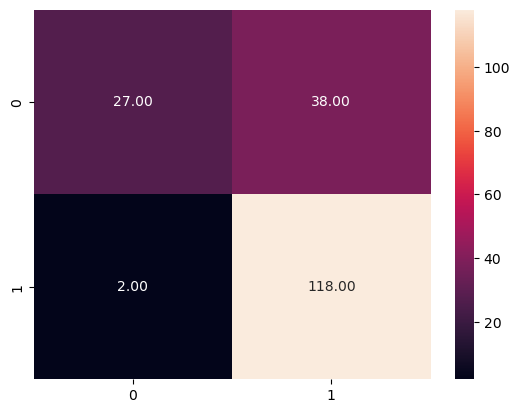

In [85]:
sns.heatmap(cm, annot=True,fmt='.2f')

In [86]:
y_pred = xgb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 29,  36],
       [  2, 118]], dtype=int64)

<AxesSubplot:>

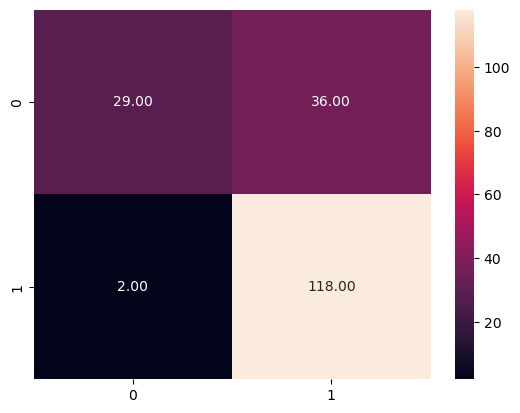

In [87]:
sns.heatmap(cm, annot=True,fmt='.2f')